In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pow, log

In [8]:
data = pd.read_csv("includes/iris.data")
data['Lab'] = [(x[5:] == "setosa" and 1) or (x[5:] == "versicolor" and 2) or (x[5:] == "virginica" and 3) for x in data['Label']]
data.drop('Label', axis=1, inplace=True)

In [9]:
# Code should result in 3 outputs between 1 and 0 each showing probability for a certain iris
# f(x1) = c1x1^3 + c2x1^2 + c3x1 + b1
# f(x2) = c4x^3 + c5x^2 + c6x + b2
# f(x3) = c7x^3 + c8x^2 + c9x + b3
# Expected Y = 1/1 + e ^-f(x)
# For 1 feature Extended to 4 features following 12 vars of weight for each
# Matrix of (1, 12) for features and (12, 3) for weights, (3, 1) for b


# Generating the weights matrix
weights = 0.05 * np.random.normal(0, 1, (12, 3))
b_vals = 0.1 * np.random.normal(0, 1, (1, 3))

learning_rates =  np.array([0.0001, 0.0001, 0.0001]).reshape((3, 1))
learning_rates_b = np.array([0.005, 0.005, 0.005]).reshape((1, 3))

reg_parameter = 0.01;
print("Chosen Weight are:")
print(weights)
print("Chosen values for b are:")
print(b_vals)
print("Chosen learning rates are:")
print(learning_rates)
print("Chosen learning rate for b are:")
print(learning_rates_b)
print("Chosen value for lambda is:")
print(reg_parameter)

Chosen Weight are:
[[ 0.00939011 -0.09355357 -0.01974583]
 [-0.01028282 -0.0084274   0.05368607]
 [-0.01189483 -0.00456787 -0.07204062]
 [-0.0895547  -0.01322717 -0.04633887]
 [ 0.03002614 -0.01250898 -0.05311082]
 [-0.00087162 -0.02057483  0.00086757]
 [ 0.05085347  0.04127852  0.02014749]
 [ 0.05203456  0.02411497  0.02582418]
 [-0.09523515 -0.03284365 -0.03258444]
 [ 0.09014479  0.01350482  0.00832677]
 [-0.0297687   0.04607327 -0.03957516]
 [ 0.00893739 -0.01715189 -0.03288242]]
Chosen values for b are:
[[-0.0416157   0.10080619  0.01062957]]
Chosen learning rates are:
[[0.0001]
 [0.0001]
 [0.0001]]
Chosen learning rate for b are:
[[0.005 0.005 0.005]]
Chosen value for lambda is:
0.01


In [13]:
ideal_vals = {
    '1': [1, 0, 0],
    '2': [0, 1, 0],
    '3': [0, 0, 1]
}

def getExpected():
    for row in data.to_numpy():
        arr = np.array([[row[i], pow(row[i], 2), pow(row[i], 3)] for i in range(4)]).reshape(1, 12)
        yield np.array(list(pow(1 + x, -1) for x in np.exp(-(np.dot(arr, weights) + b_vals)).reshape(3, 1)))

def correctionWeightsTerms():
    total = np.zeros((12, 3))
    for expected, actual in zip(getExpected(), data.to_numpy()):
        temp = expected - ideal_vals[str(int(actual[4]))]
        k = 0
        for i in range(4):
            for j in range(1, 4):
                total[k] += temp * pow(actual[i], j)
                k += 1
    total += (weights * reg_parameter)
    total /= len(data)
    return total

def correctionBTerms():
    total = np.zeros((1, 3))
    for expected, actual in zip(getExpected(), data.to_numpy()):
        total += expected - ideal_vals[str(int(actual[4]))]
    total /= len(data)
    return total

def calcCost():
    # Sum of All Losses
    # 3 Losses Calculated and added up
    total = 0
    for expected, actual in zip(getExpected(), data['Lab']):
        try:
            total += sum(y * log(x) + (1 - y) * log(1 - x) for x, y in zip(expected, ideal_vals[str(int(actual))]))
        except ValueError:
            total -= 10000000000
            
    total -= np.square(weights).sum() * reg_parameter / 2
    total /= -len(data['Lab'])
    return total


[[-1.43731017e-04 -1.75665905e-04 -2.19505970e-04 -7.25252345e-04
  -1.07125381e-03 -1.45950072e-03 -3.67699515e-03 -6.55811204e-03
  -9.79103828e-03 -9.82250086e-05 -7.83820829e-05 -9.90706926e-05]
 [-3.41125708e-04 -2.14218223e-04 -2.98025507e-04 -1.19859153e-03
  -5.88661606e-04 -9.06890052e-04 -4.19210337e-05 -1.33558063e-04
  -1.85038040e-04 -6.20638164e-05 -5.91680744e-04 -1.03739803e-03]
 [-9.25119258e-05 -2.60398413e-03 -5.87317889e-03 -6.98566487e-06
  -4.23422476e-05 -6.75287709e-05 -1.99809808e-06 -5.83463875e-05
  -1.39285517e-04 -6.42171534e-07 -8.09524731e-05 -2.92094760e-04]]
[[-0.00143108 -0.00144493 -0.00166564]]


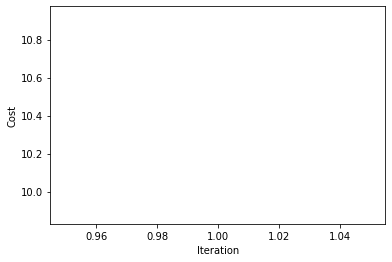

[[-1.31115043e-04 -1.43342946e-04 -2.19328917e-04 -6.61642139e-04
  -8.97549979e-04 -1.45867408e-03 -3.35475487e-03 -5.61332105e-03
  -9.78716490e-03 -8.96265826e-05 -5.94604293e-05 -9.89531225e-05]
 [-3.11330828e-04 -1.53955791e-04 -2.97657536e-04 -1.09404569e-03
  -3.92437320e-04 -9.05724989e-04 -3.81818691e-05 -1.18277730e-04
  -1.84982557e-04 -5.62936099e-05 -5.41799930e-04 -1.03730920e-03]
 [-8.30318393e-05 -2.41053122e-03 -5.87301200e-03 -6.34048833e-06
  -3.83030480e-05 -6.75194515e-05 -1.77897135e-06 -5.36854726e-05
  -1.39281753e-04 -5.34005456e-07 -7.43328116e-05 -2.92091939e-04]]
[[-0.00130537 -0.00114069 -0.00166374]]


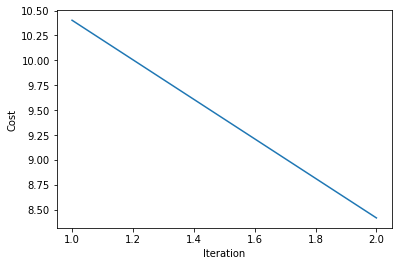

[[-1.15274651e-04 -7.36967074e-05 -2.18785477e-04 -5.81206204e-04
  -4.98912227e-04 -1.45609877e-03 -2.94436071e-03 -3.29812609e-03
  -9.77490964e-03 -7.88275607e-05 -2.18459391e-05 -9.85953232e-05]
 [-2.73621720e-04 -3.66747379e-05 -2.96529332e-04 -9.60667927e-04
  -1.83947069e-05 -9.02120897e-04 -3.34809207e-05 -7.85206608e-05
  -1.84804925e-04 -4.89329968e-05 -3.84312071e-04 -1.03699504e-03]
 [-7.06082122e-05 -1.71741900e-03 -5.87232720e-03 -5.51688145e-06
  -2.65038529e-05 -6.74875129e-05 -1.48683632e-06 -3.71262578e-05
  -1.39265389e-04 -3.79917288e-07 -4.78588424e-05 -2.92076979e-04]]
[[-0.00114865 -0.0005233  -0.00165798]]


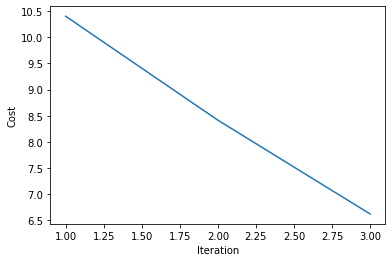

[[-9.82127244e-05  4.79960131e-06 -2.17012438e-04 -4.94161487e-04
  -2.62628637e-05 -1.44752407e-03 -2.49815058e-03 -4.09270397e-04
  -9.73322554e-03 -6.72124323e-05  1.80132610e-05 -9.74467291e-05]
 [-2.32915093e-04  8.57199447e-05 -2.92887025e-04 -8.16117169e-04
   3.64976212e-04 -8.90393207e-04 -2.83862844e-05 -2.75512149e-05
  -1.84180591e-04 -4.07870717e-05 -1.56110232e-04 -1.03570464e-03]
 [-5.63008425e-05 -6.21564920e-04 -5.86890999e-03 -4.61010900e-06
  -1.02872684e-05 -6.73629566e-05 -1.14573471e-06 -1.11970321e-05
  -1.39180292e-04 -1.83108020e-07 -2.35185898e-06 -2.91983185e-04]]
[[-0.00098062  0.00013873 -0.00163955]]


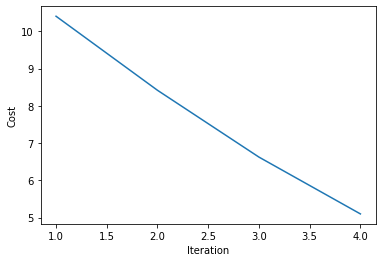

[[-8.22769096e-05  1.93222722e-05 -2.10643886e-04 -4.12682878e-04
   6.46070342e-05 -1.41568917e-03 -2.07953303e-03  1.66984800e-04
  -9.57290690e-03 -5.64021376e-05  2.49700025e-05 -9.34647530e-05]
 [-1.95060306e-04  1.06608234e-04 -2.80271151e-04 -6.81750976e-04
   4.28697970e-04 -8.49671462e-04 -2.35669436e-05 -1.70886024e-05
  -1.81595421e-04 -3.28447532e-05 -1.05215068e-04 -1.02891435e-03]
 [-4.15508416e-05 -3.62849747e-04 -5.84627718e-03 -3.73698682e-06
  -6.80841196e-06 -6.67613776e-05 -7.90340560e-07 -5.16874143e-06
  -1.38610249e-04  4.56706616e-08  8.80912952e-06 -2.91232018e-04]]
[[-0.00082402  0.00025642 -0.0015754 ]]


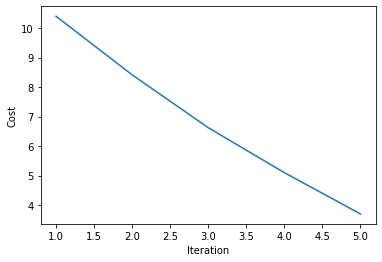

[[-6.87775240e-05  1.67269976e-05 -1.83022804e-04 -3.43620007e-04
   5.04406068e-05 -1.26836781e-03 -1.72445494e-03  8.85960586e-05
  -8.77793280e-03 -4.72957496e-05  2.33776771e-05 -7.75410478e-05]
 [-1.63310922e-04  1.01239700e-04 -2.30712811e-04 -5.69487052e-04
   4.10257539e-04 -6.91982833e-04 -1.94034180e-05 -1.81946292e-05
  -1.67173729e-04 -2.56973326e-05 -1.08527712e-04 -9.77421866e-04]
 [-2.73106366e-05 -3.74764869e-04 -5.63192523e-03 -2.96617998e-06
  -7.08858897e-06 -6.27068917e-05 -4.44416753e-07 -5.46441603e-06
  -1.33305118e-04  2.95572664e-07  8.41474406e-06 -2.82919713e-04]]
[[-0.00069143  0.00023233 -0.00131351]]


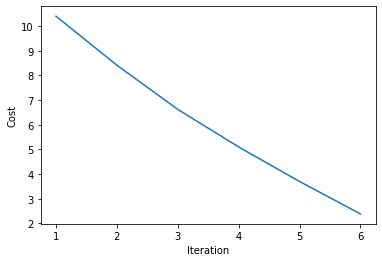

[[-5.78693180e-05  1.63646900e-05 -3.96812847e-05 -2.87805860e-04
   4.99493676e-05 -4.16338706e-04 -1.43739913e-03  9.53344143e-05
  -3.63611627e-03 -3.99916320e-05  2.29093127e-05 -4.55797578e-06]
 [-1.38011152e-04  9.93428641e-05 -8.97044816e-06 -4.80551404e-04
   4.02747670e-04 -5.09133885e-06 -1.59514276e-05 -1.78084417e-05
  -6.99480462e-05 -1.94664535e-05 -1.04866835e-04 -5.28089002e-04]
 [-1.38841123e-05 -3.51785074e-04 -3.40393325e-03 -2.31005033e-06
  -6.88598838e-06 -3.12728373e-05 -1.16287634e-07 -4.94855794e-06
  -8.07683345e-05  5.59117085e-07  9.50682558e-06 -1.86920321e-04]]
[[-5.84289816e-04  2.26789800e-04 -8.89310448e-05]]


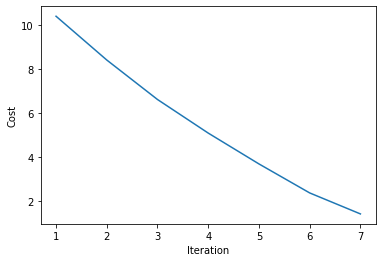

[[-4.91628973e-05  1.56583899e-05  1.17113178e-04 -2.43236316e-04
   4.72804970e-05  5.79666065e-04 -1.20799646e-03  8.81237767e-05
   2.78998654e-03 -3.42134308e-05  2.22802543e-05  7.08109903e-05]
 [-1.18149482e-04  9.69705578e-05  2.21192120e-04 -4.11209269e-04
   3.93813437e-04  7.09559899e-04 -1.31113488e-05 -1.76797952e-05
   4.55877396e-05 -1.40432944e-05 -1.02485339e-04  6.13584069e-05]
 [-1.24290694e-06 -3.35371985e-04 -2.47277697e-04 -1.75371466e-06
  -6.77031780e-06  7.48310542e-06  1.93822387e-07 -4.58624507e-06
  -9.91380706e-06  8.31207046e-07  1.03118459e-05 -4.90746208e-05]]
[[-0.00049879  0.0002185   0.00116561]]


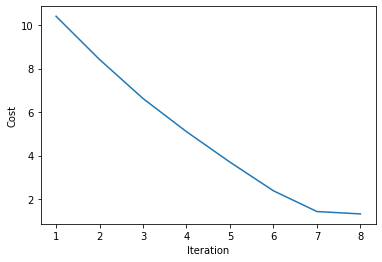

[[-4.21759606e-05  1.50370293e-05  2.69447028e-05 -2.07426700e-04
   4.50754749e-05  1.37149970e-05 -1.02338713e-03  8.34886364e-05
  -8.25286324e-04 -2.96225598e-05  2.17038708e-05  2.62772721e-05]
 [-1.02496599e-04  9.47776016e-05  8.32335527e-05 -3.56955416e-04
   3.85501726e-04  2.74480899e-04 -1.07550921e-05 -1.75165022e-05
  -1.77141165e-05 -9.27338609e-06 -1.00002188e-04 -2.52804489e-04]
 [ 1.07129704e-05 -3.18579691e-04 -1.90704374e-03 -1.27712696e-06
  -6.64632588e-06 -1.34109561e-05  4.87611299e-07 -4.21584072e-06
  -4.72762333e-05  1.10761004e-06  1.11271002e-05 -1.21037817e-04]]
[[-0.00043024  0.00021099  0.00043391]]


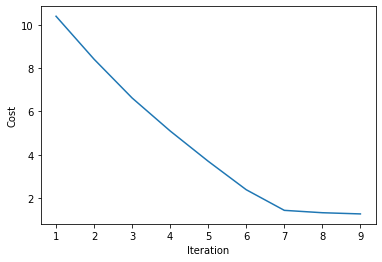

[[-3.64997590e-05  1.44257076e-05  7.78274334e-05 -1.78278134e-04
   4.28739254e-05  3.42605916e-04 -8.72747994e-04  7.85524927e-05
   1.33061056e-03 -2.59326562e-05  2.11426406e-05  5.01350171e-05]
 [-9.00178994e-05  9.26482728e-05  1.55563962e-04 -3.14017071e-04
   3.77448805e-04  4.97123861e-04 -8.77372832e-06 -1.73690804e-05
   2.12316575e-05 -5.02719651e-06 -9.76556689e-05 -4.86828434e-05]
 [ 2.20535586e-05 -3.02609813e-04 -7.96185861e-04 -8.63366571e-07
  -6.53040649e-06 -1.66252288e-07  7.66273617e-07 -3.86513509e-06
  -2.25009314e-05  1.38426622e-06  1.19013739e-05 -7.22092812e-05]]
[[-0.00037463  0.00020366  0.00083337]]


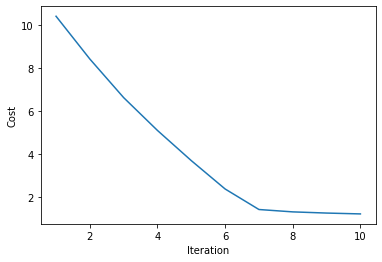

[[-3.18257215e-05  1.38377831e-05  4.34680603e-05 -1.54213431e-04
   4.07594766e-05  1.29597593e-04 -7.47987477e-04  7.38454535e-05
  -1.47586701e-05 -2.29274407e-05  2.06029197e-05  3.28520227e-05]
 [-7.99350448e-05  9.06015217e-05  1.01727162e-04 -2.79567687e-04
   3.69711943e-04  3.26316566e-04 -7.08554259e-06 -1.72278396e-05
  -2.05910868e-06 -1.21230360e-06 -9.53987730e-05 -1.61244851e-04]
 [ 3.28024202e-05 -2.87225196e-04 -1.38117440e-03 -5.00019546e-07
  -6.41932028e-06 -7.74506084e-06  1.03007877e-06 -3.52852106e-06
  -3.57294331e-05  1.65718265e-06  1.26450104e-05 -9.73274770e-05]]
[[-0.00032894  0.0001966   0.00055081]]


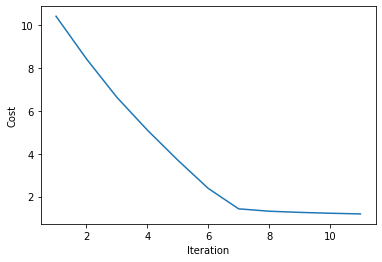

[[-2.79294052e-05  1.32702327e-05  6.06626638e-05 -1.34091500e-04
   3.87148437e-05  2.43867158e-04 -6.43286157e-04  6.92660447e-05
   7.51812714e-04 -2.04493573e-05  2.00829103e-05  4.05198617e-05]
 [-7.16829718e-05  8.86312532e-05  1.24509262e-04 -2.51562675e-04
   3.62270050e-04  3.94787006e-04 -5.63173079e-06 -1.70942366e-05
   1.21160561e-05  2.23309778e-06 -9.32372301e-05 -8.38260939e-05]
 [ 4.29483334e-05 -2.72454412e-04 -9.51255780e-04 -1.78409817e-07
  -6.31345995e-06 -2.80128412e-06  1.27861174e-06 -3.20656131e-06
  -2.61603992e-05  1.92256303e-06  1.33569901e-05 -7.81467735e-05]]
[[-0.00029094  0.00018979  0.00068138]]


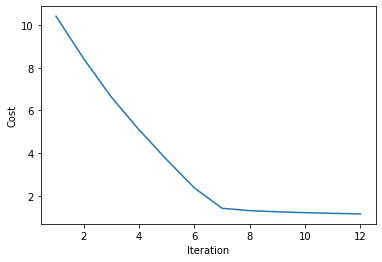

[[-2.46483240e-05  1.27231502e-05  4.77209171e-05 -1.17090867e-04
   3.67420683e-05  1.66191209e-04 -5.54481418e-04  6.48345584e-05
   2.76187132e-04 -1.83841596e-05  1.95823507e-05  3.37052235e-05]
 [-6.48533312e-05  8.67360713e-05  1.02987622e-04 -2.28529606e-04
   3.55116663e-04  3.25493236e-04 -4.37017820e-06 -1.69675673e-05
   4.14523872e-06  5.34974396e-06 -9.11663732e-05 -1.19369205e-04]
 [ 5.24618167e-05 -2.58272964e-04 -1.12634963e-03  1.07496995e-07
  -6.21250991e-06 -5.28737935e-06  1.51112859e-06 -2.89859719e-06
  -3.01801368e-05  2.17699088e-06  1.40385664e-05 -8.54216023e-05]]
[[-0.00025903  0.00018324  0.00057135]]


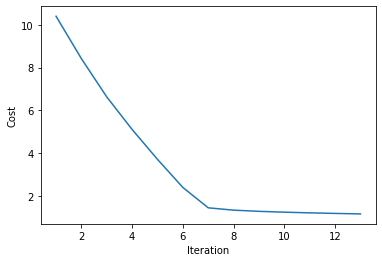

[[-2.18635386e-05  1.21959552e-05  5.22600545e-05 -1.02613437e-04
   3.48390958e-05  1.99345134e-04 -4.78561418e-04  6.05460358e-05
   5.14836240e-04 -1.66481734e-05  1.91006380e-05  3.53593193e-05]
 [-5.91481926e-05  8.49135268e-05  1.07462577e-04 -2.09398148e-04
   3.48242009e-04  3.37350716e-04 -3.27023370e-06 -1.68475686e-05
   8.85486388e-06  8.16536934e-06 -8.91835366e-05 -9.08160769e-05]
 [ 6.13091304e-05 -2.44666058e-04 -9.60097669e-04  3.62007761e-07
  -6.11629668e-06 -3.53562198e-06  1.72685643e-06 -2.60420222e-06
  -2.65035728e-05  2.41758825e-06  1.46905779e-05 -7.77699255e-05]]
[[-0.00023203  0.00017692  0.00060158]]


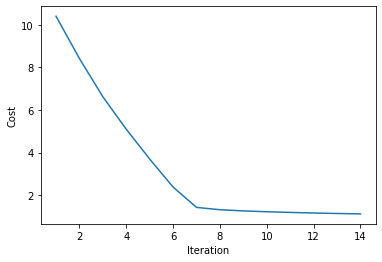

[[-1.94862753e-05  1.16881722e-05  4.72920478e-05 -9.02147761e-05
   3.30045704e-05  1.71743295e-04 -4.13299743e-04  5.64002517e-05
   3.59195259e-04 -1.51790483e-05  1.86372178e-05  3.24793140e-05]
 [-5.43465996e-05  8.31613171e-05  9.81264281e-05 -1.93377880e-04
   3.41636768e-04  3.06472028e-04 -2.30890957e-06 -1.67338919e-05
   6.49571199e-06  1.07005085e-05 -8.72855689e-05 -9.85019726e-05]
 [ 6.94621193e-05 -2.31616060e-04 -9.88176420e-04  5.88357888e-07
  -6.02461781e-06 -4.16610201e-06  1.92520038e-06 -2.32289178e-06
  -2.72022796e-05  2.64211991e-06  1.53139839e-05 -7.86482085e-05]]
[[-0.00020904  0.00017084  0.00055621]]


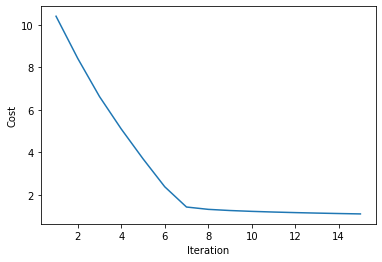

[[-1.74486727e-05  1.11992741e-05  4.75929289e-05 -7.95560786e-05
   3.12368510e-05  1.77380477e-04 -3.57004674e-04  5.23954407e-05
   4.16782926e-04 -1.39293484e-05  1.81915087e-05  3.21709386e-05]
 [-5.02814514e-05  8.14770624e-05  9.67034917e-05 -1.79874106e-04
   3.35291392e-04  3.00361342e-04 -1.46828533e-06 -1.66262172e-05
   7.91118821e-06  1.29722969e-05 -8.54693951e-05 -8.73019937e-05]
 [ 7.69040719e-05 -2.19105406e-04 -9.16402304e-04  7.89147510e-07
  -5.93727969e-06 -3.53970968e-06  2.10586187e-06 -2.05418994e-06
  -2.56368435e-05  2.84903548e-06  1.59097381e-05 -7.51568085e-05]]
[[-0.00018938  0.00016499  0.00055334]]


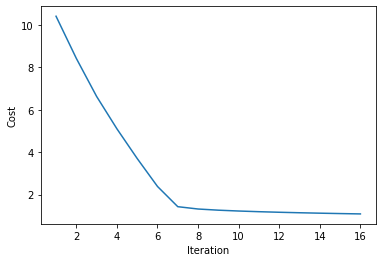

[[-1.56975187e-05  1.07287238e-05  4.53236886e-05 -7.03718255e-05
   2.95342537e-05  1.66422608e-04 -3.08351187e-04  4.85297314e-05
   3.65719551e-04 -1.28621877e-05  1.77629261e-05  3.06623067e-05]
 [-4.68237610e-05  7.98583797e-05  9.16625825e-05 -1.68430598e-04
   3.29196355e-04  2.83189690e-04 -7.33800071e-07 -1.65242293e-05
   7.35397254e-06  1.49967368e-05 -8.37319233e-05 -8.63860344e-05]
 [ 8.36323055e-05 -2.07116174e-04 -9.00184857e-04  9.66613976e-07
  -5.85409074e-06 -3.58543365e-06  2.26888483e-06 -1.79761935e-06
  -2.53224687e-05  3.03745435e-06  1.64788063e-05 -7.41189478e-05]]
[[-0.00017253  0.00015937  0.00053028]]


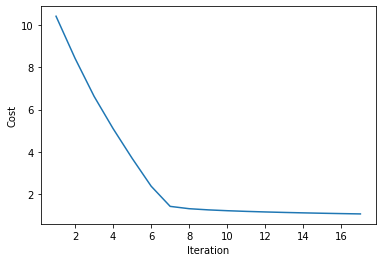

[[-1.41900488e-05  1.02759711e-05  4.44737079e-05 -6.24482403e-05
   2.78950206e-05  1.64265001e-04 -2.66269976e-04  4.48008819e-05
   3.70216294e-04 -1.19482710e-05  1.73508820e-05  2.98662627e-05]
 [-4.38719590e-05  7.83028877e-05  8.88386279e-05 -1.58690659e-04
   3.23342176e-04  2.73041288e-04 -9.31639354e-08 -1.64276254e-05
   7.76444451e-06  1.67898703e-05 -8.20700919e-05 -8.07995475e-05]
 [ 8.96583170e-05 -1.95630368e-04 -8.59823897e-04  1.12278996e-06
  -5.77486408e-06 -3.31444263e-06  2.41464876e-06 -1.55270739e-06
  -2.44542427e-05  3.20710564e-06  1.70221530e-05 -7.20297822e-05]]
[[-0.00015805  0.00015395  0.00051887]]


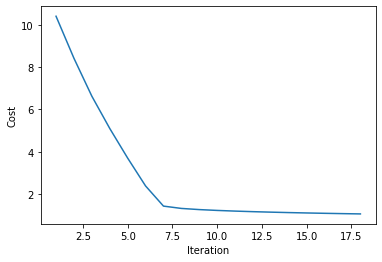

[[-1.28911355e-05  9.84045910e-06  4.30692473e-05 -5.56090227e-05
   2.63173492e-05  1.58372130e-04 -2.29874803e-04  4.12063970e-05
   3.49389182e-04 -1.11638830e-05  1.69547899e-05  2.88328097e-05]
 [-4.13445960e-05  7.68082239e-05  8.53290887e-05 -1.50370506e-04
   3.17719483e-04  2.60903579e-04  4.64314422e-07 -1.63361138e-05
   7.69639643e-06  1.83682231e-05 -8.04808799e-05 -7.78639513e-05]
 [ 9.50063080e-05 -1.84630012e-04 -8.34210909e-04  1.25958566e-06
  -5.69941779e-06 -3.21236857e-06  2.54382726e-06 -1.31898795e-06
  -2.39155064e-05  3.35823811e-06  1.75407366e-05 -7.06010827e-05]]
[[-0.00014559  0.00014875  0.00050334]]


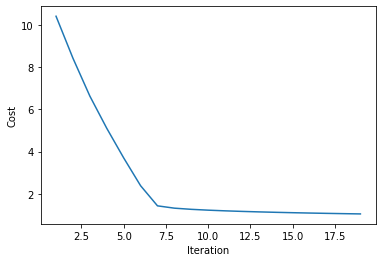

[[-1.17714009e-05  9.42162778e-06  4.20337813e-05 -4.97059048e-05
   2.47994050e-05  1.54635610e-04 -1.98415198e-04  3.77435529e-05
   3.41402643e-04 -1.04895111e-05  1.65740683e-05  2.80021049e-05]
 [-3.91753177e-05  7.53720562e-05  8.24715453e-05 -1.43240874e-04
   3.12319056e-04  2.50904241e-04  9.48130391e-07 -1.62494152e-05
   7.83655411e-06  1.97488002e-05 -7.89613220e-05 -7.40755198e-05]
 [ 9.97107876e-05 -1.74097261e-04 -8.04669792e-04  1.37882343e-06
  -5.62757555e-06 -3.04747407e-06  2.65732757e-06 -1.09600364e-06
  -2.32821938e-05  3.49151514e-06  1.80355046e-05 -6.90089934e-05]]
[[-0.00013486  0.00014374  0.00049101]]


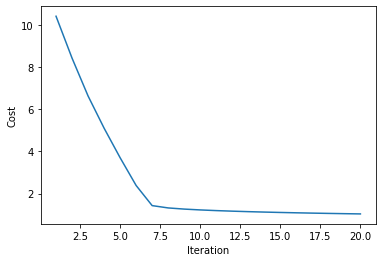

[[-1.08059384e-05  9.01891749e-06  4.09378233e-05 -4.46123553e-05
   2.33393351e-05  1.50339198e-04 -1.71245584e-04  3.44094399e-05
   3.28799955e-04 -9.90889059e-06  1.62081427e-05  2.71660555e-05]
 [-3.73093602e-05  7.39920925e-05  7.96286057e-05 -1.37114144e-04
   3.07131865e-04  2.41058437e-04  1.36681784e-06 -1.61672629e-05
   7.87350707e-06  2.09488428e-05 -7.75085188e-05 -7.09972072e-05]
 [ 1.03813811e-04 -1.64014491e-04 -7.79450548e-04  1.48224531e-06
  -5.55916702e-06 -2.92404923e-06  2.75622371e-06 -8.83307369e-07
  -2.27427576e-05  3.60790741e-06  1.85073892e-05 -6.76172393e-05]]
[[-0.00012561  0.00013893  0.00047845]]


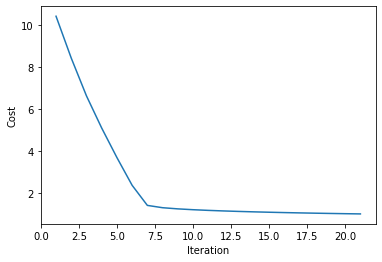

[[-9.97342838e-06  8.63177180e-06  3.99606005e-05 -4.02193108e-05
   2.19352804e-05  1.46637389e-04 -1.47804863e-04  3.12009968e-05
   3.19121757e-04 -9.40833008e-06  1.58564485e-05  2.64083348e-05]
 [-3.57010611e-05  7.26660890e-05  7.70517017e-05 -1.31835164e-04
   3.02149096e-04  2.32132022e-04  1.72808429e-06 -1.60894025e-05
   7.94465000e-06  2.19854891e-05 -7.61196462e-05 -6.79168594e-05]
 [ 1.07362252e-04 -1.54364368e-04 -7.54730334e-04  1.57150686e-06
  -5.49402807e-06 -2.79526623e-06  2.84169181e-06 -6.80463642e-07
  -2.22104583e-05  3.70859272e-06  1.89573036e-05 -6.62564313e-05]]
[[-0.00011764  0.00013431  0.00046707]]


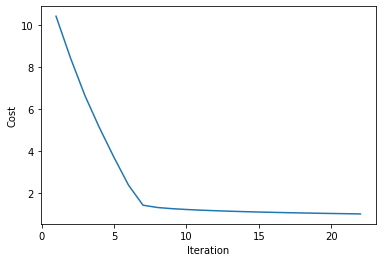

[[-9.25550943e-06  8.25963999e-06  3.90193795e-05 -3.64321944e-05
   2.05853857e-05  1.43016924e-04 -1.27602501e-04  2.81150430e-05
   3.09127724e-04 -8.97622284e-06  1.55184326e-05  2.56874680e-05]
 [-3.43120539e-05  7.13918565e-05  7.46118465e-05 -1.27274594e-04
   2.97362174e-04  2.23716483e-04  2.03889148e-06 -1.60155923e-05
   7.99330268e-06  2.28754301e-05 -7.47919612e-05 -6.51079180e-05]
 [ 1.10405361e-04 -1.45129908e-04 -7.31917567e-04  1.64816635e-06
  -5.43200094e-06 -2.67975943e-06  2.91495311e-06 -4.87049528e-07
  -2.17179314e-05  3.79486877e-06  1.93861399e-05 -6.49885041e-05]]
[[-0.00011076  0.00012987  0.00045618]]


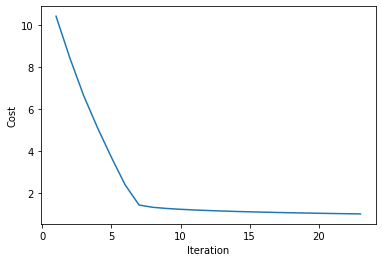

[[-8.63631391e-06  7.90197914e-06  3.81406740e-05 -3.31687414e-05
   1.92878082e-05  1.39658299e-04 -1.10208589e-04  2.51483073e-05
   3.00051681e-04 -8.60268290e-06  1.51935548e-05  2.50144117e-05]
 [-3.31099238e-05  7.01672651e-05  7.23397917e-05 -1.23323943e-04
   2.92762782e-04  2.15897727e-04  2.30550925e-06 -1.59456031e-05
   8.04316888e-06  2.36346132e-05 -7.35228070e-05 -6.24376380e-05]
 [ 1.12992743e-04 -1.36294527e-04 -7.10272144e-04  1.71367431e-06
  -5.37293434e-06 -2.56909574e-06  2.97722728e-06 -3.02655361e-07
  -2.12486365e-05  3.86808170e-06  1.97947668e-05 -6.37803023e-05]]
[[-0.00010483  0.0001256   0.00044599]]


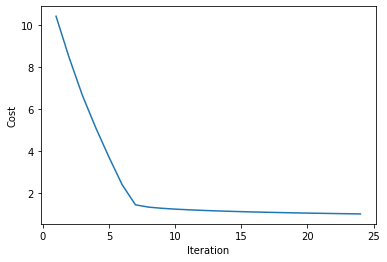

[[-8.10210928e-06  7.55825588e-06  3.73081932e-05 -3.03573321e-05
   1.80407252e-05  1.36468607e-04 -9.52462805e-05  2.22974543e-05
   2.91355192e-04 -8.27926517e-06  1.48812889e-05  2.43798424e-05]
 [-3.20671809e-05  6.89902481e-05  7.02049609e-05 -1.19891808e-04
   2.88342869e-04  2.08573470e-04  2.53355842e-06 -1.58792176e-05
   8.08585613e-06  2.42780166e-05 -7.23096159e-05 -5.99371135e-05]
 [ 1.15172789e-04 -1.27842073e-04 -6.89924786e-04  1.76936587e-06
  -5.31668342e-06 -2.46571389e-06  3.02969675e-06 -1.26885230e-07
  -2.08059366e-05  3.92957076e-06  2.01840279e-05 -6.26372835e-05]]
[[-9.96986385e-05  1.21493010e-04  4.36336863e-04]]


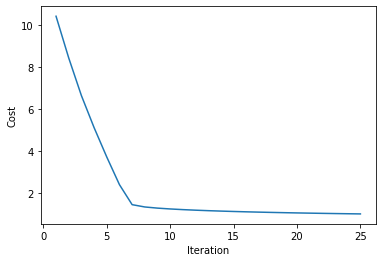

[[-7.64100962e-06  7.22794775e-06  3.65225261e-05 -2.79356478e-05
   1.68423403e-05  1.33461325e-04 -8.23856812e-05  1.95591064e-05
   2.83181116e-04 -7.99874382e-06  1.45811240e-05  2.37826512e-05]
 [-3.11604541e-05  6.78588045e-05  6.82019723e-05 -1.16900938e-04
   2.84094662e-04  2.01720008e-04  2.72805128e-06 -1.58162305e-05
   8.12513018e-06  2.48194987e-05 -7.11499118e-05 -5.75769168e-05]
 [ 1.16991549e-04 -1.19756855e-04 -6.70689210e-04  1.81645708e-06
  -5.26310975e-06 -2.36798285e-06  3.07348135e-06  4.06427330e-08
  -2.03858840e-05  3.98062801e-06  2.05547408e-05 -6.15508570e-05]]
[[-9.52626626e-05  1.17549892e-04  4.27224506e-04]]


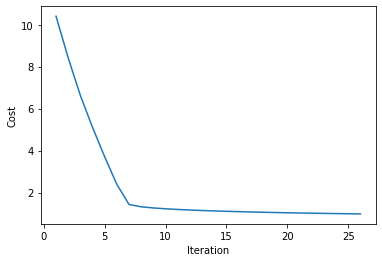

[[-7.24273512e-06  6.91054438e-06  3.57785981e-05 -2.58495372e-05
   1.56908888e-05  1.30612999e-04 -7.13386185e-05  1.69298651e-05
   2.75428593e-04 -7.75493192e-06  1.42925644e-05  2.32191652e-05]
 [-3.03698442e-05  6.67710009e-05  6.63178897e-05 -1.14285897e-04
   2.80010667e-04  1.95291169e-04  2.89343307e-06 -1.57564475e-05
   8.16023443e-06  2.52717171e-05 -7.00413110e-05 -5.53514887e-05]
 [ 1.18491986e-04 -1.12023663e-04 -6.52508119e-04  1.85604495e-06
  -5.21208119e-06 -2.27583204e-06  3.10962205e-06  2.00296210e-07
  -1.99874591e-05  4.02247104e-06  2.09076960e-05 -6.05181766e-05]]
[[-9.14214144e-05  1.13760803e-04  4.18596581e-04]]


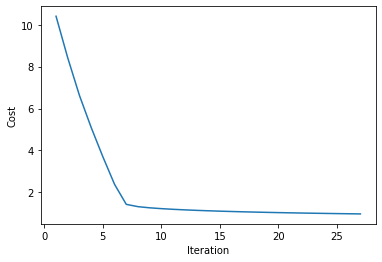

[[-6.89840605e-06  6.60554835e-06  3.50737638e-05 -2.40520337e-05
   1.45846418e-05  1.27914816e-04 -6.18540119e-05  1.44063283e-05
   2.68086623e-04 -7.54253155e-06  1.40151307e-05  2.26869932e-05]
 [-2.96783945e-05  6.57249719e-05  6.45438624e-05 -1.11991178e-04
   2.76083674e-04  1.89254064e-04  3.03362539e-06 -1.56996855e-05
   8.19193055e-06  2.56461058e-05 -6.89815220e-05 -5.32484526e-05]
 [ 1.19713552e-04 -1.04627782e-04 -6.35290774e-04  1.88911066e-06
  -5.16347174e-06 -2.18870679e-06  3.13907194e-06  3.52428694e-07
  -1.96088416e-05  4.05622626e-06  2.12436570e-05 -5.95349236e-05]]
[[-8.80900951e-05  1.10119659e-04  4.10420700e-04]]


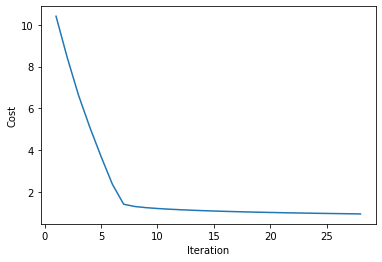

[[-6.60036343e-06  6.31247589e-06  3.44049627e-05 -2.25024842e-05
   1.35219095e-05  1.25354591e-04 -5.37136841e-05  1.19851061e-05
   2.61118211e-04 -7.35700729e-06  1.37483596e-05  2.21836570e-05]
 [-2.90716493e-05  6.47189211e-05  6.28709500e-05 -1.09969653e-04
   2.72306753e-04  1.83576153e-04  3.15207110e-06 -1.56457719e-05
   8.22041507e-06  2.59528963e-05 -6.79683452e-05 -5.12590730e-05]
 [ 1.20692010e-04 -9.75549984e-05 -6.18967961e-04  1.91652532e-06
  -5.11716143e-06 -2.10626985e-06  3.16269293e-06  4.97379585e-07
  -1.92486782e-05  4.08292049e-06  2.15633596e-05 -5.85977501e-05]]
[[-8.51957927e-05  1.06620557e-04  4.02662179e-04]]


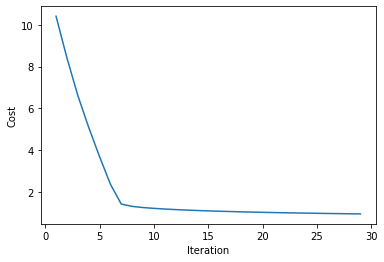

[[-6.34201127e-06  6.03085736e-06  3.37696214e-05 -2.11657721e-05
   1.25010444e-05  1.22922582e-04 -4.67285426e-05  9.66283375e-06
   2.54498343e-04 -7.19447832e-06  1.34918043e-05  2.17070084e-05]
 [-2.85372843e-05  6.37511204e-05  6.12913677e-05 -1.08181277e-04
   2.68673253e-04  1.78228998e-04  3.25177946e-06 -1.55945441e-05
   8.24601731e-06  2.62011721e-05 -6.69996715e-05 -4.93746440e-05]
 [ 1.21459432e-04 -9.07916033e-05 -6.03472706e-04  1.93905733e-06
  -5.07303608e-06 -2.02816268e-06  3.18125660e-06  6.35474384e-07
  -1.89056418e-05  4.10347869e-06  2.18675123e-05 -5.77034206e-05]]
[[-8.26758854e-05  1.03257780e-04  3.95291138e-04]]


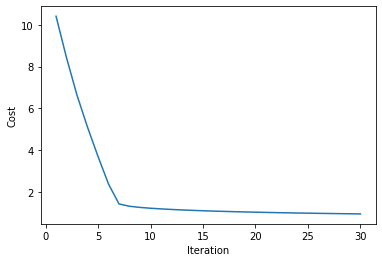

[[-6.11767745e-06  5.76023761e-06  3.31653323e-05 -2.00116214e-05
   1.15204429e-05  1.20609509e-04 -4.07350984e-05  7.43618380e-06
   2.48201584e-04 -7.05162571e-06  1.32450344e-05  2.12550665e-05]
 [-2.80647924e-05  6.28199096e-05  5.97979721e-05 -1.06592012e-04
   2.65176796e-04  1.73186616e-04  3.33537066e-06 -1.55458487e-05
   8.26898412e-06  2.63989430e-05 -6.60734810e-05 -4.75875072e-05]
 [ 1.22044331e-04 -8.43243921e-05 -5.88745431e-04  1.95738079e-06
  -5.03098712e-06 -1.95407597e-06  3.19544787e-06  7.67024947e-07
  -1.85785528e-05  4.11872602e-06  2.21567963e-05 -5.68490404e-05]]
[[-8.04766470e-05  1.00025798e-04  3.88279849e-04]]


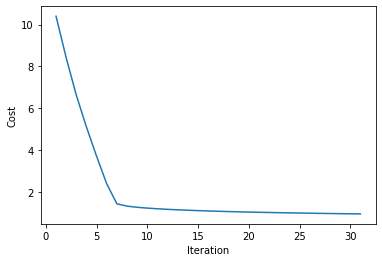

[[-5.92249089e-06  5.50017613e-06  3.25899193e-05 -1.90139746e-05
   1.05785474e-05  1.18407035e-04 -3.55923065e-05  5.30187543e-06
   2.42205512e-04 -6.92561263e-06  1.30076355e-05  2.08260387e-05]
 [-2.76452167e-05  6.19236950e-05  5.83843117e-05 -1.05172920e-04
   2.61811276e-04  1.68425577e-04  3.40511843e-06 -1.54995419e-05
   8.28955034e-06  2.65532330e-05 -6.51878404e-05 -4.58906310e-05]
 [ 1.22471875e-04 -7.81406597e-05 -5.74731546e-04  1.97208429e-06
  -4.99091138e-06 -1.88372362e-06  3.20587057e-06  8.92329797e-07
  -1.82663266e-05  4.12939278e-06  2.24318661e-05 -5.60319487e-05]]
[[-7.85520306e-05  9.69192727e-05  3.81603171e-04]]


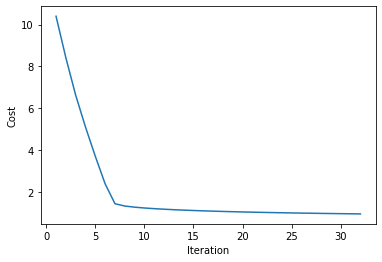

[[-5.75227342e-06  5.25024718e-06  3.20413907e-05 -1.81504396e-05
   9.67384673e-06  1.16307515e-04 -3.11787163e-05  3.25668287e-06
   2.36489440e-04 -6.81401551e-06  1.27792094e-05  2.04182907e-05]
 [-2.72709226e-05  6.10609488e-05  5.70445189e-05 -1.03899386e-04
   2.58570847e-04  1.63924623e-04  3.46299018e-06 -1.54554878e-05
   8.30792275e-06  2.66701716e-05 -6.43409009e-05 -4.42776347e-05]
 [ 1.22764145e-04 -7.22281942e-05 -5.61381413e-04  1.98367975e-06
  -4.95271087e-06 -1.81684635e-06  3.21305394e-06  1.01167448e-06
  -1.79679746e-05  4.13612111e-06  2.26933496e-05 -5.52497156e-05]]
[[-7.68626061e-05  9.39330529e-05  3.75238108e-04]]


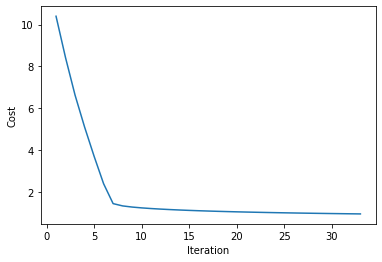

[[-5.60344485e-06  5.01003973e-06  3.15179275e-05 -1.74017988e-05
   8.80487719e-06  1.14303975e-04 -2.73899196e-05  1.29744216e-06
   2.31034512e-04 -6.71476469e-06  1.25593735e-05  2.00303327e-05]
 [-2.69354032e-05  6.02302066e-05  5.57732591e-05 -1.02750474e-04
   2.55449919e-04  1.59664466e-04  3.51068416e-06 -1.54135592e-05
   8.32428831e-06  2.67550876e-05 -6.35308961e-05 -4.27426959e-05]
 [ 1.22940418e-04 -6.65752680e-05 -5.48649702e-04  1.99261092e-06
  -4.91629256e-06 -1.75320718e-06  3.21745970e-06  1.12533196e-06
  -1.76825911e-05  4.13947259e-06  2.29418491e-05 -5.45001134e-05]]
[[-7.53746343e-05  9.10621755e-05  3.69163642e-04]]


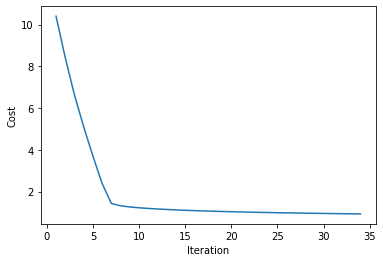

[[-5.47293993e-06  4.77915742e-06  3.10178643e-05 -1.67515774e-05
   7.97022271e-06  1.12390027e-04 -2.41362826e-05 -5.78943207e-07
   2.25823453e-04 -6.62609330e-06  1.23477608e-05  1.96608044e-05]
 [-2.66331130e-05  5.94300666e-05  5.45656721e-05 -1.01708370e-04
   2.52443149e-04  1.55627569e-04  3.54966329e-06 -1.53736362e-05
   8.33881518e-06  2.68125980e-05 -6.27561386e-05 -4.12804999e-05]
 [ 1.23017457e-04 -6.11706273e-05 -5.36494988e-04  1.99926140e-06
  -4.88156816e-06 -1.69258959e-06  3.21948903e-06  1.23356300e-06
  -1.74093467e-05  4.13993618e-06  2.31779420e-05 -5.37810983e-05]]
[[-7.40592636e-05  8.83018621e-05  3.63360528e-04]]


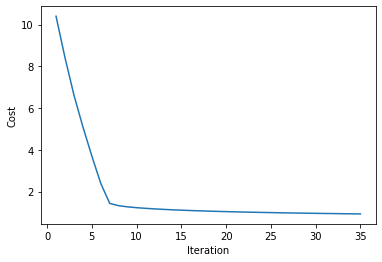

[[-5.35813607e-06  4.55721833e-06  3.05396752e-05 -1.61856643e-05
   7.16851485e-06  1.10559822e-04 -2.13409408e-05 -2.37549784e-06
   2.20840430e-04 -6.54649327e-06  1.21440191e-05  1.93084623e-05]
 [-2.63593254e-05  5.86591871e-05  5.34173245e-05 -1.00757909e-04
   2.49545434e-04  1.51797968e-04  3.58118565e-06 -1.53356060e-05
   8.35165520e-06  2.68466922e-05 -6.20150176e-05 -3.98861860e-05]
 [ 1.23009784e-04 -5.60034798e-05 -5.24879353e-04  2.00396203e-06
  -4.84845392e-06 -1.63479536e-06  3.21948943e-06  1.33661664e-06
  -1.71474797e-05  4.13793605e-06  2.34021810e-05 -5.30907917e-05]]
[[-7.28918335e-05  8.56475160e-05  3.57811125e-04]]


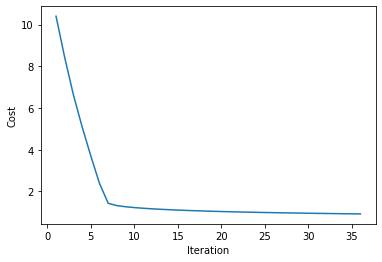

[[-5.25679050e-06  4.34385478e-06  3.00819595e-05 -1.56919810e-05
   6.39843251e-06  1.08807991e-04 -1.89380396e-05 -4.09517091e-06
   2.16070910e-04 -6.47467758e-06  1.19478109e-05  1.89721673e-05]
 [-2.61100115e-05  5.79162850e-05  5.23241657e-05 -9.98861843e-05
   2.46751899e-04  1.48161104e-04  3.60633167e-06 -1.52993630e-05
   8.36294570e-06  2.68608098e-05 -6.13059963e-05 -3.85553028e-05]
 [ 1.22929952e-04 -5.10634826e-05 -5.13768038e-04  2.00699763e-06
  -4.81687036e-06 -1.57964270e-06  3.21776105e-06  1.43473056e-06
  -1.68962900e-05  4.13383905e-06  2.36150953e-05 -5.24274648e-05]]
[[-7.18512721e-05  8.30947188e-05  3.52499236e-04]]


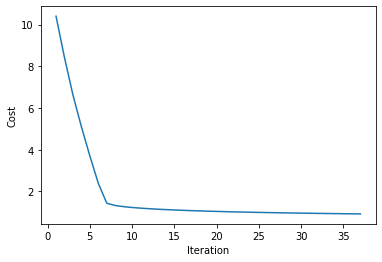

[[-5.16698594e-06  4.13871307e-06  2.96434302e-05 -1.52601946e-05
   5.65870140e-06  1.07129600e-04 -1.68711962e-05 -5.74083349e-06
   2.11501535e-04 -6.40954782e-06  1.17588128e-05  1.86508755e-05]
 [-2.58817366e-05  5.72001335e-05  5.12824901e-05 -9.90822010e-05
   2.44057895e-04  1.44703684e-04  3.62602825e-06 -1.52648075e-05
   8.37281107e-06  2.68579109e-05 -6.06276083e-05 -3.72837674e-05]
 [ 1.22788780e-04 -4.63407281e-05 -5.03129133e-04  2.00861301e-06
  -4.78674213e-06 -1.52696469e-06  3.21456258e-06  1.52813158e-06
  -1.66551330e-05  4.12796167e-06  2.38171914e-05 -5.17895241e-05]]
[[-7.09195779e-05  8.06392261e-05  3.47409971e-04]]


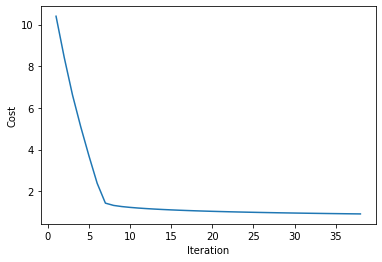

[[-5.08708373e-06  3.94145315e-06  2.92229031e-05 -1.48814686e-05
   4.94809343e-06  1.05520113e-04 -1.50921623e-05 -7.31527664e-06
   2.07120012e-04 -6.35016655e-06  1.15767153e-05  1.83436279e-05]
 [-2.56715716e-05  5.65095604e-05  5.02889019e-05 -9.83365918e-05
   2.41458983e-04  1.41413551e-04  3.64106981e-06 -1.52318461e-05
   8.38136422e-06  2.68405390e-05 -5.99784557e-05 -3.60678293e-05]
 [ 1.22595580e-04 -4.18257299e-05 -4.92933300e-04  2.00901832e-06
  -4.75799777e-06 -1.47660778e-06  3.21011663e-06  1.61703605e-06
  -1.64234145e-05  4.12057641e-06  2.40089535e-05 -5.11754985e-05]]
[[-7.00813736e-05  7.82769629e-05  3.42529627e-04]]


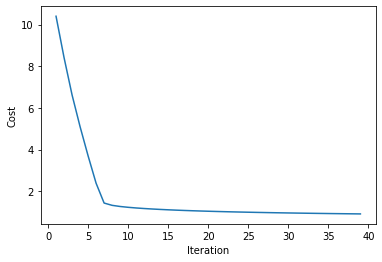

[[-5.01568344e-06  3.75174830e-06  2.88192866e-05 -1.45482477e-05
   4.26542585e-06  1.03975347e-04 -1.35596653e-05 -8.82121019e-06
   2.02915011e-04 -6.29573349e-06  1.14012221e-05  1.80495430e-05]
 [-2.54770178e-05  5.58434455e-05  4.93402856e-05 -9.76413715e-05
   2.38950930e-04  1.38279569e-04  3.65213685e-06 -1.52003908e-05
   8.38870782e-06  2.68108770e-05 -5.93572054e-05 -3.49040385e-05]
 [ 1.22358351e-04 -3.75094087e-05 -4.83153530e-04  2.00839381e-06
  -4.73056950e-06 -1.42843055e-06  3.20461439e-06  1.70165033e-06
  -1.62005859e-05  4.11191745e-06  2.41908447e-05 -5.05840286e-05]]
[[-6.93235231e-05  7.60040189e-05  3.37845572e-04]]


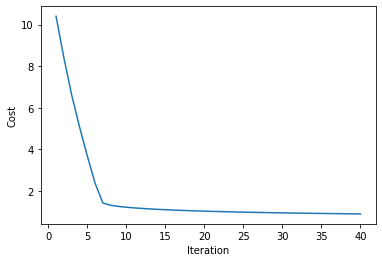

[[-4.95158825e-06  3.56928475e-06  2.84315740e-05 -1.42540726e-05
   3.60956031e-06  1.02491447e-04 -1.22384076e-05 -1.02612620e-05
   1.98876075e-04 -6.24556533e-06  1.12320494e-05  1.77678092e-05]
 [-2.52959431e-05  5.52007192e-05  4.84337784e-05 -9.69897299e-05
   2.36529700e-04  1.35291525e-04  3.65981197e-06 -1.51703592e-05
   8.39493533e-06  2.67707969e-05 -5.87625868e-05 -3.37892170e-05]
 [ 1.22083960e-04 -3.33830777e-05 -4.73764922e-04  2.00689395e-06
  -4.70439308e-06 -1.38230254e-06  3.19821994e-06  1.78217115e-06
  -1.59861397e-05  4.10218583e-06  2.43633076e-05 -5.00138557e-05]]
[[-6.86348037e-05  7.38166436e-05  3.33346147e-04]]


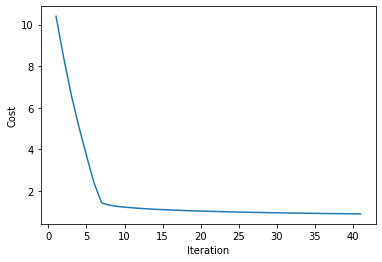

[[-4.89377523e-06  3.39376135e-06  2.80588350e-05 -1.39934215e-05
   2.97940184e-06  1.01064848e-04 -1.10982044e-05 -1.16379777e-05
   1.94993543e-04 -6.19907843e-06  1.10689261e-05  1.74976779e-05]
 [-2.51265272e-05  5.45803602e-05  4.75667463e-05 -9.63758555e-05
   2.34191443e-04  1.32440039e-04  3.66459378e-06 -1.51416735e-05
   8.40013202e-06  2.67219024e-05 -5.81933888e-05 -3.27204331e-05]
 [ 1.21778290e-04 -2.94384278e-05 -4.64744485e-04  2.00465103e-06
  -4.67940756e-06 -1.33810323e-06  3.19107393e-06  1.85878609e-06
  -1.57796064e-05  4.09155390e-06  2.45267652e-05 -4.94638134e-05]]
[[-6.80056251e-05  7.17112410e-05  3.29020579e-04]]


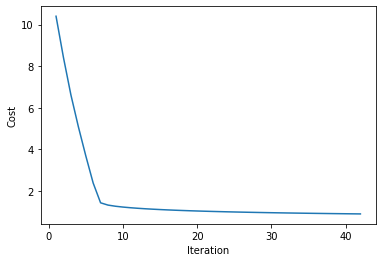

[[-4.84136987e-06  3.22488911e-06  2.77002091e-05 -1.37615727e-05
   2.37389774e-06  9.96922566e-05 -1.01132432e-05 -1.29538211e-05
   1.91258477e-04 -6.15577407e-06  1.09115928e-05  1.72384584e-05]
 [-2.49672150e-05  5.39813932e-05  4.67367623e-05 -9.57947859e-05
   2.31932491e-04  1.29716482e-04  3.66690894e-06 -1.51142608e-05
   8.40437576e-06  2.66655665e-05 -5.76484574e-05 -3.16949788e-05]
 [ 1.21446383e-04 -2.56675133e-05 -4.56070967e-04  2.00177832e-06
  -4.65555517e-06 -1.29572116e-06  3.18329683e-06  1.93167397e-06
  -1.55805506e-05  4.08016928e-06  2.46816218e-05 -4.89328192e-05]]
[[-6.74277900e-05  6.96843647e-05  3.24858900e-04]]


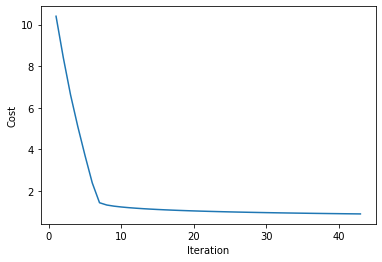

[[-4.79362437e-06  3.06239088e-06  2.73548993e-05 -1.35544888e-05
   1.79203643e-06  9.83706207e-05 -9.26144835e-06 -1.42111747e-05
   1.87662596e-04 -6.11522593e-06  1.07598015e-05  1.69895121e-05]
 [-2.48166777e-05  5.34028877e-05  4.59415873e-05 -9.52422810e-05
   2.29749345e-04  1.27112908e-04  3.66712246e-06 -1.50880523e-05
   8.40773780e-06  2.66029647e-05 -5.71266929e-05 -3.07103494e-05]
 [ 1.21092552e-04 -2.20627376e-05 -4.47724695e-04  1.99837274e-06
  -4.63278110e-06 -1.25505308e-06  3.17499178e-06  2.00100521e-06
  -1.53885682e-05  4.06815832e-06  2.48282632e-05 -4.84198671e-05]]
[[-6.68942891e-05  6.77327125e-05  3.20851875e-04]]


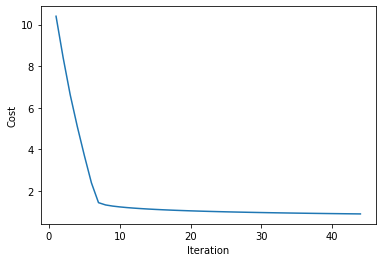

[[-4.74989907e-06  2.90600088e-06  2.70221667e-05 -1.33687160e-05
   1.23284622e-06  9.70971111e-05 -8.52393653e-06 -1.54123403e-05
   1.84198220e-04 -6.07706936e-06  1.06133150e-05  1.67502479e-05]
 [-2.46737787e-05  5.28439551e-05  4.51791530e-05 -9.47147153e-05
   2.27638671e-04  1.24621988e-04  3.66554666e-06 -1.50629836e-05
   8.41028338e-06  2.65351025e-05 -5.66270474e-05 -2.97642251e-05]
 [ 1.20720490e-04 -1.86168390e-05 -4.39687435e-04  1.99451724e-06
  -4.61103341e-06 -1.21600323e-06  3.16624700e-06  2.06694226e-06
  -1.52032834e-05  4.05562910e-06  2.49670583e-05 -4.79240211e-05]]
[[-6.63991265e-05  6.58531213e-05  3.16990939e-04]]


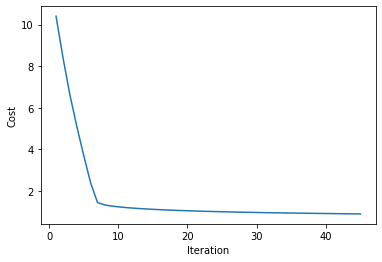

[[-4.70964657e-06  2.75546437e-06  2.67013249e-05 -1.32012989e-05
   6.95394098e-07  9.58691011e-05 -7.88455160e-06 -1.65595405e-05
   1.80858216e-04 -6.04099232e-06  1.04719068e-05  1.65201181e-05]
 [-2.45375457e-05  5.23037479e-05  4.44475463e-05 -9.42089865e-05
   2.25597292e-04  1.22236953e-04  3.66244875e-06 -1.50389937e-05
   8.41207238e-06  2.64628400e-05 -5.61485226e-05 -2.88544550e-05]
 [ 1.20333351e-04 -1.53228771e-05 -4.31942266e-04  1.99028277e-06
  -4.59026277e-06 -1.17848272e-06  3.15713796e-06  2.12963993e-06
  -1.50243468e-05  4.04267400e-06  2.50983592e-05 -4.74444092e-05]]
[[-6.59371709e-05  6.40425618e-05  3.13268135e-04]]


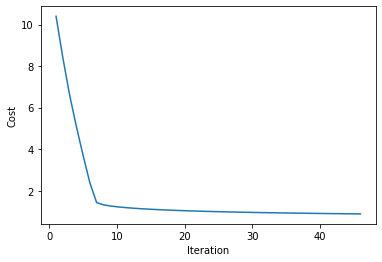

[[-4.67239825e-06  2.61053722e-06  2.63917362e-05 -1.30497080e-05
   1.78784489e-07  9.46841496e-05 -7.32946646e-06 -1.76549198e-05
   1.77635953e-04 -6.00672759e-06  1.03353603e-05  1.62986146e-05]
 [-2.44071457e-05  5.17814569e-05  4.37449953e-05 -9.37224375e-05
   2.23622179e-04  1.19951547e-04  3.65805737e-06 -1.50160257e-05
   8.41315977e-06  2.63869126e-05 -5.56901672e-05 -2.79790419e-05]
 [ 1.19933833e-04 -1.21742191e-05 -4.24473465e-04  1.98573003e-06
  -4.57042245e-06 -1.14240886e-06  3.14772916e-06  2.18924580e-06
  -1.48514327e-05  4.02937196e-06  2.52225023e-05 -4.69802182e-05]]
[[-6.55040284e-05  6.22981336e-05  3.09676069e-04]]


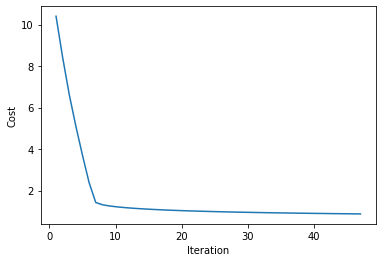

[[-4.63775269e-06  2.47098551e-06  2.60928070e-05 -1.29117770e-05
  -3.17841995e-07  9.35399849e-05 -6.84684324e-06 -1.87005464e-05
   1.74525258e-04 -5.97404619e-06  1.02034685e-05  1.60852654e-05]
 [-2.42818650e-05  5.12763102e-05  4.30698573e-05 -9.32527912e-05
   2.21710445e-04  1.17759976e-04  3.65256821e-06 -1.49940255e-05
   8.41359611e-06  2.63079493e-05 -5.52510748e-05 -2.71361294e-05]
 [ 1.19524241e-04 -9.16452698e-06 -4.17266405e-04  1.98091096e-06
  -4.55146806e-06 -1.10770473e-06  3.13807574e-06  2.24590048e-06
  -1.46842374e-05  4.01579041e-06  2.53398085e-05 -4.65306887e-05]]
[[-6.50959346e-05  6.06170599e-05  3.06207856e-04]]


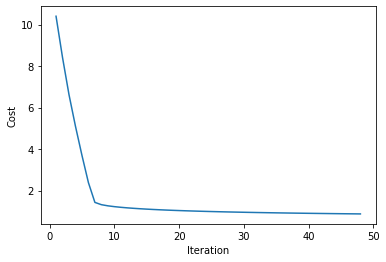

[[-4.60536588e-06  2.33658516e-06  2.58039843e-05 -1.27856499e-05
  -7.95309807e-07  9.24344909e-05 -6.42654321e-06 -1.96984134e-05
   1.71520378e-04 -5.94275180e-06  1.00760337e-05  1.58796314e-05]
 [-2.41610915e-05  5.07875712e-05  4.24206071e-05 -9.27980937e-05
   2.19859339e-04  1.15656870e-04  3.64614878e-06 -1.49729426e-05
   8.41342796e-06  2.62264877e-05 -5.48303817e-05 -2.63239900e-05]
 [ 1.19106545e-04 -6.28774473e-06 -4.10307466e-04  1.97586995e-06
  -4.53335751e-06 -1.07429862e-06  3.12822480e-06  2.29973800e-06
  -1.45224771e-05  4.00198689e-06  2.54505847e-05 -4.60951108e-05]]
[[-6.47096626e-05  5.89966832e-05  3.02857081e-04]]


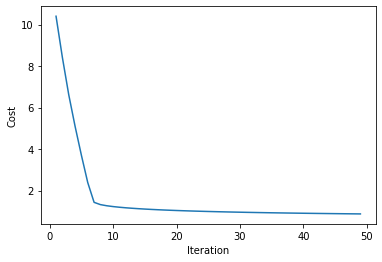

[[-4.57494282e-06  2.20712154e-06  2.55247523e-05 -1.26697359e-05
  -1.25440970e-06  9.13656943e-05 -6.05987924e-06 -2.06504410e-05
   1.68615947e-04 -5.91267592e-06  9.95286690e-06  1.56813040e-05]
 [-2.40442995e-05  5.03145371e-05  4.17958276e-05 -9.23566672e-05
   2.18066239e-04  1.13637249e-04  3.63894247e-06 -1.49527292e-05
   8.41269823e-06  2.61429873e-05 -5.44272648e-05 -2.55410140e-05]
 [ 1.18682423e-04 -3.53808612e-06 -4.03583946e-04  1.97064502e-06
  -4.51605083e-06 -1.04212364e-06  3.11821657e-06  2.35088613e-06
  -1.43658867e-05  3.98801053e-06  2.55551234e-05 -4.56728202e-05]]
[[-6.43424440e-05  5.74344596e-05  2.99617759e-04]]


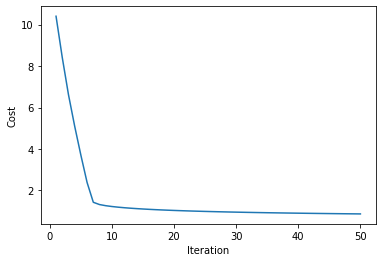

[[-4.54623041e-06  2.08238910e-06  2.52546295e-05 -1.25626707e-05
  -1.69589994e-06  9.03317524e-05 -5.73940462e-06 -2.15584781e-05
   1.65806954e-04 -5.88367385e-06  9.83378767e-06  1.54899024e-05]
 [-2.39310376e-05  4.98565372e-05  4.11941999e-05 -9.19270693e-05
   2.16328646e-04  1.11696481e-04  3.63107210e-06 -1.49333404e-05
   8.41144652e-06  2.60578409e-05 -5.40409400e-05 -2.47857003e-05]
 [ 1.18253313e-04 -9.10022827e-07 -3.97083989e-04  1.96526866e-06
  -4.49951011e-06 -1.01111732e-06  3.10808540e-06  2.39946664e-06
  -1.42142180e-05  3.97390320e-06  2.56537042e-05 -4.52631945e-05]]
[[-6.39919026e-05  5.59279552e-05  2.96484303e-04]]


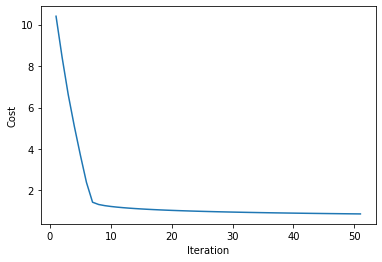

[[-4.51901130e-06  1.96219104e-06  2.49931656e-05 -1.24632833e-05
  -2.12050753e-06  8.93309433e-05 -5.45873286e-06 -2.24243045e-05
   1.63088712e-04 -5.85562122e-06  9.71862348e-06  1.53050711e-05]
 [-2.38209173e-05  4.94129315e-05  4.06144958e-05 -9.15080588e-05
   2.14644176e-04  1.09830263e-04  3.62264287e-06 -1.49147336e-05
   8.40970941e-06  2.59713842e-05 -5.36706597e-05 -2.40566470e-05]
 [ 1.17820437e-04  1.60172693e-06 -3.90796519e-04  1.95976868e-06
  -4.48369932e-06 -9.81221244e-07  3.09786062e-06  2.44559559e-06
  -1.40672385e-05  3.95970063e-06  2.57465940e-05 -4.48656501e-05]]
[[-6.36559971e-05  5.44748405e-05  2.93451486e-04]]


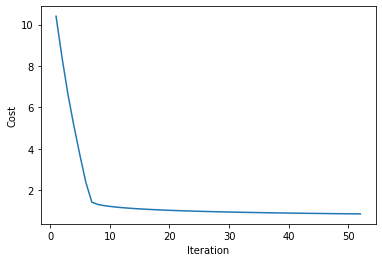

[[-4.49309878e-06  1.84633889e-06  2.47399397e-05 -1.23705685e-05
  -2.52892938e-06  8.83616561e-05 -5.21238406e-06 -2.32496324e-05
   1.60456836e-04 -5.82841102e-06  9.60720956e-06  1.51264783e-05]
 [-2.37136042e-05  4.89831092e-05  4.00555698e-05 -9.10985662e-05
   2.13010557e-04  1.08034585e-04  3.61374490e-06 -1.48968691e-05
   8.40752074e-06  2.58839039e-05 -5.33157116e-05 -2.33525439e-05]
 [ 1.17384840e-04  4.00220937e-06 -3.84711172e-04  1.95416887e-06
  -4.46858426e-06 -9.52380758e-07  3.08756723e-06  2.48938364e-06
  -1.39247302e-05  3.94543322e-06  2.58340477e-05 -4.44796390e-05]]
[[-6.33329724e-05  5.30728870e-05  2.90514421e-04]]


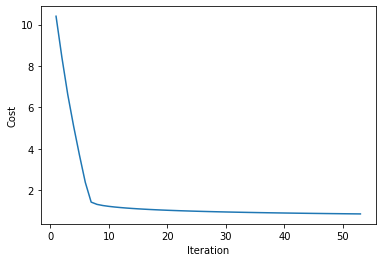

[[-4.46833231e-06  1.73465224e-06  2.44945572e-05 -1.22836627e-05
  -2.92183345e-06  8.74223820e-05 -4.99565373e-06 -2.40361088e-05
   1.57907218e-04 -5.80195109e-06  9.49938847e-06  1.49538135e-05]
 [-2.36088103e-05  4.85664876e-05  3.95163530e-05 -9.06976688e-05
   2.11425625e-04  1.06305713e-04  3.60445543e-06 -1.48797090e-05
   8.40491183e-06  2.57956449e-05 -5.29754165e-05 -2.26721651e-05]
 [ 1.16947411e-04  6.29624569e-06 -3.78818245e-04  1.94848957e-06
  -4.45413246e-06 -9.24544653e-07  3.07722657e-06  2.53093629e-06
  -1.37864883e-05  3.93112688e-06  2.59163084e-05 -4.41046464e-05]]
[[-6.30213186e-05  5.17199622e-05  2.87668527e-04]]


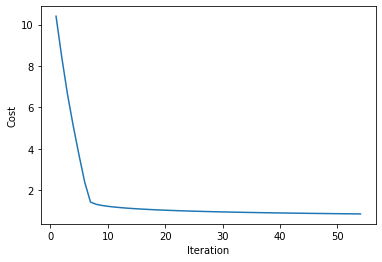

[[-4.44457374e-06  1.62695837e-06  2.42566484e-05 -1.22018232e-05
  -3.29985988e-06  8.65117068e-05 -4.80450097e-06 -2.47853173e-05
   1.55436005e-04 -5.77616200e-06  9.39500980e-06  1.47867865e-05]
 [-2.35062866e-05  4.81625104e-05  3.89958464e-05 -9.03045697e-05
   2.09887315e-04  1.04640159e-04  3.59484065e-06 -1.48632177e-05
   8.40191169e-06  2.57068165e-05 -5.26491271e-05 -2.20143623e-05]
 [ 1.16508908e-04  8.48844217e-06 -3.73108644e-04  1.94274818e-06
  -4.44031306e-06 -8.97664909e-07  3.06685681e-06  2.57035413e-06
  -1.36523206e-05  3.91680362e-06  2.59936086e-05 -4.37401881e-05]]
[[-6.27197353e-05  5.04140261e-05  2.84909511e-04]]


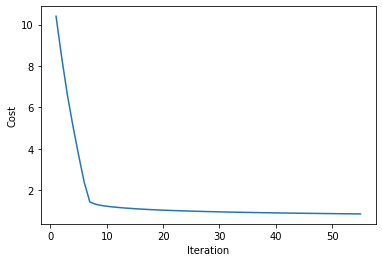

[[-4.42170412e-06  1.52309193e-06  2.40258663e-05 -1.21244112e-05
  -3.66362212e-06  8.56283036e-05 -4.63545294e-06 -2.54987803e-05
   1.53039581e-04 -5.75097520e-06  9.29392980e-06  1.46251250e-05]
 [-2.34058185e-05  4.77706466e-05  3.84931158e-05 -8.99185795e-05
   2.08393656e-04  1.03034667e-04  3.58495731e-06 -1.48473618e-05
   8.39854725e-06  2.56175970e-05 -5.23362263e-05 -2.13780593e-05]
 [ 1.16069976e-04  1.05831999e-05 -3.67573835e-04  1.93695958e-06
  -4.42709674e-06 -8.71696455e-07  3.05647344e-06  2.60773307e-06
  -1.35220462e-05  3.90248216e-06  2.60661700e-05 -4.33858080e-05]]
[[-6.24271020e-05  4.91531267e-05  2.82233343e-04]]


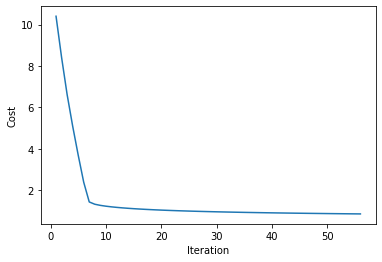

[[-4.39962090e-06  1.42289465e-06  2.38018851e-05 -1.20508767e-05
  -4.01370792e-06  8.47709258e-05 -4.48552336e-06 -2.61779608e-05
   1.50714549e-04 -5.72633145e-06  9.19601115e-06  1.44685740e-05]
 [-2.33072198e-05  4.73903896e-05  3.80072864e-05 -8.95391009e-05
   2.06942772e-04  1.01486195e-04  3.57485407e-06 -1.48321096e-05
   8.39484348e-06  2.55281388e-05 -5.20361254e-05 -2.07622459e-05]
 [ 1.15631164e-04  1.25847241e-05 -3.62205806e-04  1.93113648e-06
  -4.41445563e-06 -8.46596947e-07  3.04608962e-06  2.64316458e-06
  -1.33954948e-05  3.88817838e-06  2.61342045e-05 -4.30410766e-05]]
[[-6.21424515e-05  4.79353967e-05  2.79636237e-04]]


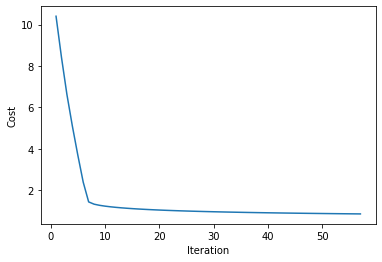

[[-4.37823566e-06  1.32621501e-06  2.35843983e-05 -1.19807460e-05
  -4.35068045e-06  8.39384021e-05 -4.35214286e-06 -2.68242645e-05
   1.48457712e-04 -5.70217953e-06  9.10112263e-06  1.43168941e-05]
 [-2.32103297e-05  4.70212554e-05  3.75375388e-05 -8.91656156e-05
   2.05532871e-04  9.99918937e-05  3.56457266e-06 -1.48174310e-05
   8.39082361e-06  2.54385716e-05 -5.17482634e-05 -2.01659734e-05]
 [ 1.15192936e-04  1.44970329e-05 -3.56997024e-04  1.92528977e-06
  -4.40236324e-06 -8.22326569e-07  3.03571654e-06  2.67673588e-06
  -1.32725059e-05  3.87390573e-06  2.61979144e-05 -4.27055888e-05]]
[[-6.18649488e-05  4.67590495e-05  2.77114634e-04]]


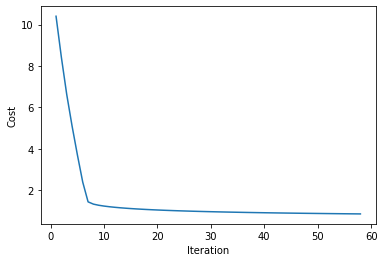

[[-4.35747204e-06  1.23290800e-06  2.33731178e-05 -1.19136104e-05
  -4.67507922e-06  8.31296299e-05 -4.23309954e-06 -2.74390416e-05
   1.46266065e-04 -5.67847506e-06  9.00913882e-06  1.41698604e-05]
 [-2.31150082e-05  4.66627824e-05  3.70831041e-05 -8.87976730e-05
   2.04162244e-04  9.85490949e-05  3.55414885e-06 -1.48032979e-05
   8.38650921e-06  2.53490059e-05 -5.14721049e-05 -1.95883498e-05]
 [ 1.14755688e-04  1.63239659e-05 -3.51940404e-04  1.91942872e-06
  -4.39079439e-06 -7.98847848e-07  3.02536370e-06  2.70853020e-06
  -1.31529283e-05  3.85967558e-06  2.62574929e-05 -4.23789619e-05]]
[[-6.15938721e-05  4.56223759e-05  2.74665183e-04]]


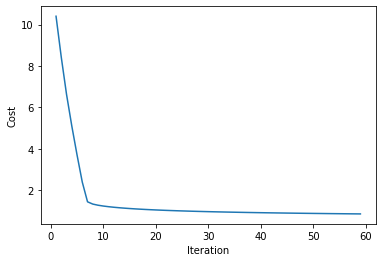

[[-4.33726403e-06  1.14283481e-06  2.31677720e-05 -1.18491176e-05
  -4.98742112e-06  8.23435712e-05 -4.12648809e-06 -2.80235890e-05
   1.44136775e-04 -5.65517956e-06  8.91993988e-06  1.40272613e-05]
 [-2.30211339e-05  4.63145294e-05  3.66432607e-05 -8.84348807e-05
   2.02829261e-04  9.71552976e-05  3.54361331e-06 -1.47896834e-05
   8.38192038e-06  2.52595359e-05 -5.12071395e-05 -1.90285362e-05]
 [ 1.14319753e-04  1.80691925e-05 -3.47029273e-04  1.91356126e-06
  -4.37972512e-06 -7.76125488e-07  3.01503913e-06  2.73862692e-06
  -1.30366192e-05  3.84549753e-06  2.63131245e-05 -4.20608348e-05]]
[[-6.13285965e-05  4.45237406e-05  2.72284732e-04]]


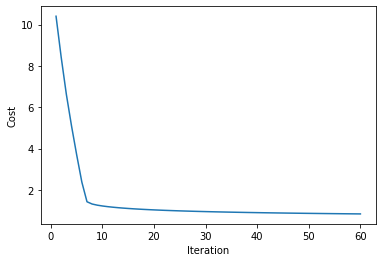

[[-4.31755456e-06  1.05586255e-06  2.29681051e-05 -1.17869631e-05
  -5.28820127e-06  8.15792476e-05 -4.03066634e-06 -2.85791520e-05
   1.42067170e-04 -5.63225959e-06  8.83341127e-06  1.38888978e-05]
 [-2.29286011e-05  4.59760755e-05  3.62173305e-05 -8.80768963e-05
   2.01532367e-04  9.58081548e-05  3.53299236e-06 -1.47765624e-05
   8.37707582e-06  2.51702413e-05 -5.09528800e-05 -1.84857421e-05]
 [ 1.13885414e-04  1.97362193e-05 -3.42257341e-04  1.90769414e-06
  -4.36913266e-06 -7.54126215e-07  3.00474964e-06  2.76710174e-06
  -1.29234437e-05  3.83137965e-06  2.63649853e-05 -4.17508656e-05]]
[[-6.10685806e-05  4.34615789e-05  2.69970306e-04]]


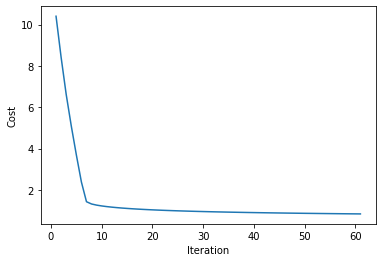

[[-4.29829417e-06  9.71864040e-07  2.27738757e-05 -1.17268839e-05
  -5.57789398e-06  8.08357363e-05 -3.94421809e-06 -2.91069263e-05
   1.40054730e-04 -5.60968607e-06  8.74944351e-06  1.37545826e-05]
 [-2.28373174e-05  4.56470184e-05  3.58046758e-05 -8.77234203e-05
   2.00270077e-04  9.45054620e-05  3.52230855e-06 -1.47639109e-05
   8.37199297e-06  2.50811899e-05 -5.07088618e-05 -1.79592228e-05]
 [ 1.13452907e-04  2.13283977e-05 -3.37618678e-04  1.90183313e-06
  -4.35899532e-06 -7.32818634e-07  2.99450096e-06  2.79402695e-06
  -1.28132743e-05  3.81732871e-06  2.64132439e-05 -4.14487312e-05]]
[[-6.08133545e-05  4.24343939e-05  2.67719099e-04]]


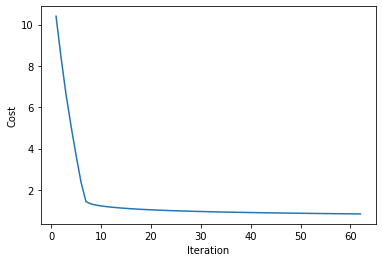

[[-4.27944001e-06  8.90717529e-07  2.25848560e-05 -1.16686523e-05
  -5.85695361e-06  8.01121660e-05 -3.86592125e-06 -2.96080596e-05
   1.38097075e-04 -5.58743365e-06  8.66793195e-06  1.36241390e-05]
 [-2.27472022e-05  4.53269741e-05  3.54046965e-05 -8.73741903e-05
   1.99040975e-04  9.32451475e-05  3.51158119e-06 -1.47517063e-05
   8.36668809e-06  2.49924391e-05 -5.04746416e-05 -1.74482758e-05]
 [ 1.13022433e-04  2.28489313e-05 -3.33107684e-04  1.89598312e-06
  -4.34929248e-06 -7.12173106e-07  2.98429790e-06  2.81947149e-06
  -1.27059903e-05  3.80335036e-06  2.64580609e-05 -4.11541254e-05]]
[[-6.05625101e-05  4.14407531e-05  2.65528464e-04]]


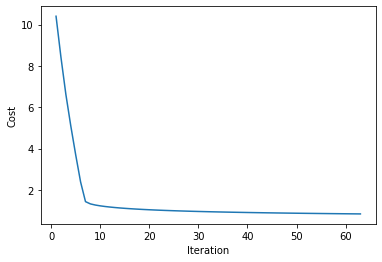

[[-4.26095485e-06  8.12306472e-07  2.24008307e-05 -1.16120713e-05
  -6.12581539e-06  7.94077135e-05 -3.79472061e-06 -3.00836537e-05
   1.36191957e-04 -5.56548020e-06  8.58877654e-06  1.34974004e-05]
 [-2.26581849e-05  4.50155756e-05  3.50168273e-05 -8.70289756e-05
   1.97843707e-04  9.20252619e-05  3.50082685e-06 -1.47399272e-05
   8.36117636e-06  2.49040373e-05 -5.02497960e-05 -1.69522379e-05]
 [ 1.12594157e-04  2.43008820e-05 -3.28719070e-04  1.89014829e-06
  -4.34000451e-06 -6.92161620e-07  2.97414451e-06  2.84350117e-06
  -1.26014775e-05  3.78944930e-06  2.64995900e-05 -4.08667580e-05]]
[[-6.03156924e-05  4.04792861e-05  2.63395896e-04]]


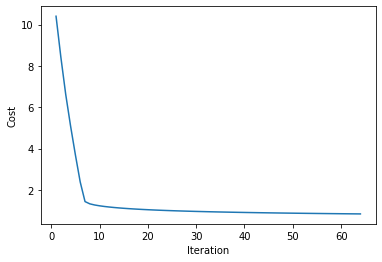

[[-4.24280636e-06  7.36519307e-07  2.22215963e-05 -1.15569702e-05
  -6.38489620e-06  7.87216006e-05 -3.72970450e-06 -3.05347658e-05
   1.34337247e-04 -5.54380636e-06  8.51188164e-06  1.33742094e-05]
 [-2.25702035e-05  4.47124726e-05  3.46405351e-05 -8.66875729e-05
   1.96676984e-04  9.08439703e-05  3.49005969e-06 -1.47285534e-05
   8.35547196e-06  2.48160252e-05 -5.00339212e-05 -1.64704824e-05]
 [ 1.12168218e-04  2.56871770e-05 -3.24447835e-04  1.88433215e-06
  -4.33111273e-06 -6.72757691e-07  2.96404413e-06  2.86617879e-06
  -1.24996278e-05  3.77562940e-06  2.65379779e-05 -4.05863539e-05]]
[[-6.00725917e-05  3.95486812e-05  2.61319031e-04]]


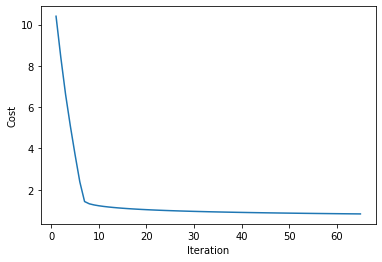

[[-4.22496639e-06  6.63249231e-07  2.20469602e-05 -1.15032007e-05
  -6.63459539e-06  7.80530908e-05 -3.67008475e-06 -3.09624105e-05
   1.32530931e-04 -5.52239516e-06  8.43715580e-06  1.32544175e-05]
 [-2.24832033e-05  4.44173300e-05  3.42753173e-05 -8.63498028e-05
   1.95539571e-04  8.96995435e-05  3.47929184e-06 -1.47175656e-05
   8.34958814e-06  2.47284371e-05 -4.98266316e-05 -1.60024171e-05]
 [ 1.11744731e-04  2.70106148e-05 -3.20289245e-04  1.87853771e-06
  -4.32259932e-06 -6.53936255e-07  2.95399957e-06  2.88756433e-06
  -1.24003384e-05  3.76189383e-06  2.65733650e-05 -4.03126518e-05]]
[[-5.98329381e-05  3.86476834e-05  2.59295627e-04]]


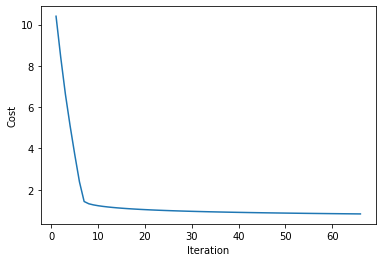

[[-4.20741040e-06  5.92394000e-07  2.18767399e-05 -1.14506342e-05
  -6.87529549e-06  7.74014869e-05 -3.61517956e-06 -3.13675615e-05
   1.30771102e-04 -5.50123170e-06  8.36451158e-06  1.31378840e-05]
 [-2.23971361e-05  4.41298280e-05  3.39206992e-05 -8.60155061e-05
   1.94430293e-04  8.85903511e-05  3.46853367e-06 -1.47069456e-05
   8.34353728e-06  2.46413015e-05 -4.96275592e-05 -1.55474816e-05]
 [ 1.11323789e-04  2.82738709e-05 -3.16238821e-04  1.87276746e-06
  -4.31444735e-06 -6.35673577e-07  2.94401310e-06  2.90771503e-06
  -1.23035120e-05  3.74824517e-06  2.66058851e-05 -4.00454039e-05]]
[[-5.95964953e-05  3.77750915e-05  2.57323565e-04]]


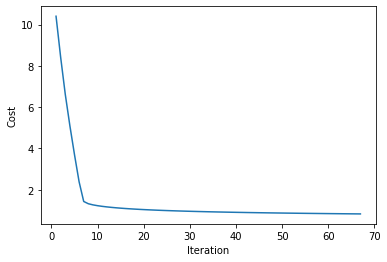

[[-4.19011697e-06  5.23855726e-07  2.17107627e-05 -1.13991588e-05
  -7.10736294e-06  7.67661281e-05 -3.56439875e-06 -3.17511529e-05
   1.29055953e-04 -5.48030284e-06  8.29386534e-06  1.30244761e-05]
 [-2.23119594e-05  4.38496607e-05  3.35762323e-05 -8.56845415e-05
   1.93348023e-04  8.75148543e-05  3.45779403e-06 -1.46966764e-05
   8.33733097e-06  2.45546420e-05 -4.94363523e-05 -1.51051452e-05]
 [ 1.10905468e-04  2.94795038e-05 -3.12292316e-04  1.86702355e-06
  -4.30664067e-06 -6.17947165e-07  2.93408660e-06  2.92668555e-06
  -1.22090562e-05  3.73468546e-06  2.66356664e-05 -3.97843742e-05]]
[[-5.93630565e-05  3.69297560e-05  2.55400834e-04]]


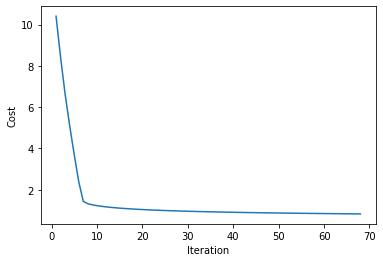

[[-4.17306737e-06  4.57540692e-07  2.15488648e-05 -1.13486771e-05
  -7.33114874e-06  7.61463878e-05 -3.51723112e-06 -3.21140808e-05
   1.27383767e-04 -5.45959699e-06  8.22513712e-06  1.29140678e-05]
 [-2.22276353e-05  4.35765358e-05  3.32414925e-05 -8.53567827e-05
   1.92291689e-04  8.64716003e-05  3.44708046e-06 -1.46867414e-05
   8.33098008e-06  2.44684783e-05 -4.92526754e-05 -1.46749051e-05]
 [ 1.10489829e-04  3.06299597e-05 -3.08445705e-04  1.86130772e-06
  -4.29916390e-06 -6.00735691e-07  2.92422157e-06  2.94452807e-06
  -1.21168831e-05  3.72121631e-06  2.66628313e-05 -3.95293387e-05]]
[[-5.91324399e-05  3.61105766e-05  2.53525530e-04]]


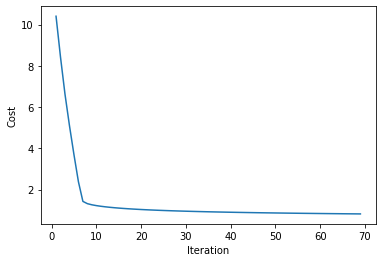

[[-4.15624521e-06  3.93359163e-07  2.13908905e-05 -1.12991043e-05
  -7.54698914e-06  7.55416714e-05 -3.47323361e-06 -3.24572049e-05
   1.25752916e-04 -5.43910389e-06  8.15825040e-06  1.28065399e-05]
 [-2.21441301e-05  4.33101740e-05  3.29160786e-05 -8.50321169e-05
   1.91260264e-04  8.54592159e-05  3.43639937e-06 -1.46771253e-05
   8.32449476e-06  2.43828262e-05 -4.90762078e-05 -1.42562848e-05]
 [ 1.10076921e-04  3.17275783e-05 -3.04695168e-04  1.85562147e-06
  -4.29200238e-06 -5.84018916e-07  2.91441920e-06  2.96129245e-06
  -1.20269092e-05  3.70783897e-06  2.66874966e-05 -3.92800840e-05]]
[[-5.89044859e-05  3.53165001e-05  2.51695842e-04]]


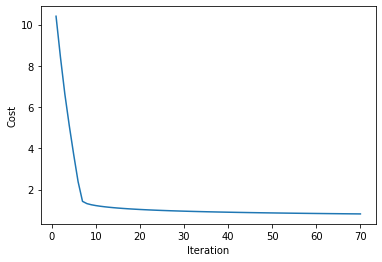

[[-4.13963609e-06  3.31225220e-07  2.12366924e-05 -1.12503662e-05
  -7.75520627e-06  7.49514144e-05 -3.43202196e-06 -3.27813499e-05
   1.24161855e-04 -5.41881443e-06  8.09313201e-06  1.27017793e-05]
 [-2.20614137e-05  4.30503080e-05  3.25996107e-05 -8.47104427e-05
   1.90252767e-04  8.44764026e-05  3.42575623e-06 -1.46678132e-05
   8.31788454e-06  2.42976987e-05 -4.89066432e-05 -1.38488319e-05]
 [ 1.09666780e-04  3.27745972e-05 -3.01037078e-04  1.84996602e-06
  -4.28514215e-06 -5.67777625e-07  2.90468042e-06  2.97702631e-06
  -1.19390551e-05  3.69455435e-06  2.67097743e-05 -3.90364069e-05]]
[[-5.86790535e-05  3.45465184e-05  2.49910054e-04]]


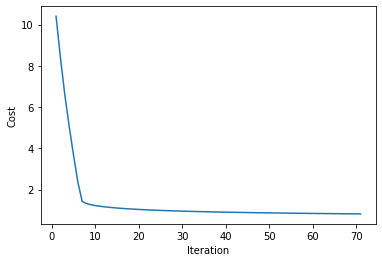

[[-4.12322735e-06  2.71056587e-07  2.10861300e-05 -1.12023980e-05
  -7.95610870e-06  7.43750805e-05 -3.39326265e-06 -3.30873069e-05
   1.22609114e-04 -5.39872050e-06  8.02971195e-06  1.25996788e-05]
 [-2.19794592e-05  4.27966826e-05  3.22917289e-05 -8.43916686e-05
   1.89268261e-04  8.35219316e-05  3.41515564e-06 -1.46587914e-05
   8.31115836e-06  2.42131060e-05 -4.87436891e-05 -1.34521172e-05]
 [ 1.09259432e-04  3.37731564e-05 -2.97467989e-04  1.84434235e-06
  -4.27856987e-06 -5.51993560e-07  2.89500591e-06  2.99177512e-06
  -1.18532450e-05  3.68136307e-06  2.67297711e-05 -3.87981139e-05]]
[[-5.84560182e-05  3.37996664e-05  2.48166534e-04]]


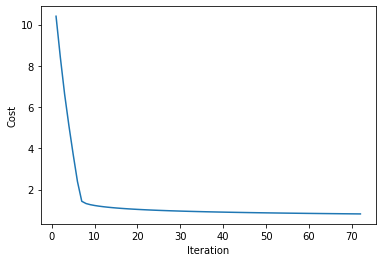

[[-4.10700783e-06  2.12774478e-07  2.09390701e-05 -1.11551432e-05
  -8.14999207e-06  7.38121596e-05 -3.35666604e-06 -3.33758345e-05
   1.21093295e-04 -5.37881484e-06  7.96792323e-06  1.25001364e-05]
 [-2.18982421e-05  4.25490534e-05  3.19920919e-05 -8.40757120e-05
   1.88305851e-04  8.25946391e-05  3.40460152e-06 -1.46500465e-05
   8.30432460e-06  2.41290561e-05 -4.85870659e-05 -1.30657329e-05]
 [ 1.08854899e-04  3.47253034e-05 -2.93984624e-04  1.83875129e-06
  -4.27227285e-06 -5.36649367e-07  2.88539619e-06  3.00558234e-06
  -1.17694070e-05  3.66826554e-06  2.67475893e-05 -3.85650204e-05]]
[[-5.82352696e-05  3.30750202e-05  2.46463730e-04]]


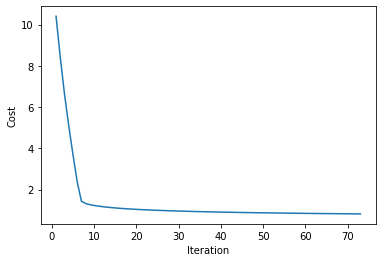

[[-4.09096768e-06  1.56303440e-07  2.07953857e-05 -1.11085519e-05
  -8.33713960e-06  7.32621666e-05 -3.32198041e-06 -3.36476606e-05
   1.19613067e-04 -5.35909096e-06  7.90770175e-06  1.24030553e-05]
 [-2.18177408e-05  4.23071870e-05  3.17003760e-05 -8.37624976e-05
   1.87364680e-04  8.16934225e-05  3.39409713e-06 -1.46415660e-05
   8.29739113e-06  2.40455550e-05 -4.84365065e-05 -1.26892912e-05]
 [ 1.08453191e-04  3.56329966e-05 -2.90583866e-04  1.83319349e-06
  -4.26623899e-06 -5.21728534e-07  2.87585157e-06  3.01848947e-06
  -1.16874724e-05  3.65526195e-06  2.67633265e-05 -3.83369505e-05]]
[[-5.80167098e-05  3.23716950e-05  2.44800166e-04]]


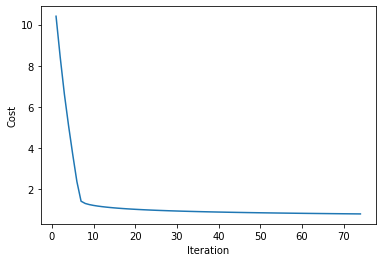

[[-4.07509819e-06  1.01571210e-07  2.06549561e-05 -1.10625807e-05
  -8.51782264e-06  7.27246396e-05 -3.28898682e-06 -3.39034829e-05
   1.18167164e-04 -5.33954302e-06  7.84898618e-06  1.23083438e-05]
 [-2.17379351e-05  4.20708599e-05  3.14162740e-05 -8.34519567e-05
   1.86443929e-04  8.08172362e-05  3.38364522e-06 -1.46333379e-05
   8.29036534e-06  2.39626071e-05 -4.82917556e-05 -1.23224234e-05]
 [ 1.08054315e-04  3.64981097e-05 -2.87262749e-04  1.82766944e-06
  -4.26045673e-06 -5.07215349e-07  2.86637225e-06  3.03053620e-06
  -1.16073756e-05  3.64235233e-06  2.67770761e-05 -3.81137359e-05]]
[[-5.78002512e-05  3.16888438e-05  2.43174438e-04]]


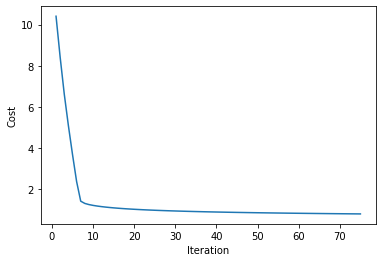

[[-4.05939160e-06  4.85085754e-08  2.05176662e-05 -1.10171909e-05
  -8.69230120e-06  7.21991388e-05 -3.25749472e-06 -3.41439709e-05
   1.16754380e-04 -5.32016574e-06  7.79171782e-06  1.22159141e-05]
 [-2.16588072e-05  4.18398584e-05  3.11394938e-05 -8.31440264e-05
   1.85542817e-04  7.99650884e-05  3.37324808e-06 -1.46253508e-05
   8.28325415e-06  2.38802155e-05 -4.81525690e-05 -1.19647787e-05]
 [ 1.07658271e-04  3.73224355e-05 -2.84018447e-04  1.82217956e-06
  -4.25491505e-06 -4.93094847e-07  2.85695830e-06  3.04176043e-06
  -1.15290543e-05  3.62953656e-06  2.67889274e-05 -3.78952163e-05]]
[[-5.75858158e-05  3.10256555e-05  2.41585206e-04]]


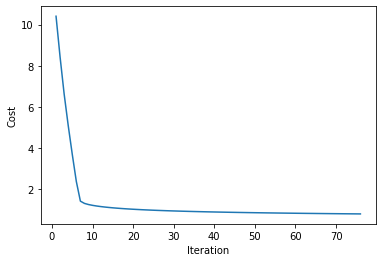

[[-4.04384103e-06 -2.95075746e-09  2.03834065e-05 -1.09723488e-05
  -8.86082439e-06  7.16852449e-05 -3.22733815e-06 -3.43697665e-05
   1.15373563e-04 -5.30095434e-06  7.73584047e-06  1.21256832e-05]
 [-2.15803403e-05  4.16139780e-05  3.08697580e-05 -8.28386490e-05
   1.84660593e-04  7.91360372e-05  3.36290758e-06 -1.46175941e-05
   8.27606411e-06  2.37983818e-05 -4.80187136e-05 -1.16160229e-05]
 [ 1.07265058e-04  3.81076895e-05 -2.80848268e-04  1.81672411e-06
  -4.24960343e-06 -4.79352769e-07  2.84760967e-06  3.05219841e-06
  -1.14524487e-05  3.61681438e-06  2.67989658e-05 -3.76812382e-05]]
[[-5.73733335e-05  3.03813533e-05  2.40031195e-04]]


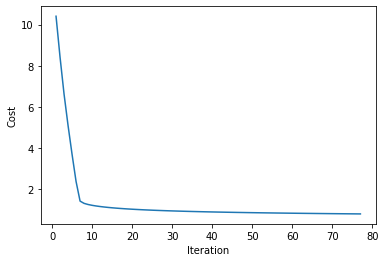

[[-4.02844032e-06 -5.28702930e-08  2.02520724e-05 -1.09280245e-05
  -9.02363091e-06  7.11825582e-05 -3.19837241e-06 -3.45814853e-05
   1.14023616e-04 -5.28190446e-06  7.68130036e-06  1.20375718e-05]
 [-2.15025195e-05  4.13930230e-05  3.06068029e-05 -8.25357708e-05
   1.83796543e-04  7.83291881e-05  3.35262527e-06 -1.46100575e-05
   8.26880133e-06  2.37171066e-05 -4.78899663e-05 -1.12758376e-05]
 [ 1.06874667e-04  3.88555134e-05 -2.77749642e-04  1.81130331e-06
  -4.24451185e-06 -4.65975522e-07  2.83832623e-06  3.06188475e-06
  -1.13775018e-05  3.60418546e-06  2.68072730e-05 -3.74716551e-05]]
[[-5.71627412e-05  2.97551932e-05  2.38511189e-04]]


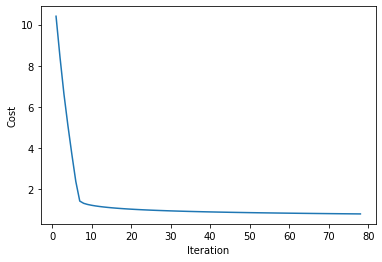

[[-4.01318398e-06 -1.01310866e-07  2.01235641e-05 -1.08841915e-05
  -9.18094948e-06  7.06906971e-05 -3.17047131e-06 -3.47797176e-05
   1.12703493e-04 -5.26301214e-06  7.62804599e-06  1.19515043e-05]
 [-2.14253306e-05  4.11768062e-05  3.03503773e-05 -8.22353423e-05
   1.82949981e-04  7.75436910e-05  3.34240240e-06 -1.46027312e-05
   8.26147159e-06  2.36363899e-05 -4.77661137e-05 -1.09439194e-05]
 [ 1.06487089e-04  3.95674782e-05 -2.74720120e-04  1.80591726e-06
  -4.23963072e-06 -4.52950139e-07  2.82910778e-06  3.07085258e-06
  -1.13041591e-05  3.59164933e-06  2.68139270e-05 -3.72663268e-05]]
[[-5.69539818e-05  2.91464628e-05  2.37024027e-04]]


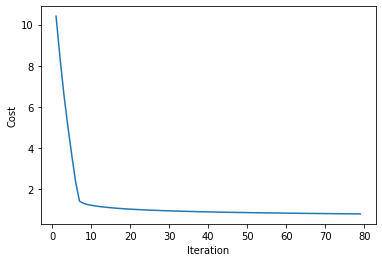

[[-3.99806704e-06 -1.48330757e-07  1.99977865e-05 -1.08408262e-05
  -9.33299932e-06  7.02092977e-05 -3.14352463e-06 -3.49650296e-05
   1.11412192e-04 -5.24427373e-06  7.57602805e-06  1.18674087e-05]
 [-2.13487608e-05  4.09651485e-05  3.01002422e-05 -8.19373173e-05
   1.82120251e-04  7.67787371e-05  3.33223996e-06 -1.45956059e-05
   8.25408031e-06  2.35562307e-05 -4.76469521e-05 -1.06199786e-05]
 [ 1.06102310e-04  4.02450879e-05 -2.71757363e-04  1.80056604e-06
  -4.23495091e-06 -4.40264243e-07  2.81995404e-06  3.07913355e-06
  -1.12323686e-05  3.57920550e-06  2.68190026e-05 -3.70651189e-05]]
[[-5.67470039e-05  2.85544796e-05  2.35568601e-04]]


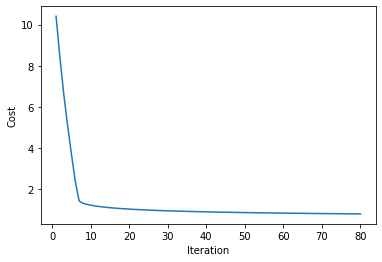

[[-3.98308505e-06 -1.93985804e-07  1.98746486e-05 -1.07979079e-05
  -9.47999046e-06  6.97380120e-05 -3.11743608e-06 -3.51379643e-05
   1.10148758e-04 -5.22568588e-06  7.52519934e-06  1.17852164e-05]
 [-2.12727980e-05  4.07578782e-05  2.98561699e-05 -8.16416526e-05
   1.81306727e-04  7.60335571e-05  3.32213872e-06 -1.45886728e-05
   8.24663259e-06  2.34766272e-05 -4.75322862e-05 -1.03037392e-05]
 [ 1.05720317e-04  4.08897816e-05 -2.68859138e-04  1.79524964e-06
  -4.23046367e-06 -4.27906020e-07  2.81086470e-06  3.08675793e-06
  -1.11620805e-05  3.56685338e-06  2.68225711e-05 -3.68679029e-05]]
[[-5.65417604e-05  2.79785896e-05  2.34143854e-04]]


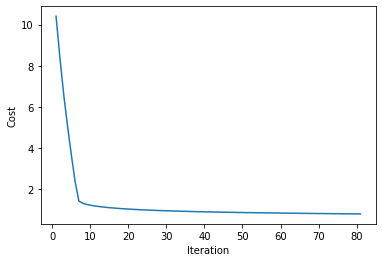

[[-3.96823397e-06 -2.38329510e-07  1.97540635e-05 -1.07554177e-05
  -9.62212423e-06  6.92765078e-05 -3.09212140e-06 -3.52990421e-05
   1.08912278e-04 -5.20724548e-06  7.47551464e-06  1.17048619e-05]
 [-2.11974311e-05  4.05548312e-05  2.96179434e-05 -8.13483074e-05
   1.80508808e-04  7.53074185e-05  3.31209925e-06 -1.45819236e-05
   8.23913326e-06  2.33975774e-05 -4.74219295e-05 -9.99493727e-06]
 [ 1.05341092e-04  4.15029373e-05 -2.66023310e-04  1.78996801e-06
  -4.22616069e-06 -4.15864180e-07  2.80183939e-06  3.09375465e-06
  -1.10932470e-05  3.55459234e-06  2.68247011e-05 -3.66745558e-05]]
[[-5.63382084e-05  2.74181666e-05  2.32748773e-04]]


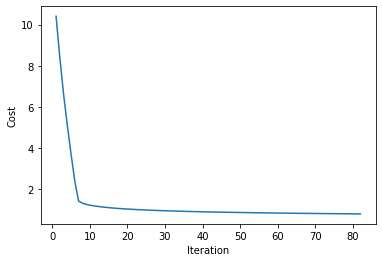

[[-3.95351016e-06 -2.81413141e-07  1.96359481e-05 -1.07133389e-05
  -9.75959356e-06  6.88244673e-05 -3.06750686e-06 -3.54487623e-05
   1.07701878e-04 -5.18894967e-06  7.42693066e-06  1.16262825e-05]
 [-2.11226495e-05  4.03558501e-05  2.93853558e-05 -8.10572437e-05
   1.79725920e-04  7.45996235e-05  3.30212198e-06 -1.45753502e-05
   8.23158682e-06  2.33190786e-05 -4.73157036e-05 -9.69332084e-06]
 [ 1.04964616e-04  4.20858741e-05 -2.63247838e-04  1.78472107e-06
  -4.22203399e-06 -4.04127934e-07  2.79287769e-06  3.10015140e-06
  -1.10258224e-05  3.54242169e-06  2.68254577e-05 -3.64849594e-05]]
[[-5.61363086e-05  2.68726104e-05  2.31382392e-04]]


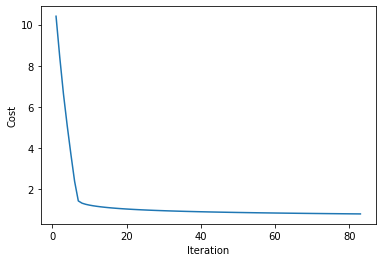

[[-3.93891026e-06 -3.23285825e-07  1.95202230e-05 -1.06716568e-05
  -9.89258340e-06  6.83815863e-05 -3.04352781e-06 -3.55876037e-05
   1.06516722e-04 -5.17079574e-06  7.37940590e-06  1.15494185e-05]
 [-2.10484434e-05  4.01607846e-05  2.91582096e-05 -8.07684251e-05
   1.78957513e-04  7.39095071e-05  3.29220718e-06 -1.45689451e-05
   8.22399756e-06  2.32411277e-05 -4.72134376e-05 -9.39864908e-06]
 [ 1.04590870e-04  4.26398549e-05 -2.60530769e-04  1.77950870e-06
  -4.21807598e-06 -3.92686963e-07  2.78397917e-06  3.10597465e-06
  -1.09597631e-05  3.53034073e-06  2.68249037e-05 -3.62990006e-05]]
[[-5.59360248e-05  2.63413460e-05  2.30043786e-04]]


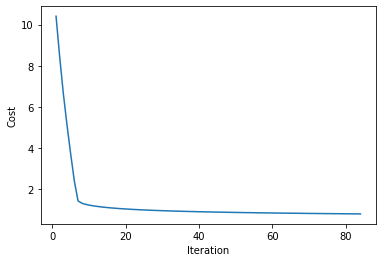

[[-3.92443124e-06 -3.63994642e-07  1.94068121e-05 -1.06303576e-05
  -1.00212710e-05  6.79475742e-05 -3.02012756e-06 -3.57160254e-05
   1.05356010e-04 -5.15278121e-06  7.33290065e-06  1.14742129e-05]
 [-2.09748035e-05  3.99694903e-05  2.89363162e-05 -8.04818174e-05
   1.78203060e-04  7.32364351e-05  3.28235501e-06 -1.45627009e-05
   8.21636948e-06  2.31637215e-05 -4.71149682e-05 -9.11069166e-06]
 [ 1.04219833e-04  4.31660888e-05 -2.57870236e-04  1.77433074e-06
  -4.21427938e-06 -3.81531399e-07  2.77514335e-06  3.11124970e-06
  -1.08950269e-05  3.51834872e-06  2.68230988e-05 -3.61165709e-05]]
[[-5.57373234e-05  2.58238225e-05  2.28732069e-04]]


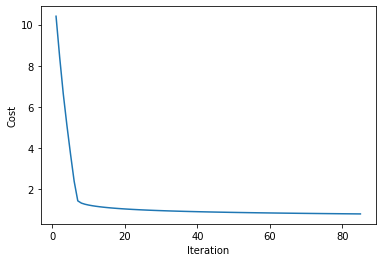

[[-3.91007030e-06 -4.03584717e-07  1.92956426e-05 -1.05894293e-05
  -1.01458263e-05  6.75221521e-05 -2.99725631e-06 -3.58344674e-05
   1.04218975e-04 -5.13490370e-06  7.28737684e-06  1.14006109e-05]
 [-2.09017210e-05  3.97818292e-05  2.87194958e-05 -8.01973878e-05
   1.77462057e-04  7.25798026e-05  3.27256552e-06 -1.45566109e-05
   8.20870638e-06  2.30868562e-05 -4.70201391e-05 -8.82922825e-06]
 [ 1.03851484e-04  4.36657339e-05 -2.55264449e-04  1.76918702e-06
  -4.21063725e-06 -3.70651793e-07  2.76636976e-06  3.11600080e-06
  -1.08315737e-05  3.50644489e-06  2.68201003e-05 -3.59375660e-05]]
[[-5.55401735e-05  2.53195119e-05  2.27446396e-04]]


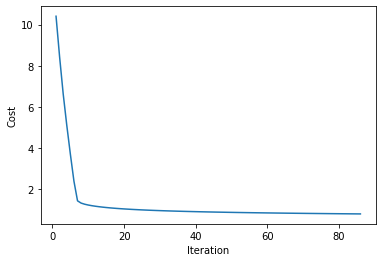

[[-3.89582485e-06 -4.42099298e-07  1.91866446e-05 -1.05488609e-05
  -1.02664121e-05  6.71050532e-05 -2.97487027e-06 -3.59433520e-05
   1.03104884e-04 -5.11716101e-06  7.24279800e-06  1.13285603e-05]
 [-2.08291875e-05  3.95976690e-05  2.85075763e-05 -7.99151052e-05
   1.76734021e-04  7.19390321e-05  3.26283868e-06 -1.45506683e-05
   8.20101182e-06  2.30105280e-05 -4.69288005e-05 -8.55404795e-06]
 [ 1.03485799e-04  4.41398990e-05 -2.52711695e-04  1.76407734e-06
  -4.20714297e-06 -3.60039099e-07  2.75765787e-06  3.12025109e-06
  -1.07693649e-05  3.49462844e-06  2.68159630e-05 -3.57618858e-05]]
[[-5.53445462e-05  2.48279081e-05  2.26185952e-04]]


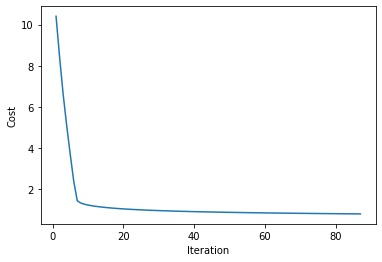

[[-3.88169252e-06 -4.79579841e-07  1.90797515e-05 -1.05086423e-05
  -1.03831846e-05  6.66960218e-05 -2.95293089e-06 -3.60430840e-05
   1.02013031e-04 -5.09955102e-06  7.19912917e-06  1.12580111e-05]
 [-2.07571951e-05  3.94168829e-05  2.83003932e-05 -7.96349396e-05
   1.76018490e-04  7.13135722e-05  3.25317436e-06 -1.45448670e-05
   8.19328918e-06  2.29347328e-05 -4.68408093e-05 -8.28494882e-06]
 [ 1.03122756e-04  4.45896459e-05 -2.50210331e-04  1.75900149e-06
  -4.20379019e-06 -3.49684651e-07  2.74900718e-06  3.12402275e-06
  -1.07083634e-05  3.48289860e-06  2.68107393e-05 -3.55894342e-05]]
[[-5.51504143e-05  2.43485260e-05  2.24949961e-04]]


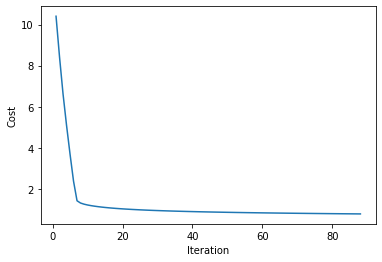

[[-3.86767108e-06 -5.16066088e-07  1.89748990e-05 -1.04687643e-05
  -1.04962935e-05  6.62948126e-05 -2.93140419e-06 -3.61340515e-05
   1.00942742e-04 -5.08207176e-06  7.15633686e-06  1.11889154e-05]
 [-2.06857361e-05  3.92393495e-05  2.80977893e-05 -7.93568623e-05
   1.75315020e-04  7.07028960e-05  3.24357239e-06 -1.45392010e-05
   8.18554162e-06  2.28594663e-05 -4.67560284e-05 -8.02173737e-06]
 [ 1.02762331e-04  4.50159919e-05 -2.47758783e-04  1.75395924e-06
  -4.20057285e-06 -3.39580143e-07  2.74041714e-06  3.12733700e-06
  -1.06485336e-05  3.47125453e-06  2.68044794e-05 -3.54201188e-05]]
[[-5.49577526e-05  2.38809009e-05  2.23737676e-04]]


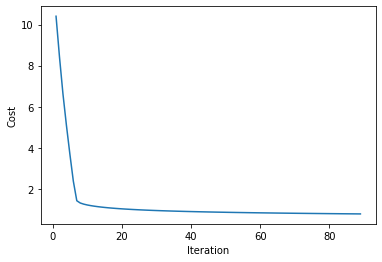

[[-3.85375848e-06 -5.51596136e-07  1.88720256e-05 -1.04292186e-05
  -1.06058823e-05  6.59011903e-05 -2.91026019e-06 -3.62166267e-05
   9.98933680e-05 -5.06472132e-06  7.11438898e-06  1.11212274e-05]
 [-2.06148033e-05  3.90649524e-05  2.78996140e-05 -7.90808456e-05
   1.74623188e-04  7.01064998e-05  3.23403253e-06 -1.45336646e-05
   8.17777215e-06  2.27847242e-05 -4.66743265e-05 -7.76422818e-06]
 [ 1.02404501e-04  4.54199111e-05 -2.45355539e-04  1.74895034e-06
  -4.19748516e-06 -3.29717613e-07  2.73188721e-06  3.13021411e-06
  -1.05898414e-05  3.45969542e-06  2.67972314e-05 -3.52538509e-05]]
[[-5.47665371e-05  2.34245870e-05  2.22548381e-04]]


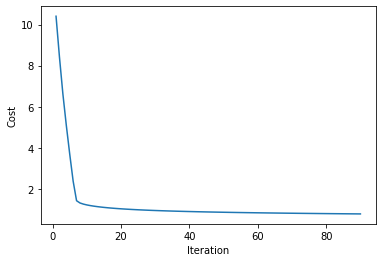

[[-3.83995278e-06 -5.86206513e-07  1.87710724e-05 -1.03899975e-05
  -1.07120887e-05  6.55149291e-05 -2.88947236e-06 -3.62911666e-05
   9.88642878e-05 -5.04749789e-06  7.07325475e-06  1.10549030e-05]
 [-2.05443896e-05  3.88935802e-05  2.77057235e-05 -7.88068629e-05
   1.73942586e-04  6.95239022e-05  3.22455450e-06 -1.45282522e-05
   8.16998359e-06  2.27105021e-05 -4.65955779e-05 -7.51224344e-06]
 [ 1.02049240e-04  4.58023368e-05 -2.42999151e-04  1.74397454e-06
  -4.19452158e-06 -3.20089422e-07  2.72341685e-06  3.13267352e-06
  -1.05322539e-05  3.44822046e-06  2.67890411e-05 -3.50905450e-05]]
[[-5.45767453e-05  2.29791572e-05  2.21381390e-04]]


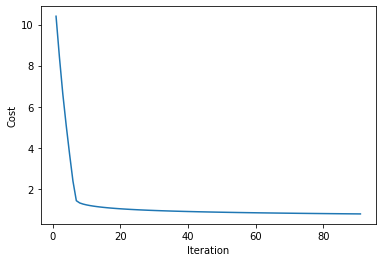

[[-3.82625217e-06 -6.19932238e-07  1.86719827e-05 -1.03510939e-05
  -1.08150447e-05  6.51358121e-05 -2.86901725e-06 -3.63580136e-05
   9.78549038e-05 -5.03039973e-06  7.03290468e-06  1.09899002e-05]
 [-2.04744882e-05  3.87251258e-05  2.75159795e-05 -7.85348884e-05
   1.73272824e-04  6.89546423e-05  3.21513798e-06 -1.45229589e-05
   8.16217860e-06  2.26367953e-05 -4.65196624e-05 -7.26561261e-06]
 [ 1.01696526e-04  4.61641629e-05 -2.40688227e-04  1.73903159e-06
  -4.19167682e-06 -3.10688241e-07  2.71500550e-06  3.13473381e-06
  -1.04757395e-05  3.43682880e-06  2.67799526e-05 -3.49301188e-05]]
[[-5.43883557e-05  2.25442017e-05  2.20236044e-04]]


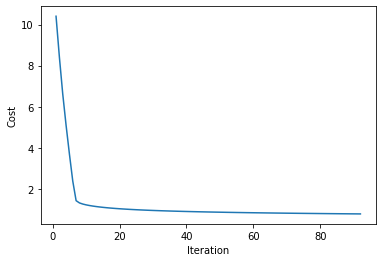

[[-3.81265494e-06 -6.52806894e-07  1.85747021e-05 -1.03125012e-05
  -1.09148766e-05  6.47636313e-05 -2.84887403e-06 -3.64174958e-05
   9.68646420e-05 -5.01342519e-06  6.99331049e-06  1.09261784e-05]
 [-2.04050927e-05  3.85594870e-05  2.73302501e-05 -7.82648972e-05
   1.72613529e-04  6.83982792e-05  3.20578260e-06 -1.45177795e-05
   8.15435970e-06  2.25635993e-05 -4.64464647e-05 -7.02417200e-06]
 [ 1.01346333e-04  4.65062459e-05 -2.38421429e-04  1.73412120e-06
  -4.18894580e-06 -3.01507034e-07  2.70665261e-06  3.13641277e-06
  -1.04202678e-05  3.42551962e-06  2.67700080e-05 -3.47724933e-05]]
[[-5.42013480e-05  2.21193278e-05  2.19111708e-04]]


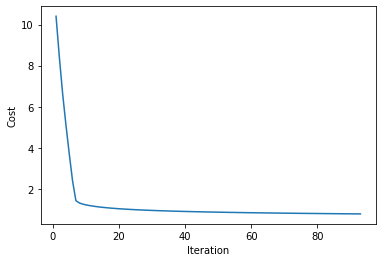

[[-3.79915948e-06 -6.84862682e-07  1.84791782e-05 -1.02742134e-05
  -1.10117060e-05  6.43981864e-05 -2.82902421e-06 -3.64699281e-05
   9.58929509e-05 -4.99657266e-06  6.95444506e-06  1.08636988e-05]
 [-2.03361968e-05  3.83965653e-05  2.71484084e-05 -7.79968649e-05
   1.71964344e-04  6.78543905e-05  3.19648797e-06 -1.45127094e-05
   8.14652927e-06  2.24909095e-05 -4.63758745e-05 -6.78776448e-06]
 [ 1.00998638e-04  4.68294065e-05 -2.36197474e-04  1.72924312e-06
  -4.18632368e-06 -2.92539045e-07  2.69835761e-06  3.13772742e-06
  -1.03658096e-05  3.41429210e-06  2.67592475e-05 -3.46175923e-05]]
[[-5.40157028e-05  2.17041590e-05  2.18007775e-04]]


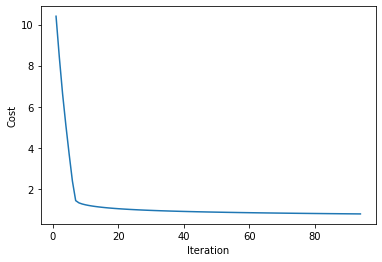

[[-3.78576425e-06 -7.16130486e-07  1.83853609e-05 -1.02362246e-05
  -1.11056491e-05  6.40392852e-05 -2.80945136e-06 -3.65156123e-05
   9.49393002e-05 -4.97984059e-06  6.91628240e-06  1.08024242e-05]
 [-2.02677943e-05  3.82362667e-05  2.69703329e-05 -7.77307680e-05
   1.71324923e-04  6.73225718e-05  3.18725369e-06 -1.45077441e-05
   8.13868955e-06  2.24187211e-05 -4.63077861e-05 -6.55623913e-06]
 [ 1.00653415e-04  4.71344309e-05 -2.34015128e-04  1.72439706e-06
  -4.18380584e-06 -2.83777783e-07  2.69011996e-06  3.13869407e-06
  -1.03123368e-05  3.40314540e-06  2.67477098e-05 -3.44653423e-05]]
[[-5.38314015e-05  2.12983340e-05  2.16923660e-04]]


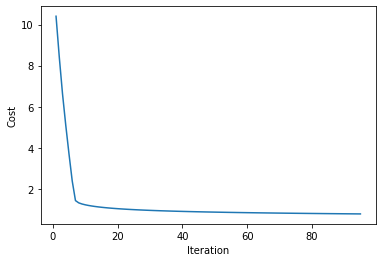

[[-3.77246780e-06 -7.46639922e-07  1.82932018e-05 -1.01985296e-05
  -1.11968176e-05  6.36867426e-05 -2.79014079e-06 -3.65548378e-05
   9.40031796e-05 -4.96322749e-06  6.87879757e-06  1.07423189e-05]
 [-2.01998793e-05  3.80785008e-05  2.67959072e-05 -7.74665835e-05
   1.70694939e-04  6.68024353e-05  3.17807932e-06 -1.45028793e-05
   8.13084265e-06  2.23470295e-05 -4.62420982e-05 -6.32945097e-06]
 [ 1.00310640e-04  4.74220725e-05 -2.31873202e-04  1.71958274e-06
  -4.18138783e-06 -2.75217011e-07  2.68193908e-06  3.13932831e-06
  -1.02598222e-05  3.39207871e-06  2.67354318e-05 -3.43156727e-05]]
[[-5.36484261e-05  2.09015066e-05  2.15858800e-04]]


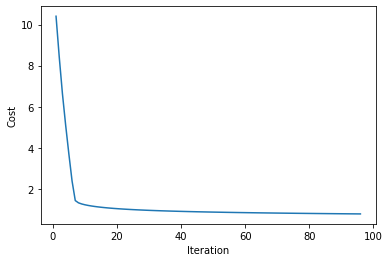

[[-3.75926874e-06 -7.76419400e-07  1.82026544e-05 -1.01611235e-05
  -1.12853185e-05  6.33403807e-05 -2.77107940e-06 -3.65878825e-05
   9.30840984e-05 -4.94673192e-06  6.84196665e-06  1.06833484e-05]
 [-2.01324460e-05  3.79231810e-05  2.66250193e-05 -7.72042892e-05
   1.70074075e-04  6.62936095e-05  3.16896442e-06 -1.44981109e-05
   8.12299057e-06  2.22758300e-05 -4.61787139e-05 -6.10726061e-06]
 [ 9.99702896e-05  4.76930534e-05 -2.29770555e-04  1.71479988e-06
  -4.17906542e-06 -2.66850731e-07  2.67381444e-06  3.13964508e-06
  -1.02082399e-05  3.38109120e-06  2.67224488e-05 -3.41685153e-05]]
[[-5.34667596e-05  2.05133445e-05  2.14812653e-04]]


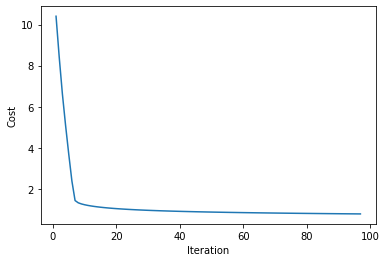

[[-3.74616573e-06 -8.05496167e-07  1.81136739e-05 -1.01240013e-05
  -1.13712546e-05  6.30000283e-05 -2.75225546e-06 -3.66150124e-05
   9.21815839e-05 -4.93035246e-06  6.80576671e-06  1.06254797e-05]
 [-2.00654888e-05  3.77702242e-05  2.64575619e-05 -7.69438631e-05
   1.69462028e-04  6.57957378e-05  3.15990852e-06 -1.44934349e-05
   8.11513519e-06  2.22051178e-05 -4.61175403e-05 -5.88953406e-06]
 [ 9.96323386e-05  4.79480655e-05 -2.27706089e-04  1.71004820e-06
  -4.17683454e-06 -2.58673176e-07  2.66574546e-06  3.13965869e-06
  -1.01575645e-05  3.37018206e-06  2.67087947e-05 -3.40238042e-05]]
[[-5.32863854e-05  2.01335290e-05  2.13784701e-04]]


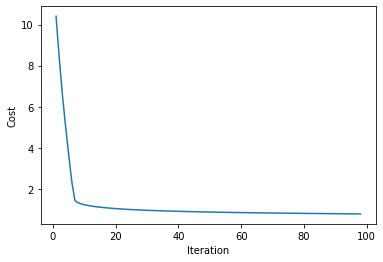

[[-3.73315749e-06 -8.33896364e-07  1.80262174e-05 -1.00871588e-05
  -1.14547243e-05  6.26655204e-05 -2.73365843e-06 -3.66364829e-05
   9.12951813e-05 -4.91408776e-06  6.77017575e-06  1.05686809e-05]
 [-1.99990023e-05  3.76195507e-05  2.62934317e-05 -7.66852840e-05
   1.68858509e-04  6.53084783e-05  3.15091114e-06 -1.44888476e-05
   8.10727830e-06  2.21348883e-05 -4.60584883e-05 -5.67614241e-06]
 [ 9.92967634e-05  4.81877719e-05 -2.25678744e-04  1.70532741e-06
  -4.17469131e-06 -2.50678797e-07  2.65773160e-06  3.13938281e-06
  -1.01077719e-05  3.35935049e-06  2.66945019e-05 -3.38814762e-05]]
[[-5.31072876e-05  1.97617544e-05  2.12774440e-04]]


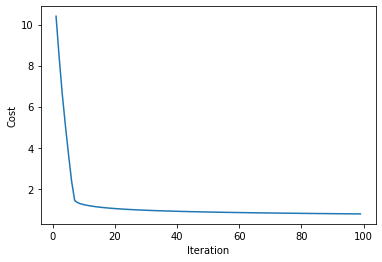

[[-3.72024281e-06 -8.61645066e-07  1.79402432e-05 -1.00505916e-05
  -1.15358220e-05  6.23366984e-05 -2.71527884e-06 -3.66525389e-05
   9.04244521e-05 -4.89793649e-06  6.73517265e-06  1.05129217e-05]
 [-1.99329811e-05  3.74710841e-05  2.61325297e-05 -7.64285311e-05
   1.68263238e-04  6.48315025e-05  3.14197181e-06 -1.44843454e-05
   8.09942158e-06  2.20651368e-05 -4.60014727e-05 -5.46696164e-06]
 [ 9.89635400e-05  4.84128082e-05 -2.23687503e-04  1.70063723e-06
  -4.17263202e-06 -2.42862254e-07  2.64977231e-06  3.13883057e-06
  -1.00588387e-05  3.34859567e-06  2.66796014e-05 -3.37414699e-05]]
[[-5.29294506e-05  1.93977276e-05  2.11781389e-04]]


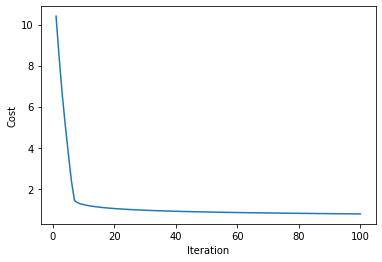

[[-3.70742048e-06 -8.88766332e-07  1.78557115e-05 -1.00142958e-05
  -1.16146386e-05  6.20134090e-05 -2.69710815e-06 -3.66634152e-05
   8.95689741e-05 -4.88189734e-06  6.70073715e-06  1.04581725e-05]
 [-1.98674200e-05  3.73247509e-05  2.59747607e-05 -7.61735838e-05
   1.67675949e-04  6.43644953e-05  3.13309004e-06 -1.44799249e-05
   8.09156660e-06  2.19958587e-05 -4.59464118e-05 -5.26187235e-06]
 [ 9.86326447e-05  4.86237838e-05 -2.21731383e-04  1.69597737e-06
  -4.17065311e-06 -2.35218406e-07  2.64186705e-06  3.13801451e-06
  -1.00107423e-05  3.33791682e-06  2.66641229e-05 -3.36037263e-05]]
[[-5.27528595e-05  1.90411672e-05  2.10805082e-04]]


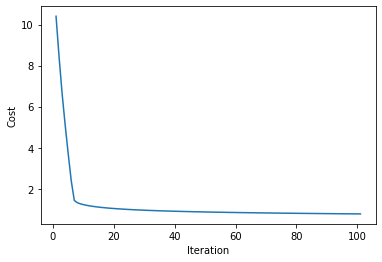

[[-3.69468938e-06 -9.15283245e-07  1.77725837e-05 -9.97826743e-06
  -1.16912608e-05  6.16955050e-05 -2.67913863e-06 -3.66693371e-05
   8.87283400e-05 -4.86596907e-06  6.66684983e-06  1.04044050e-05]
 [-1.98023138e-05  3.71804808e-05  2.58200330e-05 -7.59204223e-05
   1.67096384e-04  6.39071539e-05  3.12426532e-06 -1.44755828e-05
   8.08371487e-06  2.19270493e-05 -4.58932271e-05 -5.06075960e-06]
 [ 9.83040539e-05  4.88212827e-05 -2.19809439e-04  1.69134755e-06
  -4.16875116e-06 -2.27742301e-07  2.63401528e-06  3.13694666e-06
  -9.96346101e-06  3.32731316e-06  2.66480948e-05 -3.34681883e-05]]
[[-5.25774997e-05  1.86918032e-05  2.09845071e-04]]


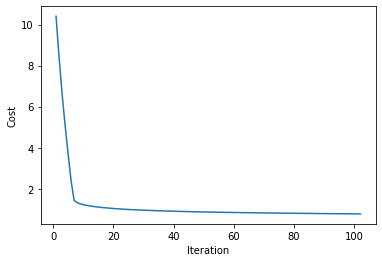

[[-3.68204838e-06 -9.41217954e-07  1.76908228e-05 -9.94250289e-06
  -1.17657722e-05  6.13828442e-05 -2.66136329e-06 -3.66705206e-05
   8.79021571e-05 -4.85015043e-06  6.63349202e-06  1.03515921e-05]
 [-1.97376575e-05  3.70382062e-05  2.56682585e-05 -7.56690269e-05
   1.66524298e-04  6.34591872e-05  3.11549717e-06 -1.44713160e-05
   8.07586781e-06  2.18587041e-05 -4.58418436e-05 -4.86351264e-06]
 [ 9.79777444e-05  4.90058646e-05 -2.17920758e-04  1.68674749e-06
  -4.16692293e-06 -2.20429170e-07  2.62621647e-06  3.13563853e-06
  -9.91697381e-06  3.31678389e-06  2.66315444e-05 -3.33348009e-05]]
[[-5.24033570e-05  1.83493767e-05  2.08900924e-04]]


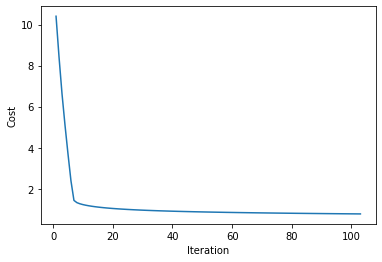

[[-3.66949642e-06 -9.66591714e-07  1.76103928e-05 -9.90699862e-06
  -1.18382528e-05  6.10752893e-05 -2.64377575e-06 -3.66671728e-05
   8.70900468e-05 -4.83444021e-06  6.60064583e-06  1.02997073e-05]
 [-1.96734464e-05  3.68978622e-05  2.55193524e-05 -7.54193784e-05
   1.65959453e-04  6.30203157e-05  3.10678509e-06 -1.44671215e-05
   8.06802674e-06  2.17908184e-05 -4.57921894e-05 -4.67002478e-06]
 [ 9.76536931e-05  4.91780664e-05 -2.16064462e-04  1.68217691e-06
  -4.16516528e-06 -2.13274416e-07  2.61847008e-06  3.13410114e-06
  -9.87126042e-06  3.30632825e-06  2.66144977e-05 -3.32035107e-05]]
[[-5.22304176e-05  1.80136389e-05  2.07972224e-04]]


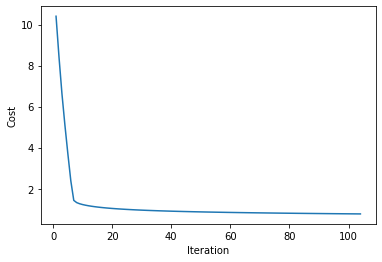

[[-3.65703245e-06 -9.91424921e-07  1.75312592e-05 -9.87175123e-06
  -1.19087795e-05  6.07727082e-05 -2.62637020e-06 -3.66594925e-05
   8.62916436e-05 -4.81883725e-06  6.56829406e-06  1.02487255e-05]
 [-1.96096754e-05  3.67593866e-05  2.53732333e-05 -7.51714580e-05
   1.65401624e-04  6.25902702e-05  3.09812856e-06 -1.44629965e-05
   8.06019292e-06  2.17233878e-05 -4.57441954e-05 -4.48019316e-06]
 [ 9.73318770e-05  4.93384026e-05 -2.14239701e-04  1.67763552e-06
  -4.16347523e-06 -2.06273609e-07  2.61077559e-06  3.13234506e-06
  -9.82630124e-06  3.29594548e-06  2.65969798e-05 -3.30742663e-05]]
[[-5.20586681e-05  1.76843515e-05  2.07058570e-04]]


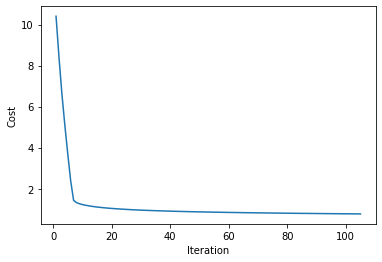

[[-3.64465546e-06 -1.01573715e-06  1.74533888e-05 -9.83675745e-06
  -1.19774259e-05  6.04749731e-05 -2.60914135e-06 -3.66476702e-05
   8.55065946e-05 -4.80334037e-06  6.53642024e-06  1.01986223e-05]
 [-1.95463400e-05  3.66227196e-05  2.52298224e-05 -7.49252471e-05
   1.64850591e-04  6.21687921e-05  3.08952710e-06 -1.44589381e-05
   8.05236754e-06  2.16564077e-05 -4.56977956e-05 -4.29391864e-06]
 [ 9.70122736e-05  4.94873667e-05 -2.12445658e-04  1.67312305e-06
  -4.16184992e-06 -1.99422475e-07  2.60313248e-06  3.13038039e-06
  -9.78207735e-06  3.28563483e-06  2.65790145e-05 -3.29470179e-05]]
[[-5.18880952e-05  1.73612853e-05  2.06159573e-04]]


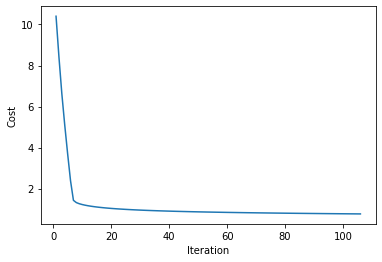

[[-3.63236445e-06 -1.03954720e-06  1.73767493e-05 -9.80201413e-06
  -1.20442628e-05  6.01819609e-05 -2.59208432e-06 -3.66318887e-05
   8.47345593e-05 -4.78794845e-06  6.50500851e-06  1.01493741e-05]
 [-1.94834355e-05  3.64878039e-05  2.50890442e-05 -7.46807275e-05
   1.64306148e-04  6.17556325e-05  3.08098019e-06 -1.44549439e-05
   8.04455172e-06  2.15898738e-05 -4.56529265e-05 -4.11110555e-06]
 [ 9.66948604e-05  4.96254317e-05 -2.10681541e-04  1.66863923e-06
  -4.16028661e-06 -1.92716892e-07  2.59554024e-06  3.12821683e-06
  -9.73857046e-06  3.27539554e-06  2.65606246e-05 -3.28217174e-05]]
[[-5.17186861e-05  1.70442207e-05  2.05274859e-04]]


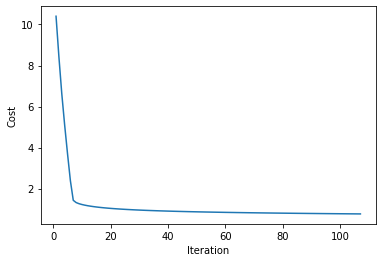

[[-3.62015847e-06 -1.06287309e-06  1.73013096e-05 -9.76751820e-06
  -1.21093582e-05  5.98935523e-05 -2.57519463e-06 -3.66123234e-05
   8.39752086e-05 -4.77266037e-06  6.47404367e-06  1.01009583e-05]
 [-1.94209573e-05  3.63545843e-05  2.49508257e-05 -7.44378813e-05
   1.63768091e-04  6.13505516e-05  3.07248735e-06 -1.44510112e-05
   8.03674652e-06  2.15237817e-05 -4.56095273e-05 -3.93166164e-06]
 [ 9.63796154e-05  4.97530513e-05 -2.08946588e-04  1.66418378e-06
  -4.15878266e-06 -1.86152886e-07  2.58799835e-06  3.12586365e-06
  -9.69576289e-06  3.26522687e-06  2.65418322e-05 -3.26983182e-05]]
[[-5.15504283e-05  1.67329467e-05  2.04404066e-04]]


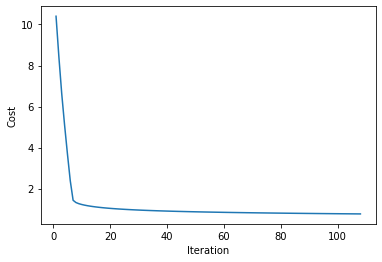

[[-3.60803656e-06 -1.08573214e-06  1.72270397e-05 -9.73326669e-06
  -1.21727771e-05  5.96096326e-05 -2.55846813e-06 -3.65891423e-05
   8.32282246e-05 -4.75747504e-06  6.44351112e-06  1.00533530e-05]
 [-1.93589010e-05  3.62230079e-05  2.48150967e-05 -7.41966909e-05
   1.63236229e-04  6.09533187e-05  3.06404807e-06 -1.44471378e-05
   8.02895293e-06  2.14581269e-05 -4.55675398e-05 -3.75549783e-06]
 [ 9.60665166e-05  4.98706605e-05 -2.07240062e-04  1.65975643e-06
  -4.15733557e-06 -1.79726616e-07  2.58050632e-06  3.12332975e-06
  -9.65363754e-06  3.25512811e-06  2.65226582e-05 -3.25767752e-05]]
[[-5.13833093e-05  1.64272607e-05  2.03546845e-04]]


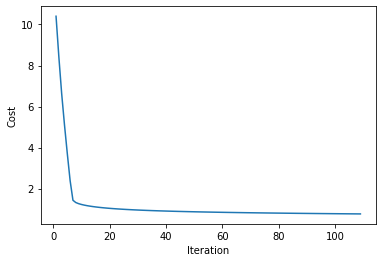

[[-3.59599782e-06 -1.10814097e-06  1.71539106e-05 -9.69925674e-06
  -1.22345821e-05  5.93300906e-05 -2.54190100e-06 -3.65625068e-05
   8.24933001e-05 -4.74239139e-06  6.41339685e-06  1.00065370e-05]
 [-1.92972622e-05  3.60930239e-05  2.46817893e-05 -7.39571391e-05
   1.62710375e-04  6.05637117e-05  3.05566186e-06 -1.44433212e-05
   8.02117190e-06  2.13929052e-05 -4.55269080e-05 -3.58252815e-06]
 [ 9.57555424e-05  4.99786765e-05 -2.05561249e-04  1.65535692e-06
  -4.15594293e-06 -1.73434379e-07  2.57306365e-06  3.12062363e-06
  -9.61217788e-06  3.24509853e-06  2.65031228e-05 -3.24570449e-05]]
[[-5.12173172e-05  1.61269683e-05  2.02702859e-04]]


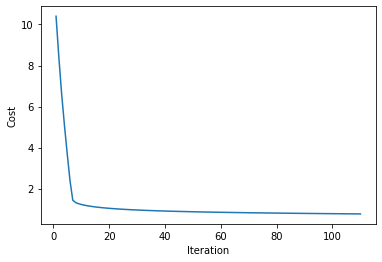

[[-3.58404133e-06 -1.13011554e-06  1.70818943e-05 -9.66548553e-06
  -1.22948333e-05  5.90548188e-05 -2.52548969e-06 -3.65325716e-05
   8.17701382e-05 -4.72740836e-06  6.38368737e-06  9.96048999e-06]
 [-1.92360365e-05  3.59645834e-05  2.45508383e-05 -7.37192087e-05
   1.62190353e-04  6.01815162e-05  3.04732823e-06 -1.44395594e-05
   8.01340430e-06  2.13281123e-05 -4.54875784e-05 -3.41266957e-06]
 [ 9.54466714e-05  5.00774994e-05 -2.03909462e-04  1.65098497e-06
  -4.15460243e-06 -1.67272596e-07  2.56566984e-06  3.11775346e-06
  -9.57136789e-06  3.23513742e-06  2.64832451e-05 -3.23390850e-05]]
[[-5.10524400e-05  1.58318828e-05  2.01871781e-04]]


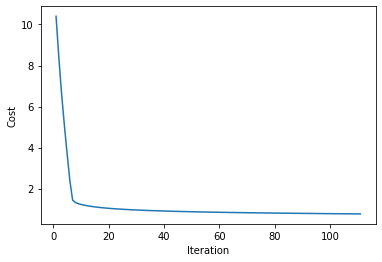

[[-3.57216622e-06 -1.15167117e-06  1.70109637e-05 -9.63195034e-06
  -1.23535883e-05  5.87837134e-05 -2.50923086e-06 -3.64994850e-05
   8.10584515e-05 -4.71252492e-06  6.35436977e-06  9.91519230e-06]
 [-1.91752198e-05  3.58376395e-05  2.44221807e-05 -7.34828830e-05
   1.61675990e-04  5.98065260e-05  3.03904668e-06 -1.44358501e-05
   8.00565097e-06  2.12637440e-05 -4.54494995e-05 -3.24584190e-06]
 [ 9.51398825e-05  5.01675129e-05 -2.02284035e-04  1.64664032e-06
  -4.15331185e-06 -1.61237810e-07  2.55832442e-06  3.11472705e-06
  -9.53119209e-06  3.22524408e-06  2.64630436e-05 -3.22228546e-05]]
[[-5.08886662e-05  1.55418250e-05  2.01053296e-04]]


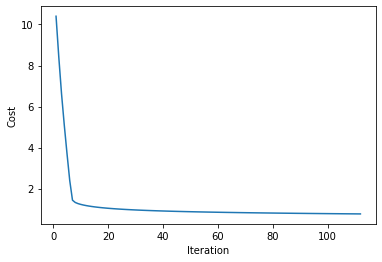

[[-3.56037161e-06 -1.17282257e-06  1.69410924e-05 -9.59864852e-06
  -1.24109025e-05  5.85166740e-05 -2.49312143e-06 -3.64633893e-05
   8.03579623e-05 -4.69774005e-06  6.32543160e-06  9.87062489e-06]
 [-1.91148077e-05  3.57121472e-05  2.42957555e-05 -7.32481455e-05
   1.61167123e-04  5.94385419e-05  3.03081674e-06 -1.44321915e-05
   7.99791270e-06  2.11997962e-05 -4.54126221e-05 -3.08196763e-06]
 [ 9.48351547e-05  5.02490851e-05 -2.00684324e-04  1.64232273e-06
  -4.15206908e-06 -1.55326682e-07  2.55102689e-06  3.11155188e-06
  -9.49163549e-06  3.21541781e-06  2.64425359e-05 -3.21083140e-05]]
[[-5.07259843e-05  1.52566226e-05  2.00247099e-04]]


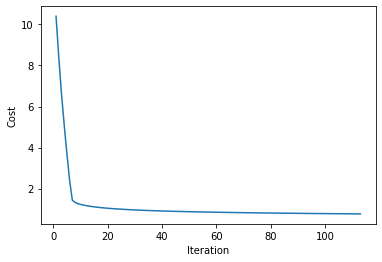

[[-3.54865667e-06 -1.19358386e-06  1.68722553e-05 -9.56557747e-06
  -1.24668289e-05  5.82536033e-05 -2.47715848e-06 -3.64244212e-05
   7.96684018e-05 -4.68305273e-06  6.29686093e-06  9.82676937e-06]
 [-1.90547963e-05  3.55880631e-05  2.41715041e-05 -7.30149799e-05
   1.60663593e-04  5.90773722e-05  3.02263791e-06 -1.44285815e-05
   7.99019022e-06  2.11362647e-05 -4.53768987e-05 -2.92097188e-06]
 [ 9.45324675e-05  5.03225690e-05 -1.99109708e-04  1.63803191e-06
  -4.15087210e-06 -1.49535984e-07  2.54377679e-06  3.10823514e-06
  -9.45268357e-06  3.20565793e-06  2.64217390e-05 -3.19954249e-05]]
[[-5.05643830e-05  1.49761104e-05  1.99452894e-04]]


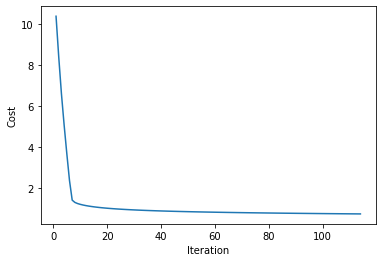

[[-3.53702056e-06 -1.21396861e-06  1.68044277e-05 -9.53273465e-06
  -1.25214185e-05  5.79944075e-05 -2.46133928e-06 -3.63827114e-05
   7.89895097e-05 -4.66846199e-06  6.26864630e-06  9.78360799e-06]
 [-1.89951813e-05  3.54653455e-05  2.40493698e-05 -7.27833702e-05
   1.60165249e-04  5.87228317e-05  3.01450973e-06 -1.44250184e-05
   7.98248424e-06  2.10731454e-05 -4.53422842e-05 -2.76278221e-06]
 [ 9.42318005e-05  5.03883033e-05 -1.97559583e-04  1.63376764e-06
  -4.14971895e-06 -1.43862595e-07  2.53657365e-06  3.10478368e-06
  -9.41432226e-06  3.19596376e-06  2.64006690e-05 -3.18841501e-05]]
[[-5.04038514e-05  1.47001296e-05  1.98670398e-04]]


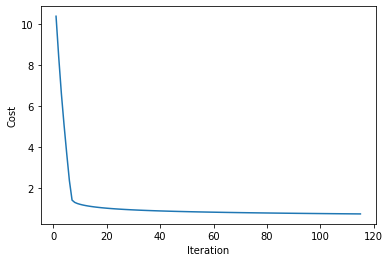

[[-3.52546246e-06 -1.23398985e-06  1.67375859e-05 -9.50011758e-06
  -1.25747204e-05  5.77389954e-05 -2.44566124e-06 -3.63383857e-05
   7.83210343e-05 -4.65396686e-06  6.24077667e-06  9.74112357e-06]
 [-1.89359590e-05  3.53439545e-05  2.39292979e-05 -7.25533006e-05
   1.59671944e-04  5.83747418e-05  3.00643173e-06 -1.44215003e-05
   7.97479539e-06  2.10104344e-05 -4.53087348e-05 -2.60732862e-06]
 [ 9.39331335e-05  5.04466127e-05 -1.96033366e-04  1.62952964e-06
  -4.14860778e-06 -1.38303497e-07  2.52941701e-06  3.10120411e-06
  -9.37653793e-06  3.18633464e-06  2.63793415e-05 -3.17744534e-05]]
[[-5.02443786e-05  1.44285276e-05  1.97899332e-04]]


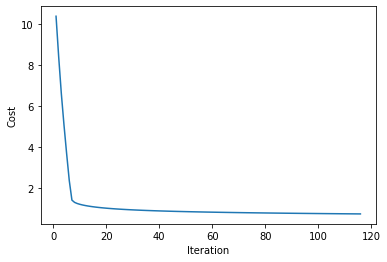

[[-3.51398156e-06 -1.25366010e-06  1.66717068e-05 -9.46772383e-06
  -1.26267815e-05  5.74872790e-05 -2.43012193e-06 -3.62915645e-05
   7.76627315e-05 -4.63956637e-06  6.21324145e-06  9.69929951e-06]
 [-1.88771252e-05  3.52238516e-05  2.38112353e-05 -7.23247556e-05
   1.59183538e-04  5.80329300e-05  2.99840342e-06 -1.44180255e-05
   7.96712431e-06  2.09481276e-05 -4.52762089e-05 -2.45454334e-06]
 [ 9.36364466e-05  5.04978090e-05 -1.94530492e-04  1.62531767e-06
  -4.14753678e-06 -1.32855773e-07  2.52230640e-06  3.09750271e-06
  -9.33931738e-06  3.17676991e-06  2.63577712e-05 -3.16662999e-05]]
[[-5.00859539e-05  1.41611579e-05  1.97139429e-04]]


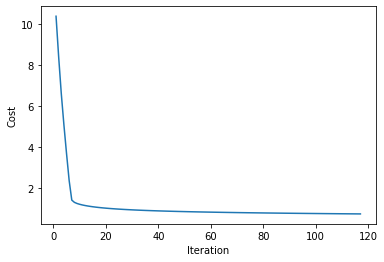

[[-3.50257709e-06 -1.27299137e-06  1.66067683e-05 -9.43555101e-06
  -1.26776470e-05  5.72391728e-05 -2.41471902e-06 -3.62423633e-05
   7.70143651e-05 -4.62525959e-06  6.18603047e-06  9.65811973e-06]
 [-1.88186761e-05  3.51049998e-05  2.36951311e-05 -7.20977198e-05
   1.58699896e-04  5.76972298e-05  2.99042435e-06 -1.44145926e-05
   7.95947157e-06  2.08862211e-05 -4.52446664e-05 -2.30436085e-06]
 [ 9.33417203e-05  5.05421911e-05 -1.93050416e-04  1.62113149e-06
  -4.14650427e-06 -1.27516597e-07  2.51524138e-06  3.09368554e-06
  -9.30264780e-06  3.16726891e-06  2.63359724e-05 -3.15596556e-05]]
[[-4.99285667e-05  1.38978797e-05  1.96390431e-04]]


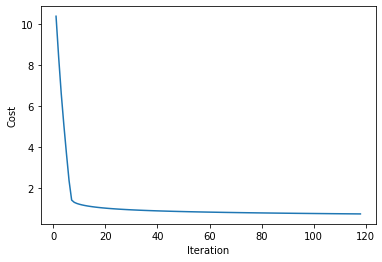

[[-3.49124825e-06 -1.29199522e-06  1.65427486e-05 -9.40359680e-06
  -1.27273602e-05  5.69945941e-05 -2.39945032e-06 -3.61908930e-05
   7.63757063e-05 -4.61104558e-06  6.15913393e-06  9.61756869e-06]
 [-1.87606079e-05  3.49873635e-05  2.35809357e-05 -7.18721782e-05
   1.58220888e-04  5.73674804e-05  2.98249406e-06 -1.44111998e-05
   7.95183770e-06  2.08247110e-05 -4.52140688e-05 -2.15671771e-06]
 [ 9.30489351e-05  5.05800457e-05 -1.91592608e-04  1.61697085e-06
  -4.14550858e-06 -1.22283237e-07  2.50822150e-06  3.08975840e-06
  -9.26651679e-06  3.15783101e-06  2.63139588e-05 -3.14544875e-05]]
[[-4.97722069e-05  1.36385580e-05  1.95652087e-04]]


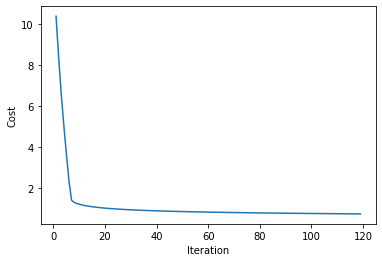

[[-3.47999429e-06 -1.31068273e-06  1.64796270e-05 -9.37185891e-06
  -1.27759629e-05  5.67534629e-05 -2.38431371e-06 -3.61372600e-05
   7.57465331e-05 -4.59692342e-06  6.13254243e-06  9.57763134e-06]
 [-1.87029168e-05  3.48709085e-05  2.34686014e-05 -7.16481157e-05
   1.57746389e-04  5.70435266e-05  2.97461210e-06 -1.44078456e-05
   7.94422323e-06  2.07635936e-05 -4.51843793e-05 -2.01155249e-06]
 [ 9.27580719e-05  5.06116482e-05 -1.90156554e-04  1.61283551e-06
  -4.14454816e-06 -1.17153048e-07  2.50124633e-06  3.08572682e-06
  -9.23091230e-06  3.14845557e-06  2.62917432e-05 -3.13507638e-05]]
[[-4.96168641e-05  1.33830626e-05  1.94924153e-04]]


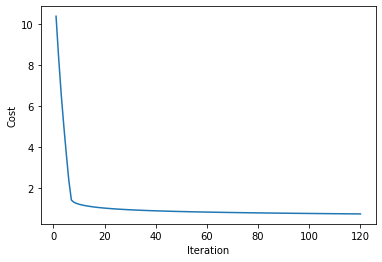

[[-3.46881446e-06 -1.32906456e-06  1.64173832e-05 -9.34033508e-06
  -1.28234949e-05  5.65157015e-05 -2.36930719e-06 -3.60815662e-05
   7.51266305e-05 -4.58289222e-06  6.10624693e-06  9.53829311e-06]
 [-1.86455992e-05  3.47556020e-05  2.33580819e-05 -7.14255178e-05
   1.57276279e-04  5.67252182e-05  2.96677801e-06 -1.44045288e-05
   7.93662862e-06  2.07028649e-05 -4.51555624e-05 -1.86880575e-06]
 [ 9.24691118e-05  5.06372624e-05 -1.88741757e-04  1.60872524e-06
  -4.14362149e-06 -1.12123467e-07  2.49431542e-06  3.08159614e-06
  -9.19582266e-06  3.13914197e-06  2.62693382e-05 -3.12484534e-05]]
[[-4.94625283e-05  1.31312688e-05  1.94206394e-04]]


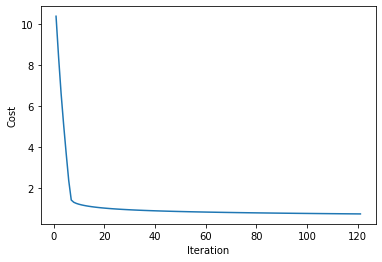

[[-3.45770801e-06 -1.34715096e-06  1.63559974e-05 -9.30902311e-06
  -1.28699947e-05  5.62812345e-05 -2.35442883e-06 -3.60239096e-05
   7.45157901e-05 -4.56895109e-06  6.08023871e-06  9.49953990e-06]
 [-1.85886512e-05  3.46414122e-05  2.32493326e-05 -7.12043699e-05
   1.56810442e-04  5.64124101e-05  2.95899135e-06 -1.44012479e-05
   7.92905432e-06  2.06425214e-05 -4.51275842e-05 -1.72841988e-06]
 [ 9.21820361e-05  5.06571417e-05 -1.87347735e-04  1.60463979e-06
  -4.14272713e-06 -1.07192016e-07  2.48742834e-06  3.07737143e-06
  -9.16123653e-06  3.12988958e-06  2.62467559e-05 -3.11475261e-05]]
[[-4.93091896e-05  1.28830565e-05  1.93498581e-04]]


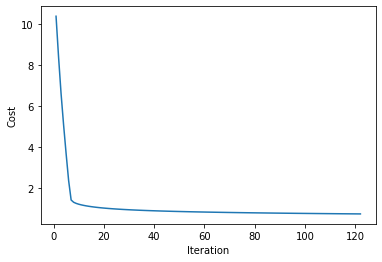

[[-3.44667421e-06 -1.36495176e-06  1.62954507e-05 -9.27792082e-06
  -1.29154992e-05  5.60499889e-05 -2.33967677e-06 -3.59643838e-05
   7.39138095e-05 -4.55509914e-06  6.05450943e-06  9.46135804e-06]
 [-1.85320694e-05  3.45283088e-05  2.31423101e-05 -7.09846578e-05
   1.56348767e-04  5.61049621e-05  2.95125168e-06 -1.43980015e-05
   7.92150075e-06  2.05825592e-05 -4.51004121e-05 -1.59033908e-06]
 [ 9.18968264e-05  5.06715293e-05 -1.85974021e-04  1.60057895e-06
  -4.14186368e-06 -1.02356290e-07  2.48058468e-06  3.07305759e-06
  -9.12714291e-06  3.12069780e-06  2.62240074e-05 -3.10479527e-05]]
[[-4.91568383e-05  1.26383105e-05  1.92800492e-04]]


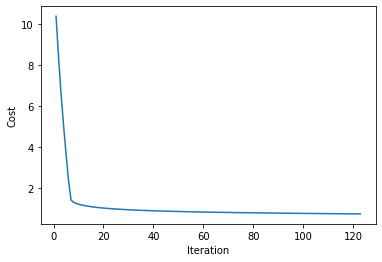

[[-3.43571236e-06 -1.38247642e-06  1.62357246e-05 -9.24702608e-06
  -1.29600439e-05  5.58218940e-05 -2.32504925e-06 -3.59030790e-05
   7.33204927e-05 -4.54133552e-06  6.02905103e-06  9.42373428e-06]
 [-1.84758501e-05  3.44162624e-05  2.30369727e-05 -7.07663673e-05
   1.55891146e-04  5.58027386e-05  2.94355856e-06 -1.43947885e-05
   7.91396830e-06  2.05229747e-05 -4.50740147e-05 -1.45450928e-06]
 [ 9.16134645e-05  5.06806584e-05 -1.84620161e-04  1.59654247e-06
  -4.14102983e-06 -9.76139616e-08  2.47378401e-06  3.06865929e-06
  -9.09353114e-06  3.11156602e-06  2.62011040e-05 -3.09497047e-05]]
[[-4.90054648e-05  1.23969199e-05  1.92111913e-04]]


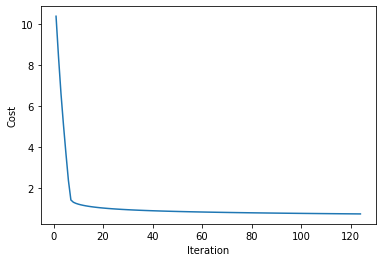

[[-3.42482173e-06 -1.39973403e-06  1.61768011e-05 -9.21633678e-06
  -1.30036627e-05  5.55968810e-05 -2.31054453e-06 -3.58400815e-05
   7.27356492e-05 -4.52765936e-06  6.00385577e-06  9.38665580e-06]
 [-1.84199898e-05  3.43052448e-05  2.29332796e-05 -7.05494845e-05
   1.55437478e-04  5.55056083e-05  2.93591157e-06 -1.43916076e-05
   7.90645734e-06  2.04637643e-05 -4.50483621e-05 -1.32087807e-06]
 [ 9.13319324e-05  5.06847528e-05 -1.83285716e-04  1.59253013e-06
  -4.14022430e-06 -9.29627749e-08  2.46702593e-06  3.06418102e-06
  -9.06039084e-06  3.10249366e-06  2.61780559e-05 -3.08527547e-05]]
[[-4.88550596e-05  1.21587782e-05  1.91432636e-04]]


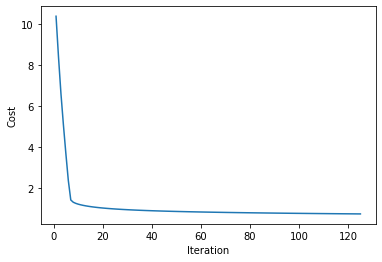

[[-3.41400163e-06 -1.41673332e-06  1.61186629e-05 -9.18585087e-06
  -1.30463885e-05  5.53748831e-05 -2.29616095e-06 -3.57754741e-05
   7.21590943e-05 -4.51406983e-06  5.97891622e-06  9.35011016e-06]
 [-1.83644851e-05  3.41952290e-05  2.28311918e-05 -7.03339957e-05
   1.54987661e-04  5.52134443e-05  2.92831028e-06 -1.43884577e-05
   7.89896820e-06  2.04049245e-05 -4.50234253e-05 -1.18939463e-06]
 [ 9.10522123e-05  5.06840273e-05 -1.81970259e-04  1.58854170e-06
  -4.13944587e-06 -8.84005425e-08  2.46031001e-06  3.05962707e-06
  -9.02771194e-06  3.09348013e-06  2.61548734e-05 -3.07570756e-05]]
[[-4.87056133e-05  1.19237831e-05  1.90762458e-04]]


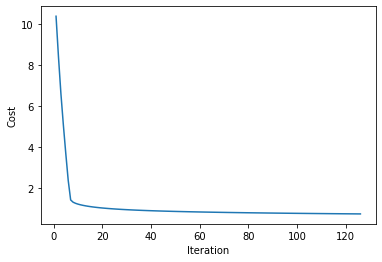

[[-3.40325137e-06 -1.43348269e-06  1.60612931e-05 -9.15556631e-06
  -1.30882526e-05  5.51558357e-05 -2.28189692e-06 -3.57093363e-05
   7.15906486e-05 -4.50056610e-06  5.95422522e-06  9.31408529e-06]
 [-1.83093325e-05  3.40861887e-05  2.27306710e-05 -7.01198874e-05
   1.54541602e-04  5.49261237e-05  2.92075426e-06 -1.43853376e-05
   7.89150121e-06  2.03464518e-05 -4.49991767e-05 -1.06000968e-06]
 [ 9.07742869e-05  5.06786881e-05 -1.80673375e-04  1.58457697e-06
  -4.13869336e-06 -8.39251442e-08  2.45363587e-06  3.05500156e-06
  -8.99548466e-06  3.08452484e-06  2.61315659e-05 -3.06626414e-05]]
[[-4.85571167e-05  1.16918359e-05  1.90101182e-04]]


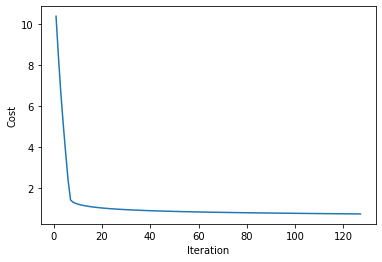

[[-3.39257029e-06 -1.44999020e-06  1.60046752e-05 -9.12548109e-06
  -1.31292852e-05  5.49396758e-05 -2.26775087e-06 -3.56417443e-05
   7.10301381e-05 -4.48714734e-06  5.92977586e-06  9.27856951e-06]
 [-1.82545286e-05  3.39780989e-05  2.26316805e-05 -6.99071463e-05
   1.54099206e-04  5.46435277e-05  2.91324310e-06 -1.43822463e-05
   7.88405665e-06  2.02883426e-05 -4.49755897e-05 -9.32675443e-07]
 [ 9.04981387e-05  5.06689329e-05 -1.79394664e-04  1.58063572e-06
  -4.13796566e-06 -7.95345234e-08  2.44700310e-06  3.05030844e-06
  -8.96369951e-06  3.07562722e-06  2.61081427e-05 -3.05694268e-05]]
[[-4.84095608e-05  1.14628421e-05  1.89448619e-04]]


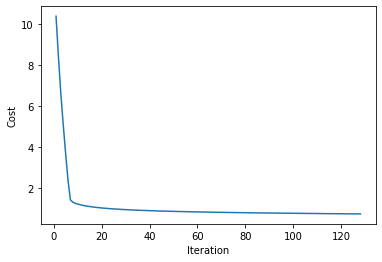

[[-3.38195770e-06 -1.46626362e-06  1.59487934e-05 -9.09559324e-06
  -1.31695153e-05  5.47263426e-05 -2.25372129e-06 -3.55727712e-05
   7.04773937e-05 -4.47381274e-06  5.90556153e-06  9.24355146e-06]
 [-1.82000701e-05  3.38709353e-05  2.25341846e-05 -6.96957590e-05
   1.53660387e-04  5.43655409e-05  2.90577640e-06 -1.43791828e-05
   7.87663481e-06  2.02305935e-05 -4.49526388e-05 -8.07345536e-07]
 [ 9.02237506e-05  5.06549518e-05 -1.78133734e-04  1.57671773e-06
  -4.13726168e-06 -7.52266858e-08  2.44041130e-06  3.04555147e-06
  -8.93234724e-06  3.06678672e-06  2.60846125e-05 -3.04774072e-05]]
[[-4.82629365e-05  1.12367106e-05  1.88804583e-04]]


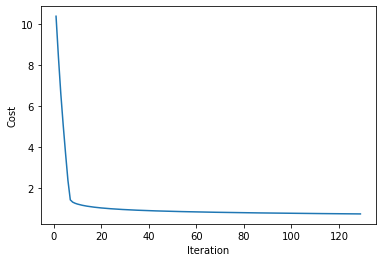

[[-3.37141294e-06 -1.48231040e-06  1.58936322e-05 -9.06590081e-06
  -1.32089709e-05  5.45157766e-05 -2.23980671e-06 -3.55024871e-05
   6.99322509e-05 -4.46056151e-06  5.88157584e-06  9.20902013e-06]
 [-1.81459538e-05  3.37646747e-05  2.24381486e-05 -6.94857127e-05
   1.53225058e-04  5.40920520e-05  2.89835374e-06 -1.43761460e-05
   7.86923592e-06  2.01732012e-05 -4.49302994e-05 -6.83974968e-07]
 [ 8.99511059e-05  5.06369268e-05 -1.76890206e-04  1.57282279e-06
  -4.13658040e-06 -7.09996961e-08  2.43386010e-06  3.04073428e-06
  -8.90141888e-06  3.05800278e-06  2.60609839e-05 -3.03865584e-05]]
[[-4.81172350e-05  1.10133540e-05  1.88168894e-04]]


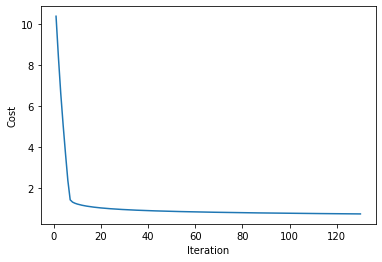

[[-3.36093538e-06 -1.49813771e-06  1.58391765e-05 -9.03640190e-06
  -1.32476787e-05  5.43079202e-05 -2.22600570e-06 -3.54309593e-05
   6.93945502e-05 -4.44739287e-06  5.85781264e-06  9.17496485e-06]
 [-1.80921763e-05  3.36592945e-05  2.23435390e-05 -6.92769944e-05
   1.52793137e-04  5.38229528e-05  2.89097472e-06 -1.43731351e-05
   7.86186024e-06  2.01161623e-05 -4.49085482e-05 -5.62520067e-07]
 [ 8.96801879e-05  5.06150329e-05 -1.75663712e-04  1.56895069e-06
  -4.13592082e-06 -6.68516767e-08  2.42734910e-06  3.03586035e-06
  -8.87090570e-06  3.04927484e-06  2.60372649e-05 -3.02968572e-05]]
[[-4.79724476e-05  1.07926880e-05  1.87541378e-04]]


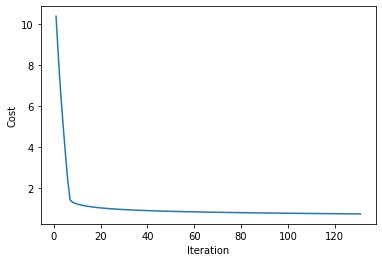

[[-3.35052436e-06 -1.51375245e-06  1.57854118e-05 -9.00709461e-06
  -1.32856644e-05  5.41027175e-05 -2.21231687e-06 -3.53582523e-05
   6.88641366e-05 -4.43430602e-06  5.83426603e-06  9.14137524e-06]
 [-1.80387344e-05  3.35547731e-05  2.22503231e-05 -6.90695916e-05
   1.52364545e-04  5.35581387e-05  2.88363895e-06 -1.43701491e-05
   7.85450797e-06  2.00594734e-05 -4.48873624e-05 -4.42938435e-07]
 [ 8.94109800e-05  5.05894381e-05 -1.74453895e-04  1.56510121e-06
  -4.13528199e-06 -6.27808049e-08  2.42087793e-06  3.03093299e-06
  -8.84079921e-06  3.04060236e-06  2.60134631e-05 -3.02082808e-05]]
[[-4.78285657e-05  1.05746317e-05  1.86921866e-04]]


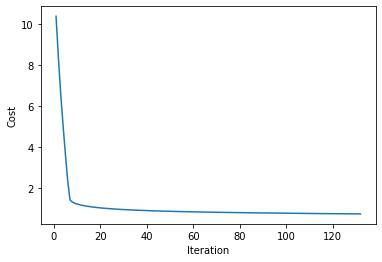

[[-3.34017925e-06 -1.52916126e-06  1.57323240e-05 -8.97797707e-06
  -1.33229529e-05  5.39001141e-05 -2.19873885e-06 -3.52844280e-05
   6.83408591e-05 -4.42130021e-06  5.81093031e-06  9.10824124e-06]
 [-1.79856250e-05  3.34510898e-05  2.21584695e-05 -6.88634916e-05
   1.51939205e-04  5.32975082e-05  2.87634603e-06 -1.43671872e-05
   7.84717932e-06  2.00031314e-05 -4.48667204e-05 -3.25188905e-07]
 [ 8.91434661e-05  5.05603033e-05 -1.73260405e-04  1.56127415e-06
  -4.13466301e-06 -5.87853116e-08  2.41444621e-06  3.02595540e-06
  -8.81109116e-06  3.03198481e-06  2.59895861e-05 -3.01208072e-05]]
[[-4.76855808e-05  1.03591071e-05  1.86310191e-04]]


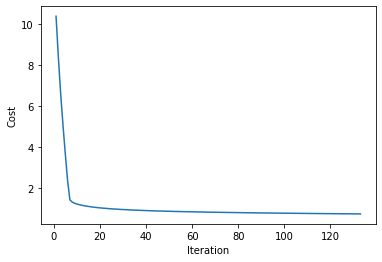

[[-3.32989943e-06 -1.54437049e-06  1.56798991e-05 -8.94904746e-06
  -1.33595678e-05  5.37000571e-05 -2.18527033e-06 -3.52095456e-05
   6.78245712e-05 -4.40837468e-06  5.78780000e-06  9.07555306e-06]
 [-1.79328450e-05  3.33482244e-05  2.20679475e-05 -6.86586821e-05
   1.51517043e-04  5.30409630e-05  2.86909557e-06 -1.43642486e-05
   7.83987446e-06  1.99471330e-05 -4.48466013e-05 -2.09231494e-07]
 [ 8.88776302e-05  5.05277833e-05 -1.72082906e-04  1.55746932e-06
  -4.13406299e-06 -5.48634789e-08  2.40805359e-06  3.02093062e-06
  -8.78177352e-06  3.02342166e-06  2.59656408e-05 -3.00344149e-05]]
[[-4.75434843e-05  1.01460395e-05  1.85706194e-04]]


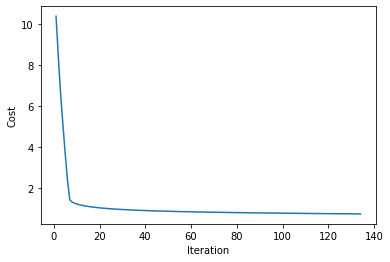

[[-3.31968429e-06 -1.55938630e-06  1.56281238e-05 -8.92030397e-06
  -1.33955322e-05  5.35024950e-05 -2.17190999e-06 -3.51336623e-05
   6.73151303e-05 -4.39552867e-06  5.76486983e-06  9.04330121e-06]
 [-1.78803913e-05  3.32461575e-05  2.19787273e-05 -6.84551510e-05
   1.51097989e-04  5.27884078e-05  2.86188720e-06 -1.43613324e-05
   7.83259357e-06  1.98914749e-05 -4.48269851e-05 -9.50273617e-08]
 [ 8.86134563e-05  5.04920265e-05 -1.70921069e-04  1.55368650e-06
  -4.13348110e-06 -5.10136383e-08  2.40169968e-06  3.01586158e-06
  -8.75283848e-06  3.01491239e-06  2.59416340e-05 -2.99490829e-05]]
[[-4.74022682e-05  9.93535661e-06  1.85109720e-04]]


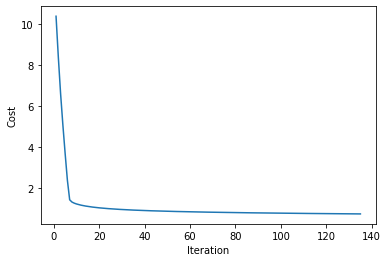

[[-3.30953320e-06 -1.57421458e-06  1.55769851e-05 -8.89174480e-06
  -1.34308678e-05  5.33073778e-05 -2.15865657e-06 -3.50568324e-05
   6.68123978e-05 -4.38276145e-06  5.74213469e-06  9.01147647e-06]
 [-1.78282608e-05  3.31448706e-05  2.18907802e-05 -6.82528862e-05
   1.50681973e-04  5.25397500e-05  2.85472054e-06 -1.43584378e-05
   7.82533679e-06  1.98361542e-05 -4.48078527e-05  1.74612290e-08]
 [ 8.83509289e-05  5.04531756e-05 -1.69774574e-04  1.54992550e-06
  -4.13291653e-06 -4.72341695e-08  2.39538413e-06  3.01075108e-06
  -8.72427843e-06  3.00645648e-06  2.59175722e-05 -2.98647907e-05]]
[[-4.72619241e-05  9.72698922e-06  1.84520616e-04]]


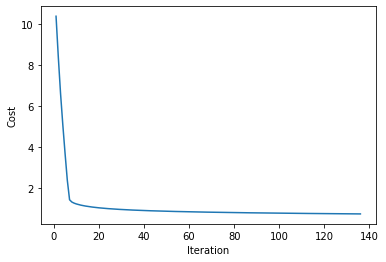

[[-3.29944558e-06 -1.58886101e-06  1.55264702e-05 -8.86336820e-06
  -1.34655960e-05  5.31146569e-05 -2.14550883e-06 -3.49791085e-05
   6.63162388e-05 -4.37007229e-06  5.71958971e-06  8.98006985e-06]
 [-1.77764505e-05  3.30443457e-05  2.18040780e-05 -6.80518757e-05
   1.50268930e-04  5.22948999e-05  2.84759520e-06 -1.43555642e-05
   7.81810427e-06  1.97811676e-05 -4.47891854e-05  1.28270951e-07]
 [ 8.80900325e-05  5.04113671e-05 -1.68643110e-04  1.54618613e-06
  -4.13236852e-06 -4.35234980e-08  2.38910659e-06  3.00560180e-06
  -8.69608596e-06  2.99805342e-06  2.58934616e-05 -2.97815187e-05]]
[[-4.71224441e-05  9.52087057e-06  1.83938735e-04]]


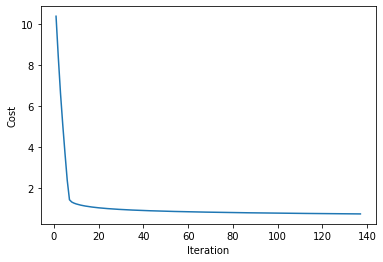

[[-3.28942083e-06 -1.60333104e-06  1.54765668e-05 -8.83517242e-06
  -1.34997369e-05  5.29242849e-05 -2.13246556e-06 -3.49005406e-05
   6.58265220e-05 -4.35746047e-06  5.69723016e-06  8.94907266e-06]
 [-1.77249574e-05  3.29445653e-05  2.17185936e-05 -6.78521080e-05
   1.49858795e-04  5.20537706e-05  2.84051082e-06 -1.43527108e-05
   7.81089613e-06  1.97265121e-05 -4.47709657e-05  2.37437451e-07]
 [ 8.78307519e-05  5.03667326e-05 -1.67526375e-04  1.54246818e-06
  -4.13183632e-06 -3.98800939e-08  2.38286670e-06  3.00041632e-06
  -8.66825388e-06  2.98970272e-06  2.58693081e-05 -2.96992473e-05]]
[[-4.69838200e-05  9.31693645e-06  1.83363933e-04]]


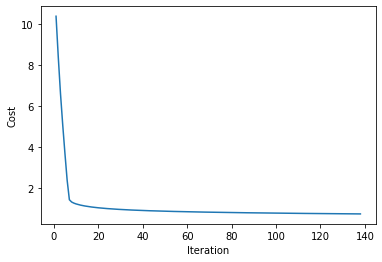

[[-3.27945837e-06 -1.61762992e-06  1.54272630e-05 -8.80715576e-06
  -1.35333102e-05  5.27362157e-05 -2.11952556e-06 -3.48211771e-05
   6.53431197e-05 -4.34492528e-06  5.67505150e-06  8.91847641e-06]
 [-1.76737786e-05  3.28455129e-05  2.16343005e-05 -6.76535713e-05
   1.49451508e-04  5.18162775e-05  2.83346704e-06 -1.43498769e-05
   7.80371249e-06  1.96721846e-05 -4.47531765e-05  3.44995383e-07]
 [ 8.75730719e-05  5.03193980e-05 -1.66424075e-04  1.53877148e-06
  -4.13131922e-06 -3.63024705e-08  2.37666412e-06  2.99519710e-06
  -8.64077516e-06  2.98140387e-06  2.58451174e-05 -2.96179577e-05]]
[[-4.68460441e-05  9.11512505e-06  1.82796072e-04]]


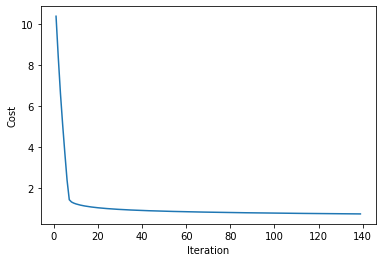

[[-3.26955761e-06 -1.63176272e-06  1.53785469e-05 -8.77931652e-06
  -1.35663345e-05  5.25504045e-05 -2.10668765e-06 -3.47410640e-05
   6.48659077e-05 -4.33246601e-06  5.65304934e-06  8.88827287e-06]
 [-1.76229113e-05  3.27471722e-05  2.15511732e-05 -6.74562542e-05
   1.49047009e-04  5.15823387e-05  2.82646349e-06 -1.43470620e-05
   7.79655343e-06  1.96181822e-05 -4.47358014e-05  4.50978445e-07]
 [ 8.73169778e-05  5.02694845e-05 -1.65335923e-04  1.53509582e-06
  -4.13081655e-06 -3.27891823e-08  2.37049850e-06  2.98994649e-06
  -8.61364298e-06  2.97315638e-06  2.58208949e-05 -2.95376316e-05]]
[[-4.67091086e-05  8.91537689e-06  1.82235015e-04]]


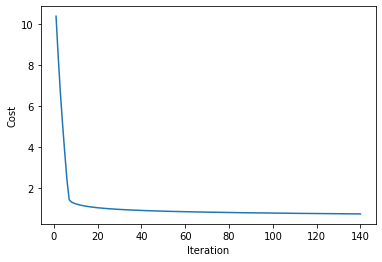

[[-3.25971798e-06 -1.64573429e-06  1.53304074e-05 -8.75165303e-06
  -1.35988280e-05  5.23668076e-05 -2.09395070e-06 -3.46602457e-05
   6.43947648e-05 -4.32008197e-06  5.63121946e-06  8.85845404e-06]
 [-1.75723524e-05  3.26495278e-05  2.14691866e-05 -6.72601455e-05
   1.48645240e-04  5.13518747e-05  2.81949982e-06 -1.43442652e-05
   7.78941906e-06  1.95645019e-05 -4.47188247e-05  5.55419410e-07]
 [ 8.70624548e-05  5.02171081e-05 -1.64261641e-04  1.53144103e-06
  -4.13032764e-06 -2.93388241e-08  2.36436951e-06  2.98466676e-06
  -8.58685067e-06  2.96495978e-06  2.57966457e-05 -2.94582511e-05]]
[[-4.65730057e-05  8.71763472e-06  1.81680631e-04]]


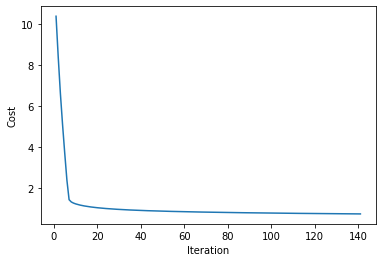

[[-3.24993893e-06 -1.65954931e-06  1.52828331e-05 -8.72416364e-06
  -1.36308080e-05  5.21853825e-05 -2.08131357e-06 -3.45787647e-05
   6.39295731e-05 -4.30777247e-06  5.60955779e-06  8.82901211e-06]
 [-1.75220993e-05  3.25525646e-05  2.13883165e-05 -6.70652338e-05
   1.48246146e-04  5.11248082e-05  2.81257567e-06 -1.43414862e-05
   7.78230944e-06  1.95111408e-05 -4.47022313e-05  6.58350156e-07]
 [ 8.68094884e-05  5.01623805e-05 -1.63200957e-04  1.52780691e-06
  -4.12985188e-06 -2.59500295e-08  2.35827681e-06  2.97936008e-06
  -8.56039174e-06  2.95681358e-06  2.57723749e-05 -2.93797986e-05]]
[[-4.64377280e-05  8.52184341e-06  1.81132789e-04]]


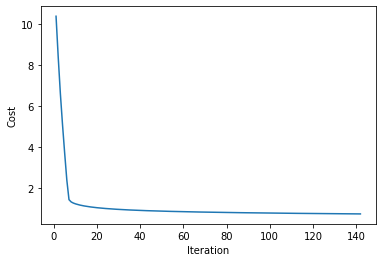

[[-3.24021990e-06 -1.67321229e-06  1.52358135e-05 -8.69684673e-06
  -1.36622913e-05  5.20060878e-05 -2.06877516e-06 -3.44966616e-05
   6.34702180e-05 -4.29553685e-06  5.58806042e-06  8.79993950e-06]
 [-1.74721492e-05  3.24562681e-05  2.13085394e-05 -6.68715084e-05
   1.47849674e-04  5.09010640e-05  2.80569070e-06 -1.43387242e-05
   7.77522466e-06  1.94580959e-05 -4.46860067e-05  7.59801699e-07]
 [ 8.65580642e-05  5.01054086e-05 -1.62153607e-04  1.52419329e-06
  -4.12938866e-06 -2.26214695e-08  2.35222007e-06  2.97402852e-06
  -8.53425989e-06  2.94871731e-06  2.57480872e-05 -2.93022573e-05]]
[[-4.63032678e-05  8.32794990e-06  1.80591366e-04]]


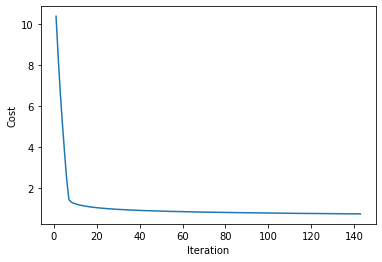

[[-3.23056033e-06 -1.68672757e-06  1.51893379e-05 -8.66970068e-06
  -1.36932938e-05  5.18288832e-05 -2.05633438e-06 -3.44139756e-05
   6.30165876e-05 -4.28337442e-06  5.56672355e-06  8.77122885e-06]
 [-1.74224991e-05  3.23606245e-05  2.12298324e-05 -6.66789581e-05
   1.47455772e-04  5.06805694e-05  2.79884456e-06 -1.43359787e-05
   7.76816475e-06  1.94053644e-05 -4.46701369e-05  8.59804222e-07]
 [ 8.63081681e-05  5.00462955e-05 -1.61119334e-04  1.52059999e-06
  -4.12893740e-06 -1.93518511e-08  2.34619897e-06  2.96867405e-06
  -8.50844895e-06  2.94067051e-06  2.57237870e-05 -2.92256104e-05]]
[[-4.61696178e-05  8.13590307e-06  1.80056239e-04]]


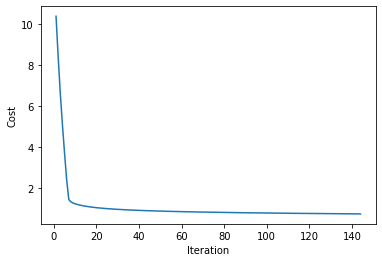

[[-3.22095968e-06 -1.70009931e-06  1.51433961e-05 -8.64272391e-06
  -1.37238311e-05  5.16537293e-05 -2.04399017e-06 -3.43307440e-05
   6.25685729e-05 -4.27128453e-06  5.54554354e-06  8.74287297e-06]
 [-1.73731466e-05  3.22656202e-05  2.11521731e-05 -6.64875724e-05
   1.47064390e-04  5.04632534e-05  2.79203692e-06 -1.43332493e-05
   7.76112978e-06  1.93529436e-05 -4.46546085e-05  9.58387098e-07]
 [ 8.60597861e-05  4.99851396e-05 -1.60097887e-04  1.51702682e-06
  -4.12849755e-06 -1.61399167e-08  2.34021318e-06  2.96329860e-06
  -8.48295291e-06  2.93267271e-06  2.56994787e-05 -2.91498418e-05]]
[[-4.60367707e-05  7.94565372e-06  1.79527289e-04]]


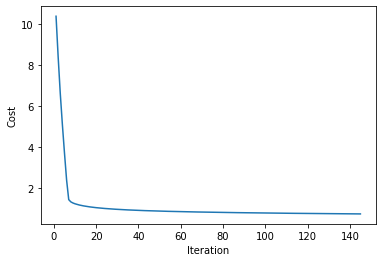

[[-3.21141742e-06 -1.71333154e-06  1.50979782e-05 -8.61591485e-06
  -1.37539179e-05  5.14805879e-05 -2.03174146e-06 -3.42470029e-05
   6.21260678e-05 -4.25926652e-06  5.52451688e-06  8.71486487e-06]
 [-1.73240887e-05  3.21712421e-05  2.10755400e-05 -6.62973405e-05
   1.46675480e-04  5.02490474e-05  2.78526742e-06 -1.43305352e-05
   7.75411979e-06  1.93008306e-05 -4.46394087e-05  1.05557892e-06]
 [ 8.58129045e-05  4.99220359e-05 -1.59089022e-04  1.51347361e-06
  -4.12806858e-06 -1.29844423e-08  2.33426238e-06  2.95790396e-06
  -8.45776592e-06  2.92472347e-06  2.56751665e-05 -2.90749357e-05]]
[[-4.59047192e-05  7.75715446e-06  1.79004399e-04]]


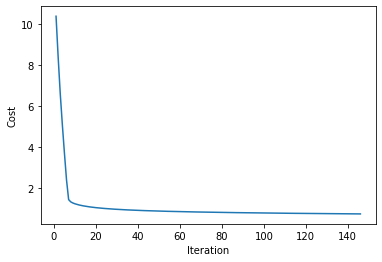

[[-3.20193302e-06 -1.72642812e-06  1.50530744e-05 -8.58927196e-06
  -1.37835687e-05  5.13094217e-05 -2.01958723e-06 -3.41627865e-05
   6.16889688e-05 -4.24731976e-06  5.50364016e-06  8.68719774e-06]
 [-1.72753230e-05  3.20774778e-05  2.09999119e-05 -6.61082519e-05
   1.46288996e-04  5.00378844e-05  2.77853575e-06 -1.43278362e-05
   7.74713479e-06  1.92490226e-05 -4.46245251e-05  1.15140754e-06]
 [ 8.55675094e-05  4.98570752e-05 -1.58092501e-04  1.50994019e-06
  -4.12764998e-06 -9.88423650e-09  2.32834627e-06  2.95249190e-06
  -8.43288228e-06  2.91682233e-06  2.56508543e-05 -2.90008766e-05]]
[[-4.57734562e-05  7.57035962e-06  1.78487458e-04]]


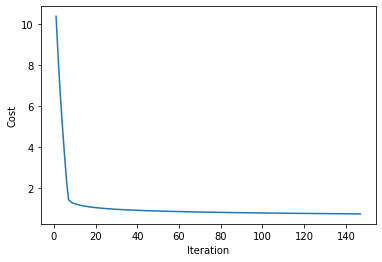

[[-3.19250595e-06 -1.73939278e-06  1.50086752e-05 -8.56279371e-06
  -1.38127970e-05  5.11401943e-05 -2.00752646e-06 -3.40781280e-05
   6.12571751e-05 -4.23544360e-06  5.48291012e-06  8.65986497e-06]
 [-1.72268467e-05  3.19843150e-05  2.09252684e-05 -6.59202964e-05
   1.45904892e-04  4.98296993e-05  2.77184157e-06 -1.43251516e-05
   7.74017482e-06  1.91975170e-05 -4.46099458e-05  1.24590005e-06]
 [ 8.53235875e-05  4.97903450e-05 -1.57108092e-04  1.50642638e-06
  -4.12724126e-06 -6.83813987e-09  2.32246452e-06  2.94706408e-06
  -8.40829642e-06  2.90896885e-06  2.56265459e-05 -2.89276497e-05]]
[[-4.56429747e-05  7.38522525e-06  1.77976356e-04]]


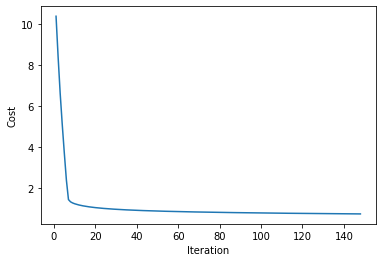

[[-3.18313570e-06 -1.75222911e-06  1.49647715e-05 -8.53647859e-06
  -1.38416163e-05  5.09728702e-05 -1.99555814e-06 -3.39930590e-05
   6.08305884e-05 -4.22363741e-06  5.46232359e-06  8.63286009e-06]
 [-1.71786573e-05  3.18917421e-05  2.08515895e-05 -6.57334635e-05
   1.45523125e-04  4.96244290e-05  2.76518456e-06 -1.43224811e-05
   7.73323990e-06  1.91463111e-05 -4.45956594e-05  1.33908287e-06]
 [ 8.50811253e-05  4.97219291e-05 -1.56135569e-04  1.50293202e-06
  -4.12684195e-06 -3.84502344e-09  2.31661683e-06  2.94162209e-06
  -8.38400290e-06  2.90116259e-06  2.56022449e-05 -2.88552401e-05]]
[[-4.55132676e-05  7.20170897e-06  1.77470983e-04]]


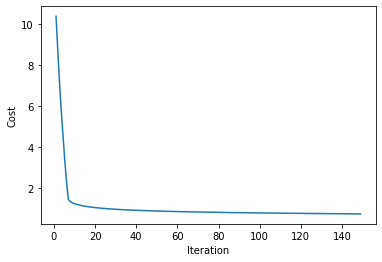

[[-3.17382176e-06 -1.76494056e-06  1.49213541e-05 -8.51032511e-06
  -1.38700391e-05  5.08074148e-05 -1.98368130e-06 -3.39076097e-05
   6.04091128e-05 -4.21190057e-06  5.44187753e-06  8.60617683e-06]
 [-1.71307521e-05  3.17997477e-05  2.07788558e-05 -6.55477433e-05
   1.45143653e-04  4.94220119e-05  2.75856440e-06 -1.43198242e-05
   7.72633002e-06  1.90954021e-05 -4.45816548e-05  1.43098170e-06]
 [ 8.48401099e-05  4.96519080e-05 -1.55174712e-04  1.49945694e-06
  -4.12645160e-06 -9.03787946e-10  2.31080291e-06  2.93616748e-06
  -8.35999643e-06  2.89340313e-06  2.55779546e-05 -2.87836335e-05]]
[[-4.53843282e-05  7.01976996e-06  1.76971238e-04]]


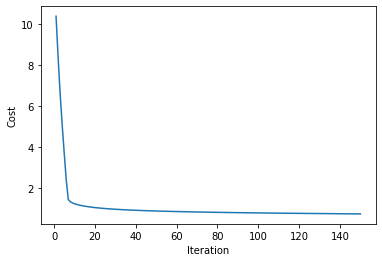

[[-3.16456362e-06 -1.77753045e-06  1.48784144e-05 -8.48433180e-06
  -1.38980777e-05  5.06437945e-05 -1.97189496e-06 -3.38218093e-05
   5.99926548e-05 -4.20023247e-06  5.42156900e-06  8.57980906e-06]
 [-1.70831288e-05  3.17083209e-05  2.07070484e-05 -6.53631257e-05
   1.44766435e-04  4.92223884e-05  2.75198077e-06 -1.43171804e-05
   7.71944519e-06  1.90447876e-05 -4.45679216e-05  1.52162163e-06]
 [ 8.46005280e-05  4.95803591e-05 -1.54225305e-04  1.49600096e-06
  -4.12606978e-06  1.98663717e-09  2.30502244e-06  2.93070169e-06
  -8.33627185e-06  2.88569003e-06  2.55536785e-05 -2.87128161e-05]]
[[-4.52561495e-05  6.83936888e-06  1.76477016e-04]]


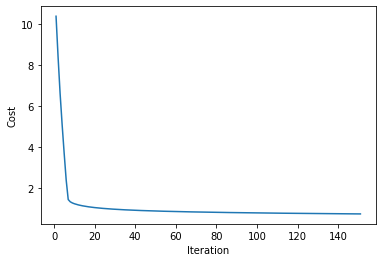

[[-3.15536078e-06 -1.79000200e-06  1.48359437e-05 -8.45849720e-06
  -1.39257440e-05  5.04819763e-05 -1.96019817e-06 -3.37356856e-05
   5.95811232e-05 -4.18863250e-06  5.40139515e-06  8.55375080e-06]
 [-1.70357847e-05  3.16174511e-05  2.06361489e-05 -6.51796009e-05
   1.44391431e-04  4.90255001e-05  2.74543336e-06 -1.43145494e-05
   7.71258540e-06  1.89944648e-05 -4.45544496e-05  1.61102705e-06]
 [ 8.43623670e-05  4.95073566e-05 -1.53287140e-04  1.49256394e-06
  -4.12569607e-06  4.82729467e-09  2.29927514e-06  2.92522614e-06
  -8.31282410e-06  2.87802287e-06  2.55294196e-05 -2.86427740e-05]]
[[-4.51287250e-05  6.66046784e-06  1.75988219e-04]]


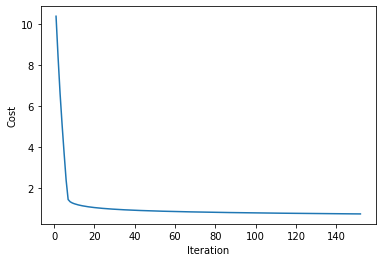

[[-3.14621276e-06 -1.80235828e-06  1.47939337e-05 -8.43281988e-06
  -1.39530493e-05  5.03219282e-05 -1.94858998e-06 -3.36492654e-05
   5.91744290e-05 -4.17710006e-06  5.38135325e-06  8.52799625e-06]
 [-1.69887174e-05  3.15271281e-05  2.05661394e-05 -6.49971590e-05
   1.44018605e-04  4.88312905e-05  2.73892185e-06 -1.43119308e-05
   7.70575065e-06  1.89444312e-05 -4.45412290e-05  1.69922177e-06]
 [ 8.41256140e-05  4.94329717e-05 -1.52360011e-04  1.48914569e-06
  -4.12533008e-06  7.61920040e-09  2.29356070e-06  2.91974217e-06
  -8.28964827e-06  2.87040123e-06  2.55051810e-05 -2.85734940e-05]]
[[-4.50020478e-05  6.48303029e-06  1.75504750e-04]]


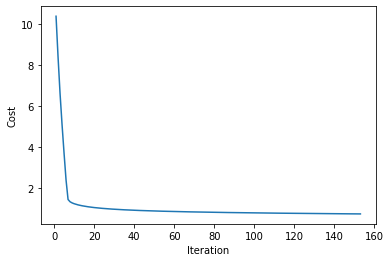

[[-3.13711906e-06 -1.81460228e-06  1.47523762e-05 -8.40729842e-06
  -1.39800044e-05  5.01636187e-05 -1.93706947e-06 -3.35625742e-05
   5.87724854e-05 -4.16563455e-06  5.36144063e-06  8.50253973e-06]
 [-1.69419244e-05  3.14373420e-05  2.04970024e-05 -6.48157905e-05
   1.43647918e-04  4.86397046e-05  2.73244594e-06 -1.43093242e-05
   7.69894092e-06  1.88946843e-05 -4.45282505e-05  1.78622899e-06]
 [ 8.38902566e-05  4.93572729e-05 -1.51443719e-04  1.48574608e-06
  -4.12497143e-06  1.03633441e-08  2.28787885e-06  2.91425105e-06
  -8.26673955e-06  2.86282471e-06  2.54809654e-05 -2.85049631e-05]]
[[-4.48761115e-05  6.30702102e-06  1.75026514e-04]]


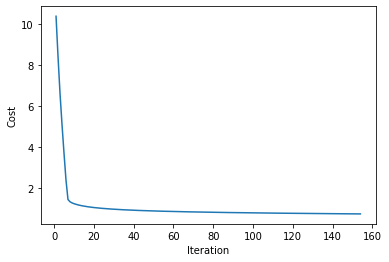

[[-3.12807920e-06 -1.82673686e-06  1.47112633e-05 -8.38193141e-06
  -1.40066199e-05  5.00070175e-05 -1.92563571e-06 -3.34756366e-05
   5.83752077e-05 -4.15423540e-06  5.34165476e-06  8.47737572e-06]
 [-1.68954034e-05  3.13480832e-05  2.04287210e-05 -6.46354858e-05
   1.43279336e-04  4.84506887e-05  2.72600533e-06 -1.43067291e-05
   7.69215618e-06  1.88452216e-05 -4.45155050e-05  1.87207132e-06]
 [ 8.36562823e-05  4.92803258e-05 -1.50538070e-04  1.48236492e-06
  -4.12461975e-06  1.30606904e-08  2.28222929e-06  2.90875403e-06
  -8.24409325e-06  2.85529289e-06  2.54567757e-05 -2.84371685e-05]]
[[-4.47509096e-05  6.13240606e-06  1.74553418e-04]]


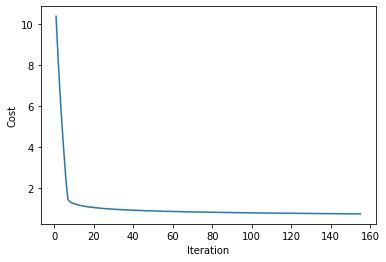

[[-3.11909271e-06 -1.83876478e-06  1.46705872e-05 -8.35671748e-06
  -1.40329059e-05  4.98520945e-05 -1.91428782e-06 -3.33884760e-05
   5.79825132e-05 -4.14290201e-06  5.32199315e-06  8.45249882e-06]
 [-1.68491519e-05  3.12593424e-05  2.03612785e-05 -6.44562355e-05
   1.42912824e-04  4.82641906e-05  2.71959972e-06 -1.43041454e-05
   7.68539640e-06  1.87960407e-05 -4.45029838e-05  1.95677081e-06]
 [ 8.34236788e-05  4.92021936e-05 -1.49642874e-04  1.47900208e-06
  -4.12427468e-06  1.57121793e-08  2.27661175e-06  2.90325227e-06
  -8.22170478e-06  2.84780538e-06  2.54326143e-05 -2.83700978e-05]]
[[-4.46264356e-05  5.95915268e-06  1.74085372e-04]]


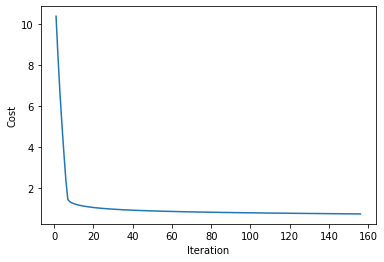

[[-3.11015912e-06 -1.85068871e-06  1.46303403e-05 -8.33165526e-06
  -1.40588722e-05  4.96988208e-05 -1.90302491e-06 -3.33011150e-05
   5.75943212e-05 -4.13163383e-06  5.30245342e-06  8.42790378e-06]
 [-1.68031676e-05  3.11711108e-05  2.02946589e-05 -6.42780302e-05
   1.42548348e-04  4.80801596e-05  2.71322881e-06 -1.43015726e-05
   7.67866155e-06  1.87471389e-05 -4.44906787e-05  2.04034896e-06]
 [ 8.31924342e-05  4.91229368e-05 -1.48757945e-04  1.47565739e-06
  -4.12393589e-06  1.83187270e-08  2.27102593e-06  2.89774689e-06
  -8.19956968e-06  2.84036177e-06  2.54084839e-05 -2.83037389e-05]]
[[-4.45026832e-05  5.78722932e-06  1.73622289e-04]]


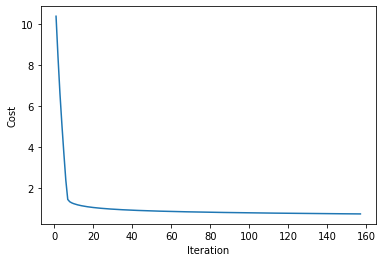

[[-3.10127797e-06 -1.86251121e-06  1.45905152e-05 -8.30674338e-06
  -1.40845281e-05  4.95471679e-05 -1.89184609e-06 -3.32135752e-05
   5.72105529e-05 -4.12043027e-06  5.28303326e-06  8.40358547e-06]
 [-1.67574481e-05  3.10833797e-05  2.02288465e-05 -6.41008609e-05
   1.42185876e-04  4.78985461e-05  2.70689231e-06 -1.42990104e-05
   7.67195159e-06  1.86985141e-05 -4.44785817e-05  2.12282676e-06]
 [ 8.29625363e-05  4.90426136e-05 -1.47883103e-04  1.47233069e-06
  -4.12360307e-06  2.08812271e-08  2.26547158e-06  2.89223898e-06
  -8.17768356e-06  2.83296168e-06  2.53843867e-05 -2.82380798e-05]]
[[-4.43796462e-05  5.61660552e-06  1.73164083e-04]]


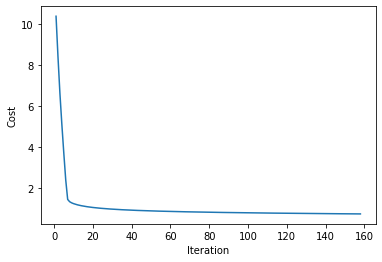

[[-3.09244879e-06 -1.87423475e-06  1.45511047e-05 -8.28198053e-06
  -1.41098825e-05  4.93971079e-05 -1.88075050e-06 -3.31258771e-05
   5.68311313e-05 -4.10929079e-06  5.26373045e-06  8.37953889e-06]
 [-1.67119912e-05  3.09961407e-05  2.01638258e-05 -6.39247183e-05
   1.41825376e-04  4.77193020e-05  2.70058993e-06 -1.42964585e-05
   7.66526648e-06  1.86501636e-05 -4.44666849e-05  2.20422465e-06]
 [ 8.27339734e-05  4.89612797e-05 -1.47018171e-04  1.46902185e-06
  -4.12327589e-06  2.34005504e-08  2.25994841e-06  2.88672955e-06
  -8.15604217e-06  2.82560472e-06  2.53603250e-05 -2.81731091e-05]]
[[-4.42573184e-05  5.44725191e-06  1.72710669e-04]]


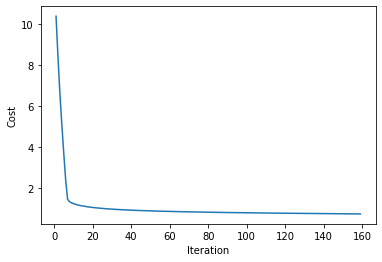

[[-3.08367114e-06 -1.88586172e-06  1.45121017e-05 -8.25736537e-06
  -1.41349443e-05  4.92486139e-05 -1.86973730e-06 -3.30380407e-05
   5.64559812e-05 -4.09821483e-06  5.24454282e-06  8.35575916e-06]
 [-1.66667945e-05  3.09093856e-05  2.00995819e-05 -6.37495936e-05
   1.41466819e-04  4.75423802e-05  2.69432138e-06 -1.42939167e-05
   7.65860617e-06  1.86020853e-05 -4.44549811e-05  2.28456261e-06]
 [ 8.25067338e-05  4.88789887e-05 -1.46162976e-04  1.46573071e-06
  -4.12295405e-06  2.58775465e-08  2.25445616e-06  2.88121960e-06
  -8.13464134e-06  2.81829050e-06  2.53363009e-05 -2.81088153e-05]]
[[-4.41356936e-05  5.27914018e-06  1.72261965e-04]]


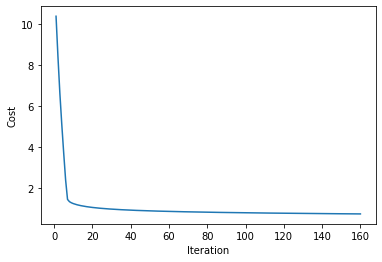

[[-3.07494456e-06 -1.89739442e-06  1.44734994e-05 -8.23289660e-06
  -1.41597218e-05  4.91016594e-05 -1.85880565e-06 -3.29500849e-05
   5.60850293e-05 -4.08720184e-06  5.22546830e-06  8.33224152e-06]
 [-1.66218558e-05  3.08231067e-05  2.00361004e-05 -6.35754777e-05
   1.41110175e-04  4.73677352e-05  2.68808639e-06 -1.42913845e-05
   7.65197062e-06  1.85542767e-05 -4.44434631e-05  2.36386010e-06]
 [ 8.22808060e-05  4.87957922e-05 -1.45317351e-04  1.46245712e-06
  -4.12263729e-06  2.83130438e-08  2.24899455e-06  2.87571007e-06
  -8.11347697e-06  2.81101865e-06  2.53123165e-05 -2.80451873e-05]]
[[-4.40147658e-05  5.11224298e-06  1.71817892e-04]]


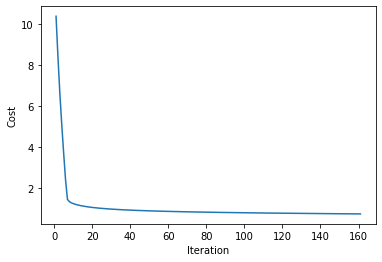

[[-3.06626861e-06 -1.90883506e-06  1.44352909e-05 -8.20857294e-06
  -1.41842230e-05  4.89562183e-05 -1.84795471e-06 -3.28620277e-05
   5.57182039e-05 -4.07625129e-06  5.20650487e-06  8.30898131e-06]
 [-1.65771730e-05  3.07372963e-05  1.99733669e-05 -6.34023621e-05
   1.40755414e-04  4.71953223e-05  2.68188466e-06 -1.42888618e-05
   7.64535976e-06  1.85067356e-05 -4.44321241e-05  2.44213615e-06]
 [ 8.20561784e-05  4.87117395e-05 -1.44481129e-04  1.45920094e-06
  -4.12232531e-06  3.07078505e-08  2.24356333e-06  2.87020184e-06
  -8.09254511e-06  2.80378879e-06  2.52883737e-05 -2.79822144e-05]]
[[-4.38945289e-05  4.94653395e-06  1.71378371e-04]]


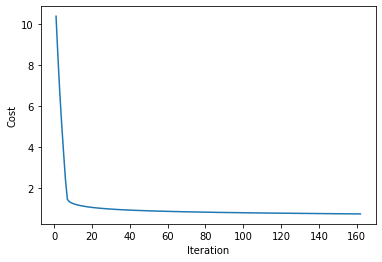

[[-3.05764286e-06 -1.92018578e-06  1.43974698e-05 -8.18439310e-06
  -1.42084557e-05  4.88122656e-05 -1.83718366e-06 -3.27738867e-05
   5.53554348e-05 -4.06536263e-06  5.18765058e-06  8.28597401e-06]
 [-1.65327437e-05  3.06519470e-05  1.99113676e-05 -6.32302379e-05
   1.40402510e-04  4.70250981e-05  2.67571593e-06 -1.42863482e-05
   7.63877354e-06  1.84594597e-05 -4.44209574e-05  2.51940930e-06]
 [ 8.18328399e-05  4.86268780e-05 -1.43654152e-04  1.45596201e-06
  -4.12201786e-06  3.30627550e-08  2.23816224e-06  2.86469578e-06
  -8.07184184e-06  2.79660055e-06  2.52644743e-05 -2.79198859e-05]]
[[-4.37749772e-05  4.78198762e-06  1.70943326e-04]]


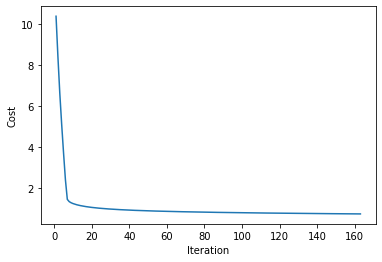

[[-3.04906686e-06 -1.93144865e-06  1.43600295e-05 -8.16035584e-06
  -1.42324274e-05  4.86697764e-05 -1.82649172e-06 -3.26856784e-05
   5.49966537e-05 -4.05453535e-06  5.16890355e-06  8.26321517e-06]
 [-1.64885658e-05  3.05670518e-05  1.98500890e-05 -6.30590966e-05
   1.40051436e-04  4.68570203e-05  2.66957992e-06 -1.42838435e-05
   7.63221189e-06  1.84124466e-05 -4.44099567e-05  2.59569767e-06]
 [ 8.16107792e-05  4.85412533e-05 -1.42836261e-04  1.45274021e-06
  -4.12171469e-06  3.53785266e-08  2.23279101e-06  2.85919271e-06
  -8.05136336e-06  2.78945357e-06  2.52406202e-05 -2.78581915e-05]]
[[-4.36561047e-05  4.61857944e-06  1.70512682e-04]]


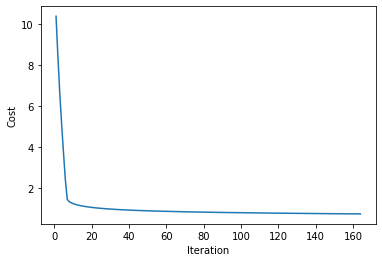

[[-3.04054021e-06 -1.94262565e-06  1.43229638e-05 -8.13645990e-06
  -1.42561452e-05  4.85287266e-05 -1.81587807e-06 -3.25974188e-05
   5.46417936e-05 -4.04376891e-06  5.15026195e-06  8.24070048e-06]
 [-1.64446372e-05  3.04826037e-05  1.97895179e-05 -6.28889298e-05
   1.39702165e-04  4.66910475e-05  2.66347636e-06 -1.42813475e-05
   7.62567475e-06  1.83656943e-05 -4.43991160e-05  2.67101894e-06]
 [ 8.13899854e-05  4.84549090e-05 -1.42027304e-04  1.44953538e-06
  -4.12141554e-06  3.76559161e-08  2.22744940e-06  2.85369341e-06
  -8.03110596e-06  2.78234748e-06  2.52168130e-05 -2.77971209e-05]]
[[-4.35379057e-05  4.45628570e-06  1.70086367e-04]]


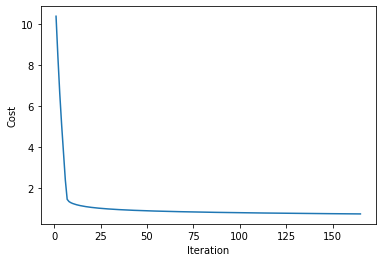

[[-3.03206246e-06 -1.95371871e-06  1.42862666e-05 -8.11270405e-06
  -1.42796162e-05  4.83890927e-05 -1.80534194e-06 -3.25091231e-05
   5.42907891e-05 -4.03306281e-06  5.13172402e-06  8.21842570e-06]
 [-1.64009557e-05  3.03985959e-05  1.97296415e-05 -6.27197290e-05
   1.39354673e-04  4.65271397e-05  2.65740498e-06 -1.42788599e-05
   7.61916205e-06  1.83192004e-05 -4.43884293e-05  2.74539038e-06]
 [ 8.11704475e-05  4.83678872e-05 -1.41227130e-04  1.44634738e-06
  -4.12112020e-06  3.98956561e-08  2.22213715e-06  2.84819863e-06
  -8.01106599e-06  2.77528193e-06  2.51930542e-05 -2.77366643e-05]]
[[-4.34203745e-05  4.29508349e-06  1.69664309e-04]]


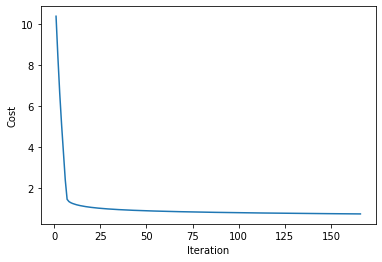

[[-3.02363320e-06 -1.96472967e-06  1.42499318e-05 -8.08908709e-06
  -1.43028469e-05  4.82508515e-05 -1.79488255e-06 -3.24208059e-05
   5.39435763e-05 -4.02241653e-06  5.11328804e-06  8.19638673e-06]
 [-1.63575193e-05  3.03150221e-05  1.96704471e-05 -6.25514860e-05
   1.39008934e-04  4.63652575e-05  2.65136552e-06 -1.42763805e-05
   7.61267372e-06  1.82729628e-05 -4.43778911e-05  2.81882887e-06]
 [ 8.09521548e-05  4.82802280e-05 -1.40435593e-04  1.44317609e-06
  -4.12082844e-06  4.20984618e-08  2.21685401e-06  2.84270909e-06
  -7.99123989e-06  2.76825658e-06  2.51693454e-05 -2.76768120e-05]]
[[-4.33035053e-05  4.13495071e-06  1.69246439e-04]]


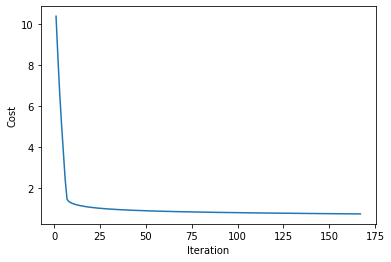

[[-3.01525203e-06 -1.97566033e-06  1.42139536e-05 -8.06560780e-06
  -1.43258438e-05  4.81139806e-05 -1.78449913e-06 -3.23324811e-05
   5.36000926e-05 -4.01182957e-06  5.09495237e-06  8.17457951e-06]
 [-1.63143258e-05  3.02318759e-05  1.96119225e-05 -6.23841926e-05
   1.38664926e-04  4.62053626e-05  2.64535772e-06 -1.42739091e-05
   7.60620969e-06  1.82269794e-05 -4.43674959e-05  2.89135086e-06]
 [ 8.07350966e-05  4.81919702e-05 -1.39652549e-04  1.44002135e-06
  -4.12054004e-06  4.42650315e-08  2.21159974e-06  2.83722546e-06
  -7.97162419e-06  2.76127105e-06  2.51456879e-05 -2.76175545e-05]]
[[-4.31872926e-05  3.97586602e-06  1.68832687e-04]]


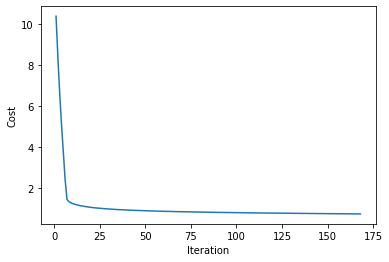

[[-3.00691852e-06 -1.98651240e-06  1.41783262e-05 -8.04226500e-06
  -1.43486131e-05  4.79784577e-05 -1.77419094e-06 -3.22441623e-05
   5.32602770e-05 -4.00130143e-06  5.07671540e-06  8.15300012e-06]
 [-1.62713732e-05  3.01491511e-05  1.95540558e-05 -6.22178407e-05
   1.38322624e-04  4.60474178e-05  2.63938132e-06 -1.42714454e-05
   7.59976988e-06  1.81812480e-05 -4.43572386e-05  2.96297245e-06]
 [ 8.05192623e-05  4.81031508e-05 -1.38877859e-04  1.43688304e-06
  -4.12025480e-06  4.63960468e-08  2.20637410e-06  2.83174839e-06
  -7.95221549e-06  2.75432503e-06  2.51220833e-05 -2.75588824e-05]]
[[-4.30717310e-05  3.81780878e-06  1.68422989e-04]]


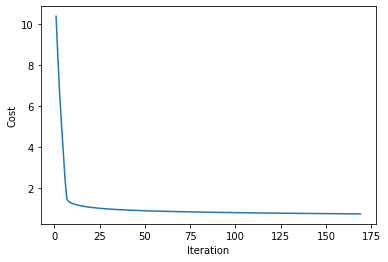

[[-2.99863228e-06 -1.99728755e-06  1.41430440e-05 -8.01905751e-06
  -1.43711608e-05  4.78442615e-05 -1.76395724e-06 -3.21558620e-05
   5.29240697e-05 -3.99083161e-06  5.05857558e-06  8.13164471e-06]
 [-1.62286595e-05  3.00668419e-05  1.94968352e-05 -6.20524222e-05
   1.37982006e-04  4.58913867e-05  2.63343606e-06 -1.42689892e-05
   7.59335420e-06  1.81357665e-05 -4.43471140e-05  3.03370938e-06]
 [ 8.03046417e-05  4.80138055e-05 -1.38111386e-04  1.43376103e-06
  -4.11997253e-06  4.84921734e-08  2.20117684e-06  2.82627852e-06
  -7.93301044e-06  2.74741815e-06  2.50985327e-05 -2.75007867e-05]]
[[-4.29568149e-05  3.66075909e-06  1.68017277e-04]]


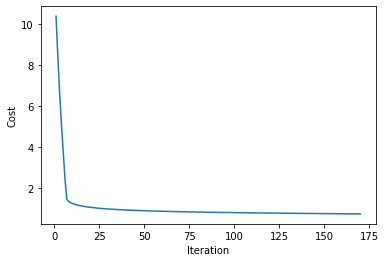

[[-2.99039291e-06 -2.00798740e-06  1.41081016e-05 -7.99598418e-06
  -1.43934926e-05  4.77113706e-05 -1.75379728e-06 -3.20675926e-05
   5.25914122e-05 -3.98041963e-06  5.04053141e-06  8.11050952e-06]
 [-1.61861826e-05  2.99849425e-05  1.94402494e-05 -6.18879294e-05
   1.37643051e-04  4.57372337e-05  2.62752169e-06 -1.42665404e-05
   7.58696259e-06  1.80905328e-05 -4.43371174e-05  3.10357699e-06]
 [ 8.00912243e-05  4.79239685e-05 -1.37352995e-04  1.43065517e-06
  -4.11969303e-06  5.05540613e-08  2.19600773e-06  2.82081642e-06
  -7.91400580e-06  2.74055010e-06  2.50750373e-05 -2.74432585e-05]]
[[-4.28425389e-05  3.50469768e-06  1.67615490e-04]]


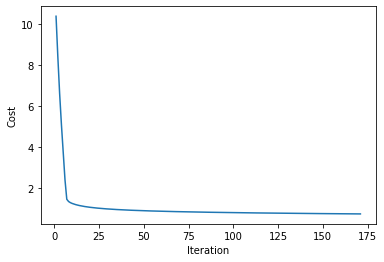

[[-2.98220001e-06 -2.01861349e-06  1.40734935e-05 -7.97304385e-06
  -1.44156141e-05  4.75797646e-05 -1.74371034e-06 -3.19793656e-05
   5.22622474e-05 -3.97006501e-06  5.02258143e-06  8.08959088e-06]
 [-1.61439407e-05  2.99034473e-05  1.93842872e-05 -6.17243542e-05
   1.37305737e-04  4.55849241e-05  2.62163796e-06 -1.42640987e-05
   7.58059495e-06  1.80455449e-05 -4.43272441e-05  3.17259030e-06]
 [ 7.98790000e-05  4.78336725e-05 -1.36602556e-04  1.42756534e-06
  -4.11941612e-06  5.25823456e-08  2.19086653e-06  2.81536266e-06
  -7.89519837e-06  2.73372052e-06  2.50515983e-05 -2.73862890e-05]]
[[-4.27288977e-05  3.34960597e-06  1.67217564e-04]]


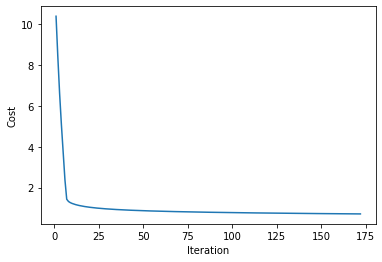

[[-2.97405319e-06 -2.02916732e-06  1.40392144e-05 -7.95023539e-06
  -1.44375307e-05  4.74494232e-05 -1.73369571e-06 -3.18911924e-05
   5.19365192e-05 -3.95976727e-06  5.00472424e-06  8.06888518e-06]
 [-1.61019316e-05  2.98223509e-05  1.93289378e-05 -6.15616892e-05
   1.36970043e-04  4.54344242e-05  2.61578462e-06 -1.42616639e-05
   7.57425119e-06  1.80008007e-05 -4.43174896e-05  3.24076398e-06]
 [ 7.96679587e-05  4.77429491e-05 -1.35859940e-04  1.42449141e-06
  -4.11914164e-06  5.45776465e-08  2.18575301e-06  2.80991779e-06
  -7.87658503e-06  2.72692911e-06  2.50282169e-05 -2.73298696e-05]]
[[-4.26158860e-05  3.19546598e-06  1.66823439e-04]]


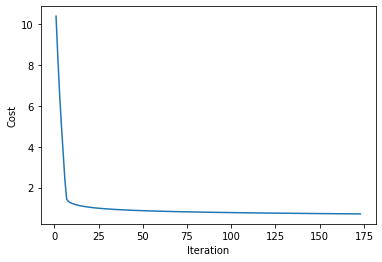

[[-2.96595206e-06 -2.03965033e-06  1.40052593e-05 -7.92755768e-06
  -1.44592475e-05  4.73203267e-05 -1.72375268e-06 -3.18030835e-05
   5.16141729e-05 -3.94952593e-06  4.98695845e-06  8.04838893e-06]
 [-1.60601535e-05  2.97416480e-05  1.92741904e-05 -6.13999265e-05
   1.36635950e-04  4.52857009e-05  2.60996143e-06 -1.42592360e-05
   7.56793124e-06  1.79562982e-05 -4.43078498e-05  3.30811239e-06]
 [ 7.94580905e-05  4.76518285e-05 -1.35125022e-04  1.42143326e-06
  -4.11886940e-06  5.65405700e-08  2.18066694e-06  2.80448231e-06
  -7.85816273e-06  2.72017552e-06  2.50048940e-05 -2.72739921e-05]]
[[-4.25034985e-05  3.04226033e-06  1.66433055e-04]]


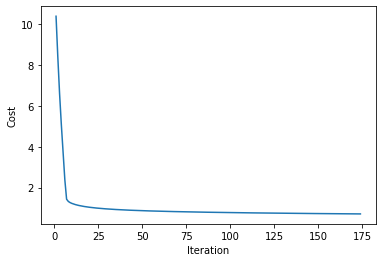

[[-2.95789625e-06 -2.05006394e-06  1.39716232e-05 -7.90500961e-06
  -1.44807694e-05  4.71924557e-05 -1.71388055e-06 -3.17150492e-05
   5.12951550e-05 -3.93934054e-06  4.96928275e-06  8.02809868e-06]
 [-1.60186045e-05  2.96613335e-05  1.92200348e-05 -6.12390586e-05
   1.36303438e-04  4.51387219e-05  2.60416814e-06 -1.42568146e-05
   7.56163501e-06  1.79120355e-05 -4.42983203e-05  3.37464954e-06]
 [ 7.92493855e-05  4.75603396e-05 -1.34397680e-04  1.41839074e-06
  -4.11859927e-06  5.84717082e-08  2.17560810e-06  2.79905671e-06
  -7.83992848e-06  2.71345944e-06  2.49816305e-05 -2.72186483e-05]]
[[-4.23917302e-05  2.88997222e-06  1.66046353e-04]]


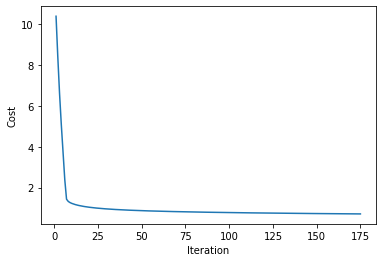

[[-2.94988537e-06 -2.06040948e-06  1.39383010e-05 -7.88259008e-06
  -1.45021013e-05  4.70657912e-05 -1.70407864e-06 -3.16270993e-05
   5.09794130e-05 -3.92921063e-06  4.95169586e-06  8.00801108e-06]
 [-1.59772826e-05  2.95814024e-05  1.91664607e-05 -6.10790780e-05
   1.35972488e-04  4.49934558e-05  2.59840452e-06 -1.42543997e-05
   7.55536239e-06  1.78680104e-05 -4.42888973e-05  3.44038914e-06]
 [ 7.90418341e-05  4.74685103e-05 -1.33677793e-04  1.41536375e-06
  -4.11833107e-06  6.03716397e-08  2.17057625e-06  2.79364146e-06
  -7.82187935e-06  2.70678055e-06  2.49584275e-05 -2.71638300e-05]]
[[-4.22805759e-05  2.73858540e-06  1.65663277e-04]]


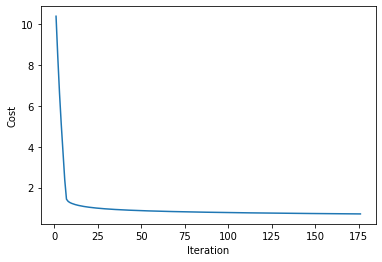

[[-2.94191906e-06 -2.07068826e-06  1.39052879e-05 -7.86029800e-06
  -1.45232477e-05  4.69403148e-05 -1.69434627e-06 -3.15392429e-05
   5.06668957e-05 -3.91913574e-06  4.93419651e-06  7.98812284e-06]
 [-1.59361860e-05  2.95018500e-05  1.91134583e-05 -6.09199774e-05
   1.35643082e-04  4.48498719e-05  2.59267033e-06 -1.42519910e-05
   7.54911330e-06  1.78242212e-05 -4.42795769e-05  3.50534461e-06]
 [ 7.88354265e-05  4.73763673e-05 -1.32965244e-04  1.41235215e-06
  -4.11806468e-06  6.22409298e-08  2.16557118e-06  2.78823700e-06
  -7.80401247e-06  2.70013854e-06  2.49352858e-05 -2.71095295e-05]]
[[-4.21700306e-05  2.58808418e-06  1.65283770e-04]]


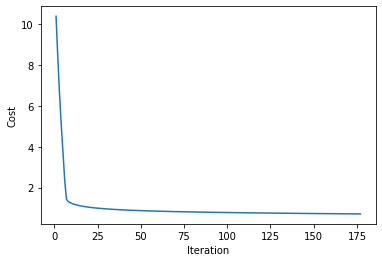

[[-2.93399693e-06 -2.08090155e-06  1.38725794e-05 -7.83813231e-06
  -1.45442132e-05  4.68160083e-05 -1.68468277e-06 -3.14514891e-05
   5.03575527e-05 -3.90911542e-06  4.91678350e-06  7.96843076e-06]
 [-1.58953127e-05  2.94226714e-05  1.90610178e-05 -6.07617494e-05
   1.35315201e-04  4.47079401e-05  2.58696534e-06 -1.42495885e-05
   7.54288765e-06  1.77806659e-05 -4.42703555e-05  3.56952904e-06]
 [ 7.86301533e-05  4.72839363e-05 -1.32259918e-04  1.40935583e-06
  -4.11779993e-06  6.40801314e-08  2.16059267e-06  2.78284375e-06
  -7.78632504e-06  2.69353309e-06  2.49122061e-05 -2.70557390e-05]]
[[-4.20600892e-05  2.43845335e-06  1.64907777e-04]]


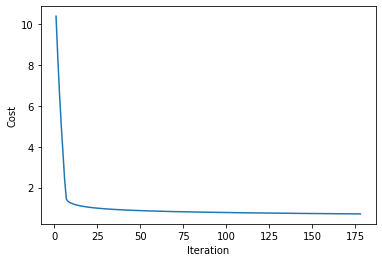

[[-2.92611864e-06 -2.09105056e-06  1.38401706e-05 -7.81609195e-06
  -1.45650021e-05  4.66928539e-05 -1.67508747e-06 -3.13638463e-05
   5.00513350e-05 -3.89914923e-06  4.89945567e-06  7.94893168e-06]
 [-1.58546611e-05  2.93438622e-05  1.90091298e-05 -6.06043867e-05
   1.34988828e-04  4.45676311e-05  2.58128931e-06 -1.42471920e-05
   7.53668533e-06  1.77373425e-05 -4.42612295e-05  3.63295528e-06]
 [ 7.84260051e-05  4.71912417e-05 -1.31561702e-04  1.40637466e-06
  -4.11753671e-06  6.58897847e-08  2.15564050e-06  2.77746211e-06
  -7.76881431e-06  2.68696391e-06  2.48891894e-05 -2.70024511e-05]]
[[-4.19507469e-05  2.28967821e-06  1.64535246e-04]]


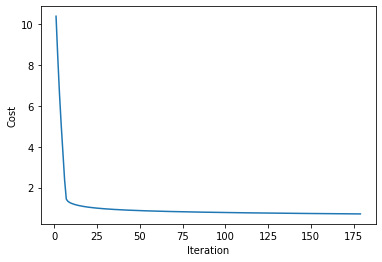

[[-2.91828380e-06 -2.10113647e-06  1.38080571e-05 -7.79417586e-06
  -1.45856184e-05  4.65708343e-05 -1.66555972e-06 -3.12763225e-05
   4.97481942e-05 -3.88923672e-06  4.88221185e-06  7.92962254e-06]
 [-1.58142293e-05  2.92654178e-05  1.89577851e-05 -6.04478824e-05
   1.34663947e-04  4.44289162e-05  2.57564201e-06 -1.42448012e-05
   7.53050626e-06  1.76942492e-05 -4.42521954e-05  3.69563587e-06]
 [ 7.82229726e-05  4.70983072e-05 -1.30870487e-04  1.40340852e-06
  -4.11727488e-06  6.76704179e-08  2.15071445e-06  2.77209247e-06
  -7.75147759e-06  2.68043068e-06  2.48662362e-05 -2.69496582e-05]]
[[-4.18419986e-05  2.14174453e-06  1.64166124e-04]]


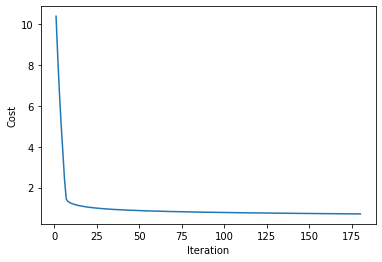

[[-2.91049208e-06 -2.11116042e-06  1.37762345e-05 -7.77238300e-06
  -1.46060662e-05  4.64499323e-05 -1.65609887e-06 -3.11889257e-05
   4.94480834e-05 -3.87937746e-06  4.86505096e-06  7.91050033e-06]
 [-1.57740154e-05  2.91873340e-05  1.89069745e-05 -6.02922292e-05
   1.34340539e-04  4.42917676e-05  2.57002322e-06 -1.42424162e-05
   7.52435033e-06  1.76513842e-05 -4.42432500e-05  3.75758307e-06]
 [ 7.80210465e-05  4.70051553e-05 -1.30186164e-04  1.40045729e-06
  -4.11701432e-06  6.94225474e-08  2.14581432e-06  2.76673518e-06
  -7.73431224e-06  2.67393310e-06  2.48433473e-05 -2.68973532e-05]]
[[-4.17338397e-05  1.99463855e-06  1.63800359e-04]]


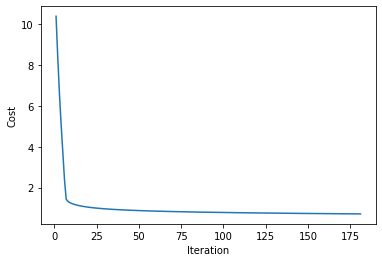

[[-2.90274311e-06 -2.12112351e-06  1.37446984e-05 -7.75071236e-06
  -1.46263494e-05  4.63301314e-05 -1.64670429e-06 -3.11016630e-05
   4.91509563e-05 -3.86957102e-06  4.84797191e-06  7.89156210e-06]
 [-1.57340177e-05  2.91096066e-05  1.88566892e-05 -6.01374202e-05
   1.34018590e-04  4.41561578e-05  2.56443271e-06 -1.42400367e-05
   7.51821745e-06  1.76087455e-05 -4.42343902e-05  3.81880891e-06]
 [ 7.78202178e-05  4.69118079e-05 -1.29508627e-04  1.39752086e-06
  -4.11675490e-06  7.11466782e-08  2.14093989e-06  2.76139059e-06
  -7.71731567e-06  2.66747088e-06  2.48205233e-05 -2.68455289e-05]]
[[-4.16262653e-05  1.84834694e-06  1.63437901e-04]]


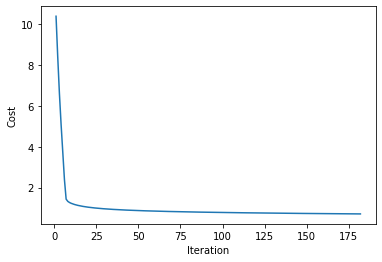

[[-2.89503655e-06 -2.13102681e-06  1.37134445e-05 -7.72916291e-06
  -1.46464716e-05  4.62114152e-05 -1.63737535e-06 -3.10145416e-05
   4.88567676e-05 -3.85981697e-06  4.83097366e-06  7.87280497e-06]
 [-1.56942344e-05  2.90322315e-05  1.88069206e-05 -5.99834484e-05
   1.33698084e-04  4.40220601e-05  2.55887026e-06 -1.42376626e-05
   7.51210751e-06  1.75663313e-05 -4.42256129e-05  3.87932512e-06]
 [ 7.76204774e-05  4.68182856e-05 -1.28837774e-04  1.39459911e-06
  -4.11649652e-06  7.28433043e-08  2.13609095e-06  2.75605902e-06
  -7.70048535e-06  2.66104372e-06  2.47977648e-05 -2.67941784e-05]]
[[-4.15192706e-05  1.70285679e-06  1.63078700e-04]]


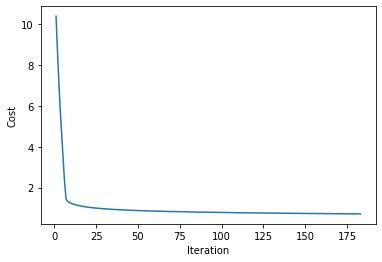

[[-2.88737204e-06 -2.14087134e-06  1.36824688e-05 -7.70773366e-06
  -1.46664364e-05  4.60937676e-05 -1.62811142e-06 -3.09275681e-05
   4.85654731e-05 -3.85011488e-06  4.81405520e-06  7.85422612e-06]
 [-1.56546638e-05  2.89552047e-05  1.87576601e-05 -5.98303070e-05
   1.33379004e-04  4.38894485e-05  2.55333565e-06 -1.42352938e-05
   7.50602041e-06  1.75241399e-05 -4.42169151e-05  3.93914323e-06]
 [ 7.74218165e-05  4.67246084e-05 -1.28173503e-04  1.39169193e-06
  -4.11623907e-06  7.45129087e-08  2.13126730e-06  2.75074079e-06
  -7.68381881e-06  2.65465134e-06  2.47750723e-05 -2.67432949e-05]]
[[-4.14128510e-05  1.55815562e-06  1.62722709e-04]]


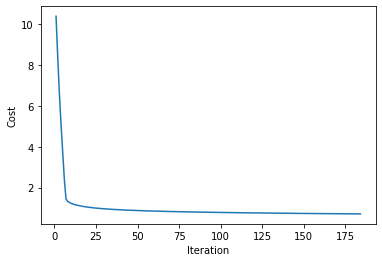

[[-2.87974925e-06 -2.15065811e-06  1.36517671e-05 -7.68642361e-06
  -1.46862474e-05  4.59771730e-05 -1.61891189e-06 -3.08407489e-05
   4.82770293e-05 -3.84046434e-06  4.79721553e-06  7.83582279e-06]
 [-1.56153042e-05  2.88785222e-05  1.87088996e-05 -5.96779893e-05
   1.33061336e-04  4.37582973e-05  2.54782867e-06 -1.42329301e-05
   7.49995606e-06  1.74821694e-05 -4.42082942e-05  3.99827447e-06]
 [ 7.72242262e-05  4.66307956e-05 -1.27515714e-04  1.38879920e-06
  -4.11598244e-06  7.61559639e-08  2.12646874e-06  2.74543618e-06
  -7.66731361e-06  2.64829345e-06  2.47524464e-05 -2.66928716e-05]]
[[-4.13070019e-05  1.41423132e-06  1.62369880e-04]]


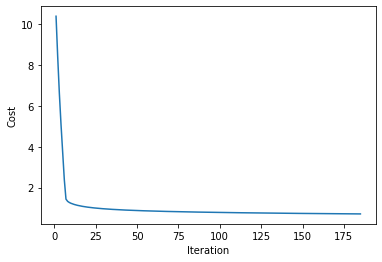

[[-2.87216784e-06 -2.16038809e-06  1.36213354e-05 -7.66523178e-06
  -1.47059079e-05  4.58616160e-05 -1.60977615e-06 -3.07540901e-05
   4.79913937e-05 -3.83086494e-06  4.78045371e-06  7.81759228e-06]
 [-1.55761539e-05  2.88021804e-05  1.86606308e-05 -5.95264886e-05
   1.32745066e-04  4.36285817e-05  2.54234909e-06 -1.42305715e-05
   7.49391435e-06  1.74404182e-05 -4.41997472e-05  4.05672988e-06]
 [ 7.70276979e-05  4.65368653e-05 -1.26864311e-04  1.38592080e-06
  -4.11572653e-06  7.77729321e-08  2.12169507e-06  2.74014547e-06
  -7.65096737e-06  2.64196976e-06  2.47298876e-05 -2.66429021e-05]]
[[-4.12017187e-05  1.27107216e-06  1.62020167e-04]]


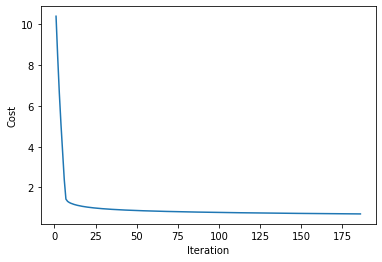

[[-2.86462747e-06 -2.17006219e-06  1.35911698e-05 -7.64415719e-06
  -1.47254210e-05  4.57470815e-05 -1.60070360e-06 -3.06675975e-05
   4.77085246e-05 -3.82131626e-06  4.76376879e-06  7.79953193e-06]
 [-1.55372111e-05  2.87261756e-05  1.86128459e-05 -5.93757981e-05
   1.32430180e-04  4.35002772e-05  2.53689671e-06 -1.42282179e-05
   7.48789518e-06  1.73988843e-05 -4.41912717e-05  4.11452024e-06]
 [ 7.68322229e-05  4.64428353e-05 -1.26219198e-04  1.38305663e-06
  -4.11547125e-06  7.93642657e-08  2.11694608e-06  2.73486894e-06
  -7.63477776e-06  2.63567999e-06  2.47073962e-05 -2.65933798e-05]]
[[-4.10969968e-05  1.12866680e-06  1.61673523e-04]]


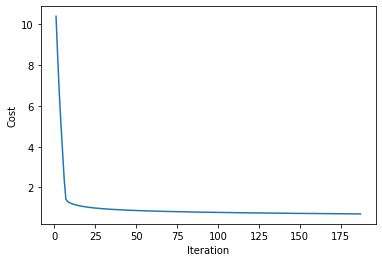

[[-2.85712781e-06 -2.17968133e-06  1.35612664e-05 -7.62319890e-06
  -1.47447900e-05  4.56335548e-05 -1.59169366e-06 -3.05812766e-05
   4.74283812e-05 -3.81181790e-06  4.74715987e-06  7.78163916e-06]
 [-1.54984743e-05  2.86505041e-05  1.85655371e-05 -5.92259114e-05
   1.32116662e-04  4.33733600e-05  2.53147131e-06 -1.42258691e-05
   7.48189844e-06  1.73575662e-05 -4.41828651e-05  4.17165612e-06]
 [ 7.66377927e-05  4.63487223e-05 -1.25580281e-04  1.38020658e-06
  -4.11521651e-06  8.09304071e-08  2.11222157e-06  2.72960682e-06
  -7.61874248e-06  2.62942386e-06  2.46849727e-05 -2.65442985e-05]]
[[-4.09928318e-05  9.87004215e-07  1.61329906e-04]]


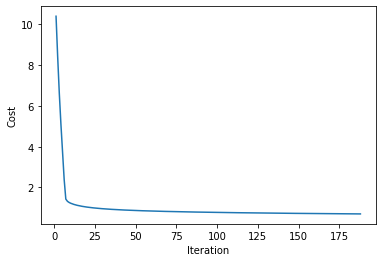

[[-2.84966854e-06 -2.18924639e-06  1.35316216e-05 -7.60235594e-06
  -1.47640178e-05  4.55210214e-05 -1.58274573e-06 -3.04951327e-05
   4.71509234e-05 -3.80236946e-06  4.73062608e-06  7.76391143e-06]
 [-1.54599417e-05  2.85751625e-05  1.85186968e-05 -5.90768221e-05
   1.31804500e-04  4.32478067e-05  2.52607269e-06 -1.42235249e-05
   7.47592402e-06  1.73164621e-05 -4.41745250e-05  4.22814785e-06]
 [ 7.64443988e-05  4.62545425e-05 -1.24947470e-04  1.37737054e-06
  -4.11496221e-06  8.24717894e-08  2.10752137e-06  2.72435935e-06
  -7.60285929e-06  2.62320110e-06  2.46626175e-05 -2.64956519e-05]]
[[-4.08892192e-05  8.46073745e-07  1.60989271e-04]]


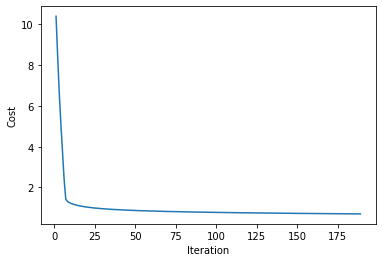

[[-2.84224933e-06 -2.19875820e-06  1.35022315e-05 -7.58162739e-06
  -1.47831074e-05  4.54094671e-05 -1.57385924e-06 -3.04091706e-05
   4.68761120e-05 -3.79297055e-06  4.71416654e-06  7.74634625e-06]
 [-1.54216118e-05  2.85001473e-05  1.84723175e-05 -5.89285236e-05
   1.31493680e-04  4.31235946e-05  2.52070064e-06 -1.42211854e-05
   7.46997183e-06  1.72755703e-05 -4.41662491e-05  4.28400558e-06]
 [ 7.62520330e-05  4.61603115e-05 -1.24320674e-04  1.37454840e-06
  -4.11470827e-06  8.39888365e-08  2.10284526e-06  2.71912675e-06
  -7.58712599e-06  2.61701145e-06  2.46403310e-05 -2.64474340e-05]]
[[-4.07861546e-05  7.05865043e-07  1.60651576e-04]]


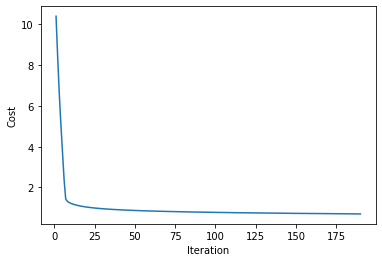

[[-2.83486986e-06 -2.20821760e-06  1.34730926e-05 -7.56101230e-06
  -1.48020615e-05  4.52988780e-05 -1.56503361e-06 -3.03233953e-05
   4.66039084e-05 -3.78362077e-06  4.69778043e-06  7.72894119e-06]
 [-1.53834829e-05  2.84254553e-05  1.84263921e-05 -5.87810096e-05
   1.31184190e-04  4.30007013e-05  2.51535495e-06 -1.42188505e-05
   7.46404176e-06  1.72348891e-05 -4.41580351e-05  4.33923921e-06]
 [ 7.60606870e-05  4.60660440e-05 -1.23699806e-04  1.37174005e-06
  -4.11445462e-06  8.54819631e-08  2.09819306e-06  2.71390923e-06
  -7.57154041e-06  2.61085462e-06  2.46181134e-05 -2.63996389e-05]]
[[-4.06836338e-05  5.66368079e-07  1.60316777e-04]]


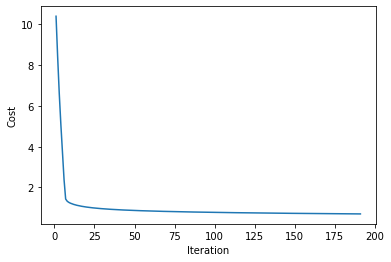

[[-2.82752981e-06 -2.21762537e-06  1.34442014e-05 -7.54050976e-06
  -1.48208828e-05  4.51892404e-05 -1.55626829e-06 -3.02378110e-05
   4.63342751e-05 -3.77431973e-06  4.68146694e-06  7.71169385e-06]
 [-1.53455535e-05  2.83510832e-05  1.83809133e-05 -5.86342739e-05
   1.30876017e-04  4.28791050e-05  2.51003543e-06 -1.42165199e-05
   7.45813369e-06  1.71944169e-05 -4.41498809e-05  4.39385847e-06]
 [ 7.58703525e-05  4.59717543e-05 -1.23084779e-04  1.36894539e-06
  -4.11420117e-06  8.69515753e-08  2.09356459e-06  2.70870699e-06
  -7.55610046e-06  2.60473035e-06  2.45959651e-05 -2.63522606e-05]]
[[-4.05816523e-05  4.27573124e-07  1.59984835e-04]]


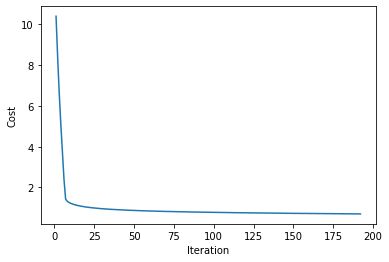

[[-2.82022886e-06 -2.22698228e-06  1.34155543e-05 -7.52011887e-06
  -1.48395740e-05  4.50805410e-05 -1.54756271e-06 -3.01524222e-05
   4.60671749e-05 -3.76506705e-06  4.66522527e-06  7.69460190e-06]
 [-1.53078219e-05  2.82770277e-05  1.83358742e-05 -5.84883102e-05
   1.30569147e-04  4.27587843e-05  2.50474188e-06 -1.42141937e-05
   7.45224754e-06  1.71541521e-05 -4.41417844e-05  4.44787289e-06]
 [ 7.56810217e-05  4.58774561e-05 -1.22475509e-04  1.36616432e-06
  -4.11394786e-06  8.83980707e-08  2.08895965e-06  2.70352022e-06
  -7.54080404e-06  2.59863838e-06  2.45738863e-05 -2.63052935e-05]]
[[-4.0480206e-05  2.8947074e-07  1.5965571e-04]]


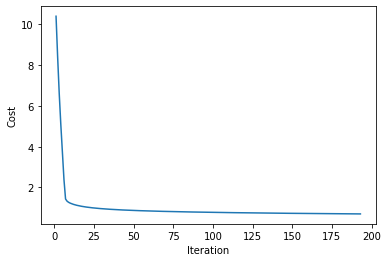

[[-2.81296672e-06 -2.23628909e-06  1.33871480e-05 -7.49983871e-06
  -1.48581376e-05  4.49727666e-05 -1.53891632e-06 -3.00672329e-05
   4.58025716e-05 -3.75586235e-06  4.64905465e-06  7.67766305e-06]
 [-1.52702866e-05  2.82032859e-05  1.82912680e-05 -5.83431125e-05
   1.30263571e-04  4.26397184e-05  2.49947409e-06 -1.42118717e-05
   7.44638317e-06  1.71140930e-05 -4.41337436e-05  4.50129178e-06]
 [ 7.54926863e-05  4.57831623e-05 -1.21871913e-04  1.36339672e-06
  -4.11369461e-06  8.98218385e-08  2.08437806e-06  2.69834909e-06
  -7.52564913e-06  2.59257845e-06  2.45518772e-05 -2.62587319e-05]]
[[-4.03792906e-05  1.52051770e-07  1.59329360e-04]]


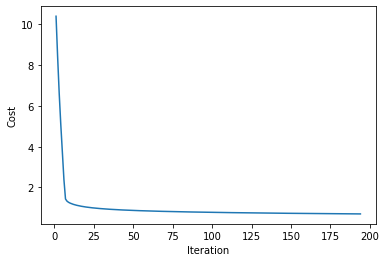

[[-2.80574306e-06 -2.24554651e-06  1.33589790e-05 -7.47966841e-06
  -1.48765761e-05  4.48659044e-05 -1.53032859e-06 -2.99822468e-05
   4.55404297e-05 -3.74670526e-06  4.63295433e-06  7.66087505e-06]
 [-1.52329461e-05  2.81298547e-05  1.82470879e-05 -5.81986746e-05
   1.29959274e-04  4.25218867e-05  2.49423187e-06 -1.42095538e-05
   7.44054050e-06  1.70742379e-05 -4.41257566e-05  4.55412428e-06]
 [ 7.53053386e-05  4.56888854e-05 -1.21273910e-04  1.36064251e-06
  -4.11344135e-06  9.12232597e-08  2.07981964e-06  2.69319376e-06
  -7.51063372e-06  2.58655031e-06  2.45299382e-05 -2.62125703e-05]]
[[-4.02789020e-05  1.53073238e-08  1.59005749e-04]]


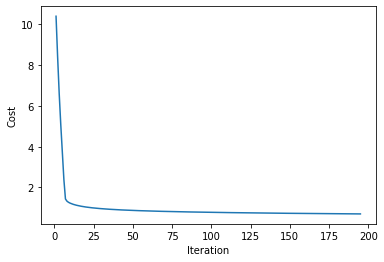

[[-2.79855759e-06 -2.25475525e-06  1.33310442e-05 -7.45960707e-06
  -1.48948918e-05  4.47599417e-05 -1.52179896e-06 -2.98974677e-05
   4.52807143e-05 -3.73759540e-06  4.61692358e-06  7.64423571e-06]
 [-1.51957988e-05  2.80567311e-05  1.82033274e-05 -5.80549905e-05
   1.29656246e-04  4.24052693e-05  2.48901503e-06 -1.42072400e-05
   7.43471942e-06  1.70345854e-05 -4.41178215e-05  4.60637936e-06]
 [ 7.51189708e-05  4.55946375e-05 -1.20681420e-04  1.35790157e-06
  -4.11318802e-06  9.26027076e-08  2.07528421e-06  2.68805439e-06
  -7.49575586e-06  2.58055369e-06  2.45080693e-05 -2.61668032e-05]]
[[-4.01790360e-05 -1.20771225e-07  1.58684837e-04]]


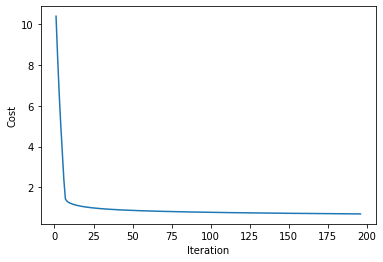

[[-2.79141001e-06 -2.26391599e-06  1.33033402e-05 -7.43965384e-06
  -1.49130870e-05  4.46548662e-05 -1.51332692e-06 -2.98128989e-05
   4.50233911e-05 -3.72853240e-06  4.60096168e-06  7.62774285e-06]
 [-1.51588431e-05  2.79839123e-05  1.81599802e-05 -5.79120543e-05
   1.29354476e-04  4.22898465e-05  2.48382337e-06 -1.42049302e-05
   7.42891980e-06  1.69951339e-05 -4.41099365e-05  4.65806578e-06]
 [ 7.49335750e-05  4.55004300e-05 -1.20094365e-04  1.35517380e-06
  -4.11293456e-06  9.39605477e-08  2.07077159e-06  2.68293111e-06
  -7.48101362e-06  2.57458835e-06  2.44862708e-05 -2.61214254e-05]]
[[-4.00796886e-05 -2.56192255e-07  1.58366588e-04]]


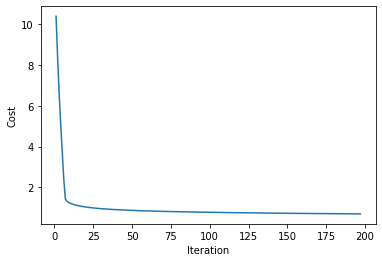

[[-2.78430001e-06 -2.27302938e-06  1.32758640e-05 -7.41980783e-06
  -1.49311639e-05  4.45506658e-05 -1.50491193e-06 -2.97285438e-05
   4.47684265e-05 -3.71951590e-06  4.58506794e-06  7.61139437e-06]
 [-1.51220778e-05  2.79113954e-05  1.81170398e-05 -5.77698601e-05
   1.29053952e-04  4.21755993e-05  2.47865671e-06 -1.42026243e-05
   7.42314156e-06  1.69558817e-05 -4.41020999e-05  4.70919215e-06]
 [ 7.47491436e-05  4.54062739e-05 -1.19512668e-04  1.35245912e-06
  -4.11268091e-06  9.52971379e-08  2.06628160e-06  2.67782408e-06
  -7.46640512e-06  2.56865403e-06  2.44645427e-05 -2.60764317e-05]]
[[-3.99808558e-05 -3.90963902e-07  1.58050964e-04]]


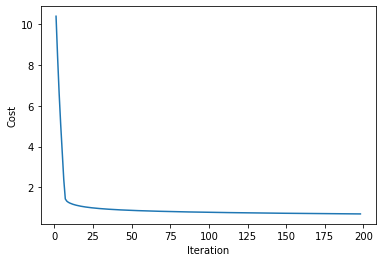

[[-2.77722731e-06 -2.28209607e-06  1.32486124e-05 -7.40006821e-06
  -1.49491247e-05  4.44473284e-05 -1.49655348e-06 -2.96444053e-05
   4.45157877e-05 -3.71054554e-06  4.56924169e-06  7.59518820e-06]
 [-1.50855011e-05  2.78391778e-05  1.80745002e-05 -5.76284020e-05
   1.28754664e-04  4.20625087e-05  2.47351486e-06 -1.42003222e-05
   7.41738458e-06  1.69168274e-05 -4.40943101e-05  4.75976690e-06]
 [ 7.45656691e-05  4.53121796e-05 -1.18936255e-04  1.34975741e-06
  -4.11242701e-06  9.66128290e-08  2.06181406e-06  2.67273340e-06
  -7.45192850e-06  2.56275049e-06  2.44428853e-05 -2.60318168e-05]]
[[-3.98825334e-05 -5.25094069e-07  1.57737931e-04]]


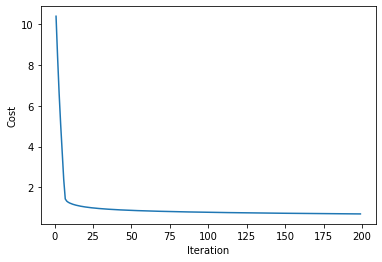

[[-2.77019161e-06 -2.29111667e-06  1.32215824e-05 -7.38043413e-06
  -1.49669714e-05  4.43448424e-05 -1.48825105e-06 -2.95604865e-05
   4.42654423e-05 -3.70162097e-06  4.55348225e-06  7.57912229e-06]
 [-1.50491117e-05  2.77672566e-05  1.80323554e-05 -5.74876743e-05
   1.28456601e-04  4.19505565e-05  2.46839763e-06 -1.41980239e-05
   7.41164874e-06  1.68779695e-05 -4.40865654e-05  4.80979830e-06]
 [ 7.43831440e-05  4.52181573e-05 -1.18365051e-04  1.34706858e-06
  -4.11217281e-06  9.79079643e-08  2.05736881e-06  2.66765920e-06
  -7.43758195e-06  2.55687750e-06  2.44212987e-05 -2.59875757e-05]]
[[-3.97847177e-05 -6.58590436e-07  1.57427452e-04]]


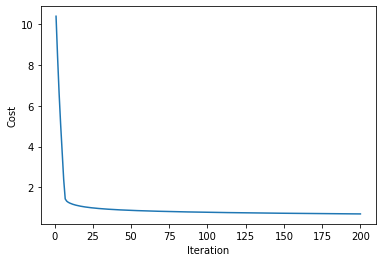

[[-2.76319262e-06 -2.30009180e-06  1.31947710e-05 -7.36090475e-06
  -1.49847059e-05  4.42431964e-05 -1.48000414e-06 -2.94767900e-05
   4.40173586e-05 -3.69274182e-06  4.53778898e-06  7.56319466e-06]
 [-1.50129081e-05  2.76956293e-05  1.79905993e-05 -5.73476713e-05
   1.28159752e-04  4.18397246e-05  2.46330483e-06 -1.41957292e-05
   7.40593395e-06  1.68393063e-05 -4.40788644e-05  4.85929445e-06]
 [ 7.42015607e-05  4.51242165e-05 -1.17798984e-04  1.34439254e-06
  -4.11191826e-06  9.91828805e-08  2.05294567e-06  2.66260159e-06
  -7.42336368e-06  2.55103479e-06  2.43997829e-05 -2.59437036e-05]]
[[-3.96874047e-05 -7.91460467e-07  1.57119493e-04]]


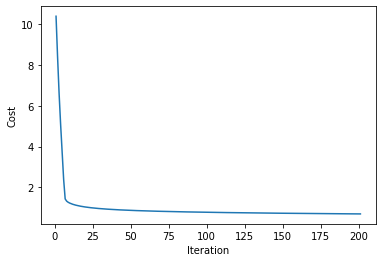

[[-2.75623005e-06 -2.30902203e-06  1.31681752e-05 -7.34147925e-06
  -1.50023303e-05  4.41423789e-05 -1.47181224e-06 -2.93933185e-05
   4.37715054e-05 -3.68390776e-06  4.52216125e-06  7.54740335e-06]
 [-1.49768889e-05  2.76242934e-05  1.79492263e-05 -5.72083874e-05
   1.27864108e-04  4.17299954e-05  2.45823630e-06 -1.41934382e-05
   7.40024010e-06  1.68008365e-05 -4.40712055e-05  4.90826330e-06]
 [ 7.40209121e-05  4.50303664e-05 -1.17237983e-04  1.34172919e-06
  -4.11166330e-06  1.00437907e-07  2.04854447e-06  2.65756067e-06
  -7.40927195e-06  2.54522214e-06  2.43783380e-05 -2.59001955e-05]]
[[-3.95905904e-05 -9.23711416e-07  1.56814020e-04]]


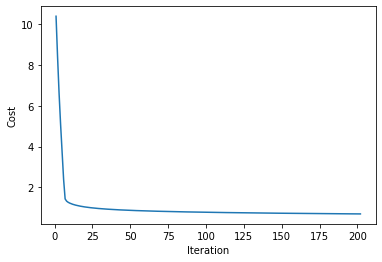

[[-2.74930363e-06 -2.31790793e-06  1.31417923e-05 -7.32215681e-06
  -1.50198465e-05  4.40423791e-05 -1.46367487e-06 -2.93100743e-05
   4.35278523e-05 -3.67511843e-06  4.50659845e-06  7.53174644e-06]
 [-1.49410526e-05  2.75532462e-05  1.79082305e-05 -5.70698169e-05
   1.27569657e-04  4.16213516e-05  2.45319183e-06 -1.41911506e-05
   7.39456708e-06  1.67625586e-05 -4.40635873e-05  4.95671264e-06]
 [ 7.38411908e-05  4.49366159e-05 -1.16681979e-04  1.33907843e-06
  -4.11140790e-06  1.01673368e-07  2.04416504e-06  2.65253652e-06
  -7.39530504e-06  2.53943932e-06  2.43569640e-05 -2.58570467e-05]]
[[-3.94942711e-05 -1.05535034e-06  1.56511000e-04]]


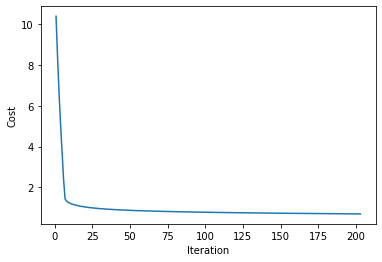

[[-2.74241307e-06 -2.32675005e-06  1.31156193e-05 -7.30293661e-06
  -1.50372561e-05  4.39431860e-05 -1.45559152e-06 -2.92270597e-05
   4.32863692e-05 -3.66637349e-06  4.49109997e-06  7.51622204e-06]
 [-1.49053979e-05  2.74824853e-05  1.78676066e-05 -5.69319544e-05
   1.27276392e-04  4.15137763e-05  2.44817127e-06 -1.41888666e-05
   7.38891477e-06  1.67244710e-05 -4.40560085e-05  5.00465010e-06]
 [ 7.36623896e-05  4.48429732e-05 -1.16130902e-04  1.33644018e-06
  -4.11115200e-06  1.02889579e-07  2.03980722e-06  2.64752925e-06
  -7.38146125e-06  2.53368607e-06  2.43356611e-05 -2.58142525e-05]]
[[-3.93984430e-05 -1.18638409e-06  1.56210401e-04]]


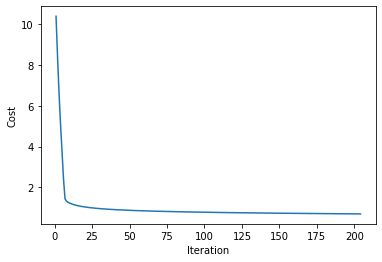

[[-2.73555810e-06 -2.33554893e-06  1.30896536e-05 -7.28381787e-06
  -1.50545610e-05  4.38447890e-05 -1.44756172e-06 -2.91442769e-05
   4.30470267e-05 -3.65767261e-06  4.47566523e-06  7.50082832e-06]
 [-1.48699233e-05  2.74120084e-05  1.78273490e-05 -5.67947943e-05
   1.26984301e-04  4.14072530e-05  2.44317442e-06 -1.41865860e-05
   7.38328308e-06  1.66865724e-05 -4.40484676e-05  5.05208318e-06]
 [ 7.34845015e-05  4.47494466e-05 -1.15584687e-04  1.33381434e-06
  -4.11089557e-06  1.04086850e-07  2.03547085e-06  2.64253891e-06
  -7.36773893e-06  2.52796219e-06  2.43144292e-05 -2.57718082e-05]]
[[-3.93031024e-05 -1.31681935e-06  1.55912190e-04]]


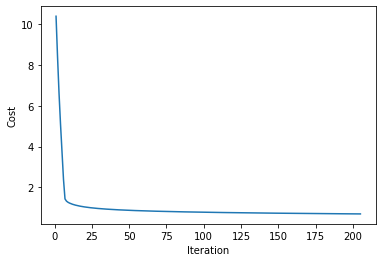

[[-2.72873845e-06 -2.34430509e-06  1.30638923e-05 -7.26479977e-06
  -1.50717628e-05  4.37471775e-05 -1.43958499e-06 -2.90617278e-05
   4.28097960e-05 -3.64901544e-06  4.46029366e-06  7.48556347e-06]
 [-1.48346275e-05  2.73418129e-05  1.77874523e-05 -5.66583312e-05
   1.26693376e-04  4.13017654e-05  2.43820112e-06 -1.41843087e-05
   7.37767189e-06  1.66488613e-05 -4.40409636e-05  5.09901924e-06]
 [ 7.33075193e-05  4.46560435e-05 -1.15043266e-04  1.33120081e-06
  -4.11063856e-06  1.05265486e-07  2.03115575e-06  2.63756560e-06
  -7.35413646e-06  2.52226743e-06  2.42932683e-05 -2.57297094e-05]]
[[-3.92082454e-05 -1.44666262e-06  1.55616335e-04]]


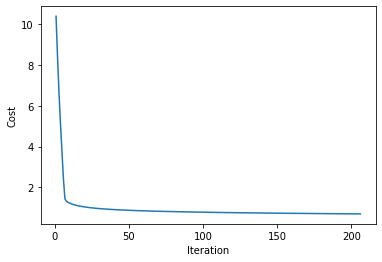

[[-2.72195383e-06 -2.35301903e-06  1.30383328e-05 -7.24588155e-06
  -1.50888632e-05  4.36503414e-05 -1.43166086e-06 -2.89794144e-05
   4.25746485e-05 -3.64040166e-06  4.44498469e-06  7.47042569e-06]
 [-1.47995092e-05  2.72718967e-05  1.77479113e-05 -5.65225599e-05
   1.26403607e-04  4.11972976e-05  2.43325118e-06 -1.41820347e-05
   7.37208110e-06  1.66113363e-05 -4.40334950e-05  5.14546548e-06]
 [ 7.31314361e-05  4.45627715e-05 -1.14506575e-04  1.32859952e-06
  -4.11038094e-06  1.06425786e-07  2.02686177e-06  2.63260936e-06
  -7.34065224e-06  2.51660156e-06  2.42721785e-05 -2.56879517e-05]]
[[-3.91138685e-05 -1.57592020e-06  1.55322806e-04]]


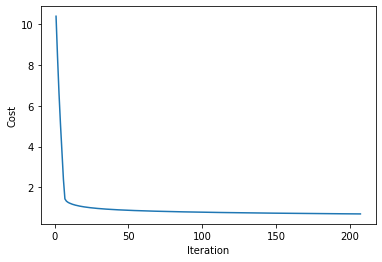

[[-2.71520399e-06 -2.36169124e-06  1.30129725e-05 -7.22706242e-06
  -1.51058638e-05  4.35542704e-05 -1.42378886e-06 -2.88973385e-05
   4.23415566e-05 -3.63183094e-06  4.42973777e-06  7.45541326e-06]
 [-1.47645668e-05  2.72022575e-05  1.77087209e-05 -5.63874749e-05
   1.26114986e-04  4.10938341e-05  2.42832445e-06 -1.41797640e-05
   7.36651060e-06  1.65739960e-05 -4.40260608e-05  5.19142897e-06]
 [ 7.29562450e-05  4.44696374e-05 -1.13974551e-04  1.32601036e-06
  -4.11012266e-06  1.07568040e-07  2.02258876e-06  2.62767027e-06
  -7.32728469e-06  2.51096438e-06  2.42511597e-05 -2.56465306e-05]]
[[-3.90199679e-05 -1.70459826e-06  1.55031572e-04]]


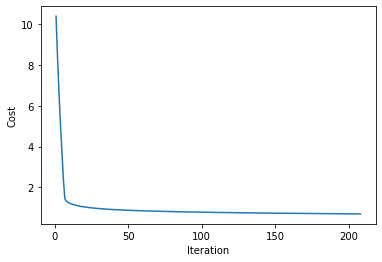

[[-2.70848865e-06 -2.37032221e-06  1.29878087e-05 -7.20834162e-06
  -1.51227662e-05  4.34589548e-05 -1.41596853e-06 -2.88155016e-05
   4.21104928e-05 -3.62330295e-06  4.41455237e-06  7.44052446e-06]
 [-1.47297993e-05  2.71328930e-05  1.76698760e-05 -5.62530711e-05
   1.25827502e-04  4.09913595e-05  2.42342075e-06 -1.41774964e-05
   7.36096028e-06  1.65368390e-05 -4.40186598e-05  5.23691666e-06]
 [ 7.27819392e-05  4.43766480e-05 -1.13447131e-04  1.32343325e-06
  -4.10986369e-06  1.08692537e-07  2.01833654e-06  2.62274837e-06
  -7.31403228e-06  2.50535564e-06  2.42302119e-05 -2.56054418e-05]]
[[-3.89265402e-05 -1.83270278e-06  1.54742603e-04]]


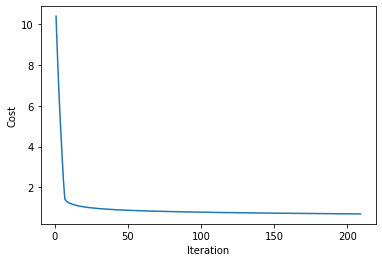

[[-2.70180756e-06 -2.37891240e-06  1.29628391e-05 -7.18971838e-06
  -1.51395717e-05  4.33643848e-05 -1.40819940e-06 -2.87339052e-05
   4.18814302e-05 -3.61481737e-06  4.39942796e-06  7.42575761e-06]
 [-1.46952051e-05  2.70638010e-05  1.76313716e-05 -5.61193432e-05
   1.25541149e-04  4.08898590e-05  2.41853991e-06 -1.41752320e-05
   7.35543004e-06  1.64998639e-05 -4.40112909e-05  5.28193536e-06]
 [ 7.26085119e-05  4.42838096e-05 -1.12924255e-04  1.32086810e-06
  -4.10960400e-06  1.09799556e-07  2.01410497e-06  2.61784372e-06
  -7.30089349e-06  2.49977515e-06  2.42093350e-05 -2.55646812e-05]]
[[-3.88335816e-05 -1.96023961e-06  1.54455871e-04]]


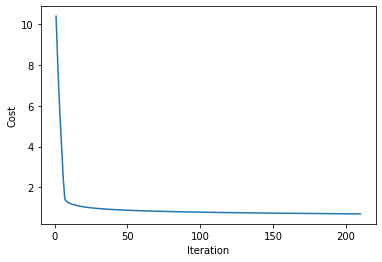

[[-2.69516046e-06 -2.38746226e-06  1.29380610e-05 -7.17119196e-06
  -1.51562818e-05  4.32705507e-05 -1.40048104e-06 -2.86525509e-05
   4.16543426e-05 -3.60637388e-06  4.38436403e-06  7.41111105e-06]
 [-1.46607830e-05  2.69949795e-05  1.75932030e-05 -5.59862860e-05
   1.25255916e-04  4.07893177e-05  2.41368177e-06 -1.41729706e-05
   7.34991976e-06  1.64630694e-05 -4.40039530e-05  5.32649174e-06]
 [ 7.24359565e-05  4.41911283e-05 -1.12405861e-04  1.31831482e-06
  -4.10934356e-06  1.10889373e-07  2.00989389e-06  2.61295635e-06
  -7.28786684e-06  2.49422266e-06  2.41885290e-05 -2.55242447e-05]]
[[-3.87410888e-05 -2.08721442e-06  1.54171346e-04]]


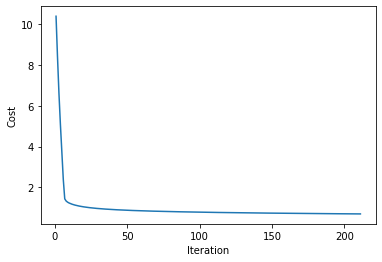

[[-2.68854708e-06 -2.39597222e-06  1.29134721e-05 -7.15276160e-06
  -1.51728980e-05  4.31774433e-05 -1.39281299e-06 -2.85714398e-05
   4.14292039e-05 -3.59797216e-06  4.36936008e-06  7.39658319e-06]
 [-1.46265317e-05  2.69264262e-05  1.75553654e-05 -5.58538946e-05
   1.24971796e-04  4.06897214e-05  2.40884616e-06 -1.41707122e-05
   7.34442935e-06  1.64264541e-05 -4.39966452e-05  5.37059237e-06]
 [ 7.22642662e-05  4.40986100e-05 -1.11891891e-04  1.31577334e-06
  -4.10908234e-06  1.11962259e-07  2.00570314e-06  2.60808630e-06
  -7.27495086e-06  2.48869798e-06  2.41677938e-05 -2.54841280e-05]]
[[-3.86490581e-05 -2.21363276e-06  1.53889000e-04]]


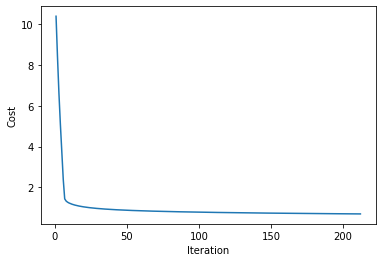

[[-2.68196717e-06 -2.40444272e-06  1.28890699e-05 -7.13442657e-06
  -1.51894216e-05  4.30850532e-05 -1.38519481e-06 -2.84905732e-05
   4.12059887e-05 -3.58961191e-06  4.35441562e-06  7.38217241e-06]
 [-1.45924499e-05  2.68581392e-05  1.75178540e-05 -5.57221639e-05
   1.24688781e-04  4.05910560e-05  2.40403291e-06 -1.41684568e-05
   7.33895869e-06  1.63900167e-05 -4.39893664e-05  5.41424367e-06]
 [ 7.20934346e-05  4.40062601e-05 -1.11382287e-04  1.31324355e-06
  -4.10882030e-06  1.13018479e-07  2.00153258e-06  2.60323361e-06
  -7.26214412e-06  2.48320089e-06  2.41471294e-05 -2.54443273e-05]]
[[-3.85574862e-05 -2.33950003e-06  1.53608805e-04]]


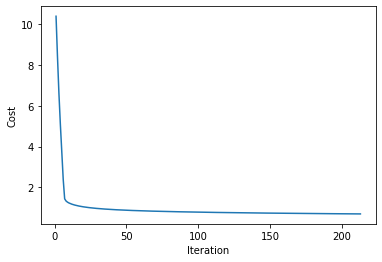

[[-2.67542048e-06 -2.41287418e-06  1.28648521e-05 -7.11618614e-06
  -1.52058539e-05  4.29933714e-05 -1.37762606e-06 -2.84099522e-05
   4.09846721e-05 -3.58129282e-06  4.33953016e-06  7.36787717e-06]
 [-1.45585364e-05  2.67901165e-05  1.74806644e-05 -5.55910888e-05
   1.24406862e-04  4.04933076e-05  2.39924187e-06 -1.41662044e-05
   7.33350768e-06  1.63537559e-05 -4.39821157e-05  5.45745198e-06]
 [ 7.19234552e-05  4.39140840e-05 -1.10876991e-04  1.31072539e-06
  -4.10855742e-06  1.14058291e-07  1.99738205e-06  2.59839830e-06
  -7.24944522e-06  2.47773118e-06  2.41265356e-05 -2.54048385e-05]]
[[-3.84663695e-05 -2.46482149e-06  1.53330735e-04]]


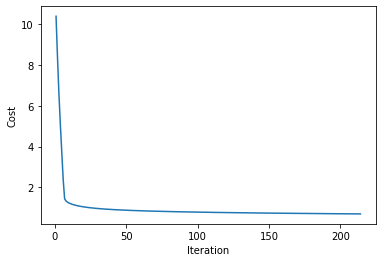

[[-2.66890675e-06 -2.42126699e-06  1.28408164e-05 -7.09803958e-06
  -1.52221962e-05  4.29023890e-05 -1.37010633e-06 -2.83295779e-05
   4.07652293e-05 -3.57301457e-06  4.32470323e-06  7.35369593e-06]
 [-1.45247898e-05  2.67223560e-05  1.74437919e-05 -5.54606644e-05
   1.24126031e-04  4.03964626e-05  2.39447287e-06 -1.41639548e-05
   7.32807621e-06  1.63176703e-05 -4.39748922e-05  5.50022348e-06]
 [ 7.17543215e-05  4.38220866e-05 -1.10375948e-04  1.30821876e-06
  -4.10829368e-06  1.15081952e-07  1.99325141e-06  2.59358040e-06
  -7.23685275e-06  2.47228863e-06  2.41060124e-05 -2.53656579e-05]]
[[-3.83757047e-05 -2.58960228e-06  1.53054762e-04]]


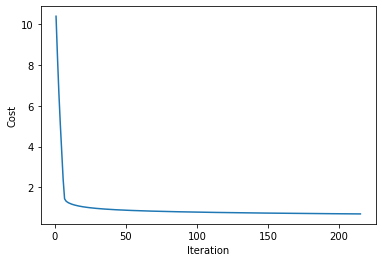

[[-2.66242575e-06 -2.42962155e-06  1.28169605e-05 -7.07998619e-06
  -1.52384497e-05  4.28120973e-05 -1.36263517e-06 -2.82494511e-05
   4.05476364e-05 -3.56477686e-06  4.30993438e-06  7.33962719e-06]
 [-1.44912090e-05  2.66548559e-05  1.74072322e-05 -5.53308859e-05
   1.23846280e-04  4.03005079e-05  2.38972577e-06 -1.41617080e-05
   7.32266418e-06  1.62817587e-05 -4.39676950e-05  5.54256426e-06]
 [ 7.15860272e-05  4.37302728e-05 -1.09879103e-04  1.30572358e-06
  -4.10802904e-06  1.16089710e-07  1.98914051e-06  2.58877992e-06
  -7.22436536e-06  2.46687305e-06  2.40855596e-05 -2.53267817e-05]]
[[-3.82854885e-05 -2.71384741e-06  1.52780859e-04]]


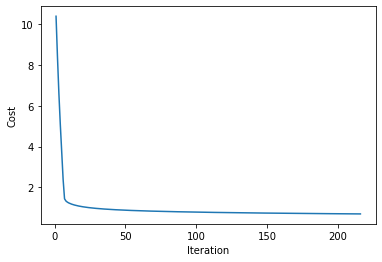

[[-2.65597722e-06 -2.43793825e-06  1.27932821e-05 -7.06202525e-06
  -1.52546156e-05  4.27224875e-05 -1.35521216e-06 -2.81695728e-05
   4.03318695e-05 -3.55657941e-06  4.29522315e-06  7.32566947e-06]
 [-1.44577927e-05  2.65876141e-05  1.73709810e-05 -5.52017483e-05
   1.23567602e-04  4.02054303e-05  2.38500039e-06 -1.41594640e-05
   7.31727148e-06  1.62460198e-05 -4.39605233e-05  5.58448031e-06]
 [ 7.14185659e-05  4.36386470e-05 -1.09386402e-04  1.30323977e-06
  -4.10776349e-06  1.17081813e-07  1.98504921e-06  2.58399688e-06
  -7.21198172e-06  2.46148423e-06  2.40651771e-05 -2.52882060e-05]]
[[-3.81957175e-05 -2.83756176e-06  1.52509002e-04]]


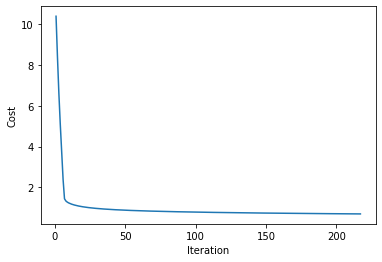

[[-2.64956093e-06 -2.44621747e-06  1.27697790e-05 -7.04415606e-06
  -1.52706950e-05  4.26335514e-05 -1.34783690e-06 -2.80899435e-05
   4.01179053e-05 -3.54842189e-06  4.28056909e-06  7.31182132e-06]
 [-1.44245396e-05  2.65206289e-05  1.73350340e-05 -5.50732470e-05
   1.23289989e-04  4.01112171e-05  2.38029659e-06 -1.41572227e-05
   7.31189800e-06  1.62104523e-05 -4.39533763e-05  5.62597749e-06]
 [ 7.12519315e-05  4.35472137e-05 -1.08897792e-04  1.30076725e-06
  -4.10749700e-06  1.18058499e-07  1.98097735e-06  2.57923130e-06
  -7.19970050e-06  2.45612197e-06  2.40448649e-05 -2.52499272e-05]]
[[-3.81063884e-05 -2.96075011e-06  1.52239164e-04]]


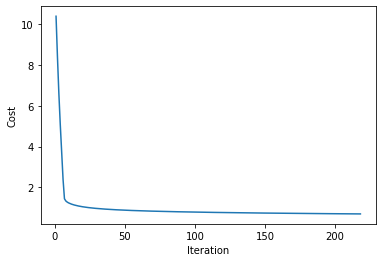

[[-2.64317663e-06 -2.45445956e-06  1.27464492e-05 -7.02637793e-06
  -1.52866891e-05  4.25452804e-05 -1.34050896e-06 -2.80105642e-05
   3.99057210e-05 -3.54030403e-06  4.26597177e-06  7.29808131e-06]
 [-1.43914487e-05  2.64538984e-05  1.72993871e-05 -5.49453772e-05
   1.23013434e-04  4.00178557e-05  2.37561421e-06 -1.41549842e-05
   7.30654366e-06  1.61750549e-05 -4.39462531e-05  5.66706156e-06]
 [ 7.10861178e-05  4.34559769e-05 -1.08413220e-04  1.29830593e-06
  -4.10722955e-06  1.19020005e-07  1.97692480e-06  2.57448316e-06
  -7.18752041e-06  2.45078606e-06  2.40246227e-05 -2.52119417e-05]]
[[-3.80174980e-05 -3.08341712e-06  1.51971320e-04]]


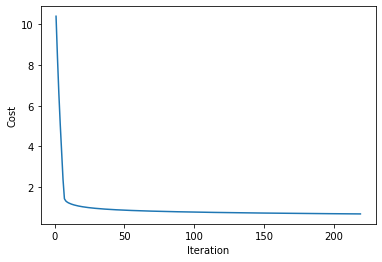

[[-2.63682408e-06 -2.46266488e-06  1.27232904e-05 -7.00869017e-06
  -1.53025990e-05  4.24576665e-05 -1.33322794e-06 -2.79314353e-05
   3.96952940e-05 -3.53222553e-06  4.25143076e-06  7.28444805e-06]
 [-1.43585186e-05  2.63874207e-05  1.72640361e-05 -5.48181341e-05
   1.22737929e-04  3.99253339e-05  2.37095310e-06 -1.41527483e-05
   7.30120832e-06  1.61398265e-05 -4.39391530e-05  5.70773818e-06]
 [ 7.09211187e-05  4.33649406e-05 -1.07932635e-04  1.29585575e-06
  -4.10696113e-06  1.19966564e-07  1.97289141e-06  2.56975249e-06
  -7.17544019e-06  2.44547631e-06  2.40044504e-05 -2.51742459e-05]]
[[-3.79290430e-05 -3.20556733e-06  1.51705447e-04]]


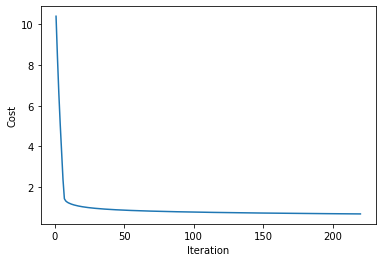

[[-2.63050305e-06 -2.47083378e-06  1.27003005e-05 -6.99109210e-06
  -1.53184257e-05  4.23707017e-05 -1.32599343e-06 -2.78525574e-05
   3.94866022e-05 -3.52418611e-06  4.23694565e-06  7.27092016e-06]
 [-1.43257482e-05  2.63211941e-05  1.72289770e-05 -5.46915131e-05
   1.22463467e-04  3.98336395e-05  2.36631310e-06 -1.41505150e-05
   7.29589191e-06  1.61047657e-05 -4.39320754e-05  5.74801291e-06]
 [ 7.07569281e-05  4.32741085e-05 -1.07455986e-04  1.29341661e-06
  -4.10669170e-06  1.20898402e-07  1.96887705e-06  2.56503927e-06
  -7.16345857e-06  2.44019252e-06  2.39843479e-05 -2.51368364e-05]]
[[-3.78410202e-05 -3.32720518e-06  1.51441519e-04]]


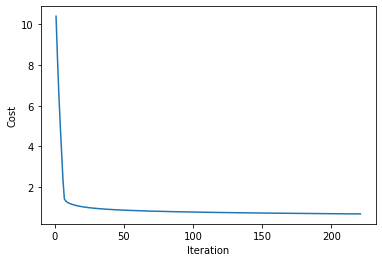

[[-2.62421330e-06 -2.47896660e-06  1.26774776e-05 -6.97358305e-06
  -1.53341703e-05  4.22843779e-05 -1.31880505e-06 -2.77739309e-05
   3.92796239e-05 -3.51618547e-06  4.22251603e-06  7.25749629e-06]
 [-1.42931364e-05  2.62552169e-05  1.71942059e-05 -5.45655096e-05
   1.22190041e-04  3.97427607e-05  2.36169407e-06 -1.41482843e-05
   7.29059431e-06  1.60698714e-05 -4.39250194e-05  5.78789120e-06]
 [ 7.05935400e-05  4.31834840e-05 -1.06983225e-04  1.29098845e-06
  -4.10642127e-06  1.21815742e-07  1.96488157e-06  2.56034351e-06
  -7.15157434e-06  2.43493451e-06  2.39643151e-05 -2.50997097e-05]]
[[-3.77534265e-05 -3.44833503e-06  1.51179514e-04]]


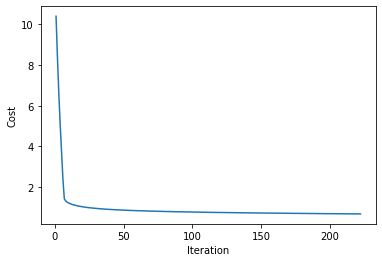

[[-2.61795461e-06 -2.48706367e-06  1.26548196e-05 -6.95616234e-06
  -1.53498338e-05  4.21986875e-05 -1.31166238e-06 -2.76955564e-05
   3.90743375e-05 -3.50822334e-06  4.20814148e-06  7.24417511e-06]
 [-1.42606819e-05  2.61894873e-05  1.71597189e-05 -5.44401191e-05
   1.21917644e-04  3.96526860e-05  2.35709587e-06 -1.41460561e-05
   7.28531541e-06  1.60351423e-05 -4.39179844e-05  5.82737842e-06]
 [ 7.04309485e-05  4.30930705e-05 -1.06514302e-04  1.28857117e-06
  -4.10614979e-06  1.22718804e-07  1.96090484e-06  2.55566519e-06
  -7.13978627e-06  2.42970206e-06  2.39443517e-05 -2.50628624e-05]]
[[-3.76662587e-05 -3.56896110e-06  1.50919407e-04]]


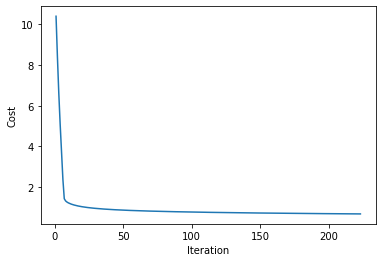

[[-2.61172675e-06 -2.49512531e-06  1.26323245e-05 -6.93882933e-06
  -1.53654171e-05  4.21136228e-05 -1.30456505e-06 -2.76174340e-05
   3.88707221e-05 -3.50029943e-06  4.19382162e-06  7.23095532e-06]
 [-1.42283836e-05  2.61240036e-05  1.71255121e-05 -5.43153370e-05
   1.21646269e-04  3.95634039e-05  2.35251833e-06 -1.41438305e-05
   7.28005512e-06  1.60005773e-05 -4.39109697e-05  5.86647983e-06]
 [ 7.02691478e-05  4.30028712e-05 -1.06049170e-04  1.28616472e-06
  -4.10587727e-06  1.23607802e-07  1.95694673e-06  2.55100431e-06
  -7.12809320e-06  2.42449501e-06  2.39244576e-05 -2.50262912e-05]]
[[-3.75795137e-05 -3.68908755e-06  1.50661175e-04]]


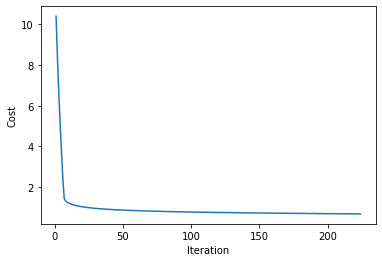

[[-2.60552948e-06 -2.50315184e-06  1.26099904e-05 -6.92158336e-06
  -1.53809211e-05  4.20291764e-05 -1.29751267e-06 -2.75395641e-05
   3.86687571e-05 -3.49241346e-06  4.17955605e-06  7.21783563e-06]
 [-1.41962404e-05  2.60587641e-05  1.70915820e-05 -5.41911589e-05
   1.21375910e-04  3.94749033e-05  2.34796133e-06 -1.41416073e-05
   7.27481333e-06  1.59661751e-05 -4.39039748e-05  5.90520061e-06]
 [ 7.01081320e-05  4.29128891e-05 -1.05587781e-04  1.28376900e-06
  -4.10560369e-06  1.24482948e-07  1.95300709e-06  2.54636086e-06
  -7.11649393e-06  2.41931315e-06  2.39046326e-05 -2.49899928e-05]]
[[-3.74931885e-05 -3.80871843e-06  1.50404797e-04]]


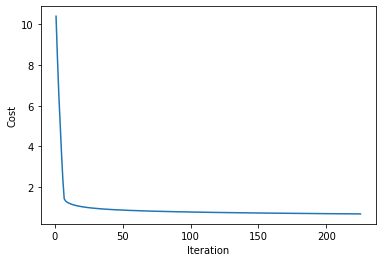

[[-2.59936259e-06 -2.51114356e-06  1.25878153e-05 -6.90442377e-06
  -1.53963468e-05  4.19453407e-05 -1.29050485e-06 -2.74619470e-05
   3.84684220e-05 -3.48456517e-06  4.16534441e-06  7.20481479e-06]
 [-1.41642511e-05  2.59937673e-05  1.70579247e-05 -5.40675803e-05
   1.21106559e-04  3.93871730e-05  2.34342471e-06 -1.41393865e-05
   7.26958995e-06  1.59319347e-05 -4.38969990e-05  5.94354584e-06]
 [ 6.99478954e-05  4.28231270e-05 -1.05130090e-04  1.28138396e-06
  -4.10532903e-06  1.25344448e-07  1.94908580e-06  2.54173481e-06
  -7.10498734e-06  2.41415630e-06  2.38848765e-05 -2.49539640e-05]]
[[-3.74072800e-05 -3.92785771e-06  1.50150250e-04]]


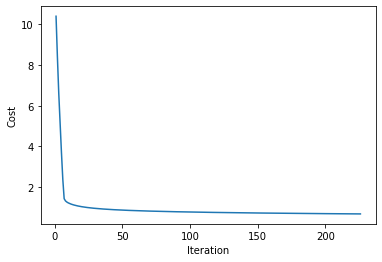

[[-2.59322585e-06 -2.51910077e-06  1.25657973e-05 -6.88734993e-06
  -1.54116951e-05  4.18621085e-05 -1.28354121e-06 -2.73845827e-05
   3.82696969e-05 -3.47675428e-06  4.15118630e-06  7.19189155e-06]
 [-1.41324147e-05  2.59290115e-05  1.70245367e-05 -5.39445969e-05
   1.20838210e-04  3.93002025e-05  2.33890833e-06 -1.41371682e-05
   7.26438487e-06  1.58978548e-05 -4.38900417e-05  5.98152052e-06]
 [ 6.97884322e-05  4.27335876e-05 -1.04676050e-04  1.27900950e-06
  -4.10505328e-06  1.26192506e-07  1.94518272e-06  2.53712615e-06
  -7.09357228e-06  2.40902427e-06  2.38651892e-05 -2.49182016e-05]]
[[-3.73217851e-05 -4.04650926e-06  1.49897511e-04]]


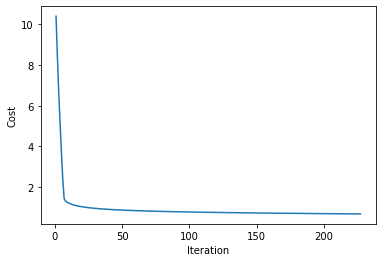

[[-2.58711905e-06 -2.52702377e-06  1.25439346e-05 -6.87036121e-06
  -1.54269669e-05  4.17794728e-05 -1.27662139e-06 -2.73074714e-05
   3.80725621e-05 -3.46898051e-06  4.13708136e-06  7.17906470e-06]
 [-1.41007300e-05  2.58644951e-05  1.69914145e-05 -5.38222043e-05
   1.20570856e-04  3.92139811e-05  2.33441205e-06 -1.41349522e-05
   7.25919799e-06  1.58639342e-05 -4.38831024e-05  6.01912955e-06]
 [ 6.96297368e-05  4.26442734e-05 -1.04225617e-04  1.27664556e-06
  -4.10477643e-06  1.27027322e-07  1.94129772e-06  2.53253487e-06
  -7.08224764e-06  2.40391689e-06  2.38455704e-05 -2.48827025e-05]]
[[-3.72367009e-05 -4.16467690e-06  1.49646561e-04]]


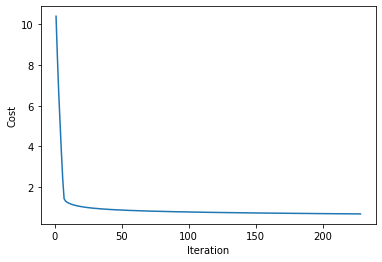

[[-2.58104196e-06 -2.53491283e-06  1.25222254e-05 -6.85345697e-06
  -1.54421629e-05  4.16974264e-05 -1.26974502e-06 -2.72306131e-05
   3.78769983e-05 -3.46124361e-06  4.12302923e-06  7.16633305e-06]
 [-1.40691959e-05  2.58002166e-05  1.69585545e-05 -5.37003982e-05
   1.20304491e-04  3.91284984e-05  2.32993573e-06 -1.41327386e-05
   7.25402920e-06  1.58301719e-05 -4.38761805e-05  6.05637775e-06]
 [ 6.94718037e-05  4.25551868e-05 -1.03778747e-04  1.27429206e-06
  -4.10449846e-06  1.27849092e-07  1.93743068e-06  2.52796092e-06
  -7.07101233e-06  2.39883398e-06  2.38260200e-05 -2.48474636e-05]]
[[-3.71520245e-05 -4.28236433e-06  1.49397376e-04]]


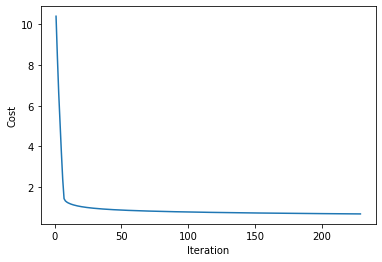

[[-2.57499437e-06 -2.54276825e-06  1.25006679e-05 -6.83663659e-06
  -1.54572840e-05  4.16159624e-05 -1.26291173e-06 -2.71540080e-05
   3.76829865e-05 -3.45354331e-06  4.10902956e-06  7.15369541e-06]
 [-1.40378113e-05  2.57361743e-05  1.69259533e-05 -5.35791744e-05
   1.20039109e-04  3.90437442e-05  2.32547924e-06 -1.41305272e-05
   7.24887842e-06  1.57965667e-05 -4.38692756e-05  6.09326987e-06]
 [ 6.93146273e-05  4.24663301e-05 -1.03335396e-04  1.27194894e-06
  -4.10421936e-06  1.28658007e-07  1.93358146e-06  2.52340430e-06
  -7.05986528e-06  2.39377534e-06  2.38065378e-05 -2.48124819e-05]]
[[-3.70677529e-05 -4.39957520e-06  1.49149938e-04]]


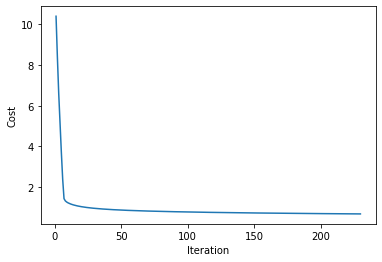

[[-2.56897606e-06 -2.55059030e-06  1.24792603e-05 -6.81989946e-06
  -1.54723309e-05  4.15350741e-05 -1.25612115e-06 -2.70776558e-05
   3.74905078e-05 -3.44587935e-06  4.09508199e-06  7.14115064e-06]
 [-1.40065752e-05  2.56723669e-05  1.68936077e-05 -5.34585286e-05
   1.19774704e-04  3.89597085e-05  2.32104242e-06 -1.41283181e-05
   7.24374554e-06  1.57631176e-05 -4.38623870e-05  6.12981056e-06]
 [ 6.91582021e-05  4.23777053e-05 -1.02895523e-04  1.26961611e-06
  -4.10393913e-06  1.29454259e-07  1.92974993e-06  2.51886496e-06
  -7.04880542e-06  2.38874081e-06  2.37871235e-05 -2.47777545e-05]]
[[-3.69838831e-05 -4.51631306e-06  1.48904224e-04]]


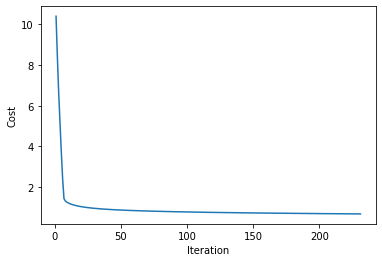

[[-2.56298683e-06 -2.55837923e-06  1.24580008e-05 -6.80324497e-06
  -1.54873046e-05  4.14547547e-05 -1.24937294e-06 -2.70015566e-05
   3.72995440e-05 -3.43825146e-06  4.08118618e-06  7.12869758e-06]
 [-1.39754865e-05  2.56087927e-05  1.68615142e-05 -5.33384567e-05
   1.19511268e-04  3.88763815e-05  2.31662516e-06 -1.41261113e-05
   7.23863046e-06  1.57298233e-05 -4.38555143e-05  6.16600440e-06]
 [ 6.90025227e-05  4.22893145e-05 -1.02459084e-04  1.26729352e-06
  -4.10365776e-06  1.30238031e-07  1.92593598e-06  2.51434289e-06
  -7.03783171e-06  2.38373021e-06  2.37677769e-05 -2.47432784e-05]]
[[-3.69004124e-05 -4.63258142e-06  1.48660216e-04]]


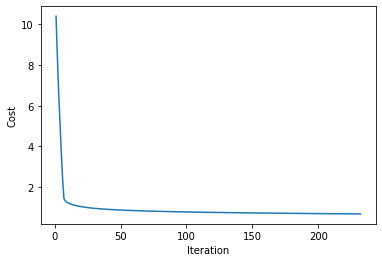

[[-2.55702646e-06 -2.56613533e-06  1.24368877e-05 -6.78667251e-06
  -1.55022056e-05  4.13749976e-05 -1.24266673e-06 -2.69257102e-05
   3.71100769e-05 -3.43065939e-06  4.06734179e-06  7.11633514e-06]
 [-1.39445442e-05  2.55454504e-05  1.68296697e-05 -5.32189545e-05
   1.19248798e-04  3.87937536e-05  2.31222731e-06 -1.41239067e-05
   7.23353308e-06  1.56966827e-05 -4.38486571e-05  6.20185590e-06]
 [ 6.88475837e-05  4.22011594e-05 -1.02026039e-04  1.26498108e-06
  -4.10337523e-06  1.31009506e-07  1.92213948e-06  2.50983805e-06
  -7.02694313e-06  2.37874337e-06  2.37484979e-05 -2.47090506e-05]]
[[-3.68173379e-05 -4.74838370e-06  1.48417893e-04]]


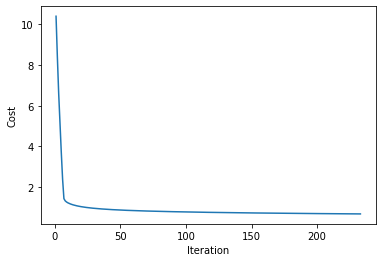

[[-2.55109475e-06 -2.57385883e-06  1.24159194e-05 -6.77018149e-06
  -1.55170348e-05  4.12957964e-05 -1.23600218e-06 -2.68501165e-05
   3.69220887e-05 -3.42310289e-06  4.05354848e-06  7.10406219e-06]
 [-1.39137471e-05  2.54823384e-05  1.67980709e-05 -5.31000179e-05
   1.18987285e-04  3.87118152e-05  2.30784875e-06 -1.41217043e-05
   7.22845331e-06  1.56636949e-05 -4.38418148e-05  6.23736947e-06]
 [ 6.86933797e-05  4.21132420e-05 -1.01596348e-04  1.26267873e-06
  -4.10309153e-06  1.31768864e-07  1.91836029e-06  2.50535040e-06
  -7.01613866e-06  2.37378011e-06  2.37292861e-05 -2.46750685e-05]]
[[-3.67346567e-05 -4.86372324e-06  1.48177235e-04]]


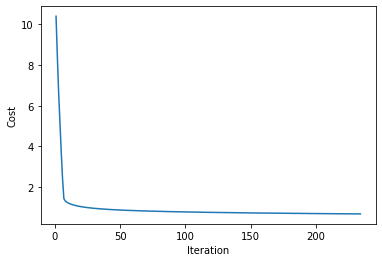

[[-2.54519149e-06 -2.58154999e-06  1.23950942e-05 -6.75377130e-06
  -1.55317929e-05  4.12171446e-05 -1.22937895e-06 -2.67747753e-05
   3.67355618e-05 -3.41558170e-06  4.03980594e-06  7.09187768e-06]
 [-1.38830943e-05  2.54194554e-05  1.67667147e-05 -5.29816430e-05
   1.18726725e-04  3.86305570e-05  2.30348933e-06 -1.41195041e-05
   7.22339104e-06  1.56308588e-05 -4.38349872e-05  6.27254946e-06]
 [ 6.85399056e-05  4.20255637e-05 -1.01169970e-04  1.26038640e-06
  -4.10280667e-06  1.32516281e-07  1.91459831e-06  2.50087990e-06
  -7.00541733e-06  2.36884026e-06  2.37101415e-05 -2.46413292e-05]]
[[-3.66523661e-05 -4.97860334e-06  1.47938225e-04]]


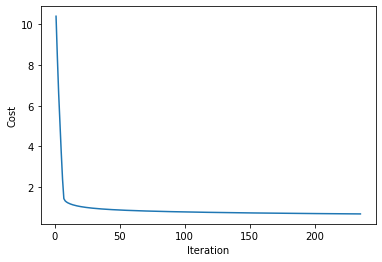

[[-2.53931648e-06 -2.58920906e-06  1.23744105e-05 -6.73744137e-06
  -1.55464805e-05  4.11390361e-05 -1.22279668e-06 -2.66996863e-05
   3.65504791e-05 -3.40809558e-06  4.02611383e-06  7.07978052e-06]
 [-1.38525848e-05  2.53567998e-05  1.67355981e-05 -5.28638256e-05
   1.18467111e-04  3.85499700e-05  2.29914893e-06 -1.41173060e-05
   7.21834618e-06  1.55981731e-05 -4.38281736e-05  6.30740017e-06]
 [ 6.83871561e-05  4.19381261e-05 -1.00746867e-04  1.25810402e-06
  -4.10252063e-06  1.33251928e-07  1.91085341e-06  2.49642653e-06
  -6.99477814e-06  2.36392365e-06  2.36910637e-05 -2.46078299e-05]]
[[-3.65704633e-05 -5.09302722e-06  1.47700841e-04]]


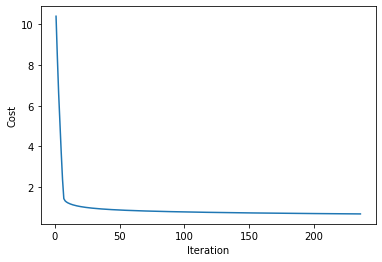

[[-2.53346951e-06 -2.59683627e-06  1.23538666e-05 -6.72119112e-06
  -1.55610983e-05  4.10614645e-05 -1.21625504e-06 -2.66248493e-05
   3.63668234e-05 -3.40064428e-06  4.01247184e-06  7.06776968e-06]
 [-1.38222174e-05  2.52943704e-05  1.67047180e-05 -5.27465618e-05
   1.18208438e-04  3.84700451e-05  2.29482742e-06 -1.41151100e-05
   7.21331864e-06  1.55656370e-05 -4.38213738e-05  6.34192577e-06]
 [ 6.82351261e-05  4.18509306e-05 -1.00326999e-04  1.25583153e-06
  -4.10223340e-06  1.33975977e-07  1.90712547e-06  2.49199024e-06
  -6.98422014e-06  2.35903012e-06  2.36720526e-05 -2.45745679e-05]]
[[-3.64889455e-05 -5.20699806e-06  1.47465068e-04]]


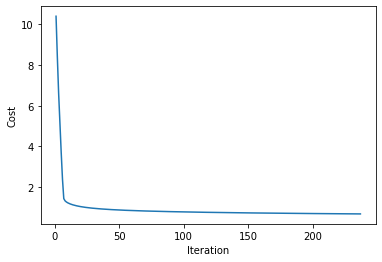

[[-2.52765039e-06 -2.60443186e-06  1.23334610e-05 -6.70501996e-06
  -1.55756470e-05  4.09844239e-05 -1.20975370e-06 -2.65502639e-05
   3.61845781e-05 -3.39322754e-06  3.99887965e-06  7.05584412e-06]
 [-1.37919914e-05  2.52321658e-05  1.66740714e-05 -5.26298477e-05
   1.17950701e-04  3.83907735e-05  2.29052467e-06 -1.41129160e-05
   7.20830832e-06  1.55332494e-05 -4.38145873e-05  6.37613043e-06]
 [ 6.80838103e-05  4.17639786e-05 -9.99103281e-05  1.25356885e-06
  -4.10194499e-06  1.34688594e-07  1.90341437e-06  2.48757099e-06
  -6.97374239e-06  2.35415950e-06  2.36531078e-05 -2.45415406e-05]]
[[-3.64078101e-05 -5.32051894e-06  1.47230885e-04]]


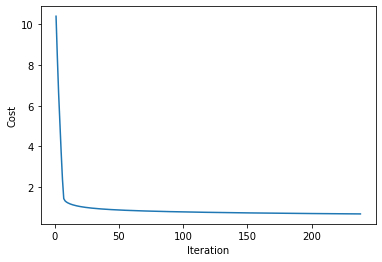

[[-2.52185892e-06 -2.61199607e-06  1.23131922e-05 -6.68892733e-06
  -1.55901272e-05  4.09079082e-05 -1.20329232e-06 -2.64759298e-05
   3.60037268e-05 -3.38584514e-06  3.98533696e-06  7.04400284e-06]
 [-1.37619055e-05  2.51701845e-05  1.66436555e-05 -5.25136793e-05
   1.17693892e-04  3.83121465e-05  2.28624055e-06 -1.41107242e-05
   7.20331512e-06  1.55010091e-05 -4.38078138e-05  6.41001819e-06]
 [ 6.79332037e-05  4.16772713e-05 -9.94968177e-05  1.25131592e-06
  -4.10165538e-06  1.35389943e-07  1.89972000e-06  2.48316874e-06
  -6.96334394e-06  2.34931163e-06  2.36342293e-05 -2.45087453e-05]]
[[-3.63270543e-05 -5.43359292e-06  1.46998275e-04]]


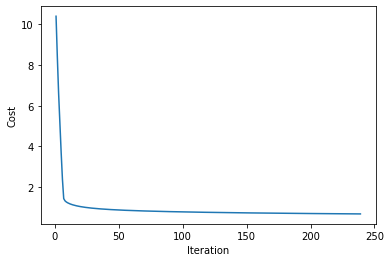

[[-2.51609490e-06 -2.61952911e-06  1.22930585e-05 -6.67291266e-06
  -1.56045396e-05  4.08319115e-05 -1.19687058e-06 -2.64018466e-05
   3.58242533e-05 -3.37849682e-06  3.97184347e-06  7.03224483e-06]
 [-1.37319589e-05  2.51084253e-05  1.66134673e-05 -5.23980528e-05
   1.17438008e-04  3.82341556e-05  2.28197493e-06 -1.41085344e-05
   7.19833895e-06  1.54689153e-05 -4.38010528e-05  6.44359305e-06]
 [ 6.77833013e-05  4.15908097e-05 -9.90864308e-05  1.24907268e-06
  -4.10136457e-06  1.36080185e-07  1.89604223e-06  2.47878344e-06
  -6.95302388e-06  2.34448634e-06  2.36154166e-05 -2.44761795e-05]]
[[-3.62466755e-05 -5.54622300e-06  1.46767220e-04]]


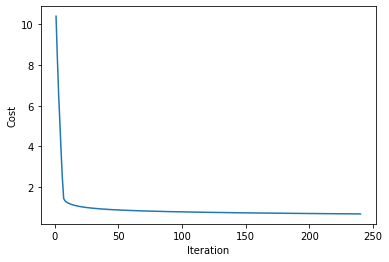

[[-2.51035814e-06 -2.62703122e-06  1.22730585e-05 -6.65697539e-06
  -1.56188847e-05  4.07564281e-05 -1.19048814e-06 -2.63280140e-05
   3.56461416e-05 -3.37118236e-06  3.95839886e-06  7.02056913e-06]
 [-1.37021505e-05  2.50468869e-05  1.65835040e-05 -5.22829643e-05
   1.17183042e-04  3.81567925e-05  2.27772770e-06 -1.41063466e-05
   7.19337971e-06  1.54369668e-05 -4.37943041e-05  6.47685896e-06]
 [ 6.76340981e-05  4.15045950e-05 -9.86791310e-05  1.24683905e-06
  -4.10107256e-06  1.36759478e-07  1.89238095e-06  2.47441506e-06
  -6.94278132e-06  2.33968347e-06  2.35966697e-05 -2.44438406e-05]]
[[-3.61666711e-05 -5.65841210e-06  1.46537702e-04]]


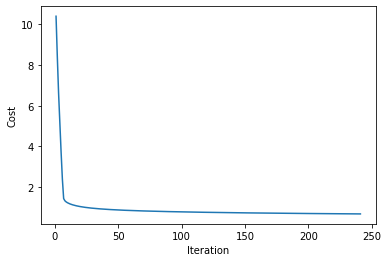

[[-2.50464844e-06 -2.63450259e-06  1.22531906e-05 -6.64111498e-06
  -1.56331631e-05  4.06814521e-05 -1.18414470e-06 -2.62544315e-05
   3.54693760e-05 -3.36390151e-06  3.94500285e-06  7.00897475e-06]
 [-1.36724794e-05  2.49855678e-05  1.65537629e-05 -5.21684101e-05
   1.16928990e-04  3.80800488e-05  2.27349873e-06 -1.41041607e-05
   7.18843731e-06  1.54051627e-05 -4.37875673e-05  6.50981978e-06]
 [ 6.74855892e-05  4.14186281e-05 -9.82748826e-05  1.24461497e-06
  -4.10077933e-06  1.37427977e-07  1.88873605e-06  2.47006353e-06
  -6.93261535e-06  2.33490286e-06  2.35779882e-05 -2.44117261e-05]]
[[-3.60870383e-05 -5.77016311e-06  1.46309706e-04]]


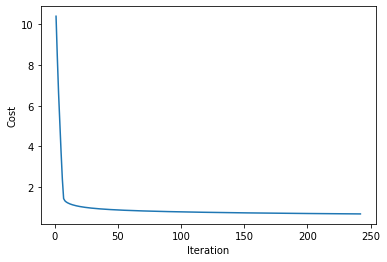

[[-2.49896562e-06 -2.64194346e-06  1.22334536e-05 -6.62533086e-06
  -1.56473755e-05  4.06069781e-05 -1.17783993e-06 -2.61810986e-05
   3.52939411e-05 -3.35665404e-06  3.93165515e-06  6.99746076e-06]
 [-1.36429447e-05  2.49244669e-05  1.65242411e-05 -5.20543864e-05
   1.16675845e-04  3.80039167e-05  2.26928788e-06 -1.41019769e-05
   7.18351166e-06  1.53735020e-05 -4.37808421e-05  6.54247932e-06]
 [ 6.73377697e-05  4.13329099e-05 -9.78736506e-05  1.24240039e-06
  -4.10048490e-06  1.38085837e-07  1.88510741e-06  2.46572882e-06
  -6.92252511e-06  2.33014436e-06  2.35593720e-05 -2.43798336e-05]]
[[-3.60077747e-05 -5.88147887e-06  1.46083213e-04]]


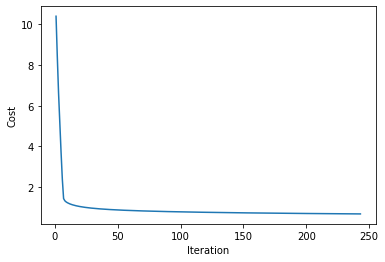

[[-2.49330949e-06 -2.64935403e-06  1.22138457e-05 -6.60962250e-06
  -1.56615224e-05  4.05330003e-05 -1.17157351e-06 -2.61080149e-05
   3.51198218e-05 -3.34943972e-06  3.91835546e-06  6.98602623e-06]
 [-1.36135454e-05  2.48635829e-05  1.64949361e-05 -5.19408895e-05
   1.16423602e-04  3.79283880e-05  2.26509506e-06 -1.40997950e-05
   7.17860266e-06  1.53419837e-05 -4.37741282e-05  6.57484131e-06]
 [ 6.71906348e-05  4.12474411e-05 -9.74754004e-05  1.24019523e-06
  -4.10018925e-06  1.38733206e-07  1.88149493e-06  2.46141087e-06
  -6.91250974e-06  2.32540780e-06  2.35408207e-05 -2.43481605e-05]]
[[-3.59288777e-05 -5.99236215e-06  1.45858207e-04]]


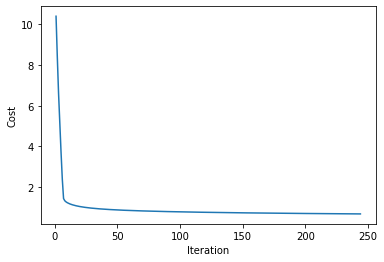

[[-2.48767985e-06 -2.65673449e-06  1.21943658e-05 -6.59398936e-06
  -1.56756044e-05  4.04595135e-05 -1.16534515e-06 -2.60351799e-05
   3.49470029e-05 -3.34225832e-06  3.90510351e-06  6.97467022e-06]
 [-1.35842805e-05  2.48029145e-05  1.64658452e-05 -5.18279156e-05
   1.16172257e-04  3.78534550e-05  2.26092012e-06 -1.40976150e-05
   7.17371022e-06  1.53106068e-05 -4.37674252e-05  6.60690944e-06]
 [ 6.70441796e-05  4.11622225e-05 -9.70800980e-05  1.23799943e-06
  -4.09989238e-06  1.39370234e-07  1.87789849e-06  2.45710964e-06
  -6.90256838e-06  2.32069304e-06  2.35223341e-05 -2.43167045e-05]]
[[-3.58503447e-05 -6.10281571e-06  1.45634672e-04]]


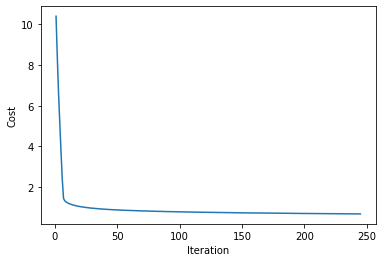

[[-2.48207653e-06 -2.66408506e-06  1.21750123e-05 -6.57843090e-06
  -1.56896219e-05  4.03865121e-05 -1.15915452e-06 -2.59625930e-05
   3.47754699e-05 -3.33510962e-06  3.89189902e-06  6.96339184e-06]
 [-1.35551491e-05  2.47424604e-05  1.64369657e-05 -5.17154612e-05
   1.15921804e-04  3.77791100e-05  2.25676296e-06 -1.40954369e-05
   7.16883425e-06  1.52793703e-05 -4.37607329e-05  6.63868734e-06]
 [ 6.68983994e-05  4.10772548e-05 -9.66877099e-05  1.23581294e-06
  -4.09959429e-06  1.39997064e-07  1.87431797e-06  2.45282508e-06
  -6.89270020e-06  2.31599992e-06  2.35039120e-05 -2.42854633e-05]]
[[-3.57721732e-05 -6.21284223e-06  1.45412591e-04]]


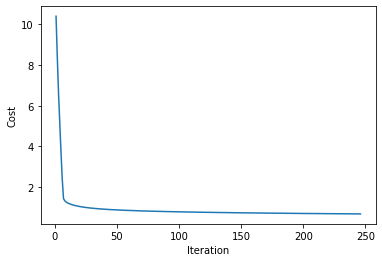

[[-2.47649934e-06 -2.67140593e-06  1.21557840e-05 -6.56294660e-06
  -1.57035756e-05  4.03139909e-05 -1.15300132e-06 -2.58902536e-05
   3.46052081e-05 -3.32799338e-06  3.87874171e-06  6.95219021e-06]
 [-1.35261503e-05  2.46822195e-05  1.64082951e-05 -5.16035227e-05
   1.15672238e-04  3.77053455e-05  2.25262345e-06 -1.40932607e-05
   7.16397465e-06  1.52482733e-05 -4.37540510e-05  6.67017856e-06]
 [ 6.67532896e-05  4.09925385e-05 -9.62982030e-05  1.23363568e-06
  -4.09929498e-06  1.40613839e-07  1.87075328e-06  2.44855712e-06
  -6.88290437e-06  2.31132829e-06  2.34855542e-05 -2.42544345e-05]]
[[-3.56943607e-05 -6.32244435e-06  1.45191949e-04]]


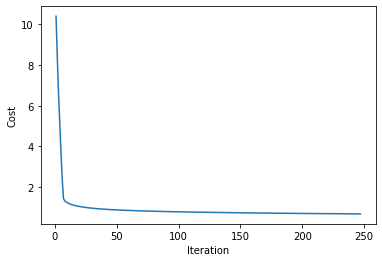

[[-2.47094809e-06 -2.67869730e-06  1.21366793e-05 -6.54753593e-06
  -1.57174658e-05  4.02419448e-05 -1.14688525e-06 -2.58181613e-05
   3.44362033e-05 -3.32090939e-06  3.86563130e-06  6.94106443e-06]
 [-1.34972832e-05  2.46221906e-05  1.63798310e-05 -5.14920963e-05
   1.15423554e-04  3.76321541e-05  2.24850148e-06 -1.40910864e-05
   7.15913135e-06  1.52173148e-05 -4.37473793e-05  6.70138662e-06]
 [ 6.66088453e-05  4.09080741e-05 -9.59115450e-05  1.23146760e-06
  -4.09899445e-06  1.41220701e-07  1.86720430e-06  2.44430573e-06
  -6.87318009e-06  2.30667799e-06  2.34672603e-05 -2.42236158e-05]]
[[-3.56169047e-05 -6.43162468e-06  1.44972730e-04]]


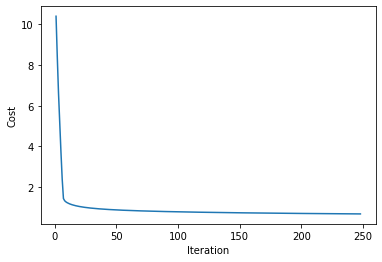

[[-2.46542262e-06 -2.68595935e-06  1.21176971e-05 -6.53219837e-06
  -1.57312932e-05  4.01703684e-05 -1.14080602e-06 -2.57463154e-05
   3.42684414e-05 -3.31385742e-06  3.85256754e-06  6.93001365e-06]
 [-1.34685468e-05  2.45623723e-05  1.63515707e-05 -5.13811786e-05
   1.15175747e-04  3.75595284e-05  2.24439693e-06 -1.40889139e-05
   7.15430424e-06  1.51864938e-05 -4.37407173e-05  6.73231497e-06]
 [ 6.64650621e-05  4.08238620e-05 -9.55277038e-05  1.22930863e-06
  -4.09869269e-06  1.41817786e-07  1.86367093e-06  2.44007084e-06
  -6.86352656e-06  2.30204888e-06  2.34490301e-05 -2.41930050e-05]]
[[-3.55398028e-05 -6.54038578e-06  1.44754919e-04]]


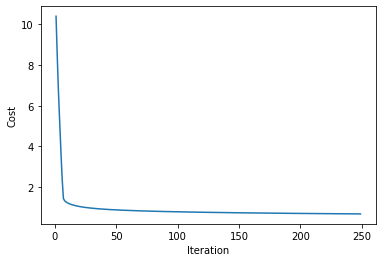

[[-2.45992273e-06 -2.69319227e-06  1.20988360e-05 -6.51693342e-06
  -1.57450582e-05  4.00992569e-05 -1.13476333e-06 -2.56747153e-05
   3.41019086e-05 -3.30683725e-06  3.83955015e-06  6.91903703e-06]
 [-1.34399404e-05  2.45027637e-05  1.63235120e-05 -5.12707661e-05
   1.14928812e-04  3.74874614e-05  2.24030969e-06 -1.40867432e-05
   7.14949323e-06  1.51558095e-05 -4.37340650e-05  6.76296700e-06]
 [ 6.63219354e-05  4.07399028e-05 -9.51466479e-05  1.22715872e-06
  -4.09838971e-06  1.42405231e-07  1.86015305e-06  2.43585241e-06
  -6.85394299e-06  2.29744081e-06  2.34308634e-05 -2.41625998e-05]]
[[-3.54630526e-05 -6.64873017e-06  1.44538500e-04]]


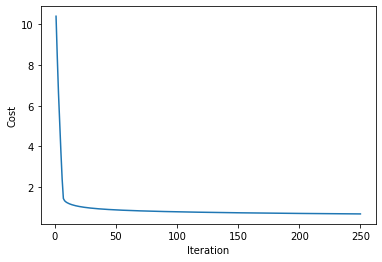

[[-2.45444826e-06 -2.70039625e-06  1.20800947e-05 -6.50174055e-06
  -1.57587614e-05  4.00286052e-05 -1.12875688e-06 -2.56033604e-05
   3.39365911e-05 -3.29984867e-06  3.82657887e-06  6.90813372e-06]
 [-1.34114629e-05  2.44433634e-05  1.62956523e-05 -5.11608553e-05
   1.14682744e-04  3.74159459e-05  2.23623964e-06 -1.40845744e-05
   7.14469825e-06  1.51252610e-05 -4.37274220e-05  6.79334605e-06]
 [ 6.61794605e-05  4.06561966e-05 -9.47683463e-05  1.22501781e-06
  -4.09808550e-06  1.42983169e-07  1.85665057e-06  2.43165037e-06
  -6.84442860e-06  2.29285363e-06  2.34127599e-05 -2.41323981e-05]]
[[-3.53866516e-05 -6.75666034e-06  1.44323458e-04]]


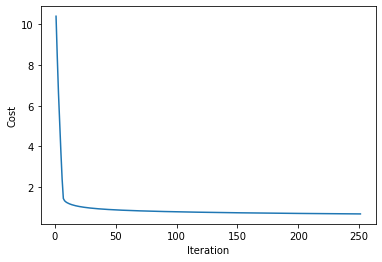

[[-2.44899902e-06 -2.70757147e-06  1.20614718e-05 -6.48661927e-06
  -1.57724031e-05  3.99584083e-05 -1.12278638e-06 -2.55322499e-05
   3.37724756e-05 -3.29289146e-06  3.81365344e-06  6.89730290e-06]
 [-1.33831135e-05  2.43841703e-05  1.62679893e-05 -5.10514426e-05
   1.14437538e-04  3.73449750e-05  2.23218666e-06 -1.40824073e-05
   7.13991919e-06  1.50948472e-05 -4.37207882e-05  6.82345543e-06]
 [ 6.60376331e-05  4.05727438e-05 -9.43927684e-05  1.22288583e-06
  -4.09778007e-06  1.43551730e-07  1.85316338e-06  2.42746467e-06
  -6.83498264e-06  2.28828720e-06  2.33947194e-05 -2.41023976e-05]]
[[-3.53105974e-05 -6.86417872e-06  1.44109779e-04]]


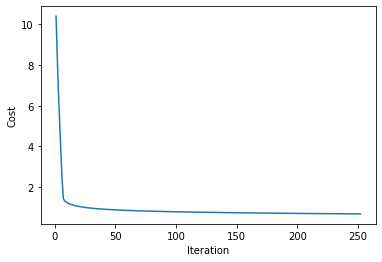

[[-2.44357485e-06 -2.71471810e-06  1.20429663e-05 -6.47156908e-06
  -1.57859838e-05  3.98886615e-05 -1.11685156e-06 -2.54613834e-05
   3.36095487e-05 -3.28596542e-06  3.80077362e-06  6.88654376e-06]
 [-1.33548913e-05  2.43251833e-05  1.62405208e-05 -5.09425248e-05
   1.14193190e-04  3.72745419e-05  2.22815066e-06 -1.40802420e-05
   7.13515598e-06  1.50645673e-05 -4.37141632e-05  6.85329835e-06]
 [ 6.58964486e-05  4.04895446e-05 -9.40198841e-05  1.22076273e-06
  -4.09747340e-06  1.44111045e-07  1.84969138e-06  2.42329525e-06
  -6.82560434e-06  2.28374138e-06  2.33767416e-05 -2.40725963e-05]]
[[-3.52348878e-05 -6.97128771e-06  1.43897448e-04]]


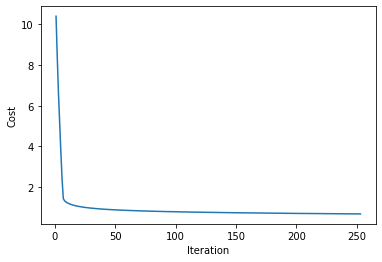

[[-2.43817557e-06 -2.72183632e-06  1.20245767e-05 -6.45658948e-06
  -1.57995040e-05  3.98193600e-05 -1.11095212e-06 -2.53907600e-05
   3.34477975e-05 -3.27907032e-06  3.78793914e-06  6.87585550e-06]
 [-1.33267955e-05  2.42664012e-05  1.62132444e-05 -5.08340984e-05
   1.13949694e-04  3.72046400e-05  2.22413151e-06 -1.40780785e-05
   7.13040852e-06  1.50344204e-05 -4.37075470e-05  6.88287802e-06]
 [ 6.57559027e-05  4.04065991e-05 -9.36496638e-05  1.21864845e-06
  -4.09716552e-06  1.44661239e-07  1.84623446e-06  2.41914206e-06
  -6.81629298e-06  2.27921601e-06  2.33588262e-05 -2.40429920e-05]]
[[-3.51595203e-05 -7.07798970e-06  1.43686451e-04]]


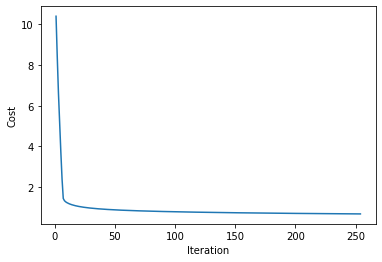

[[-2.43280101e-06 -2.72892630e-06  1.20063020e-05 -6.44167998e-06
  -1.58129641e-05  3.97504991e-05 -1.10508778e-06 -2.53203791e-05
   3.32872090e-05 -3.27220595e-06  3.77514976e-06  6.86523735e-06]
 [-1.32988252e-05  2.42078230e-05  1.61861579e-05 -5.07261600e-05
   1.13707047e-04  3.71352625e-05  2.22012910e-06 -1.40759166e-05
   7.12567672e-06  1.50044055e-05 -4.37009392e-05  6.91219757e-06]
 [ 6.56159910e-05  4.03239075e-05 -9.32820783e-05  1.21654294e-06
  -4.09685640e-06  1.45202438e-07  1.84279252e-06  2.41500503e-06
  -6.80704782e-06  2.27471097e-06  2.33409731e-05 -2.40135828e-05]]
[[-3.50844926e-05 -7.18428702e-06  1.43476773e-04]]


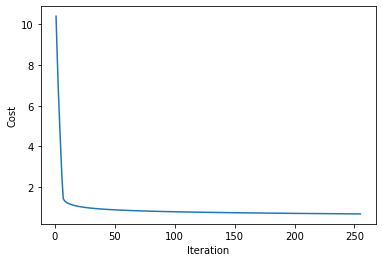

[[-2.42745100e-06 -2.73598821e-06  1.19881409e-05 -6.42684009e-06
  -1.58263646e-05  3.96820741e-05 -1.09925827e-06 -2.52502399e-05
   3.31277706e-05 -3.26537212e-06  3.76240523e-06  6.85468851e-06]
 [-1.32709795e-05  2.41494475e-05  1.61592590e-05 -5.06187063e-05
   1.13465243e-04  3.70664031e-05  2.21614333e-06 -1.40737566e-05
   7.12096051e-06  1.49745219e-05 -4.36943396e-05  6.94126009e-06]
 [ 6.54767091e-05  4.02414698e-05 -9.29170988e-05  1.21444613e-06
  -4.09654606e-06  1.45734764e-07  1.83936546e-06  2.41088412e-06
  -6.79786813e-06  2.27022610e-06  2.33231818e-05 -2.39843664e-05]]
[[-3.50098025e-05 -7.29018196e-06  1.43268402e-04]]


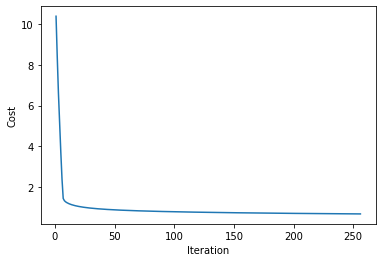

[[-2.42212538e-06 -2.74302222e-06  1.19700921e-05 -6.41206934e-06
  -1.58397058e-05  3.96140805e-05 -1.09346332e-06 -2.51803418e-05
   3.29694698e-05 -3.25856862e-06  3.74970531e-06  6.84420824e-06]
 [-1.32432577e-05  2.40912736e-05  1.61325456e-05 -5.05117340e-05
   1.13224278e-04  3.69980554e-05  2.21217409e-06 -1.40715982e-05
   7.11625978e-06  1.49447686e-05 -4.36877481e-05  6.97006862e-06]
 [ 6.53380528e-05  4.01592861e-05 -9.25546969e-05  1.21235797e-06
  -4.09623450e-06  1.46258338e-07  1.83595319e-06  2.40677925e-06
  -6.78875322e-06  2.26576128e-06  2.33054522e-05 -2.39553410e-05]]
[[-3.49354476e-05 -7.39567678e-06  1.43061322e-04]]


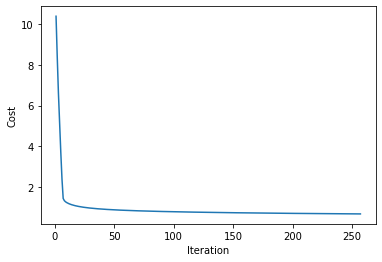

[[-2.41682397e-06 -2.75002849e-06  1.19521547e-05 -6.39736725e-06
  -1.58529882e-05  3.95465138e-05 -1.08770264e-06 -2.51106840e-05
   3.28122944e-05 -3.25179523e-06  3.73704975e-06  6.83379578e-06]
 [-1.32156588e-05  2.40333003e-05  1.61060156e-05 -5.04052399e-05
   1.12984148e-04  3.69302130e-05  2.20822127e-06 -1.40694415e-05
   7.11157447e-06  1.49151447e-05 -4.36811645e-05  6.99862616e-06]
 [ 6.52000179e-05  4.00773562e-05 -9.21948447e-05  1.21027840e-06
  -4.09592171e-06  1.46773279e-07  1.83255560e-06  2.40269037e-06
  -6.77970238e-06  2.26131637e-06  2.32877841e-05 -2.39265046e-05]]
[[-3.48614258e-05 -7.50077374e-06  1.42855521e-04]]


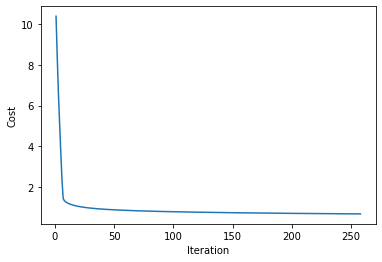

[[-2.41154663e-06 -2.75700718e-06  1.19343273e-05 -6.38273333e-06
  -1.58662122e-05  3.94793696e-05 -1.08197597e-06 -2.50412658e-05
   3.26562321e-05 -3.24505177e-06  3.72443833e-06  6.82345039e-06]
 [-1.31881820e-05  2.39755264e-05  1.60796668e-05 -5.02992207e-05
   1.12744847e-04  3.68628698e-05  2.20428476e-06 -1.40672864e-05
   7.10690448e-06  1.48856495e-05 -4.36745886e-05  7.02693564e-06]
 [ 6.50626000e-05  3.99956803e-05 -9.18375146e-05  1.20820737e-06
  -4.09560771e-06  1.47279702e-07  1.82917260e-06  2.39861743e-06
  -6.77071493e-06  2.25689122e-06  2.32701771e-05 -2.38978551e-05]]
[[-3.47877347e-05 -7.60547503e-06  1.42650986e-04]]


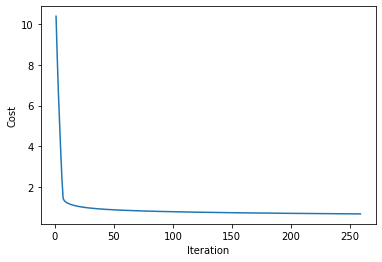

[[-2.40629317e-06 -2.76395844e-06  1.19166088e-05 -6.36816714e-06
  -1.58793782e-05  3.94126434e-05 -1.07628305e-06 -2.49720864e-05
   3.25012711e-05 -3.23833802e-06  3.71187079e-06  6.81317134e-06]
 [-1.31608266e-05  2.39179510e-05  1.60534972e-05 -5.01936732e-05
   1.12506372e-04  3.67960198e-05  2.20036446e-06 -1.40651330e-05
   7.10224973e-06  1.48562820e-05 -4.36680202e-05  7.05499999e-06]
 [ 6.49257951e-05  3.99142581e-05 -9.14826797e-05  1.20614482e-06
  -4.09529248e-06  1.47777724e-07  1.82580409e-06  2.39456035e-06
  -6.76179018e-06  2.25248571e-06  2.32526309e-05 -2.38693907e-05]]
[[-3.47143721e-05 -7.70978282e-06  1.42447703e-04]]


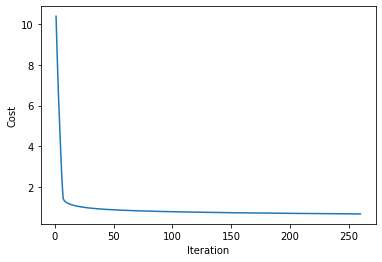

[[-2.40106344e-06 -2.77088245e-06  1.18989982e-05 -6.35366819e-06
  -1.58924865e-05  3.93463310e-05 -1.07062361e-06 -2.49031451e-05
   3.23473995e-05 -3.23165380e-06  3.69934692e-06  6.80295791e-06]
 [-1.31335917e-05  2.38605729e-05  1.60275047e-05 -5.00885941e-05
   1.12268717e-04  3.67296569e-05  2.19646027e-06 -1.40629813e-05
   7.09761013e-06  1.48270413e-05 -4.36614592e-05  7.08282204e-06]
 [ 6.47895989e-05  3.98330896e-05 -9.11303130e-05  1.20409070e-06
  -4.09497604e-06  1.48267457e-07  1.82244997e-06  2.39051908e-06
  -6.75292747e-06  2.24809970e-06  2.32351455e-05 -2.38411095e-05]]
[[-3.46413358e-05 -7.81369926e-06  1.42245659e-04]]


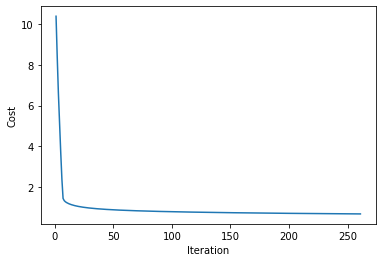

[[-2.39585728e-06 -2.77777935e-06  1.18814944e-05 -6.33923603e-06
  -1.59055376e-05  3.92804282e-05 -1.06499738e-06 -2.48344410e-05
   3.21946058e-05 -3.22499890e-06  3.68686649e-06  6.79280940e-06]
 [-1.31064765e-05  2.38033911e-05  1.60016872e-05 -4.99839805e-05
   1.12031880e-04  3.66637753e-05  2.19257208e-06 -1.40608312e-05
   7.09298561e-06  1.47979267e-05 -4.36549053e-05  7.11040463e-06]
 [ 6.46540075e-05  3.97521744e-05 -9.07803883e-05  1.20204496e-06
  -4.09465838e-06  1.48749013e-07  1.81911015e-06  2.38649355e-06
  -6.74412614e-06  2.24373305e-06  2.32177204e-05 -2.38130095e-05]]
[[-3.45686238e-05 -7.91722646e-06  1.42044842e-04]]


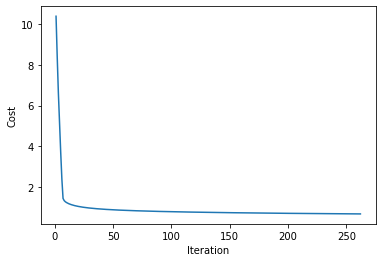

[[-2.39067453e-06 -2.78464929e-06  1.18640961e-05 -6.32487021e-06
  -1.59185318e-05  3.92149307e-05 -1.05940411e-06 -2.47659734e-05
   3.20428785e-05 -3.21837314e-06  3.67442925e-06  6.78272512e-06]
 [-1.30794802e-05  2.37464046e-05  1.59760429e-05 -4.98798290e-05
   1.11795854e-04  3.65983692e-05  2.18869979e-06 -1.40586827e-05
   7.08837607e-06  1.47689374e-05 -4.36483585e-05  7.13775051e-06]
 [ 6.45190167e-05  3.96715126e-05 -9.04328797e-05  1.20000753e-06
  -4.09433951e-06  1.49222501e-07  1.81578453e-06  2.38248372e-06
  -6.73538554e-06  2.23938565e-06  2.32003554e-05 -2.37850890e-05]]
[[-3.44962337e-05 -8.02036652e-06  1.41845238e-04]]


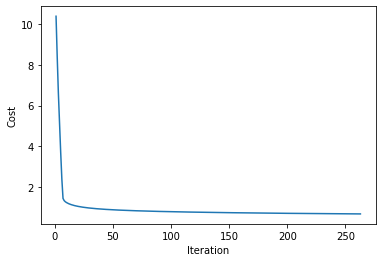

[[-2.38551504e-06 -2.79149242e-06  1.18468025e-05 -6.31057028e-06
  -1.59314695e-05  3.91498344e-05 -1.05384355e-06 -2.46977414e-05
   3.18922064e-05 -3.21177630e-06  3.66203499e-06  6.77270437e-06]
 [-1.30526021e-05  2.36896124e-05  1.59505698e-05 -4.97761367e-05
   1.11560637e-04  3.65334329e-05  2.18484329e-06 -1.40565358e-05
   7.08378145e-06  1.47400724e-05 -4.36418185e-05  7.16486243e-06]
 [ 6.43846224e-05  3.95911036e-05 -9.00877614e-05  1.19797837e-06
  -4.09401942e-06  1.49688027e-07  1.81247302e-06  2.37848950e-06
  -6.72670502e-06  2.23505735e-06  2.31830502e-05 -2.37573461e-05]]
[[-3.44241635e-05 -8.12312149e-06  1.41646837e-04]]


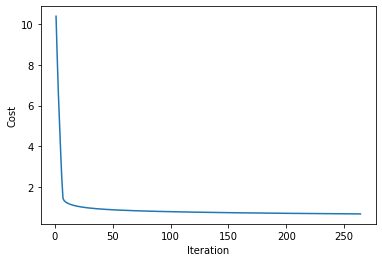

[[-2.38037864e-06 -2.79830890e-06  1.18296123e-05 -6.29633577e-06
  -1.59443511e-05  3.90851353e-05 -1.04831544e-06 -2.46297444e-05
   3.17425783e-05 -3.20520822e-06  3.64968349e-06  6.76274647e-06]
 [-1.30258412e-05  2.36330134e-05  1.59252659e-05 -4.96729005e-05
   1.11326224e-04  3.64689609e-05  2.18100249e-06 -1.40543904e-05
   7.07920164e-06  1.47113310e-05 -4.36352852e-05  7.19174307e-06]
 [ 6.42508208e-05  3.95109474e-05 -8.97450084e-05  1.19595743e-06
  -4.09369813e-06  1.50145700e-07  1.80917553e-06  2.37451085e-06
  -6.71808396e-06  2.23074803e-06  2.31658047e-05 -2.37297791e-05]]
[[-3.43524110e-05 -8.22549340e-06  1.41449625e-04]]


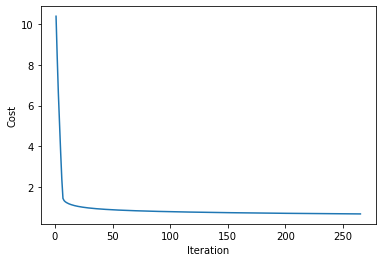

[[-2.37526519e-06 -2.80509886e-06  1.18125247e-05 -6.28216626e-06
  -1.59571768e-05  3.90208293e-05 -1.04281952e-06 -2.45619814e-05
   3.15939833e-05 -3.19866869e-06  3.63737453e-06  6.75285077e-06]
 [-1.29991969e-05  2.35766066e-05  1.59001294e-05 -4.95701172e-05
   1.11092610e-04  3.64049475e-05  2.17717728e-06 -1.40522467e-05
   7.07463658e-06  1.46827124e-05 -4.36287586e-05  7.21839508e-06]
 [ 6.41176079e-05  3.94310436e-05 -8.94045956e-05  1.19394464e-06
  -4.09337564e-06  1.50595622e-07  1.80589196e-06  2.37054769e-06
  -6.70952174e-06  2.22645756e-06  2.31486184e-05 -2.37023861e-05]]
[[-3.42809741e-05 -8.32748427e-06  1.41253590e-04]]


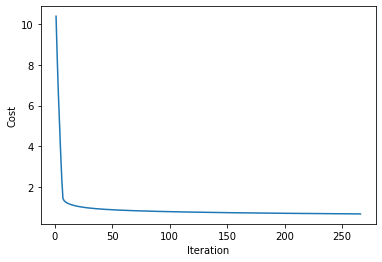

[[-2.37017453e-06 -2.81186245e-06  1.17955385e-05 -6.26806131e-06
  -1.59699471e-05  3.89569125e-05 -1.03735555e-06 -2.44944516e-05
   3.14464106e-05 -3.19215753e-06  3.62510788e-06  6.74301660e-06]
 [-1.29726685e-05  2.35203912e-05  1.58751583e-05 -4.94677840e-05
   1.10859791e-04  3.63413873e-05  2.17336758e-06 -1.40501045e-05
   7.07008618e-06  1.46542157e-05 -4.36222383e-05  7.24482107e-06]
 [ 6.39849797e-05  3.93513918e-05 -8.90664988e-05  1.19193997e-06
  -4.09305194e-06  1.51037896e-07  1.80262223e-06  2.36659997e-06
  -6.70101774e-06  2.22218581e-06  2.31314913e-05 -2.36751654e-05]]
[[-3.42098509e-05 -8.42909608e-06  1.41058721e-04]]


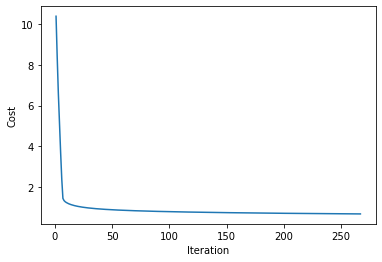

[[-2.36510651e-06 -2.81859981e-06  1.17786527e-05 -6.25402047e-06
  -1.59826622e-05  3.88933810e-05 -1.03192329e-06 -2.44271543e-05
   3.12998496e-05 -3.18567455e-06  3.61288333e-06  6.73324333e-06]
 [-1.29462550e-05  2.34643660e-05  1.58503509e-05 -4.93658978e-05
   1.10627764e-04  3.62782751e-05  2.16957327e-06 -1.40479638e-05
   7.06555037e-06  1.46258402e-05 -4.36157244e-05  7.27102361e-06]
 [ 6.38529323e-05  3.92719917e-05 -8.87306935e-05  1.18994335e-06
  -4.09272704e-06  1.51472623e-07  1.79936624e-06  2.36266762e-06
  -6.69257135e-06  2.21793266e-06  2.31144229e-05 -2.36481153e-05]]
[[-3.41390390e-05 -8.53033079e-06  1.40865006e-04]]


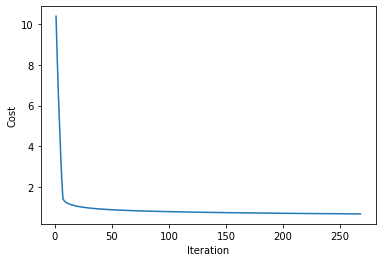

[[-2.36006098e-06 -2.82531108e-06  1.17618663e-05 -6.24004331e-06
  -1.59953226e-05  3.88302309e-05 -1.02652248e-06 -2.43600885e-05
   3.11542897e-05 -3.17921957e-06  3.60070067e-06  6.72353030e-06]
 [-1.29199558e-05  2.34085301e-05  1.58257053e-05 -4.92644557e-05
   1.10396524e-04  3.62156055e-05  2.16579426e-06 -1.40458247e-05
   7.06102906e-06  1.45975851e-05 -4.36092167e-05  7.29700524e-06]
 [ 6.37214620e-05  3.91928429e-05 -8.83971561e-05  1.18795474e-06
  -4.09240095e-06  1.51899903e-07  1.79612391e-06  2.35875059e-06
  -6.68418198e-06  2.21369799e-06  2.30974132e-05 -2.36212341e-05]]
[[-3.40685367e-05 -8.63119034e-06  1.40672433e-04]]


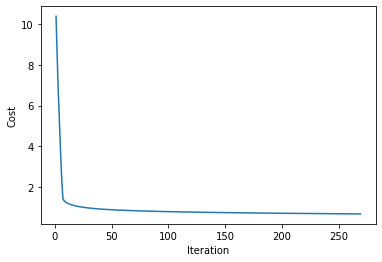

[[-2.35503779e-06 -2.83199640e-06  1.17451784e-05 -6.22612941e-06
  -1.60079285e-05  3.87674584e-05 -1.02115289e-06 -2.42932535e-05
   3.10097205e-05 -3.17279240e-06  3.58855968e-06  6.71387689e-06]
 [-1.28937701e-05  2.33528825e-05  1.58012198e-05 -4.91634547e-05
   1.10166067e-04  3.61533734e-05  2.16203046e-06 -1.40436871e-05
   7.05652217e-06  1.45694495e-05 -4.36027150e-05  7.32276844e-06]
 [ 6.35905648e-05  3.91139450e-05 -8.80658631e-05  1.18597409e-06
  -4.09207367e-06  1.52319833e-07  1.79289514e-06  2.35484879e-06
  -6.67584904e-06  2.20948167e-06  2.30804617e-05 -2.35945201e-05]]
[[-3.39983417e-05 -8.73167663e-06  1.40480991e-04]]


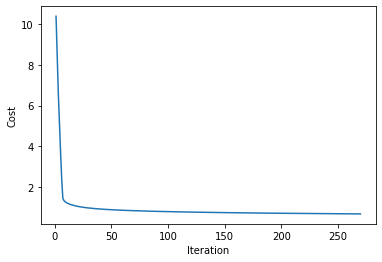

[[-2.35003679e-06 -2.83865591e-06  1.17285880e-05 -6.21227834e-06
  -1.60204803e-05  3.87050599e-05 -1.01581429e-06 -2.42266484e-05
   3.08661320e-05 -3.16639286e-06  3.57646016e-06  6.70428248e-06]
 [-1.28676972e-05  2.32974224e-05  1.57768926e-05 -4.90628919e-05
   1.09936389e-04  3.60915737e-05  2.15828176e-06 -1.40415510e-05
   7.05202963e-06  1.45414328e-05 -4.35962193e-05  7.34831568e-06]
 [ 6.34602371e-05  3.90352974e-05 -8.77367912e-05  1.18400134e-06
  -4.09174519e-06  1.52732510e-07  1.78967985e-06  2.35096218e-06
  -6.66757195e-06  2.20528359e-06  2.30635682e-05 -2.35679716e-05]]
[[-3.39284521e-05 -8.83179156e-06  1.40290669e-04]]


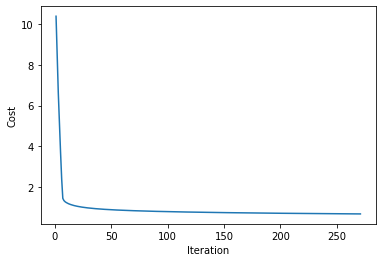

[[-2.34505783e-06 -2.84528973e-06  1.17120941e-05 -6.19848968e-06
  -1.60329783e-05  3.86430316e-05 -1.01050642e-06 -2.41602724e-05
   3.07235140e-05 -3.16002078e-06  3.56440189e-06  6.69474646e-06]
 [-1.28417363e-05  2.32421486e-05  1.57527220e-05 -4.89627644e-05
   1.09707486e-04  3.60302014e-05  2.15454808e-06 -1.40394164e-05
   7.04755135e-06  1.45135342e-05 -4.35897293e-05  7.37364938e-06]
 [ 6.33304750e-05  3.89568998e-05 -8.74099177e-05  1.18203646e-06
  -4.09141553e-06  1.53138029e-07  1.78647795e-06  2.34709069e-06
  -6.65935014e-06  2.20110361e-06  2.30467325e-05 -2.35415870e-05]]
[[-3.38588660e-05 -8.93153700e-06  1.40101455e-04]]


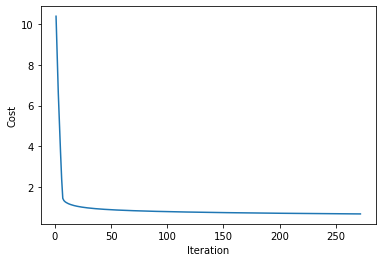

[[-2.34010078e-06 -2.85189801e-06  1.16956957e-05 -6.18476302e-06
  -1.60454227e-05  3.85813698e-05 -1.00522906e-06 -2.40941246e-05
   3.05818566e-05 -3.15367597e-06  3.55238468e-06  6.68526823e-06]
 [-1.28158867e-05  2.31870604e-05  1.57287062e-05 -4.88630694e-05
   1.09479354e-04  3.59692515e-05  2.15082932e-06 -1.40372832e-05
   7.04308726e-06  1.44857528e-05 -4.35832451e-05  7.39877193e-06]
 [ 6.32012748e-05  3.88787517e-05 -8.70852201e-05  1.18007938e-06
  -4.09108469e-06  1.53536482e-07  1.78328936e-06  2.34323426e-06
  -6.65118304e-06  2.19694162e-06  2.30299543e-05 -2.35153648e-05]]
[[-3.37895812e-05 -9.03091479e-06  1.39913340e-04]]


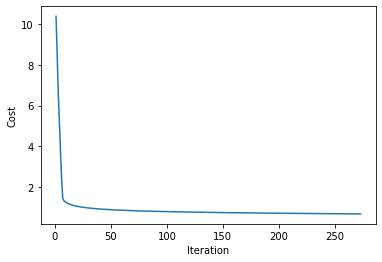

[[-2.33516548e-06 -2.85848087e-06  1.16793920e-05 -6.17109794e-06
  -1.60578140e-05  3.85200710e-05 -9.99981975e-07 -2.40282041e-05
   3.04411500e-05 -3.14735826e-06  3.54040832e-06  6.67584719e-06]
 [-1.27901477e-05  2.31321567e-05  1.57048436e-05 -4.87638040e-05
   1.09251990e-04  3.59087192e-05  2.14712538e-06 -1.40351516e-05
   7.03863729e-06  1.44580880e-05 -4.35767665e-05  7.42368567e-06]
 [ 6.30726329e-05  3.88008525e-05 -8.67626760e-05  1.17813006e-06
  -4.09075267e-06  1.53927962e-07  1.78011398e-06  2.33939282e-06
  -6.64307010e-06  2.19279750e-06  2.30132334e-05 -2.34893033e-05]]
[[-3.37205959e-05 -9.12992676e-06  1.39726311e-04]]


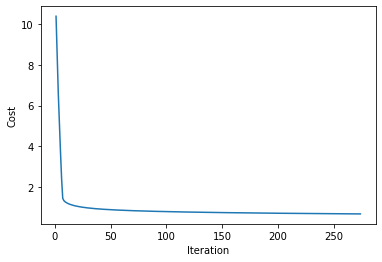

[[-2.33025179e-06 -2.86503844e-06  1.16631820e-05 -6.15749403e-06
  -1.60701523e-05  3.84591316e-05 -9.94764937e-07 -2.39625101e-05
   3.03013845e-05 -3.14106747e-06  3.52847260e-06  6.66648277e-06]
 [-1.27645185e-05  2.30774367e-05  1.56811326e-05 -4.86649654e-05
   1.09025389e-04  3.58485996e-05  2.14343618e-06 -1.40330214e-05
   7.03420135e-06  1.44305389e-05 -4.35702934e-05  7.44839294e-06]
 [ 6.29445456e-05  3.87232017e-05 -8.64422638e-05  1.17618845e-06
  -4.09041948e-06  1.54312559e-07  1.77695174e-06  2.33556630e-06
  -6.63501076e-06  2.18867113e-06  2.29965695e-05 -2.34634009e-05]]
[[-3.36519081e-05 -9.22857472e-06  1.39540359e-04]]


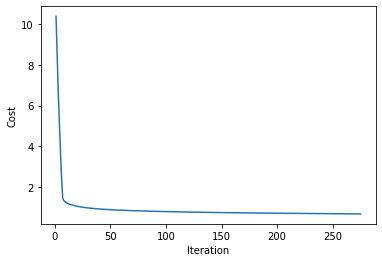

[[-2.32535958e-06 -2.87157085e-06  1.16470648e-05 -6.14395090e-06
  -1.60824381e-05  3.83985482e-05 -9.89577717e-07 -2.38970417e-05
   3.01625507e-05 -3.13480343e-06  3.51657733e-06  6.65717437e-06]
 [-1.27389986e-05  2.30228995e-05  1.56575714e-05 -4.85665509e-05
   1.08799547e-04  3.57888881e-05  2.13976162e-06 -1.40308926e-05
   7.02977937e-06  1.44031049e-05 -4.35638257e-05  7.47289600e-06]
 [ 6.28170093e-05  3.86457988e-05 -8.61239616e-05  1.17425450e-06
  -4.09008511e-06  1.54690362e-07  1.77380255e-06  2.33175465e-06
  -6.62700449e-06  2.18456240e-06  2.29799623e-05 -2.34376561e-05]]
[[-3.35835159e-05 -9.32686046e-06  1.39355472e-04]]


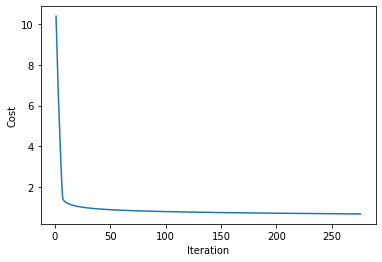

[[-2.32048870e-06 -2.87807823e-06  1.16310395e-05 -6.13046812e-06
  -1.60946715e-05  3.83383173e-05 -9.84420089e-07 -2.38317980e-05
   3.00246392e-05 -3.12856596e-06  3.50472230e-06  6.64792143e-06]
 [-1.27135870e-05  2.29685440e-05  1.56341586e-05 -4.84685577e-05
   1.08574461e-04  3.57295799e-05  2.13610161e-06 -1.40287653e-05
   7.02537127e-06  1.43757853e-05 -4.35573633e-05  7.49719712e-06]
 [ 6.26900204e-05  3.85686431e-05 -8.58077483e-05  1.17232817e-06
  -4.08974958e-06  1.55061459e-07  1.77066632e-06  2.32795780e-06
  -6.61905075e-06  2.18047119e-06  2.29634116e-05 -2.34120674e-05]]
[[-3.35154174e-05 -9.42478574e-06  1.39171641e-04]]


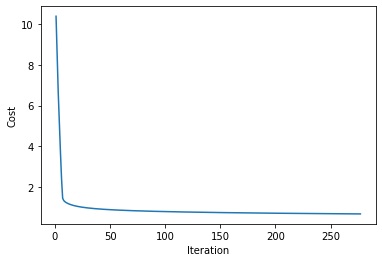

[[-2.31563902e-06 -2.88456071e-06  1.16151052e-05 -6.11704531e-06
  -1.61068529e-05  3.82784355e-05 -9.79291830e-07 -2.37667783e-05
   2.98876406e-05 -3.12235490e-06  3.49290733e-06  6.63872340e-06]
 [-1.26882832e-05  2.29143695e-05  1.56108925e-05 -4.83709831e-05
   1.08350127e-04  3.56706707e-05  2.13245607e-06 -1.40266394e-05
   7.02097698e-06  1.43485791e-05 -4.35509061e-05  7.52129851e-06]
 [ 6.25635753e-05  3.84917341e-05 -8.54936028e-05  1.17040941e-06
  -4.08941289e-06  1.55425936e-07  1.76754297e-06  2.32417569e-06
  -6.61114902e-06  2.17639739e-06  2.29469172e-05 -2.33866332e-05]]
[[-3.34476107e-05 -9.52235231e-06  1.38988856e-04]]


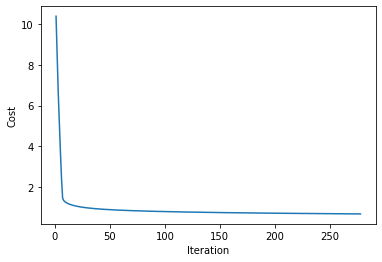

[[-2.31081039e-06 -2.89101839e-06  1.15992611e-05 -6.10368207e-06
  -1.61189826e-05  3.82188994e-05 -9.74192720e-07 -2.37019815e-05
   2.97515458e-05 -3.11617007e-06  3.48113222e-06  6.62957972e-06]
 [-1.26630865e-05  2.28603750e-05  1.55877715e-05 -4.82738242e-05
   1.08126541e-04  3.56121557e-05  2.12882489e-06 -1.40245149e-05
   7.01659643e-06  1.43214859e-05 -4.35444540e-05  7.54520235e-06]
 [ 6.24376705e-05  3.84150712e-05 -8.51815043e-05  1.16849816e-06
  -4.08907505e-06  1.55783879e-07  1.76443243e-06  2.32040824e-06
  -6.60329877e-06  2.17234088e-06  2.29304787e-05 -2.33613522e-05]]
[[-3.33800939e-05 -9.61956190e-06  1.38807106e-04]]


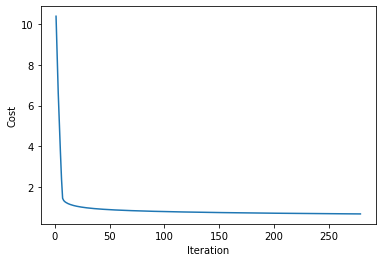

[[-2.30600268e-06 -2.89745142e-06  1.15835063e-05 -6.09037801e-06
  -1.61310608e-05  3.81597057e-05 -9.69122538e-07 -2.36374069e-05
   2.96163459e-05 -3.11001132e-06  3.46939676e-06  6.62048983e-06]
 [-1.26379961e-05  2.28065596e-05  1.55647941e-05 -4.81770785e-05
   1.07903699e-04  3.55540306e-05  2.12520800e-06 -1.40223918e-05
   7.01222954e-06  1.42945048e-05 -4.35380070e-05  7.56891082e-06]
 [ 6.23123026e-05  3.83386538e-05 -8.48714326e-05  1.16659440e-06
  -4.08873605e-06  1.56135370e-07  1.76133461e-06  2.31665541e-06
  -6.59549949e-06  2.16830154e-06  2.29140960e-05 -2.33362227e-05]]
[[-3.33128651e-05 -9.71641622e-06  1.38626381e-04]]


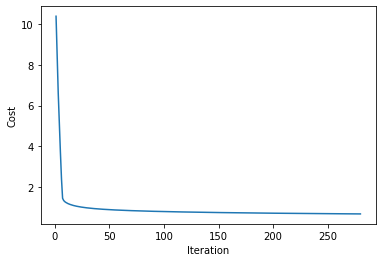

[[-2.30121575e-06 -2.90385990e-06  1.15678400e-05 -6.07713274e-06
  -1.61430878e-05  3.81008512e-05 -9.64081069e-07 -2.35730536e-05
   2.94820319e-05 -3.10387846e-06  3.45770079e-06  6.61145321e-06]
 [-1.26130114e-05  2.27529226e-05  1.55419589e-05 -4.80807433e-05
   1.07681598e-04  3.54962910e-05  2.12160530e-06 -1.40202701e-05
   7.00787623e-06  1.42676351e-05 -4.35315649e-05  7.59242602e-06]
 [ 6.21874680e-05  3.82624812e-05 -8.45633673e-05  1.16469806e-06
  -4.08839590e-06  1.56480492e-07  1.75824943e-06  2.31291712e-06
  -6.58775068e-06  2.16427928e-06  2.28977687e-05 -2.33112435e-05]]
[[-3.32459226e-05 -9.81291698e-06  1.38446672e-04]]


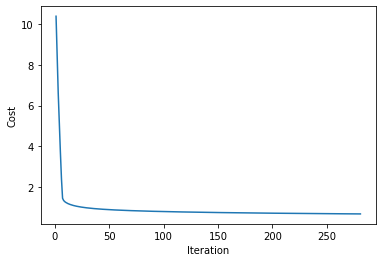

[[-2.29644947e-06 -2.91024396e-06  1.15522612e-05 -6.06394588e-06
  -1.61550639e-05  3.80423326e-05 -9.59068098e-07 -2.35089206e-05
   2.93485951e-05 -3.09777135e-06  3.44604409e-06  6.60246932e-06]
 [-1.25881317e-05  2.26994629e-05  1.55192642e-05 -4.79848159e-05
   1.07460234e-04  3.54389327e-05  2.11801671e-06 -1.40181498e-05
   7.00353643e-06  1.42408761e-05 -4.35251277e-05  7.61575006e-06]
 [ 6.20631633e-05  3.81865527e-05 -8.42572886e-05  1.16280910e-06
  -4.08805460e-06  1.56819327e-07  1.75517680e-06  2.30919331e-06
  -6.58005183e-06  2.16027398e-06  2.28814966e-05 -2.32864129e-05]]
[[-3.31792644e-05 -9.90906584e-06  1.38267969e-04]]


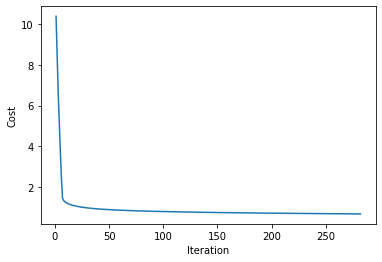

[[-2.29170371e-06 -2.91660372e-06  1.15367692e-05 -6.05081704e-06
  -1.61669893e-05  3.79841468e-05 -9.54083411e-07 -2.34450071e-05
   2.92160268e-05 -3.09168980e-06  3.43442649e-06  6.59353764e-06]
 [-1.25633563e-05  2.26461798e-05  1.54967087e-05 -4.78892938e-05
   1.07239604e-04  3.53819513e-05  2.11444214e-06 -1.40160309e-05
   6.99921007e-06  1.42142272e-05 -4.35186953e-05  7.63888501e-06]
 [ 6.19393851e-05  3.81108678e-05 -8.39531769e-05  1.16092749e-06
  -4.08771217e-06  1.57151954e-07  1.75211666e-06  2.30548392e-06
  -6.57240246e-06  2.15628552e-06  2.28652795e-05 -2.32617297e-05]]
[[-3.31128887e-05 -1.00048645e-05  1.38090262e-04]]


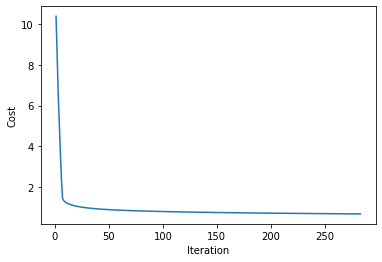

[[-2.28697834e-06 -2.92293929e-06  1.15213632e-05 -6.03774584e-06
  -1.61788643e-05  3.79262905e-05 -9.49126798e-07 -2.33813123e-05
   2.90843184e-05 -3.08563367e-06  3.42284779e-06  6.58465766e-06]
 [-1.25386846e-05  2.25930724e-05  1.54742909e-05 -4.77941743e-05
   1.07019703e-04  3.53253427e-05  2.11088150e-06 -1.40139133e-05
   6.99489708e-06  1.41876876e-05 -4.35122676e-05  7.66183289e-06]
 [ 6.18161301e-05  3.80354257e-05 -8.36510127e-05  1.15905316e-06
  -4.08736861e-06  1.57478452e-07  1.74906892e-06  2.30178888e-06
  -6.56480208e-06  2.15231380e-06  2.28491172e-05 -2.32371924e-05]]
[[-3.30467939e-05 -1.01003145e-05  1.37913543e-04]]


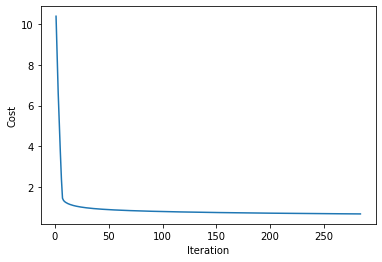

[[-2.28227322e-06 -2.92925079e-06  1.15060424e-05 -6.02473192e-06
  -1.61906892e-05  3.78687608e-05 -9.44198051e-07 -2.33178351e-05
   2.89534616e-05 -3.07960278e-06  3.41130782e-06  6.57582885e-06]
 [-1.25141159e-05  2.25401398e-05  1.54520093e-05 -4.76994548e-05
   1.06800528e-04  3.52691027e-05  2.10733472e-06 -1.40117971e-05
   6.99059739e-06  1.41612566e-05 -4.35058445e-05  7.68459572e-06]
 [ 6.16933948e-05  3.79602257e-05 -8.33507770e-05  1.15718609e-06
  -4.08702391e-06  1.57798900e-07  1.74603350e-06  2.29810813e-06
  -6.55725020e-06  2.14835871e-06  2.28330092e-05 -2.32127997e-05]]
[[-3.29809780e-05 -1.01954176e-05  1.37737801e-04]]


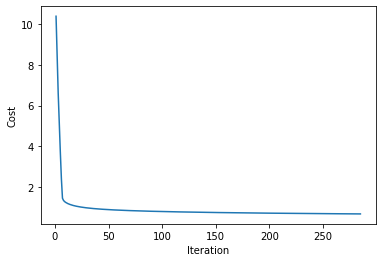

[[-2.27758822e-06 -2.93553833e-06  1.14908059e-05 -6.01177489e-06
  -1.62024642e-05  3.78115545e-05 -9.39296962e-07 -2.32545749e-05
   2.88234480e-05 -3.07359699e-06  3.39980639e-06  6.56705073e-06]
 [-1.24896496e-05  2.24873812e-05  1.54298625e-05 -4.76051328e-05
   1.06582076e-04  3.52132273e-05  2.10380170e-06 -1.40096822e-05
   6.98631092e-06  1.41349336e-05 -4.34994260e-05  7.70717547e-06]
 [ 6.15711761e-05  3.78852672e-05 -8.30524510e-05  1.15532622e-06
  -4.08667809e-06  1.58113372e-07  1.74301033e-06  2.29444160e-06
  -6.54974635e-06  2.14442015e-06  2.28169555e-05 -2.31885502e-05]]
[[-3.29154393e-05 -1.02901754e-05  1.37563027e-04]]


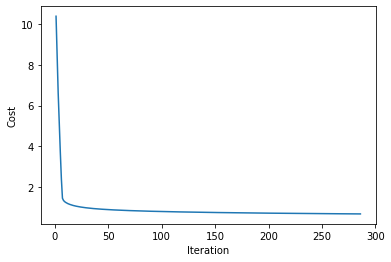

[[-2.27292321e-06 -2.94180203e-06  1.14756530e-05 -5.99887439e-06
  -1.62141896e-05  3.77546687e-05 -9.34423327e-07 -2.31915305e-05
   2.86942694e-05 -3.06761612e-06  3.38834332e-06  6.55832279e-06]
 [-1.24652850e-05  2.24347958e-05  1.54078492e-05 -4.75112057e-05
   1.06364343e-04  3.51577126e-05  2.10028236e-06 -1.40075686e-05
   6.98203761e-06  1.41087179e-05 -4.34930120e-05  7.72957411e-06]
 [ 6.14494704e-05  3.78105494e-05 -8.27560159e-05  1.15347351e-06
  -4.08633115e-06  1.58421945e-07  1.73999932e-06  2.29078924e-06
  -6.54229008e-06  2.14049801e-06  2.28009558e-05 -2.31644425e-05]]
[[-3.28501760e-05 -1.03845894e-05  1.37389213e-04]]


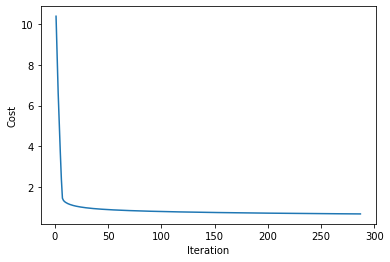

[[-2.26827808e-06 -2.94804199e-06  1.14605829e-05 -5.98603006e-06
  -1.62258656e-05  3.76981002e-05 -9.29576943e-07 -2.31287013e-05
   2.85659178e-05 -3.06166004e-06  3.37691843e-06  6.54964455e-06]
 [-1.24410215e-05  2.23823827e-05  1.53859680e-05 -4.74176711e-05
   1.06147325e-04  3.51025545e-05  2.09677663e-06 -1.40054564e-05
   6.97777738e-06  1.40826088e-05 -4.34866025e-05  7.75179355e-06]
 [ 6.13282747e-05  3.77360715e-05 -8.24614535e-05  1.15162791e-06
  -4.08598309e-06  1.58724692e-07  1.73700042e-06  2.28715098e-06
  -6.53488091e-06  2.13659218e-06  2.27850098e-05 -2.31404754e-05]]
[[-3.27851865e-05 -1.04786612e-05  1.37216350e-04]]


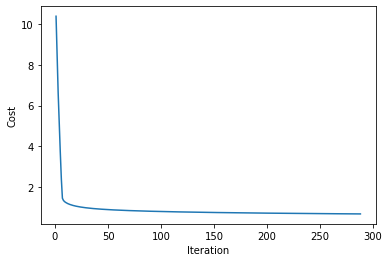

[[-2.26365269e-06 -2.95425833e-06  1.14455948e-05 -5.97324152e-06
  -1.62374925e-05  3.76418463e-05 -9.24757610e-07 -2.30660863e-05
   2.84383850e-05 -3.05572857e-06  3.36553153e-06  6.54101552e-06]
 [-1.24168584e-05  2.23301411e-05  1.53642175e-05 -4.73245265e-05
   1.05931020e-04  3.50477491e-05  2.09328441e-06 -1.40033455e-05
   6.97353016e-06  1.40566057e-05 -4.34801973e-05  7.77383569e-06]
 [ 6.12075857e-05  3.76618330e-05 -8.21687457e-05  1.14978940e-06
  -4.08563392e-06  1.59021688e-07  1.73401353e-06  2.28352675e-06
  -6.52751839e-06  2.13270256e-06  2.27691172e-05 -2.31166475e-05]]
[[-3.27204689e-05 -1.05723925e-05  1.37044428e-04]]


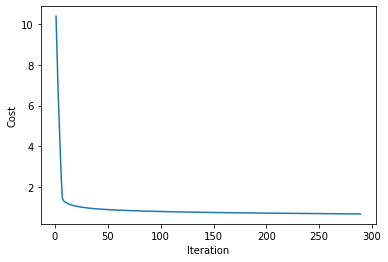

[[-2.25904691e-06 -2.96045117e-06  1.14306880e-05 -5.96050843e-06
  -1.62490704e-05  3.75859040e-05 -9.19965127e-07 -2.30036845e-05
   2.83116633e-05 -3.04982157e-06  3.35418246e-06  6.53243523e-06]
 [-1.23927951e-05  2.22780702e-05  1.53425964e-05 -4.72317694e-05
   1.05715423e-04  3.49932927e-05  2.08980562e-06 -1.40012359e-05
   6.96929589e-06  1.40307078e-05 -4.34737964e-05  7.79570241e-06]
 [ 6.10874002e-05  3.75878329e-05 -8.18778745e-05  1.14795791e-06
  -4.08528365e-06  1.59313003e-07  1.73103858e-06  2.27991649e-06
  -6.52020207e-06  2.12882904e-06  2.27532779e-05 -2.30929575e-05]]
[[-3.26560217e-05 -1.06657847e-05  1.36873440e-04]]


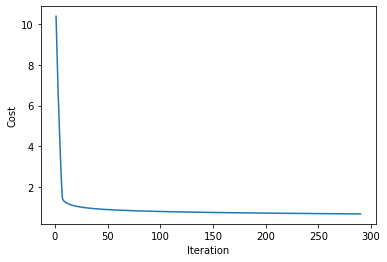

[[-2.25446063e-06 -2.96662060e-06  1.14158618e-05 -5.94783043e-06
  -1.62605997e-05  3.75302705e-05 -9.15199298e-07 -2.29414953e-05
   2.81857448e-05 -3.04393888e-06  3.34287103e-06  6.52390321e-06]
 [-1.23688310e-05  2.22261692e-05  1.53211034e-05 -4.71393973e-05
   1.05500532e-04  3.49391815e-05  2.08634019e-06 -1.39991276e-05
   6.96507449e-06  1.40049146e-05 -4.34673998e-05  7.81739555e-06]
 [ 6.09677149e-05  3.75140706e-05 -8.15888223e-05  1.14613341e-06
  -4.08493228e-06  1.59598708e-07  1.72807551e-06  2.27632015e-06
  -6.51293150e-06  2.12497153e-06  2.27374915e-05 -2.30694043e-05]]
[[-3.25918430e-05 -1.07588394e-05  1.36703376e-04]]


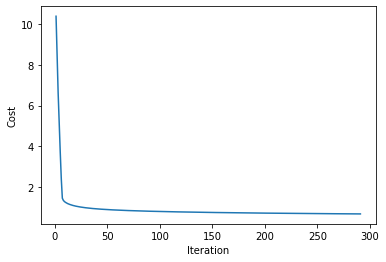

[[-2.24989371e-06 -2.97276673e-06  1.14011154e-05 -5.93520716e-06
  -1.62720806e-05  3.74749428e-05 -9.10459927e-07 -2.28795175e-05
   2.80606219e-05 -3.03808036e-06  3.33159708e-06  6.51541899e-06]
 [-1.23449654e-05  2.21744372e-05  1.52997371e-05 -4.70474078e-05
   1.05286342e-04  3.48854118e-05  2.08288803e-06 -1.39970206e-05
   6.96086590e-06  1.39792254e-05 -4.34610074e-05  7.83891694e-06]
 [ 6.08485268e-05  3.74405453e-05 -8.13015716e-05  1.14431586e-06
  -4.08457981e-06  1.59878874e-07  1.72512423e-06  2.27273765e-06
  -6.50570626e-06  2.12112992e-06  2.27217579e-05 -2.30459864e-05]]
[[-3.25279312e-05 -1.08515582e-05  1.36534228e-04]]


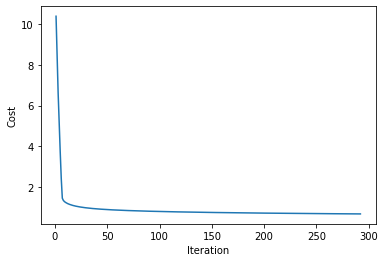

[[-2.24534604e-06 -2.97888968e-06  1.13864480e-05 -5.92263827e-06
  -1.62835133e-05  3.74199182e-05 -9.05746821e-07 -2.28177504e-05
   2.79362869e-05 -3.03224584e-06  3.32036042e-06  6.50698212e-06]
 [-1.23211978e-05  2.21228736e-05  1.52784963e-05 -4.69557986e-05
   1.05072850e-04  3.48319798e-05  2.07944907e-06 -1.39949149e-05
   6.95667005e-06  1.39536395e-05 -4.34546192e-05  7.86026836e-06]
 [ 6.07298327e-05  3.73672563e-05 -8.10161054e-05  1.14250522e-06
  -4.08422625e-06  1.60153569e-07  1.72218467e-06  2.26916893e-06
  -6.49852591e-06  2.11730411e-06  2.27060768e-05 -2.30227027e-05]]
[[-3.24642846e-05 -1.09439425e-05  1.36365987e-04]]


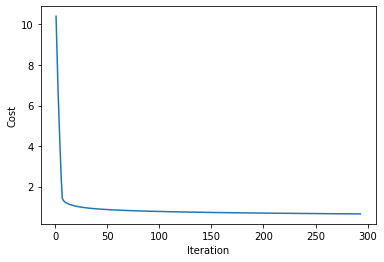

[[-2.24081750e-06 -2.98498955e-06  1.13718590e-05 -5.91012342e-06
  -1.62948980e-05  3.73651940e-05 -9.01059789e-07 -2.27561931e-05
   2.78127324e-05 -3.02643518e-06  3.30916088e-06  6.49859214e-06]
 [-1.22975275e-05  2.20714774e-05  1.52573798e-05 -4.68645672e-05
   1.04860054e-04  3.47788821e-05  2.07602322e-06 -1.39928104e-05
   6.95248687e-06  1.39281563e-05 -4.34482350e-05  7.88145160e-06]
 [ 6.06116295e-05  3.72942027e-05 -8.07324066e-05  1.14070144e-06
  -4.08387161e-06  1.60422862e-07  1.71925677e-06  2.26561393e-06
  -6.49139002e-06  2.11349401e-06  2.26904479e-05 -2.29995519e-05]]
[[-3.24009017e-05 -1.10359939e-05  1.36198646e-04]]


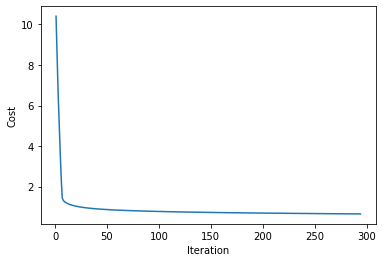

[[-2.23630796e-06 -2.99106644e-06  1.13573477e-05 -5.89766225e-06
  -1.63062350e-05  3.73107674e-05 -8.96398640e-07 -2.26948447e-05
   2.76899511e-05 -3.02064824e-06  3.29799830e-06  6.49024861e-06]
 [-1.22739539e-05  2.20202479e-05  1.52363863e-05 -4.67737112e-05
   1.04647950e-04  3.47261149e-05  2.07261041e-06 -1.39907072e-05
   6.94831630e-06  1.39027753e-05 -4.34418549e-05  7.90246840e-06]
 [ 6.04939141e-05  3.72213838e-05 -8.04504584e-05  1.13890449e-06
  -4.08351589e-06  1.60686818e-07  1.71634044e-06  2.26207260e-06
  -6.48429817e-06  2.10969950e-06  2.26748710e-05 -2.29765329e-05]]
[[-3.23377806e-05 -1.11277138e-05  1.36032196e-04]]


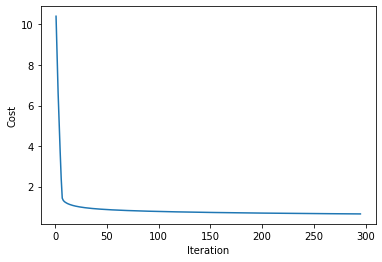

[[-2.23181731e-06 -2.99712045e-06  1.13429133e-05 -5.88525444e-06
  -1.63175245e-05  3.72566357e-05 -8.91763187e-07 -2.26337043e-05
   2.75679355e-05 -3.01488487e-06  3.28687251e-06  6.48195109e-06]
 [-1.22504765e-05  2.19691844e-05  1.52155145e-05 -4.66832284e-05
   1.04436534e-04  3.46736749e-05  2.06921056e-06 -1.39886053e-05
   6.94415826e-06  1.38774956e-05 -4.34354787e-05  7.92332048e-06]
 [ 6.03766835e-05  3.71487988e-05 -8.01702444e-05  1.13711431e-06
  -4.08315909e-06  1.60945505e-07  1.71343562e-06  2.25854486e-06
  -6.47724994e-06  2.10592051e-06  2.26593459e-05 -2.29536444e-05]]
[[-3.22749199e-05 -1.12191037e-05  1.35866629e-04]]


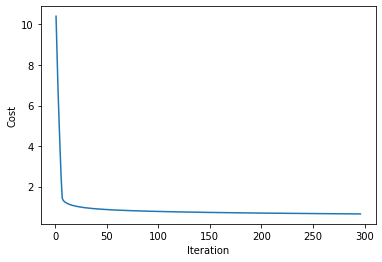

[[-2.22734542e-06 -3.00315170e-06  1.13285551e-05 -5.87289964e-06
  -1.63287667e-05  3.72027963e-05 -8.87153242e-07 -2.25727711e-05
   2.74466785e-05 -3.00914492e-06  3.27578333e-06  6.47369915e-06]
 [-1.22270946e-05  2.19182860e-05  1.51947633e-05 -4.65931164e-05
   1.04225803e-04  3.46215585e-05  2.06582359e-06 -1.39865046e-05
   6.94001269e-06  1.38523168e-05 -4.34291065e-05  7.94400955e-06]
 [ 6.02599346e-05  3.70764468e-05 -7.98917481e-05  1.13533088e-06
  -4.08280122e-06  1.61198986e-07  1.71054225e-06  2.25503065e-06
  -6.47024493e-06  2.10215692e-06  2.26438723e-05 -2.29308853e-05]]
[[-3.22123179e-05 -1.13101651e-05  1.35701938e-04]]


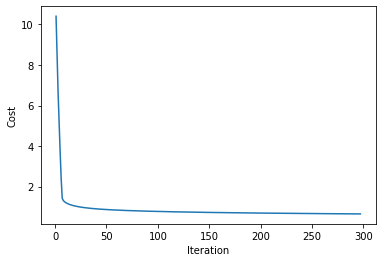

[[-2.22289219e-06 -3.00916027e-06  1.13142726e-05 -5.86059751e-06
  -1.63399619e-05  3.71492466e-05 -8.82568621e-07 -2.25120441e-05
   2.73261729e-05 -3.00342824e-06  3.26473060e-06  6.46549235e-06]
 [-1.22038076e-05  2.18675520e-05  1.51741314e-05 -4.65033728e-05
   1.04015754e-04  3.45697624e-05  2.06244943e-06 -1.39844051e-05
   6.93587953e-06  1.38272383e-05 -4.34227382e-05  7.96453728e-06]
 [ 6.01436645e-05  3.70043272e-05 -7.96149535e-05  1.13355416e-06
  -4.08244229e-06  1.61447326e-07  1.70766024e-06  2.25152991e-06
  -6.46328272e-06  2.09840864e-06  2.26284500e-05 -2.29082544e-05]]
[[-3.21499730e-05 -1.14008994e-05  1.35538114e-04]]


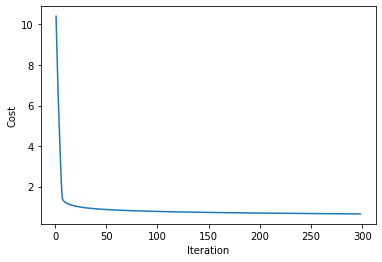

[[-2.21845749e-06 -3.01514628e-06  1.13000650e-05 -5.84834772e-06
  -1.63511101e-05  3.70959839e-05 -8.78009142e-07 -2.24515225e-05
   2.72064119e-05 -2.99773470e-06  3.25371416e-06  6.45733028e-06]
 [-1.21806150e-05  2.18169816e-05  1.51536177e-05 -4.64139955e-05
   1.03806383e-04  3.45182831e-05  2.05908799e-06 -1.39823069e-05
   6.93175871e-06  1.38022593e-05 -4.34163738e-05  7.98490533e-06]
 [ 6.00278702e-05  3.69324390e-05 -7.93398447e-05  1.13178409e-06
  -4.08208230e-06  1.61690588e-07  1.70478953e-06  2.24804259e-06
  -6.45636293e-06  2.09467557e-06  2.26130788e-05 -2.28857505e-05]]
[[-3.20878836e-05 -1.14913081e-05  1.35375149e-04]]


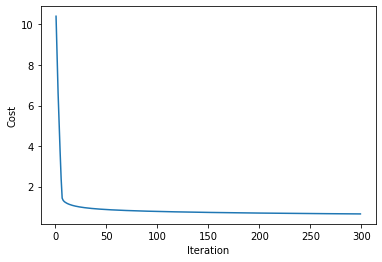

[[-2.21404121e-06 -3.02110982e-06  1.12859316e-05 -5.83614995e-06
  -1.63622118e-05  3.70430057e-05 -8.73474622e-07 -2.23912054e-05
   2.70873883e-05 -2.99206416e-06  3.24273384e-06  6.44921252e-06]
 [-1.21575162e-05  2.17665740e-05  1.51332210e-05 -4.63249820e-05
   1.03597688e-04  3.44671174e-05  2.05573922e-06 -1.39802099e-05
   6.92765016e-06  1.37773793e-05 -4.34100131e-05  8.00511534e-06]
 [ 5.99125488e-05  3.68607815e-05 -7.90664059e-05  1.13002065e-06
  -4.08172125e-06  1.61928834e-07  1.70193005e-06  2.24456861e-06
  -6.44948515e-06  2.09095763e-06  2.25977583e-05 -2.28633725e-05]]
[[-3.20260481e-05 -1.15813926e-05  1.35213036e-04]]


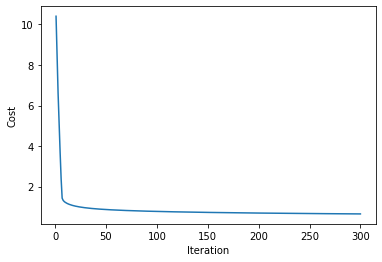

[[-2.20964323e-06 -3.02705100e-06  1.12718717e-05 -5.82400386e-06
  -1.63732670e-05  3.69903094e-05 -8.68964883e-07 -2.23310920e-05
   2.69690954e-05 -2.98641646e-06  3.23178947e-06  6.44113866e-06]
 [-1.21345105e-05  2.17163286e-05  1.51129402e-05 -4.62363303e-05
   1.03389666e-04  3.44162620e-05  2.05240302e-06 -1.39781141e-05
   6.92355383e-06  1.37525977e-05 -4.34036562e-05  8.02516891e-06]
 [ 5.97976972e-05  3.67893539e-05 -7.87946217e-05  1.12826379e-06
  -4.08135916e-06  1.62162125e-07  1.69908173e-06  2.24110793e-06
  -6.44264899e-06  2.08725471e-06  2.25824885e-05 -2.28411192e-05]]
[[-3.19644651e-05 -1.16711543e-05  1.35051768e-04]]


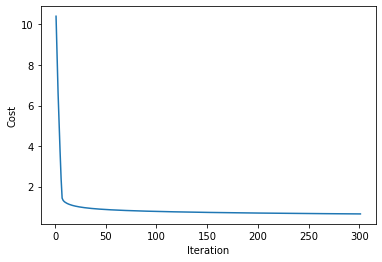

[[-2.20526345e-06 -3.03296990e-06  1.12578849e-05 -5.81190913e-06
  -1.63842760e-05  3.69378927e-05 -8.64479746e-07 -2.22711813e-05
   2.68515264e-05 -2.98079148e-06  3.22088090e-06  6.43310828e-06]
 [-1.21115975e-05  2.16662445e-05  1.50927741e-05 -4.61480380e-05
   1.03182312e-04  3.43657136e-05  2.04907932e-06 -1.39760195e-05
   6.91946964e-06  1.37279139e-05 -4.33973031e-05  8.04506763e-06]
 [ 5.96833127e-05  3.67181553e-05 -7.85244767e-05  1.12651348e-06
  -4.08099602e-06  1.62390521e-07  1.69624451e-06  2.23766047e-06
  -6.43585407e-06  2.08356673e-06  2.25672690e-05 -2.28189897e-05]]
[[-3.19031328e-05 -1.17605947e-05  1.34891336e-04]]


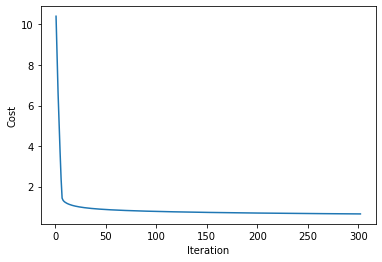

[[-2.20090174e-06 -3.03886663e-06  1.12439703e-05 -5.79986544e-06
  -1.63952390e-05  3.68857529e-05 -8.60019035e-07 -2.22114725e-05
   2.67346746e-05 -2.97518907e-06  3.21000796e-06  6.42512099e-06]
 [-1.20887765e-05  2.16163210e-05  1.50727217e-05 -4.60601029e-05
   1.02975625e-04  3.43154692e-05  2.04576806e-06 -1.39739262e-05
   6.91539754e-06  1.37033274e-05 -4.33909536e-05  8.06481308e-06]
 [ 5.95693923e-05  3.66471850e-05 -7.82559557e-05  1.12476968e-06
  -4.08063185e-06  1.62614083e-07  1.69341831e-06  2.23422617e-06
  -6.42910000e-06  2.07989359e-06  2.25520995e-05 -2.27969827e-05]]
[[-3.18420499e-05 -1.18497151e-05  1.34731734e-04]]


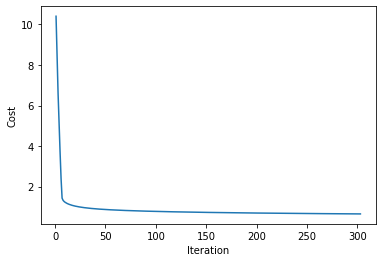

[[-2.19655800e-06 -3.04474129e-06  1.12301274e-05 -5.78787246e-06
  -1.64061562e-05  3.68338877e-05 -8.55582575e-07 -2.21519648e-05
   2.66185335e-05 -2.96960909e-06  3.19917049e-06  6.41717639e-06]
 [-1.20660471e-05  2.15665573e-05  1.50527817e-05 -4.59725229e-05
   1.02769600e-04  3.42655254e-05  2.04246916e-06 -1.39718340e-05
   6.91133746e-06  1.36788374e-05 -4.33846078e-05  8.08440681e-06]
 [ 5.94559331e-05  3.65764420e-05 -7.79890439e-05  1.12303234e-06
  -4.08026664e-06  1.62832869e-07  1.69060307e-06  2.23080498e-06
  -6.42238642e-06  2.07623519e-06  2.25369800e-05 -2.27750972e-05]]
[[-3.17812147e-05 -1.19385168e-05  1.34572954e-04]]


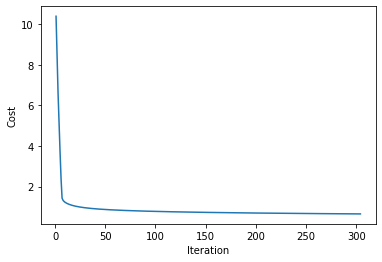

[[-2.19223212e-06 -3.05059397e-06  1.12163555e-05 -5.77592989e-06
  -1.64170278e-05  3.67822947e-05 -8.51170193e-07 -2.20926572e-05
   2.65030965e-05 -2.96405142e-06  3.18836834e-06  6.40927409e-06]
 [-1.20434085e-05  2.15169529e-05  1.50329532e-05 -4.58852957e-05
   1.02564235e-04  3.42158794e-05  2.03918255e-06 -1.39697430e-05
   6.90728933e-06  1.36544435e-05 -4.33782655e-05  8.10385033e-06]
 [ 5.93429325e-05  3.65059256e-05 -7.77237265e-05  1.12130144e-06
  -4.07990041e-06  1.63046937e-07  1.68779874e-06  2.22739683e-06
  -6.41571295e-06  2.07259146e-06  2.25219101e-05 -2.27533321e-05]]
[[-3.17206258e-05 -1.20270014e-05  1.34414989e-04]]


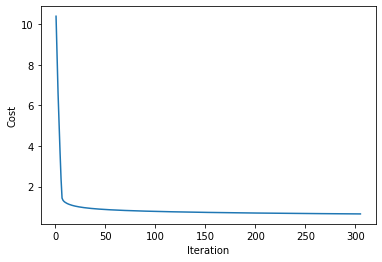

[[-2.18792399e-06 -3.05642477e-06  1.12026540e-05 -5.76403741e-06
  -1.64278540e-05  3.67309714e-05 -8.46781718e-07 -2.20335489e-05
   2.63883571e-05 -2.95851591e-06  3.17760135e-06  6.40141370e-06]
 [-1.20208604e-05  2.14675068e-05  1.50132351e-05 -4.57984193e-05
   1.02359527e-04  3.41665279e-05  2.03590815e-06 -1.39676532e-05
   6.90325310e-06  1.36301451e-05 -4.33719269e-05  8.12314517e-06]
 [ 5.92303874e-05  3.64356349e-05 -7.74599889e-05  1.11957693e-06
  -4.07953316e-06  1.63256343e-07  1.68500523e-06  2.22400167e-06
  -6.40907922e-06  2.06896229e-06  2.25068896e-05 -2.27316863e-05]]
[[-3.16602816e-05 -1.21151701e-05  1.34257831e-04]]


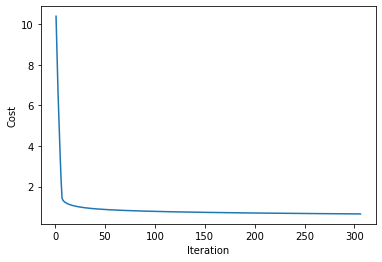

[[-2.18363349e-06 -3.06223378e-06  1.11890224e-05 -5.75219470e-06
  -1.64386350e-05  3.66799156e-05 -8.42416979e-07 -2.19746391e-05
   2.62743091e-05 -2.95300243e-06  3.16686936e-06  6.39359485e-06]
 [-1.19984021e-05  2.14182184e-05  1.49936262e-05 -4.57118914e-05
   1.02155472e-04  3.41174680e-05  2.03264590e-06 -1.39655646e-05
   6.89922870e-06  1.36059415e-05 -4.33655918e-05  8.14229280e-06]
 [ 5.91182952e-05  3.63655691e-05 -7.71978167e-05  1.11785878e-06
  -4.07916488e-06  1.63461144e-07  1.68222248e-06  2.22061942e-06
  -6.40248487e-06  2.06534760e-06  2.24919183e-05 -2.27101589e-05]]
[[-3.16001808e-05 -1.22030243e-05  1.34101475e-04]]


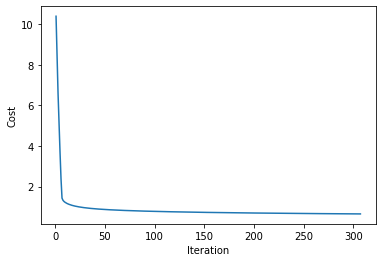

[[-2.17936052e-06 -3.06802109e-06  1.11754599e-05 -5.74040146e-06
  -1.64493709e-05  3.66291249e-05 -8.38075808e-07 -2.19159269e-05
   2.61609462e-05 -2.94751085e-06  3.15617221e-06  6.38581715e-06]
 [-1.19760331e-05  2.13690870e-05  1.49741256e-05 -4.56257100e-05
   1.01952068e-04  3.40686968e-05  2.02939572e-06 -1.39634771e-05
   6.89521608e-06  1.35818323e-05 -4.33592602e-05  8.16129470e-06]
 [ 5.90066532e-05  3.62957274e-05 -7.69371958e-05  1.11614695e-06
  -4.07879560e-06  1.63661396e-07  1.67945044e-06  2.21725005e-06
  -6.39592955e-06  2.06174730e-06  2.24769960e-05 -2.26887488e-05]]
[[-3.15403217e-05 -1.22905653e-05  1.33945912e-04]]


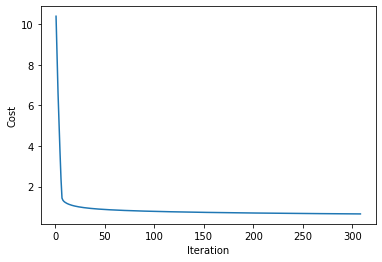

[[-2.17510498e-06 -3.07378680e-06  1.11619661e-05 -5.72865738e-06
  -1.64600621e-05  3.65785970e-05 -8.33758038e-07 -2.18574114e-05
   2.60482621e-05 -2.94204104e-06  3.14550976e-06  6.37808023e-06]
 [-1.19537528e-05  2.13201119e-05  1.49547322e-05 -4.55398728e-05
   1.01749312e-04  3.40202113e-05  2.02615755e-06 -1.39613908e-05
   6.89121516e-06  1.35578168e-05 -4.33529321e-05  8.18015232e-06]
 [ 5.88954584e-05  3.62261089e-05 -7.66781120e-05  1.11444140e-06
  -4.07842531e-06  1.63857153e-07  1.67668903e-06  2.21389348e-06
  -6.38941290e-06  2.05816130e-06  2.24621224e-05 -2.26674549e-05]]
[[-3.14807030e-05 -1.23777945e-05  1.33791137e-04]]


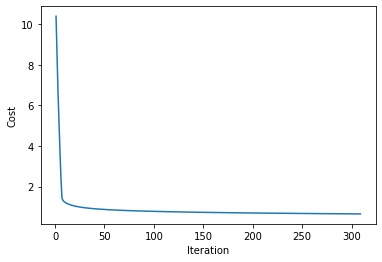

[[-2.17086675e-06 -3.07953100e-06  1.11485402e-05 -5.71696216e-06
  -1.64707087e-05  3.65283297e-05 -8.29463504e-07 -2.17990917e-05
   2.59362508e-05 -2.93659286e-06  3.13488184e-06  6.37038373e-06]
 [-1.19315608e-05  2.12712923e-05  1.49354450e-05 -4.54543780e-05
   1.01547200e-04  3.39720085e-05  2.02293131e-06 -1.39593057e-05
   6.88722590e-06  1.35338945e-05 -4.33466074e-05  8.19886709e-06]
 [ 5.87847084e-05  3.61567128e-05 -7.64205516e-05  1.11274210e-06
  -4.07805402e-06  1.64048469e-07  1.67393819e-06  2.21054965e-06
  -6.38293457e-06  2.05458952e-06  2.24472973e-05 -2.26462762e-05]]
[[-3.14213232e-05 -1.24647132e-05  1.33637142e-04]]


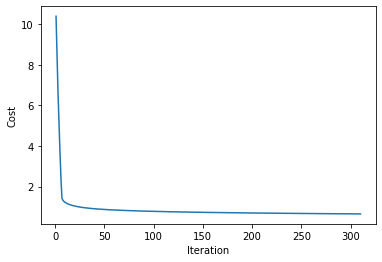

[[-2.16664574e-06 -3.08525379e-06  1.11351819e-05 -5.70531549e-06
  -1.64813108e-05  3.64783207e-05 -8.25192041e-07 -2.17409671e-05
   2.58249062e-05 -2.93116619e-06  3.12428831e-06  6.36272728e-06]
 [-1.19094565e-05  2.12226275e-05  1.49162630e-05 -4.53692233e-05
   1.01345730e-04  3.39240858e-05  2.01971693e-06 -1.39572217e-05
   6.88324822e-06  1.35100649e-05 -4.33402862e-05  8.21744042e-06]
 [ 5.86744003e-05  3.60875382e-05 -7.61645008e-05  1.11104901e-06
  -4.07768174e-06  1.64235396e-07  1.67119787e-06  2.20721850e-06
  -6.37649421e-06  2.05103187e-06  2.24325204e-05 -2.26252118e-05]]
[[-3.13621808e-05 -1.25513227e-05  1.33483920e-04]]


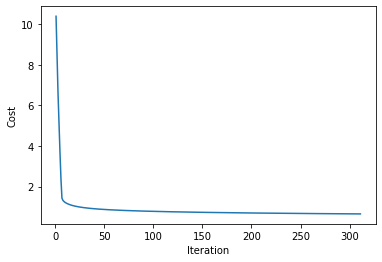

[[-2.16244183e-06 -3.09095524e-06  1.11218904e-05 -5.69371708e-06
  -1.64918687e-05  3.64285678e-05 -8.20943487e-07 -2.16830367e-05
   2.57142223e-05 -2.92576090e-06  3.11372902e-06  6.35511052e-06]
 [-1.18874393e-05  2.11741169e-05  1.48971851e-05 -4.52844067e-05
   1.01144898e-04  3.38764402e-05  2.01651436e-06 -1.39551388e-05
   6.87928208e-06  1.34863274e-05 -4.33339683e-05  8.23587370e-06]
 [ 5.85645314e-05  3.60185843e-05 -7.59099460e-05  1.10936209e-06
  -4.07730847e-06  1.64417989e-07  1.66846799e-06  2.20389999e-06
  -6.37009150e-06  2.04748825e-06  2.24177917e-05 -2.26042607e-05]]
[[-3.13032745e-05 -1.26376243e-05  1.33331465e-04]]


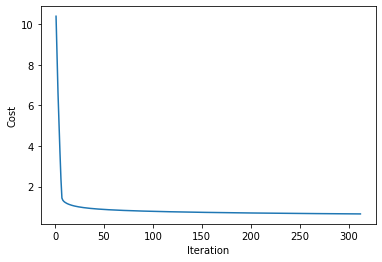

[[-2.15825493e-06 -3.09663547e-06  1.11086651e-05 -5.68216664e-06
  -1.65023826e-05  3.63790688e-05 -8.16717681e-07 -2.16252996e-05
   2.56041932e-05 -2.92037685e-06  3.10320380e-06  6.34753311e-06]
 [-1.18655088e-05  2.11257598e-05  1.48782106e-05 -4.51999262e-05
   1.00944702e-04  3.38290690e-05  2.01332351e-06 -1.39530571e-05
   6.87532741e-06  1.34626814e-05 -4.33276538e-05  8.25416832e-06]
 [ 5.84550992e-05  3.59498502e-05 -7.56568740e-05  1.10768131e-06
  -4.07693421e-06  1.64596297e-07  1.66574850e-06  2.20059404e-06
  -6.36372608e-06  2.04395859e-06  2.24031107e-05 -2.25834219e-05]]
[[-3.12446027e-05 -1.27236194e-05  1.33179770e-04]]


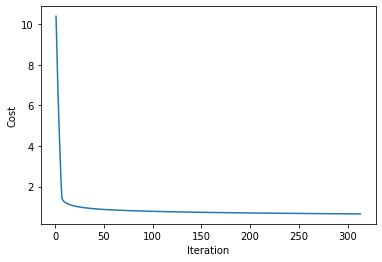

[[-2.15408493e-06 -3.10229454e-06  1.10955056e-05 -5.67066385e-06
  -1.65128526e-05  3.63298216e-05 -8.12514464e-07 -2.15677550e-05
   2.54948130e-05 -2.91501393e-06  3.09271253e-06  6.33999468e-06]
 [-1.18436643e-05  2.10775554e-05  1.48593382e-05 -4.51157797e-05
   1.00745139e-04  3.37819694e-05  2.01014432e-06 -1.39509765e-05
   6.87138414e-06  1.34391264e-05 -4.33213427e-05  8.27232564e-06]
 [ 5.83461010e-05  3.58813351e-05 -7.54052715e-05  1.10600664e-06
  -4.07655897e-06  1.64770373e-07  1.66303934e-06  2.19730060e-06
  -6.35739763e-06  2.04044281e-06  2.23884774e-05 -2.25626944e-05]]
[[-3.11861642e-05 -1.28093091e-05  1.33028830e-04]]


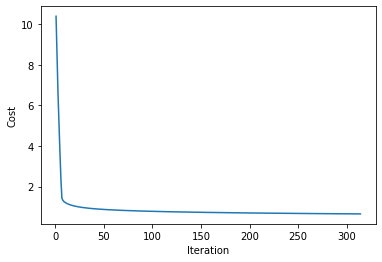

[[-2.14993172e-06 -3.10793256e-06  1.10824113e-05 -5.65920845e-06
  -1.65232789e-05  3.62808240e-05 -8.08333677e-07 -2.15104021e-05
   2.53860762e-05 -2.90967200e-06  3.08225503e-06  6.33249490e-06]
 [-1.18219055e-05  2.10295031e-05  1.48405672e-05 -4.50319653e-05
   1.00546205e-04  3.37351387e-05  2.00697673e-06 -1.39488970e-05
   6.86745224e-06  1.34156619e-05 -4.33150348e-05  8.29034698e-06]
 [ 5.82375342e-05  3.58130382e-05 -7.51551255e-05  1.10433804e-06
  -4.07618276e-06  1.64940266e-07  1.66034044e-06  2.19401961e-06
  -6.35110581e-06  2.03694082e-06  2.23738914e-05 -2.25420772e-05]]
[[-3.11279575e-05 -1.28946948e-05  1.32878637e-04]]


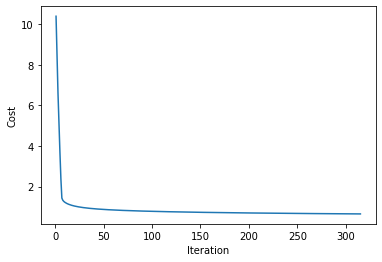

[[-2.14579522e-06 -3.11354961e-06  1.10693817e-05 -5.64780012e-06
  -1.65336617e-05  3.62320740e-05 -8.04175164e-07 -2.14532400e-05
   2.52779768e-05 -2.90435095e-06  3.07183118e-06  6.32503342e-06]
 [-1.18002318e-05  2.09816023e-05  1.48218965e-05 -4.49484810e-05
   1.00347899e-04  3.36885744e-05  2.00382067e-06 -1.39468186e-05
   6.86353162e-06  1.33922873e-05 -4.33087302e-05  8.30823369e-06]
 [ 5.81293961e-05  3.57449586e-05 -7.49064231e-05  1.10267547e-06
  -4.07580559e-06  1.65106026e-07  1.65765174e-06  2.19075102e-06
  -6.34485031e-06  2.03345252e-06  2.23593526e-05 -2.25215696e-05]]
[[-3.10699812e-05 -1.29797778e-05  1.32729185e-04]]


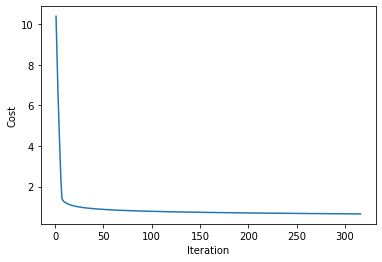

[[-2.14167531e-06 -3.11914577e-06  1.10564161e-05 -5.63643860e-06
  -1.65440012e-05  3.61835694e-05 -8.00038769e-07 -2.13962679e-05
   2.51705094e-05 -2.89905065e-06  3.06144082e-06  6.31760991e-06]
 [-1.17786427e-05  2.09338521e-05  1.48033252e-05 -4.48653247e-05
   1.00150216e-04  3.36422737e-05  2.00067607e-06 -1.39447414e-05
   6.85962224e-06  1.33690021e-05 -4.33024289e-05  8.32598706e-06]
 [ 5.80216843e-05  3.56770955e-05 -7.46591515e-05  1.10101891e-06
  -4.07542745e-06  1.65267701e-07  1.65497319e-06  2.18749476e-06
  -6.33863081e-06  2.02997786e-06  2.23448608e-05 -2.25011704e-05]]
[[-3.10122340e-05 -1.30645593e-05  1.32580468e-04]]


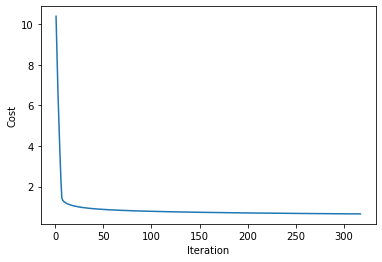

[[-2.13757190e-06 -3.12472115e-06  1.10435141e-05 -5.62512359e-06
  -1.65542976e-05  3.61353081e-05 -7.95924338e-07 -2.13394849e-05
   2.50636683e-05 -2.89377097e-06  3.05108381e-06  6.31022404e-06]
 [-1.17571377e-05  2.08862520e-05  1.47848525e-05 -4.47824946e-05
   9.99531552e-05  3.35962341e-05  1.99754287e-06 -1.39426652e-05
   6.85572405e-06  1.33458059e-05 -4.32961308e-05  8.34360840e-06]
 [ 5.79143963e-05  3.56094479e-05 -7.44132982e-05  1.09936831e-06
  -4.07504835e-06  1.65425341e-07  1.65230472e-06  2.18425078e-06
  -6.33244698e-06  2.02651673e-06  2.23304157e-05 -2.24808788e-05]]
[[-3.09547145e-05 -1.31490405e-05  1.32432480e-04]]


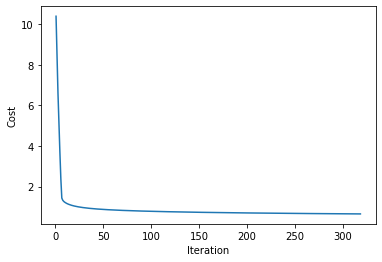

[[-2.13348489e-06 -3.13027581e-06  1.10306751e-05 -5.61385481e-06
  -1.65645510e-05  3.60872882e-05 -7.91831719e-07 -2.12828902e-05
   2.49574481e-05 -2.88851179e-06  3.04076001e-06  6.30287547e-06]
 [-1.17357163e-05  2.08388012e-05  1.47664774e-05 -4.46999886e-05
   9.97567126e-05  3.35504530e-05  1.99442100e-06 -1.39405902e-05
   6.85183697e-06  1.33226979e-05 -4.32898360e-05  8.36109896e-06]
 [ 5.78075293e-05  3.55420151e-05 -7.41688508e-05  1.09772364e-06
  -4.07466830e-06  1.65578992e-07  1.64964627e-06  2.18101902e-06
  -6.32629851e-06  2.02306907e-06  2.23160171e-05 -2.24606939e-05]]
[[-3.08974213e-05 -1.32332227e-05  1.32285215e-04]]


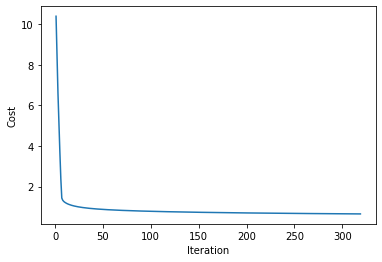

[[-2.12941417e-06 -3.13580986e-06  1.10178986e-05 -5.60263198e-06
  -1.65747617e-05  3.60395076e-05 -7.87760760e-07 -2.12264831e-05
   2.48518433e-05 -2.88327300e-06  3.03046926e-06  6.29556388e-06]
 [-1.17143780e-05  2.07914992e-05  1.47481989e-05 -4.46178049e-05
   9.95608857e-05  3.35049278e-05  1.99131040e-06 -1.39385162e-05
   6.84796096e-06  1.32996779e-05 -4.32835443e-05  8.37846002e-06]
 [ 5.77010810e-05  3.54747963e-05 -7.39257969e-05  1.09608487e-06
  -4.07428730e-06  1.65728702e-07  1.64699780e-06  2.17779942e-06
  -6.32018510e-06  2.01963478e-06  2.23016648e-05 -2.24406148e-05]]
[[-3.08403532e-05 -1.33171072e-05  1.32138666e-04]]


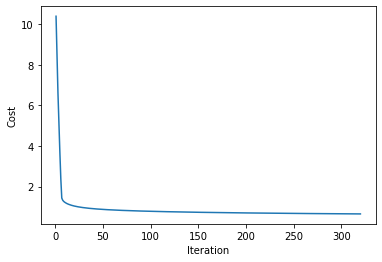

[[-2.12535967e-06 -3.14132336e-06  1.10051841e-05 -5.59145483e-06
  -1.65849297e-05  3.59919644e-05 -7.83711311e-07 -2.11702626e-05
   2.47468486e-05 -2.87805448e-06  3.02021143e-06  6.28828895e-06]
 [-1.16931223e-05  2.07443453e-05  1.47300163e-05 -4.45359415e-05
   9.93656716e-05  3.34596562e-05  1.98821101e-06 -1.39364433e-05
   6.84409596e-06  1.32767451e-05 -4.32772558e-05  8.39569282e-06]
 [ 5.75950489e-05  3.54077905e-05 -7.36841244e-05  1.09445196e-06
  -4.07390536e-06  1.65874517e-07  1.64435923e-06  2.17459193e-06
  -6.31410643e-06  2.01621379e-06  2.22873585e-05 -2.24206406e-05]]
[[-3.07835087e-05 -1.34006952e-05  1.31992828e-04]]


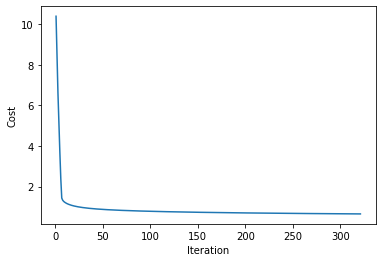

[[-2.12132127e-06 -3.14681642e-06  1.09925310e-05 -5.58032307e-06
  -1.65950553e-05  3.59446565e-05 -7.79683225e-07 -2.11142280e-05
   2.46424586e-05 -2.87285609e-06  3.00998637e-06  6.28105036e-06]
 [-1.16719487e-05  2.06973388e-05  1.47119286e-05 -4.44543966e-05
   9.91710675e-05  3.34146356e-05  1.98512276e-06 -1.39343715e-05
   6.84024191e-06  1.32538992e-05 -4.32709704e-05  8.41279858e-06]
 [ 5.74894306e-05  3.53409969e-05 -7.34438214e-05  1.09282489e-06
  -4.07352249e-06  1.66016481e-07  1.64173051e-06  2.17139649e-06
  -6.30806221e-06  2.01280603e-06  2.22730982e-05 -2.24007705e-05]]
[[-3.07268866e-05 -1.34839878e-05  1.31847695e-04]]


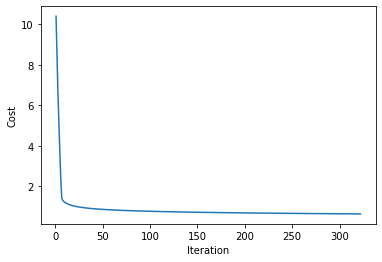

[[-2.11729888e-06 -3.15228910e-06  1.09799390e-05 -5.56923644e-06
  -1.66051387e-05  3.58975821e-05 -7.75676352e-07 -2.10583785e-05
   2.45386683e-05 -2.86767774e-06  2.99979395e-06  6.27384780e-06]
 [-1.16508567e-05  2.06504790e-05  1.46939350e-05 -4.43731682e-05
   9.89770708e-05  3.33698636e-05  1.98204559e-06 -1.39323008e-05
   6.83639876e-06  1.32311396e-05 -4.32646882e-05  8.42977852e-06]
 [ 5.73842234e-05  3.52744147e-05 -7.32048759e-05  1.09120362e-06
  -4.07313869e-06  1.66154642e-07  1.63911159e-06  2.16821304e-06
  -6.30205214e-06  2.00941141e-06  2.22588835e-05 -2.23810035e-05]]
[[-3.06704856e-05 -1.35669864e-05  1.31703261e-04]]


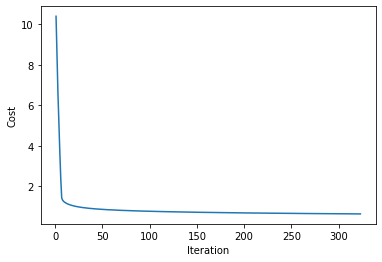

[[-2.11329241e-06 -3.15774151e-06  1.09674074e-05 -5.55819466e-06
  -1.66151800e-05  3.58507392e-05 -7.71690548e-07 -2.10027131e-05
   2.44354722e-05 -2.86251929e-06  2.98963402e-06  6.26668096e-06]
 [-1.16298459e-05  2.06037653e-05  1.46760346e-05 -4.42922546e-05
   9.87836787e-05  3.33253377e-05  1.97897943e-06 -1.39302311e-05
   6.83256645e-06  1.32084659e-05 -4.32584091e-05  8.44663383e-06]
 [ 5.72794251e-05  3.52080430e-05 -7.29672762e-05  1.08958812e-06
  -4.07275396e-06  1.66289042e-07  1.63650241e-06  2.16504153e-06
  -6.29607592e-06  2.00602985e-06  2.22447143e-05 -2.23613388e-05]]
[[-3.06143043e-05 -1.36496920e-05  1.31559520e-04]]


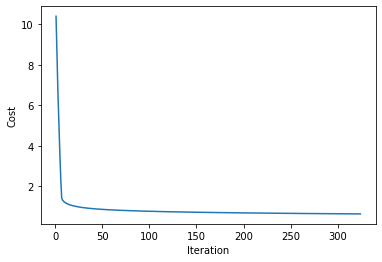

[[-2.10930176e-06 -3.16317371e-06  1.09549358e-05 -5.54719747e-06
  -1.66251793e-05  3.58041259e-05 -7.67725668e-07 -2.09472313e-05
   2.43328655e-05 -2.85738064e-06  2.97950645e-06  6.25954953e-06]
 [-1.16089158e-05  2.05571971e-05  1.46582267e-05 -4.42116537e-05
   9.85908885e-05  3.32810558e-05  1.97592423e-06 -1.39281625e-05
   6.82874493e-06  1.31858775e-05 -4.32521331e-05  8.46336571e-06]
 [ 5.71750332e-05  3.51418810e-05 -7.27310109e-05  1.08797834e-06
  -4.07236831e-06  1.66419726e-07  1.63390290e-06  2.16188191e-06
  -6.29013326e-06  2.00266128e-06  2.22305903e-05 -2.23417755e-05]]
[[-3.05583415e-05 -1.37321060e-05  1.31416467e-04]]


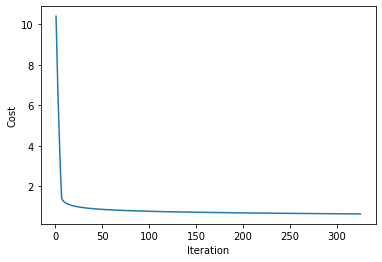

[[-2.10532684e-06 -3.16858579e-06  1.09425236e-05 -5.53624459e-06
  -1.66351369e-05  3.57577403e-05 -7.63781568e-07 -2.08919320e-05
   2.42308429e-05 -2.85226167e-06  2.96941109e-06  6.25245321e-06]
 [-1.15880660e-05  2.05107737e-05  1.46405103e-05 -4.41313639e-05
   9.83986974e-05  3.32370153e-05  1.97287992e-06 -1.39260950e-05
   6.82493415e-06  1.31633739e-05 -4.32458601e-05  8.47997530e-06]
 [ 5.70710454e-05  3.50759279e-05 -7.24960684e-05  1.08637428e-06
  -4.07198174e-06  1.66546736e-07  1.63131302e-06  2.15873411e-06
  -6.28422386e-06  1.99930562e-06  2.22165113e-05 -2.23223129e-05]]
[[-3.05025958e-05 -1.38142295e-05  1.31274096e-04]]


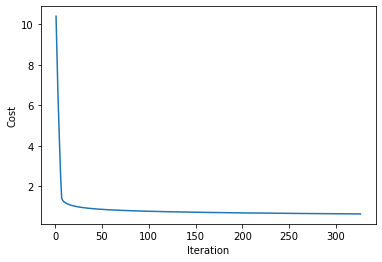

[[-2.10136755e-06 -3.17397784e-06  1.09301705e-05 -5.52533576e-06
  -1.66450530e-05  3.57115806e-05 -7.59858105e-07 -2.08368146e-05
   2.41293995e-05 -2.84716226e-06  2.95934782e-06  6.24539171e-06]
 [-1.15672958e-05  2.04644945e-05  1.46228846e-05 -4.40513833e-05
   9.82071028e-05  3.31932140e-05  1.96984645e-06 -1.39240285e-05
   6.82113404e-06  1.31409546e-05 -4.32395902e-05  8.49646378e-06]
 [ 5.69674592e-05  3.50101827e-05 -7.22624374e-05  1.08477588e-06
  -4.07159427e-06  1.66670116e-07  1.62873272e-06  2.15559808e-06
  -6.27834746e-06  1.99596279e-06  2.22024772e-05 -2.23029501e-05]]
[[-3.04470661e-05 -1.38960636e-05  1.31132401e-04]]


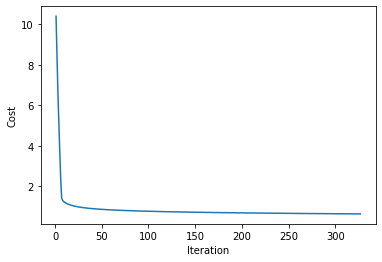

[[-2.09742381e-06 -3.17934993e-06  1.09178759e-05 -5.51447072e-06
  -1.66549276e-05  3.56656449e-05 -7.55955140e-07 -2.07818781e-05
   2.40285304e-05 -2.84208230e-06  2.94931648e-06  6.23836472e-06]
 [-1.15466050e-05  2.04183589e-05  1.46053488e-05 -4.39717100e-05
   9.80161020e-05  3.31496496e-05  1.96682375e-06 -1.39219631e-05
   6.81734456e-06  1.31186192e-05 -4.32333234e-05  8.51283228e-06]
 [ 5.68642724e-05  3.49446448e-05 -7.20301067e-05  1.08318312e-06
  -4.07120589e-06  1.66789908e-07  1.62616193e-06  2.15247377e-06
  -6.27250376e-06  1.99263272e-06  2.21884876e-05 -2.22836862e-05]]
[[-3.03917511e-05 -1.39776096e-05  1.30991377e-04]]


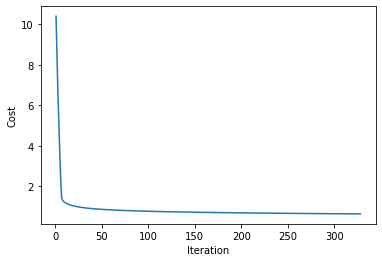

[[-2.09349553e-06 -3.18470215e-06  1.09056394e-05 -5.50364921e-06
  -1.66647610e-05  3.56199314e-05 -7.52072532e-07 -2.07271219e-05
   2.39282307e-05 -2.83702169e-06  2.93931696e-06  6.23137196e-06]
 [-1.15259930e-05  2.03723662e-05  1.45879022e-05 -4.38923423e-05
   9.78256923e-05  3.31063200e-05  1.96381176e-06 -1.39198987e-05
   6.81356565e-06  1.30963672e-05 -4.32270595e-05  8.52908192e-06]
 [ 5.67614825e-05  3.48793131e-05 -7.17990653e-05  1.08159597e-06
  -4.07081662e-06  1.66906153e-07  1.62360059e-06  2.14936112e-06
  -6.26669249e-06  1.98931534e-06  2.21745425e-05 -2.22645205e-05]]
[[-3.03366495e-05 -1.40588686e-05  1.30851019e-04]]


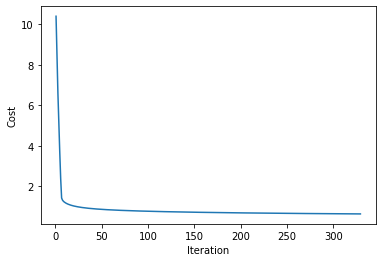

[[-2.08958260e-06 -3.19003458e-06  1.08934605e-05 -5.49287097e-06
  -1.66745532e-05  3.55744384e-05 -7.48210142e-07 -2.06725452e-05
   2.38284955e-05 -2.83198029e-06  2.92934911e-06  6.22441313e-06]
 [-1.15054593e-05  2.03265159e-05  1.45705439e-05 -4.38132785e-05
   9.76358712e-05  3.30632228e-05  1.96081042e-06 -1.39178353e-05
   6.80979726e-06  1.30741981e-05 -4.32207987e-05  8.54521382e-06]
 [ 5.66590873e-05  3.48141869e-05 -7.15693023e-05  1.08001440e-06
  -4.07042645e-06  1.67018892e-07  1.62104867e-06  2.14626008e-06
  -6.26091336e-06  1.98601056e-06  2.21606416e-05 -2.22454522e-05]]
[[-3.02817601e-05 -1.41398418e-05  1.30711321e-04]]


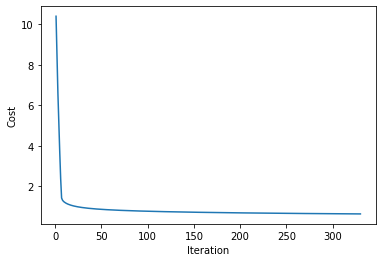

[[-2.08568495e-06 -3.19534729e-06  1.08813386e-05 -5.48213574e-06
  -1.66843046e-05  3.55291640e-05 -7.44367834e-07 -2.06181471e-05
   2.37293201e-05 -2.82695802e-06  2.91941279e-06  6.21748796e-06]
 [-1.14850036e-05  2.02808072e-05  1.45532731e-05 -4.37345166e-05
   9.74466360e-05  3.30203558e-05  1.95781968e-06 -1.39157730e-05
   6.80603934e-06  1.30521114e-05 -4.32145409e-05  8.56122908e-06]
 [ 5.65570844e-05  3.47492654e-05 -7.13408069e-05  1.07843837e-06
  -4.07003539e-06  1.67128165e-07  1.61850610e-06  2.14317059e-06
  -6.25516612e-06  1.98271833e-06  2.21467846e-05 -2.22264804e-05]]
[[-3.02270816e-05 -1.42205303e-05  1.30572278e-04]]


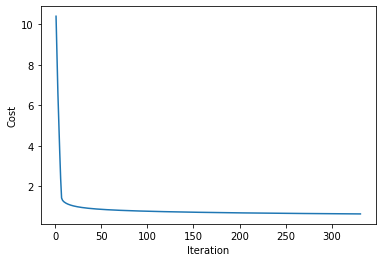

[[-2.08180249e-06 -3.20064036e-06  1.08692735e-05 -5.47144327e-06
  -1.66940152e-05  3.54841066e-05 -7.40545471e-07 -2.05639269e-05
   2.36306997e-05 -2.82195475e-06  2.90950788e-06  6.21059616e-06]
 [-1.14646253e-05  2.02352396e-05  1.45360892e-05 -4.36560550e-05
   9.72579841e-05  3.29777170e-05  1.95483947e-06 -1.39137117e-05
   6.80229183e-06  1.30301067e-05 -4.32082860e-05  8.57712877e-06]
 [ 5.64554717e-05  3.46845476e-05 -7.11135684e-05  1.07686786e-06
  -4.06964345e-06  1.67234013e-07  1.61597283e-06  2.14009261e-06
  -6.24945048e-06  1.97943855e-06  2.21329715e-05 -2.22076044e-05]]
[[-3.01726129e-05 -1.43009353e-05  1.30433884e-04]]


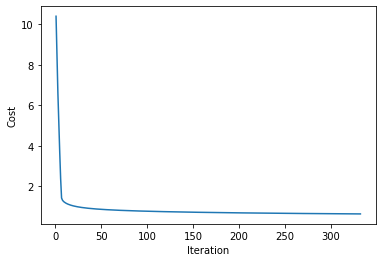

[[-2.07793512e-06 -3.20591388e-06  1.08572646e-05 -5.46079331e-06
  -1.67036852e-05  3.54392643e-05 -7.36742917e-07 -2.05098837e-05
   2.35326298e-05 -2.81697037e-06  2.89963425e-06  6.20373744e-06]
 [-1.14443241e-05  2.01898124e-05  1.45189912e-05 -4.35778920e-05
   9.70699129e-05  3.29353041e-05  1.95186974e-06 -1.39116514e-05
   6.79855468e-06  1.30081834e-05 -4.32020341e-05  8.59291398e-06]
 [ 5.63542468e-05  3.46200329e-05 -7.08875762e-05  1.07530283e-06
  -4.06925063e-06  1.67336474e-07  1.61344880e-06  2.13702607e-06
  -6.24376618e-06  1.97617116e-06  2.21192020e-05 -2.21888234e-05]]
[[-3.01183527e-05 -1.43810579e-05  1.30296135e-04]]


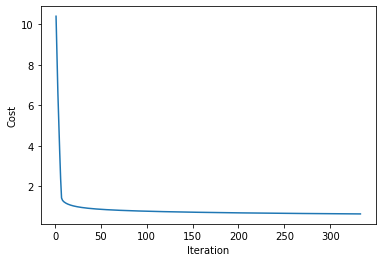

[[-2.07408275e-06 -3.21116793e-06  1.08453115e-05 -5.45018560e-06
  -1.67133148e-05  3.53946354e-05 -7.32960040e-07 -2.04560169e-05
   2.34351056e-05 -2.81200479e-06  2.88979175e-06  6.19691155e-06]
 [-1.14240994e-05  2.01445251e-05  1.45019785e-05 -4.35000257e-05
   9.68824198e-05  3.28931151e-05  1.94891043e-06 -1.39095922e-05
   6.79482784e-06  1.29863412e-05 -4.31957851e-05  8.60858577e-06]
 [ 5.62534074e-05  3.45557203e-05 -7.06628199e-05  1.07374326e-06
  -4.06885694e-06  1.67435588e-07  1.61093397e-06  2.13397092e-06
  -6.23811297e-06  1.97291610e-06  2.21054758e-05 -2.21701367e-05]]
[[-3.00642998e-05 -1.44608992e-05  1.30159025e-04]]


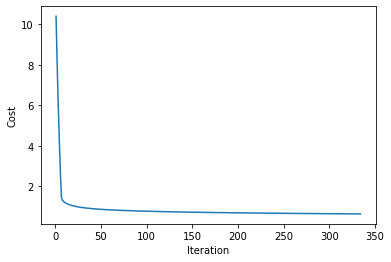

[[-2.07024531e-06 -3.21640257e-06  1.08334136e-05 -5.43961990e-06
  -1.67229040e-05  3.53502183e-05 -7.29196707e-07 -2.04023256e-05
   2.33381227e-05 -2.80705788e-06  2.87998026e-06  6.19011819e-06]
 [-1.14039509e-05  2.00993771e-05  1.44850503e-05 -4.34224546e-05
   9.66955023e-05  3.28511479e-05  1.94596148e-06 -1.39075339e-05
   6.79111126e-06  1.29645796e-05 -4.31895391e-05  8.62414517e-06]
 [ 5.61529514e-05  3.44916090e-05 -7.04392892e-05  1.07218911e-06
  -4.06846238e-06  1.67531393e-07  1.60842829e-06  2.13092711e-06
  -6.23249058e-06  1.96967328e-06  2.20917929e-05 -2.21515435e-05]]
[[-3.00104530e-05 -1.45404604e-05  1.30022549e-04]]


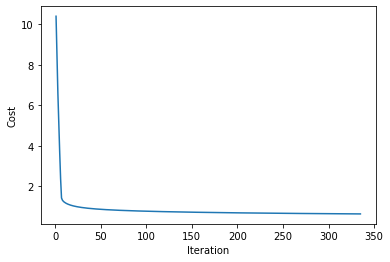

[[-2.06642270e-06 -3.22161789e-06  1.08215707e-05 -5.42909596e-06
  -1.67324532e-05  3.53060113e-05 -7.25452786e-07 -2.03488090e-05
   2.32416765e-05 -2.80212956e-06  2.87019966e-06  6.18335712e-06]
 [-1.13838781e-05  2.00543677e-05  1.44682060e-05 -4.33451768e-05
   9.65091578e-05  3.28094004e-05  1.94302284e-06 -1.39054767e-05
   6.78740489e-06  1.29428981e-05 -4.31832960e-05  8.63959322e-06]
 [ 5.60528766e-05  3.44276982e-05 -7.02169739e-05  1.07064036e-06
  -4.06806695e-06  1.67623927e-07  1.60593169e-06  2.12789459e-06
  -6.22689874e-06  1.96644263e-06  2.20781529e-05 -2.21330430e-05]]
[[-2.99568112e-05 -1.46197427e-05  1.29886702e-04]]


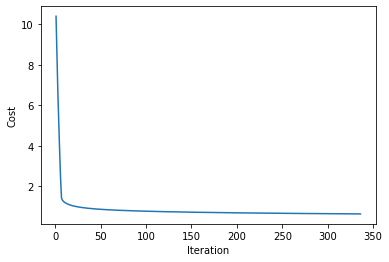

[[-2.06261484e-06 -3.22681397e-06  1.08097823e-05 -5.41861354e-06
  -1.67419624e-05  3.52620127e-05 -7.21728146e-07 -2.02954665e-05
   2.31457625e-05 -2.79721969e-06  2.86044980e-06  6.17662805e-06]
 [-1.13638805e-05  2.00094964e-05  1.44514446e-05 -4.32681908e-05
   9.63233839e-05  3.27678706e-05  1.94009445e-06 -1.39034205e-05
   6.78370868e-06  1.29212962e-05 -4.31770559e-05  8.65493095e-06]
 [ 5.59531807e-05  3.43639871e-05 -6.99958639e-05  1.06909697e-06
  -4.06767067e-06  1.67713226e-07  1.60344413e-06  2.12487330e-06
  -6.22133722e-06  1.96322410e-06  2.20645558e-05 -2.21146345e-05]]
[[-2.99033732e-05 -1.46987470e-05  1.29751480e-04]]


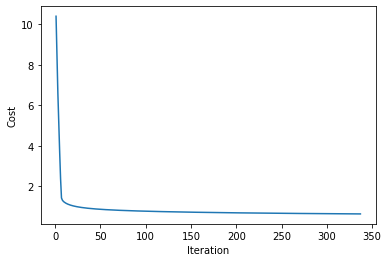

[[-2.05882164e-06 -3.23199088e-06  1.07980479e-05 -5.40817238e-06
  -1.67514317e-05  3.52182208e-05 -7.18022658e-07 -2.02422971e-05
   2.30503765e-05 -2.79232820e-06  2.85073057e-06  6.16993073e-06]
 [-1.13439578e-05  1.99647625e-05  1.44347656e-05 -4.31914948e-05
   9.61381779e-05  3.27265565e-05  1.93717624e-06 -1.39013652e-05
   6.78002258e-06  1.28997736e-05 -4.31708186e-05  8.67015936e-06]
 [ 5.58538616e-05  3.43004748e-05 -6.97759493e-05  1.06755892e-06
  -4.06727354e-06  1.67799329e-07  1.60096557e-06  2.12186319e-06
  -6.21580575e-06  1.96001759e-06  2.20510012e-05 -2.20963172e-05]]
[[-2.98501378e-05 -1.47774745e-05  1.29616877e-04]]


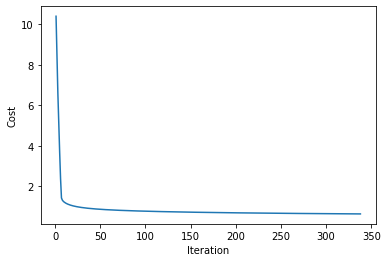

[[-2.05504302e-06 -3.23714870e-06  1.07863671e-05 -5.39777226e-06
  -1.67608614e-05  3.51746341e-05 -7.14336194e-07 -2.01893003e-05
   2.29555139e-05 -2.78745496e-06  2.84104183e-06  6.16326489e-06]
 [-1.13241095e-05  1.99201655e-05  1.44181682e-05 -4.31150872e-05
   9.59535374e-05  3.26854561e-05  1.93426818e-06 -1.38993110e-05
   6.77634653e-06  1.28783297e-05 -4.31645842e-05  8.68527945e-06]
 [ 5.57549171e-05  3.42371606e-05 -6.95572202e-05  1.06602617e-06
  -4.06687556e-06  1.67882271e-07  1.59849594e-06  2.11886422e-06
  -6.21030409e-06  1.95682306e-06  2.20374891e-05 -2.20780905e-05]]
[[-2.97971038e-05 -1.48559264e-05  1.29482888e-04]]


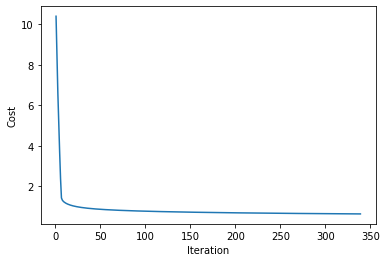

[[-2.05127889e-06 -3.24228750e-06  1.07747395e-05 -5.38741293e-06
  -1.67702516e-05  3.51312510e-05 -7.10668627e-07 -2.01364752e-05
   2.28611705e-05 -2.78259988e-06  2.83138346e-06  6.15663029e-06]
 [-1.13043352e-05  1.98757048e-05  1.44016518e-05 -4.30389663e-05
   9.57694600e-05  3.26445675e-05  1.93137019e-06 -1.38972577e-05
   6.77268049e-06  1.28569641e-05 -4.31583527e-05  8.70029221e-06]
 [ 5.56563451e-05  3.41740435e-05 -6.93396667e-05  1.06449870e-06
  -4.06647674e-06  1.67962088e-07  1.59603519e-06  2.11587632e-06
  -6.20483200e-06  1.95364042e-06  2.20240192e-05 -2.20599537e-05]]
[[-2.97442702e-05 -1.49341036e-05  1.29349509e-04]]


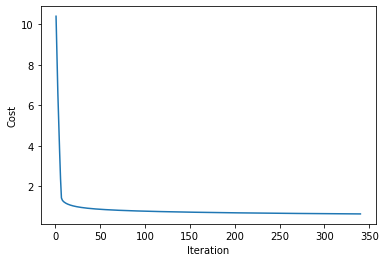

[[-2.04752918e-06 -3.24740736e-06  1.07631648e-05 -5.37709415e-06
  -1.67796024e-05  3.50880698e-05 -7.07019831e-07 -2.00838210e-05
   2.27673421e-05 -2.77776285e-06  2.82175533e-06  6.15002666e-06]
 [-1.12846345e-05  1.98313798e-05  1.43852156e-05 -4.29631305e-05
   9.55859431e-05  3.26038887e-05  1.92848224e-06 -1.38952055e-05
   6.76902441e-06  1.28356765e-05 -4.31521240e-05  8.71519861e-06]
 [ 5.55581434e-05  3.41111229e-05 -6.91232794e-05  1.06297648e-06
  -4.06607708e-06  1.68038816e-07  1.59358329e-06  2.11289945e-06
  -6.19938922e-06  1.95046961e-06  2.20105913e-05 -2.20419059e-05]]
[[-2.96916357e-05 -1.50120074e-05  1.29216735e-04]]


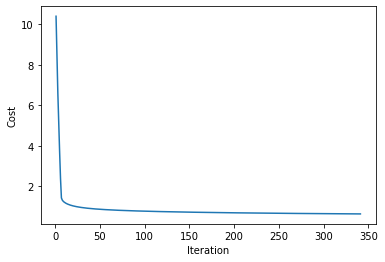

[[-2.04379379e-06 -3.25250836e-06  1.07516423e-05 -5.36681569e-06
  -1.67889141e-05  3.50450890e-05 -7.03389680e-07 -2.00313370e-05
   2.26740244e-05 -2.77294377e-06  2.81215731e-06  6.14345375e-06]
 [-1.12650069e-05  1.97871899e-05  1.43688589e-05 -4.28875781e-05
   9.54029843e-05  3.25634178e-05  1.92560425e-06 -1.38931542e-05
   6.76537824e-06  1.28144662e-05 -4.31458982e-05  8.72999961e-06]
 [ 5.54603100e-05  3.40483978e-05 -6.89080487e-05  1.06145949e-06
  -4.06567659e-06  1.68112489e-07  1.59114018e-06  2.10993355e-06
  -6.19397552e-06  1.94731057e-06  2.19972052e-05 -2.20239466e-05]]
[[-2.96391993e-05 -1.50896387e-05  1.29084561e-04]]


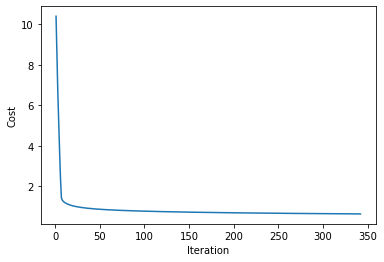

[[-2.04007265e-06 -3.25759056e-06  1.07401719e-05 -5.35657732e-06
  -1.67981866e-05  3.50023070e-05 -6.99778052e-07 -1.99790225e-05
   2.25812133e-05 -2.76814255e-06  2.80258928e-06  6.13691132e-06]
 [-1.12454521e-05  1.97431346e-05  1.43525811e-05 -4.28123076e-05
   9.52205812e-05  3.25231530e-05  1.92273619e-06 -1.38911038e-05
   6.76174193e-06  1.27933330e-05 -4.31396752e-05  8.74469616e-06]
 [ 5.53628427e-05  3.39858675e-05 -6.86939651e-05  1.05994768e-06
  -4.06527527e-06  1.68183143e-07  1.58870580e-06  2.10697858e-06
  -6.18859066e-06  1.94416322e-06  2.19838608e-05 -2.20060750e-05]]
[[-2.95869598e-05 -1.51669987e-05  1.28952983e-04]]


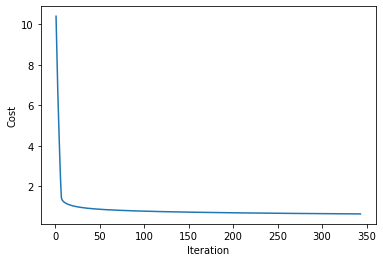

[[-2.03636568e-06 -3.26265405e-06  1.07287531e-05 -5.34637880e-06
  -1.68074203e-05  3.49597223e-05 -6.96184822e-07 -1.99268767e-05
   2.24889046e-05 -2.76335907e-06  2.79305112e-06  6.13039912e-06]
 [-1.12259696e-05  1.96992132e-05  1.43363815e-05 -4.27373174e-05
   9.50387313e-05  3.24830923e-05  1.91987799e-06 -1.38890545e-05
   6.75811543e-06  1.27722764e-05 -4.31334551e-05  8.75928921e-06]
 [ 5.52657395e-05  3.39235311e-05 -6.84810193e-05  1.05844104e-06
  -4.06487313e-06  1.68250811e-07  1.58628012e-06  2.10403448e-06
  -6.18323441e-06  1.94102749e-06  2.19705578e-05 -2.19882904e-05]]
[[-2.95349162e-05 -1.52440884e-05  1.28821995e-04]]


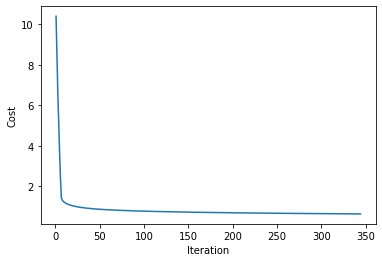

[[-2.03267279e-06 -3.26769889e-06  1.07173854e-05 -5.33621990e-06
  -1.68166152e-05  3.49173334e-05 -6.92609869e-07 -1.98748989e-05
   2.23970942e-05 -2.75859325e-06  2.78354270e-06  6.12391691e-06]
 [-1.12065590e-05  1.96554252e-05  1.43202594e-05 -4.26626059e-05
   9.48574322e-05  3.24432340e-05  1.91702960e-06 -1.38870061e-05
   6.75449870e-06  1.27512959e-05 -4.31272378e-05  8.77377968e-06]
 [ 5.51689983e-05  3.38613879e-05 -6.82692021e-05  1.05693954e-06
  -4.06447018e-06  1.68315526e-07  1.58386308e-06  2.10110120e-06
  -6.17790652e-06  1.93790333e-06  2.19572961e-05 -2.19705921e-05]]
[[-2.94830672e-05 -1.53209089e-05  1.28691594e-04]]


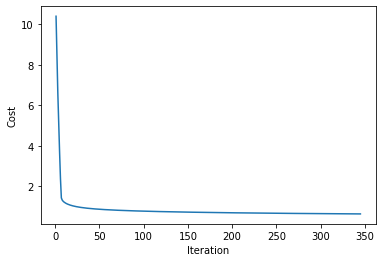

[[-2.02899391e-06 -3.27272516e-06  1.07060685e-05 -5.32610040e-06
  -1.68257714e-05  3.48751387e-05 -6.89053073e-07 -1.98230884e-05
   2.23057782e-05 -2.75384497e-06  2.77406390e-06  6.11746444e-06]
 [-1.11872200e-05  1.96117700e-05  1.43042143e-05 -4.25881714e-05
   9.46766816e-05  3.24035761e-05  1.91419097e-06 -1.38849587e-05
   6.75089168e-06  1.27303912e-05 -4.31210233e-05  8.78816850e-06]
 [ 5.50726171e-05  3.37994371e-05 -6.80585044e-05  1.05544314e-06
  -4.06406641e-06  1.68377323e-07  1.58145464e-06  2.09817870e-06
  -6.17260679e-06  1.93479067e-06  2.19440754e-05 -2.19529796e-05]]
[[-2.94314118e-05 -1.53974612e-05  1.28561775e-04]]


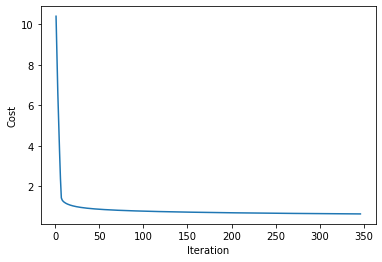

[[-2.02532896e-06 -3.27773292e-06  1.06948020e-05 -5.31602006e-06
  -1.68348892e-05  3.48331368e-05 -6.85514313e-07 -1.97714444e-05
   2.22149525e-05 -2.74911415e-06  2.76461460e-06  6.11104148e-06]
 [-1.11679521e-05  1.95682471e-05  1.42882453e-05 -4.25140125e-05
   9.44964771e-05  3.23641170e-05  1.91136204e-06 -1.38829122e-05
   6.74729434e-06  1.27095618e-05 -4.31148116e-05  8.80245656e-06]
 [ 5.49765938e-05  3.37376778e-05 -6.78489171e-05  1.05395183e-06
  -4.06366183e-06  1.68436233e-07  1.57905475e-06  2.09526692e-06
  -6.16733496e-06  1.93168944e-06  2.19308956e-05 -2.19354520e-05]]
[[-2.93799490e-05 -1.54737464e-05  1.28432533e-04]]


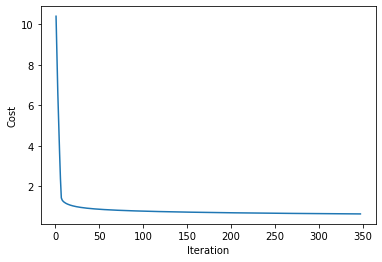

[[-2.02167785e-06 -3.28272227e-06  1.06835855e-05 -5.30597867e-06
  -1.68439687e-05  3.47913262e-05 -6.81993471e-07 -1.97199662e-05
   2.21246133e-05 -2.74440069e-06  2.75519468e-06  6.10464780e-06]
 [-1.11487549e-05  1.95248559e-05  1.42723520e-05 -4.24401276e-05
   9.43168162e-05  3.23248549e-05  1.90854277e-06 -1.38808667e-05
   6.74370661e-06  1.26888073e-05 -4.31086027e-05  8.81664476e-06]
 [ 5.48809264e-05  3.36761093e-05 -6.76404314e-05  1.05246557e-06
  -4.06325645e-06  1.68492290e-07  1.57666335e-06  2.09236581e-06
  -6.16209083e-06  1.92859957e-06  2.19177566e-05 -2.19180089e-05]]
[[-2.93286776e-05 -1.55497655e-05  1.28303864e-04]]


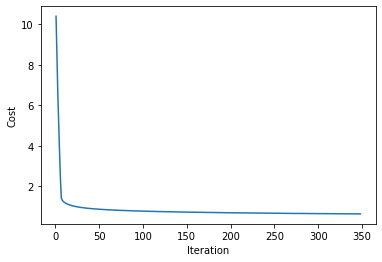

[[-2.01804051e-06 -3.28769326e-06  1.06724187e-05 -5.29597600e-06
  -1.68530100e-05  3.47497055e-05 -6.78490429e-07 -1.96686530e-05
   2.20347565e-05 -2.73970449e-06  2.74580400e-06  6.09828317e-06]
 [-1.11296280e-05  1.94815959e-05  1.42565336e-05 -4.23665151e-05
   9.41376967e-05  3.22857880e-05  1.90573311e-06 -1.38788222e-05
   6.74012846e-06  1.26681273e-05 -4.31023966e-05  8.83073400e-06]
 [ 5.47856129e-05  3.36147307e-05 -6.74330384e-05  1.05098434e-06
  -4.06285028e-06  1.68545525e-07  1.57428041e-06  2.08947533e-06
  -6.15687416e-06  1.92552101e-06  2.19046580e-05 -2.19006494e-05]]
[[-2.92775965e-05 -1.56255197e-05  1.28175764e-04]]


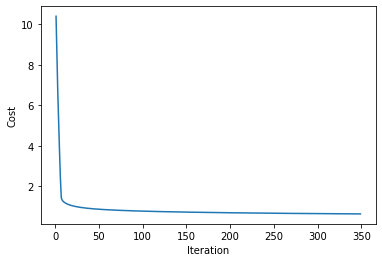

[[-2.01441686e-06 -3.29264596e-06  1.06613011e-05 -5.28601183e-06
  -1.68620133e-05  3.47082732e-05 -6.75005069e-07 -1.96175042e-05
   2.19453784e-05 -2.73502545e-06  2.73644247e-06  6.09194734e-06]
 [-1.11105711e-05  1.94384665e-05  1.42407896e-05 -4.22931735e-05
   9.39591161e-05  3.22469145e-05  1.90293299e-06 -1.38767785e-05
   6.73655985e-06  1.26475214e-05 -4.30961932e-05  8.84472515e-06]
 [ 5.46906514e-05  3.35535413e-05 -6.72267294e-05  1.04950811e-06
  -4.06244331e-06  1.68595970e-07  1.57190588e-06  2.08659542e-06
  -6.15168474e-06  1.92245369e-06  2.18915998e-05 -2.18833730e-05]]
[[-2.92267048e-05 -1.57010098e-05  1.28048228e-04]]


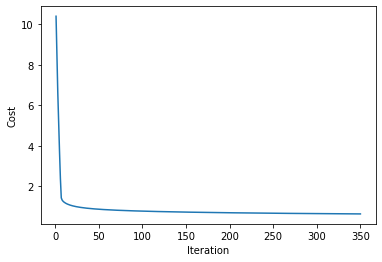

[[-2.01080682e-06 -3.29758045e-06  1.06502325e-05 -5.27608593e-06
  -1.68709787e-05  3.46670278e-05 -6.71537277e-07 -1.95665190e-05
   2.18564751e-05 -2.73036347e-06  2.72710995e-06  6.08564010e-06]
 [-1.10915837e-05  1.93954671e-05  1.42251192e-05 -4.22201014e-05
   9.37810723e-05  3.22082328e-05  1.90014238e-06 -1.38747359e-05
   6.73300071e-06  1.26269891e-05 -4.30899927e-05  8.85861907e-06]
 [ 5.45960398e-05  3.34925403e-05 -6.70214958e-05  1.04803686e-06
  -4.06203556e-06  1.68643656e-07  1.56953971e-06  2.08372603e-06
  -6.14652235e-06  1.91939755e-06  2.18785817e-05 -2.18661790e-05]]
[[-2.91760014e-05 -1.57762369e-05  1.27921253e-04]]


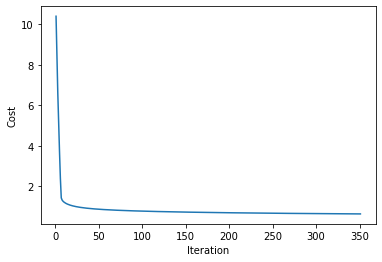

[[-2.00721032e-06 -3.30249680e-06  1.06392123e-05 -5.26619810e-06
  -1.68799063e-05  3.46259680e-05 -6.68086937e-07 -1.95156967e-05
   2.17680429e-05 -2.72571848e-06  2.71780632e-06  6.07936122e-06]
 [-1.10726655e-05  1.93525972e-05  1.42095220e-05 -4.21472971e-05
   9.36035628e-05  3.21697411e-05  1.89736121e-06 -1.38726941e-05
   6.72945101e-06  1.26065301e-05 -4.30837948e-05  8.87241663e-06]
 [ 5.45017762e-05  3.34317269e-05 -6.68173289e-05  1.04657055e-06
  -4.06162702e-06  1.68688613e-07  1.56718186e-06  2.08086713e-06
  -6.14138678e-06  1.91635251e-06  2.18656036e-05 -2.18490668e-05]]
[[-2.91254851e-05 -1.58512022e-05  1.27794833e-04]]


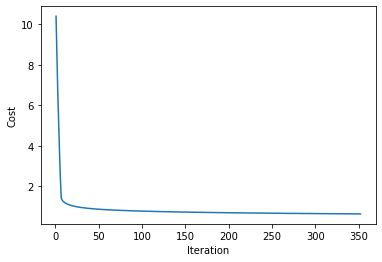

[[-2.00362729e-06 -3.30739508e-06  1.06282403e-05 -5.25634811e-06
  -1.68887963e-05  3.45850924e-05 -6.64653935e-07 -1.94650366e-05
   2.16800779e-05 -2.72109036e-06  2.70853148e-06  6.07311048e-06]
 [-1.10538161e-05  1.93098563e-05  1.41939974e-05 -4.20747592e-05
   9.34265854e-05  3.21314379e-05  1.89458945e-06 -1.38706533e-05
   6.72591071e-06  1.25861440e-05 -4.30775998e-05  8.88611866e-06]
 [ 5.44078586e-05  3.33711003e-05 -6.66142204e-05  1.04510916e-06
  -4.06121770e-06  1.68730872e-07  1.56483227e-06  2.07801865e-06
  -6.13627780e-06  1.91331853e-06  2.18526652e-05 -2.18320358e-05]]
[[-2.90751550e-05 -1.59259065e-05  1.27668965e-04]]


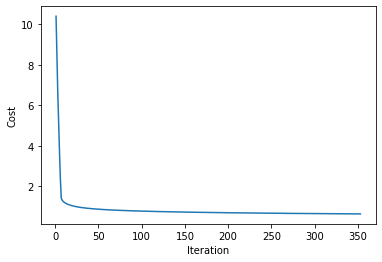

[[-2.00005763e-06 -3.31227536e-06  1.06173161e-05 -5.24653575e-06
  -1.68976488e-05  3.45443995e-05 -6.61238158e-07 -1.94145380e-05
   2.15925766e-05 -2.71647903e-06  2.69928530e-06  6.06688766e-06]
 [-1.10350351e-05  1.92672437e-05  1.41785446e-05 -4.20024863e-05
   9.32501377e-05  3.20933214e-05  1.89182703e-06 -1.38686135e-05
   6.72237975e-06  1.25658304e-05 -4.30714075e-05  8.89972601e-06]
 [ 5.43142852e-05  3.33106597e-05 -6.64121620e-05  1.04365267e-06
  -4.06080761e-06  1.68770464e-07  1.56249091e-06  2.07518055e-06
  -6.13119521e-06  1.91029554e-06  2.18397665e-05 -2.18150853e-05]]
[[-2.90250101e-05 -1.60003509e-05  1.27543645e-04]]


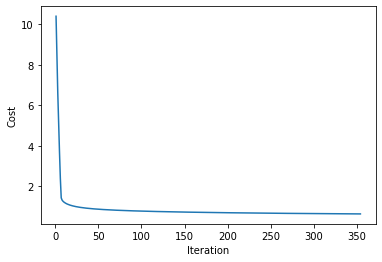

[[-1.99650129e-06 -3.31713771e-06  1.06064394e-05 -5.23676080e-06
  -1.69064641e-05  3.45038881e-05 -6.57839495e-07 -1.93642002e-05
   2.15055353e-05 -2.71188439e-06  2.69006766e-06  6.06069254e-06]
 [-1.10163221e-05  1.92247591e-05  1.41631632e-05 -4.19304768e-05
   9.30742176e-05  3.20553901e-05  1.88907392e-06 -1.38665745e-05
   6.71885809e-06  1.25455888e-05 -4.30652179e-05  8.91323950e-06]
 [ 5.42210541e-05  3.32504044e-05 -6.62111453e-05  1.04220105e-06
  -4.06039675e-06  1.68807417e-07  1.56015773e-06  2.07235278e-06
  -6.12613880e-06  1.90728348e-06  2.18269072e-05 -2.17982147e-05]]
[[-2.89750492e-05 -1.60745364e-05  1.27418868e-04]]


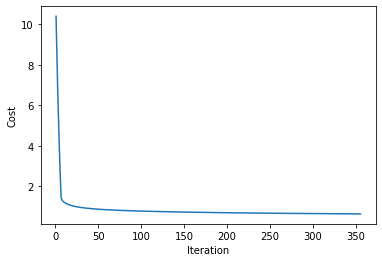

[[-1.99295819e-06 -3.32198219e-06  1.05956098e-05 -5.22702306e-06
  -1.69152421e-05  3.44635568e-05 -6.54457833e-07 -1.93140225e-05
   2.14189503e-05 -2.70730636e-06  2.68087845e-06  6.05452491e-06]
 [-1.09976767e-05  1.91824018e-05  1.41478525e-05 -4.18587293e-05
   9.28988227e-05  3.20176422e-05  1.88633006e-06 -1.38645365e-05
   6.71534569e-06  1.25254189e-05 -4.30590311e-05  8.92665995e-06]
 [ 5.41281632e-05  3.31903335e-05 -6.60111621e-05  1.04075427e-06
  -4.05998513e-06  1.68841761e-07  1.55783269e-06  2.06953530e-06
  -6.12110837e-06  1.90428228e-06  2.18140872e-05 -2.17814235e-05]]
[[-2.89252715e-05 -1.61484640e-05  1.27294630e-04]]


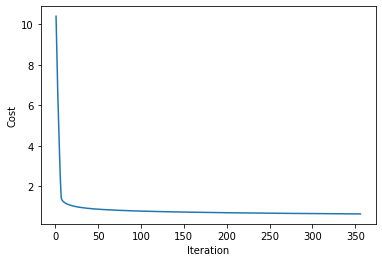

[[-1.98942825e-06 -3.32680888e-06  1.05848269e-05 -5.21732231e-06
  -1.69239830e-05  3.44234041e-05 -6.51093063e-07 -1.92640041e-05
   2.13328181e-05 -2.70274484e-06  2.67171755e-06  6.04838455e-06]
 [-1.09790986e-05  1.91401713e-05  1.41326119e-05 -4.17872423e-05
   9.27239508e-05  3.19800763e-05  1.88359540e-06 -1.38624994e-05
   6.71184250e-06  1.25053203e-05 -4.30528469e-05  8.93998817e-06]
 [ 5.40356108e-05  3.31304464e-05 -6.58122044e-05  1.03931231e-06
  -4.05957275e-06  1.68873525e-07  1.55551574e-06  2.06672805e-06
  -6.11610371e-06  1.90129189e-06  2.18013062e-05 -2.17647111e-05]]
[[-2.88756758e-05 -1.62221347e-05  1.27170928e-04]]


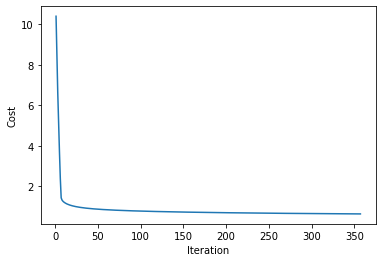

[[-1.98591140e-06 -3.33161784e-06  1.05740904e-05 -5.20765834e-06
  -1.69326871e-05  3.43834289e-05 -6.47745076e-07 -1.92141445e-05
   2.12471351e-05 -2.69819974e-06  2.66258485e-06  6.04227125e-06]
 [-1.09605874e-05  1.90980670e-05  1.41174410e-05 -4.17160145e-05
   9.25495996e-05  3.19426907e-05  1.88086989e-06 -1.38604632e-05
   6.70834848e-06  1.24852926e-05 -4.30466655e-05  8.95322495e-06]
 [ 5.39433949e-05  3.30707422e-05 -6.56142642e-05  1.03787514e-06
  -4.05915962e-06  1.68902737e-07  1.55320684e-06  2.06393100e-06
  -6.11112461e-06  1.89831225e-06  2.17885641e-05 -2.17480767e-05]]
[[-2.88262612e-05 -1.62955495e-05  1.27047757e-04]]


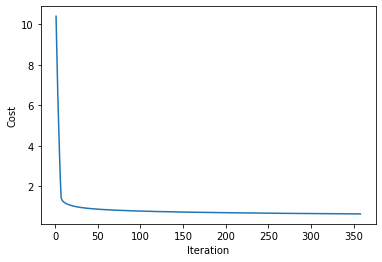

[[-1.98240757e-06 -3.33640915e-06  1.05634000e-05 -5.19803096e-06
  -1.69413544e-05  3.43436297e-05 -6.44413762e-07 -1.91644429e-05
   2.11618978e-05 -2.69367097e-06  2.65348024e-06  6.03618481e-06]
 [-1.09421428e-05  1.90560886e-05  1.41023391e-05 -4.16450443e-05
   9.23757671e-05  3.19054839e-05  1.87815349e-06 -1.38584279e-05
   6.70486359e-06  1.24653354e-05 -4.30404869e-05  8.96637110e-06]
 [ 5.38515138e-05  3.30112202e-05 -6.54173335e-05  1.03644274e-06
  -4.05874574e-06  1.68929426e-07  1.55090594e-06  2.06114409e-06
  -6.10617089e-06  1.89534330e-06  2.17758607e-05 -2.17315200e-05]]
[[-2.87770267e-05 -1.63687093e-05  1.26925114e-04]]


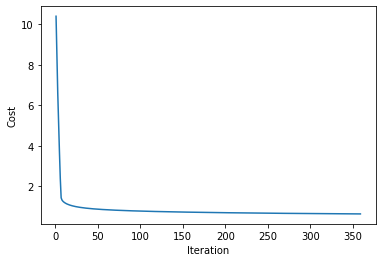

[[-1.97891668e-06 -3.34118286e-06  1.05527553e-05 -5.18843994e-06
  -1.69499850e-05  3.43040054e-05 -6.41099015e-07 -1.91148987e-05
   2.10771028e-05 -2.68915845e-06  2.64440360e-06  6.03012501e-06]
 [-1.09237643e-05  1.90142353e-05  1.40873057e-05 -4.15743304e-05
   9.22024508e-05  3.18684543e-05  1.87544615e-06 -1.38563935e-05
   6.70138778e-06  1.24454483e-05 -4.30343109e-05  8.97942739e-06]
 [ 5.37599655e-05  3.29518797e-05 -6.52214045e-05  1.03501509e-06
  -4.05833111e-06  1.68953619e-07  1.54861300e-06  2.05836727e-06
  -6.10124233e-06  1.89238497e-06  2.17631959e-05 -2.17150402e-05]]
[[-2.87279713e-05 -1.64416152e-05  1.26802995e-04]]


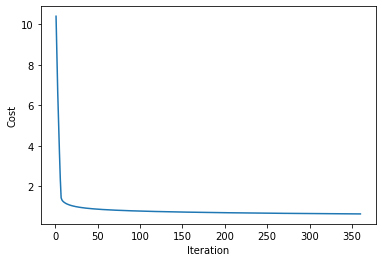

[[-1.97543866e-06 -3.34593906e-06  1.05421560e-05 -5.17888510e-06
  -1.69585791e-05  3.42645545e-05 -6.37800728e-07 -1.90655110e-05
   2.09927467e-05 -2.68466208e-06  2.63535481e-06  6.02409166e-06]
 [-1.09054516e-05  1.89725068e-05  1.40723402e-05 -4.15038713e-05
   9.20296487e-05  3.18316005e-05  1.87274782e-06 -1.38543600e-05
   6.69792100e-06  1.24256310e-05 -4.30281376e-05  8.99239460e-06]
 [ 5.36687482e-05  3.28927197e-05 -6.50264695e-05  1.03359215e-06
  -4.05791574e-06  1.68975344e-07  1.54632798e-06  2.05560050e-06
  -6.09633874e-06  1.88943722e-06  2.17505694e-05 -2.16986368e-05]]
[[-2.86790940e-05 -1.65142681e-05  1.26681395e-04]]


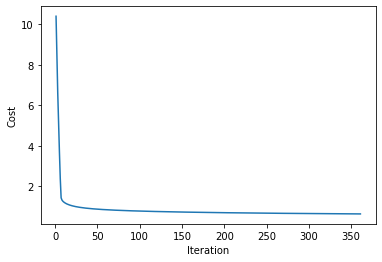

[[-1.97197345e-06 -3.35067780e-06  1.05316017e-05 -5.16936622e-06
  -1.69671369e-05  3.42252759e-05 -6.34518794e-07 -1.90162793e-05
   2.09088259e-05 -2.68018177e-06  2.62633377e-06  6.01808455e-06]
 [-1.08872044e-05  1.89309024e-05  1.40574421e-05 -4.14336657e-05
   9.18573586e-05  3.17949210e-05  1.87005846e-06 -1.38523275e-05
   6.69446322e-06  1.24058831e-05 -4.30219670e-05  9.00527348e-06]
 [ 5.35778602e-05  3.28337397e-05 -6.48325208e-05  1.03217390e-06
  -4.05749963e-06  1.68994628e-07  1.54405084e-06  2.05284374e-06
  -6.09145994e-06  1.88649997e-06  2.17379811e-05 -2.16823093e-05]]
[[-2.86303938e-05 -1.65866691e-05  1.26560311e-04]]


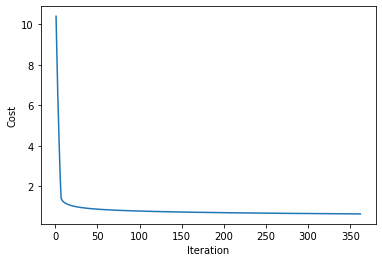

[[-1.96852097e-06 -3.35539915e-06  1.05210922e-05 -5.15988311e-06
  -1.69756584e-05  3.41861682e-05 -6.31253110e-07 -1.89672030e-05
   2.08253373e-05 -2.67571745e-06  2.61734036e-06  6.01210349e-06]
 [-1.08690223e-05  1.88894218e-05  1.40426108e-05 -4.13637121e-05
   9.16855782e-05  3.17584141e-05  1.86737801e-06 -1.38502958e-05
   6.69101440e-06  1.23862042e-05 -4.30157991e-05  9.01806480e-06]
 [ 5.34872996e-05  3.27749389e-05 -6.46395507e-05  1.03076033e-06
  -4.05708280e-06  1.69011497e-07  1.54178153e-06  2.05009694e-06
  -6.08660572e-06  1.88357318e-06  2.17254309e-05 -2.16660570e-05]]
[[-2.85818699e-05 -1.66588190e-05  1.26439740e-04]]


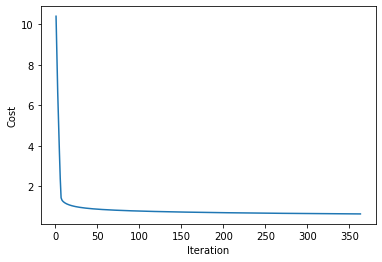

[[-1.96508115e-06 -3.36010317e-06  1.05106271e-05 -5.15043556e-06
  -1.69841438e-05  3.41472303e-05 -6.28003571e-07 -1.89182812e-05
   2.07422774e-05 -2.67126901e-06  2.60837447e-06  6.00614827e-06]
 [-1.08509050e-05  1.88480643e-05  1.40278458e-05 -4.12940092e-05
   9.15143055e-05  3.17220786e-05  1.86470643e-06 -1.38482650e-05
   6.68757448e-06  1.23665940e-05 -4.30096339e-05  9.03076931e-06]
 [ 5.33970646e-05  3.27163164e-05 -6.44475518e-05  1.02935140e-06
  -4.05666524e-06  1.69025979e-07  1.53952002e-06  2.04736005e-06
  -6.08177590e-06  1.88065679e-06  2.17129185e-05 -2.16498794e-05]]
[[-2.85335211e-05 -1.67307188e-05  1.26319677e-04]]


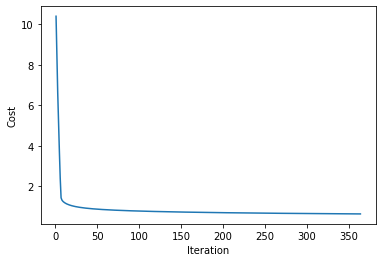

[[-1.96165393e-06 -3.36478994e-06  1.05002061e-05 -5.14102338e-06
  -1.69925932e-05  3.41084608e-05 -6.24770073e-07 -1.88695134e-05
   2.06596430e-05 -2.66683639e-06  2.59943600e-06  6.00021870e-06]
 [-1.08328520e-05  1.88068294e-05  1.40131466e-05 -4.12245556e-05
   9.13435383e-05  3.16859129e-05  1.86204368e-06 -1.38462351e-05
   6.68414343e-06  1.23470520e-05 -4.30034713e-05  9.04338773e-06]
 [ 5.33071535e-05  3.26578716e-05 -6.42565166e-05  1.02794709e-06
  -4.05624695e-06  1.69038099e-07  1.53726625e-06  2.04463302e-06
  -6.07697030e-06  1.87775074e-06  2.17004438e-05 -2.16337760e-05]]
[[-2.84853466e-05 -1.68023695e-05  1.26200119e-04]]


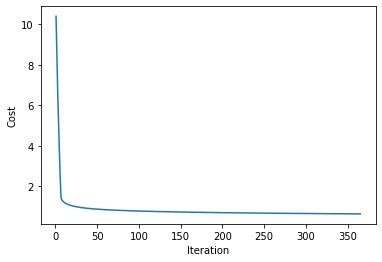

[[-1.95823923e-06 -3.36945952e-06  1.04898288e-05 -5.13164637e-06
  -1.70010068e-05  3.40698586e-05 -6.21552514e-07 -1.88208989e-05
   2.05774308e-05 -2.66241948e-06  2.59052483e-06  5.99431459e-06]
 [-1.08148631e-05  1.87657167e-05  1.39985127e-05 -4.11553501e-05
   9.11732744e-05  3.16499156e-05  1.85938970e-06 -1.38442061e-05
   6.68072121e-06  1.23275780e-05 -4.29973114e-05  9.05592081e-06]
 [ 5.32175645e-05  3.25996037e-05 -6.40664377e-05  1.02654737e-06
  -4.05582795e-06  1.69047883e-07  1.53502019e-06  2.04191582e-06
  -6.07218871e-06  1.87485497e-06  2.16880067e-05 -2.16177462e-05]]
[[-2.84373455e-05 -1.68737720e-05  1.26081062e-04]]


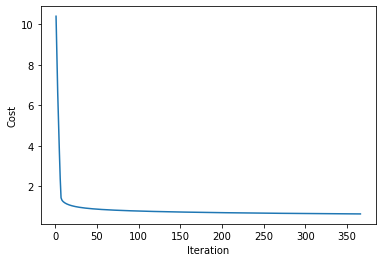

[[-1.95483698e-06 -3.37411197e-06  1.04794950e-05 -5.12230434e-06
  -1.70093846e-05  3.40314225e-05 -6.18350793e-07 -1.87724369e-05
   2.04956376e-05 -2.65801822e-06  2.58164084e-06  5.98843574e-06]
 [-1.07969379e-05  1.87247257e-05  1.39839435e-05 -4.10863911e-05
   9.10035117e-05  3.16140852e-05  1.85674446e-06 -1.38421780e-05
   6.67730777e-06  1.23081714e-05 -4.29911542e-05  9.06836926e-06]
 [ 5.31282958e-05  3.25415120e-05 -6.38773080e-05  1.02515223e-06
  -4.05540824e-06  1.69055357e-07  1.53278181e-06  2.03920839e-06
  -6.06743097e-06  1.87196943e-06  2.16756068e-05 -2.16017895e-05]]
[[-2.83895167e-05 -1.69449273e-05  1.25962502e-04]]


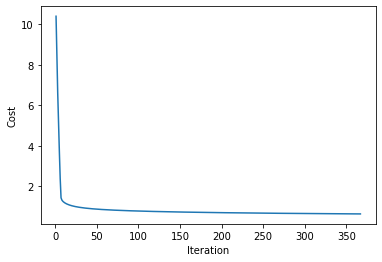

[[-1.95144712e-06 -3.37874736e-06  1.04692043e-05 -5.11299709e-06
  -1.70177269e-05  3.39931512e-05 -6.15164809e-07 -1.87241270e-05
   2.04142602e-05 -2.65363250e-06  2.57278395e-06  5.98258197e-06]
 [-1.07790760e-05  1.86838557e-05  1.39694385e-05 -4.10176774e-05
   9.08342482e-05  3.15784205e-05  1.85410791e-06 -1.38401507e-05
   6.67390308e-06  1.22888321e-05 -4.29849997e-05  9.08073381e-06]
 [ 5.30393457e-05  3.24835958e-05 -6.36891201e-05  1.02376164e-06
  -4.05498782e-06  1.69060546e-07  1.53055104e-06  2.03651069e-06
  -6.06269689e-06  1.86909406e-06  2.16632442e-05 -2.15859053e-05]]
[[-2.83418593e-05 -1.70158363e-05  1.25844437e-04]]


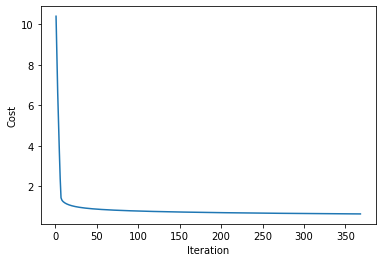

[[-1.94806958e-06 -3.38336576e-06  1.04589565e-05 -5.10372443e-06
  -1.70260337e-05  3.39550436e-05 -6.11994462e-07 -1.86759684e-05
   2.03332954e-05 -2.64926226e-06  2.56395403e-06  5.97675309e-06]
 [-1.07612772e-05  1.86431065e-05  1.39549973e-05 -4.09492077e-05
   9.06654816e-05  3.15429199e-05  1.85148001e-06 -1.38381243e-05
   6.67050709e-06  1.22695596e-05 -4.29788478e-05  9.09301516e-06]
 [ 5.29507125e-05  3.24258542e-05 -6.35018670e-05  1.02237557e-06
  -4.05456669e-06  1.69063475e-07  1.52832787e-06  2.03382268e-06
  -6.05798629e-06  1.86622881e-06  2.16509186e-05 -2.15700931e-05]]
[[-2.82943725e-05 -1.70865000e-05  1.25726862e-04]]


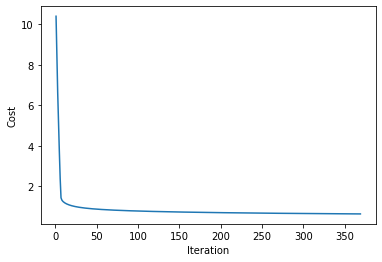

[[-1.94470429e-06 -3.38796722e-06  1.04487512e-05 -5.09448617e-06
  -1.70343052e-05  3.39170985e-05 -6.08839653e-07 -1.86279604e-05
   2.02527402e-05 -2.64490740e-06  2.55515097e-06  5.97094892e-06]
 [-1.07435410e-05  1.86024774e-05  1.39406193e-05 -4.08809805e-05
   9.04972101e-05  3.15075822e-05  1.84886070e-06 -1.38360988e-05
   6.66711976e-06  1.22503536e-05 -4.29726985e-05  9.10521400e-06]
 [ 5.28623945e-05  3.23682866e-05 -6.33155415e-05  1.02099401e-06
  -4.05414487e-06  1.69064168e-07  1.52611224e-06  2.03114432e-06
  -6.05329898e-06  1.86337362e-06  2.16386298e-05 -2.15543525e-05]]
[[-2.82470553e-05 -1.71569192e-05  1.25609774e-04]]


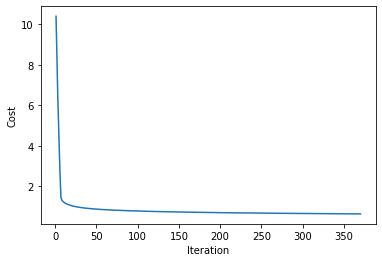

[[-1.94135119e-06 -3.39255182e-06  1.04385881e-05 -5.08528212e-06
  -1.70425415e-05  3.38793148e-05 -6.05700283e-07 -1.85801024e-05
   2.01725914e-05 -2.64056785e-06  2.54637468e-06  5.96516926e-06]
 [-1.07258672e-05  1.85619679e-05  1.39263040e-05 -4.08129948e-05
   9.03294313e-05  3.14724060e-05  1.84624995e-06 -1.38340742e-05
   6.66374105e-06  1.22312137e-05 -4.29665519e-05  9.11733103e-06]
 [ 5.27743899e-05  3.23108923e-05 -6.31301368e-05  1.01961693e-06
  -4.05372235e-06  1.69062650e-07  1.52390412e-06  2.02847555e-06
  -6.04863480e-06  1.86052844e-06  2.16263777e-05 -2.15386827e-05]]
[[-2.81999068e-05 -1.72270950e-05  1.25493169e-04]]


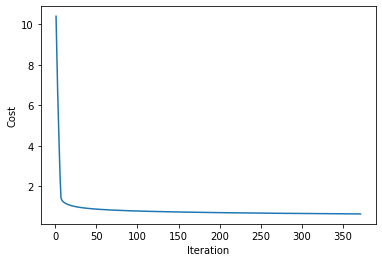

[[-1.93801021e-06 -3.39711961e-06  1.04284670e-05 -5.07611210e-06
  -1.70507427e-05  3.38416912e-05 -6.02576255e-07 -1.85323938e-05
   2.00928460e-05 -2.63624351e-06  2.53762504e-06  5.95941394e-06]
 [-1.07082554e-05  1.85215776e-05  1.39120510e-05 -4.07452490e-05
   9.01621434e-05  3.14373898e-05  1.84364771e-06 -1.38320504e-05
   6.66037092e-06  1.22121395e-05 -4.29604079e-05  9.12936694e-06]
 [ 5.26866971e-05  3.22536705e-05 -6.29456458e-05  1.01824430e-06
  -4.05329914e-06  1.69058945e-07  1.52170347e-06  2.02581634e-06
  -6.04399357e-06  1.85769321e-06  2.16141622e-05 -2.15230835e-05]]
[[-2.81529261e-05 -1.72970282e-05  1.25377045e-04]]


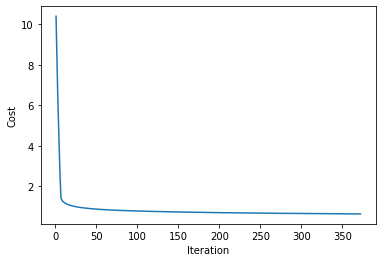

[[-1.93468128e-06 -3.40167066e-06  1.04183875e-05 -5.06697591e-06
  -1.70589090e-05  3.38042267e-05 -5.99467472e-07 -1.84848339e-05
   2.00135009e-05 -2.63193432e-06  2.52890194e-06  5.95368278e-06]
 [-1.06907053e-05  1.84813060e-05  1.38978597e-05 -4.06777420e-05
   8.99953442e-05  3.14025325e-05  1.84105393e-06 -1.38300275e-05
   6.65700933e-06  1.21931308e-05 -4.29542666e-05  9.14132241e-06]
 [ 5.25993144e-05  3.21966205e-05 -6.27620617e-05  1.01687611e-06
  -4.05287524e-06  1.69053076e-07  1.51951024e-06  2.02316664e-06
  -6.03937512e-06  1.85486788e-06  2.16019830e-05 -2.15075542e-05]]
[[-2.81061123e-05 -1.73667197e-05  1.25261397e-04]]


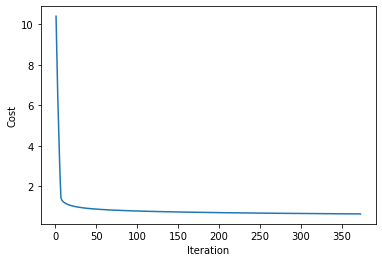

[[-1.93136435e-06 -3.40620503e-06  1.04083493e-05 -5.05787337e-06
  -1.70670405e-05  3.37669202e-05 -5.96373838e-07 -1.84374221e-05
   1.99345532e-05 -2.62764020e-06  2.52020529e-06  5.94797560e-06]
 [-1.06732165e-05  1.84411526e-05  1.38837297e-05 -4.06104725e-05
   8.98290317e-05  3.13678327e-05  1.83846859e-06 -1.38280054e-05
   6.65365625e-06  1.21741872e-05 -4.29481279e-05  9.15319809e-06]
 [ 5.25122401e-05  3.21397416e-05 -6.25793778e-05  1.01551233e-06
  -4.05245066e-06  1.69045067e-07  1.51732441e-06  2.02052641e-06
  -6.03477927e-06  1.85205240e-06  2.15898401e-05 -2.14920943e-05]]
[[-2.80594645e-05 -1.74361705e-05  1.25146222e-04]]


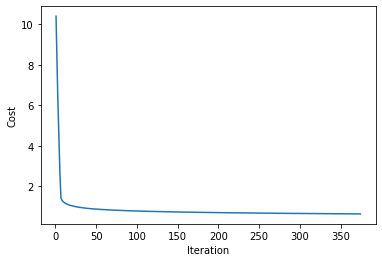

[[-1.92805933e-06 -3.41072278e-06  1.03983522e-05 -5.04880429e-06
  -1.70751372e-05  3.37297704e-05 -5.93295258e-07 -1.83901578e-05
   1.98559999e-05 -2.62336105e-06  2.51153498e-06  5.94229223e-06]
 [-1.06557887e-05  1.84011169e-05  1.38696605e-05 -4.05434391e-05
   8.96632038e-05  3.13332891e-05  1.83589162e-06 -1.38259842e-05
   6.65031162e-06  1.21553083e-05 -4.29419919e-05  9.16499466e-06]
 [ 5.24254726e-05  3.20830331e-05 -6.23975873e-05  1.01415294e-06
  -4.05202541e-06  1.69034941e-07  1.51514592e-06  2.01789561e-06
  -6.03020585e-06  1.84924671e-06  2.15777331e-05 -2.14767033e-05]]
[[-2.80129818e-05 -1.75053815e-05  1.25031517e-04]]


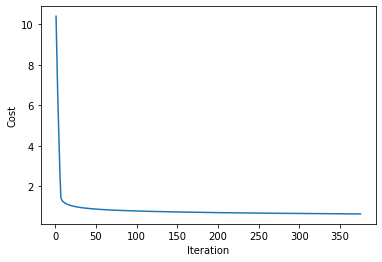

[[-1.92476618e-06 -3.41522399e-06  1.03883958e-05 -5.03976850e-06
  -1.70831994e-05  3.36927763e-05 -5.90231637e-07 -1.83430402e-05
   1.97778380e-05 -2.61909680e-06  2.50289090e-06  5.93663248e-06]
 [-1.06384217e-05  1.83611984e-05  1.38556517e-05 -4.04766407e-05
   8.94978586e-05  3.12989004e-05  1.83332299e-06 -1.38239639e-05
   6.64697542e-06  1.21364939e-05 -4.29358584e-05  9.17671276e-06]
 [ 5.23390103e-05  3.20264943e-05 -6.22166836e-05  1.01279791e-06
  -4.05159948e-06  1.69022721e-07  1.51297474e-06  2.01527419e-06
  -6.02565470e-06  1.84645077e-06  2.15656621e-05 -2.14613808e-05]]
[[-2.79666633e-05 -1.75743536e-05  1.24917279e-04]]


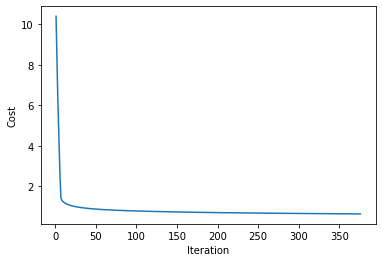

[[-1.92148482e-06 -3.41970870e-06  1.03784799e-05 -5.03076581e-06
  -1.70912272e-05  3.36559369e-05 -5.87182881e-07 -1.82960689e-05
   1.97000647e-05 -2.61484738e-06  2.49427295e-06  5.93099619e-06]
 [-1.06211150e-05  1.83213967e-05  1.38417027e-05 -4.04100760e-05
   8.93329941e-05  3.12646654e-05  1.83076266e-06 -1.38219444e-05
   6.64364760e-06  1.21177434e-05 -4.29297276e-05  9.18835306e-06]
 [ 5.22528515e-05  3.19701244e-05 -6.20366602e-05  1.01144723e-06
  -4.05117288e-06  1.69008429e-07  1.51081084e-06  2.01266211e-06
  -6.02112566e-06  1.84366451e-06  2.15536268e-05 -2.14461263e-05]]
[[-2.79205082e-05 -1.76430876e-05  1.24803504e-04]]


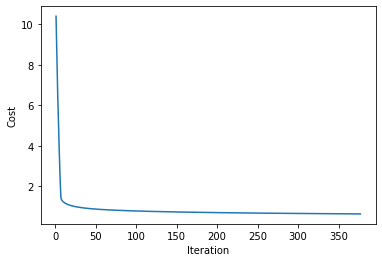

[[-1.91821520e-06 -3.42417698e-06  1.03686042e-05 -5.02179604e-06
  -1.70992206e-05  3.36192509e-05 -5.84148899e-07 -1.82492431e-05
   1.96226770e-05 -2.61061270e-06  2.48568103e-06  5.92538319e-06]
 [-1.06038684e-05  1.82817113e-05  1.38278132e-05 -4.03437436e-05
   8.91686082e-05  3.12305828e-05  1.82821059e-06 -1.38199257e-05
   6.64032813e-06  1.20990568e-05 -4.29235994e-05  9.19991618e-06]
 [ 5.21669946e-05  3.19139228e-05 -6.18575105e-05  1.01010087e-06
  -4.05074562e-06  1.68992088e-07  1.50865418e-06  2.01005932e-06
  -6.01661855e-06  1.84088789e-06  2.15416270e-05 -2.14309392e-05]]
[[-2.78745156e-05 -1.77115845e-05  1.24690189e-04]]


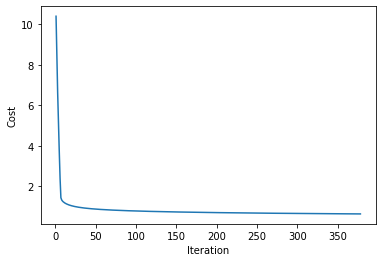

[[-1.91495725e-06 -3.42862889e-06  1.03587684e-05 -5.01285902e-06
  -1.71071799e-05  3.35827174e-05 -5.81129596e-07 -1.82025623e-05
   1.95456721e-05 -2.60639269e-06  2.47711503e-06  5.91979331e-06]
 [-1.05866815e-05  1.82421417e-05  1.38139826e-05 -4.02776425e-05
   8.90046990e-05  3.11966513e-05  1.82566672e-06 -1.38179079e-05
   6.63701696e-06  1.20804335e-05 -4.29174738e-05  9.21140277e-06]
 [ 5.20814379e-05  3.18578887e-05 -6.16792280e-05  1.00875881e-06
  -4.05031770e-06  1.68973720e-07  1.50650471e-06  2.00746579e-06
  -6.01213322e-06  1.83812085e-06  2.15296627e-05 -2.14158191e-05]]
[[-2.78286846e-05 -1.77798452e-05  1.24577332e-04]]


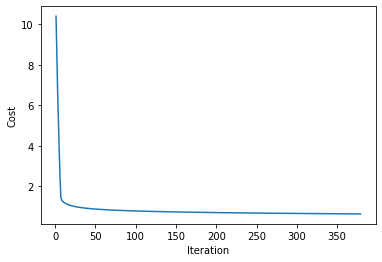

[[-1.91171091e-06 -3.43306450e-06  1.03489723e-05 -5.00395456e-06
  -1.71151050e-05  3.35463353e-05 -5.78124883e-07 -1.81560257e-05
   1.94690472e-05 -2.60218727e-06  2.46857486e-06  5.91422638e-06]
 [-1.05695540e-05  1.82026874e-05  1.38002106e-05 -4.02117714e-05
   8.88412644e-05  3.11628698e-05  1.82313103e-06 -1.38158909e-05
   6.63371406e-06  1.20618732e-05 -4.29113508e-05  9.22281345e-06]
 [ 5.19961800e-05  3.18020215e-05 -6.15018064e-05  1.00742103e-06
  -4.04988912e-06  1.68953347e-07  1.50436241e-06  2.00488148e-06
  -6.00766949e-06  1.83536335e-06  2.15177336e-05 -2.14007655e-05]]
[[-2.77830143e-05 -1.78478705e-05  1.24464927e-04]]


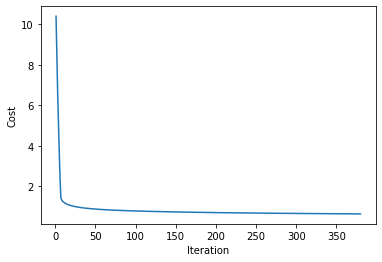

[[-1.90847611e-06 -3.43748386e-06  1.03392155e-05 -4.99508250e-06
  -1.71229962e-05  3.35101036e-05 -5.75134667e-07 -1.81096329e-05
   1.93927996e-05 -2.59799636e-06  2.46006040e-06  5.90868224e-06]
 [-1.05524857e-05  1.81633480e-05  1.37864966e-05 -4.01461290e-05
   8.86783026e-05  3.11292371e-05  1.82060347e-06 -1.38138748e-05
   6.63041938e-06  1.20433757e-05 -4.29052304e-05  9.23414884e-06]
 [ 5.19112192e-05  3.17463205e-05 -6.13252395e-05  1.00608751e-06
  -4.04945989e-06  1.68930990e-07  1.50222722e-06  2.00230634e-06
  -6.00322723e-06  1.83261534e-06  2.15058396e-05 -2.13857780e-05]]
[[-2.77375040e-05 -1.79156613e-05  1.24352974e-04]]


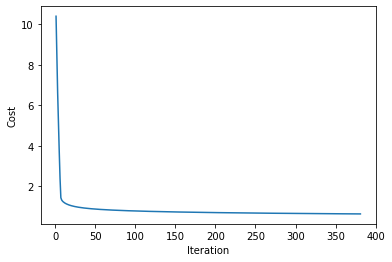

[[-1.90525280e-06 -3.44188704e-06  1.03294978e-05 -4.98624264e-06
  -1.71308536e-05  3.34740211e-05 -5.72158859e-07 -1.80633832e-05
   1.93169263e-05 -2.59381989e-06  2.45157156e-06  5.90316071e-06]
 [-1.05354761e-05  1.81241231e-05  1.37728402e-05 -4.00807141e-05
   8.85158116e-05  3.10957519e-05  1.81808400e-06 -1.38118595e-05
   6.62713290e-06  1.20249407e-05 -4.28991126e-05  9.24540956e-06]
 [ 5.18265539e-05  3.16907850e-05 -6.11495208e-05  1.00475823e-06
  -4.04903001e-06  1.68906670e-07  1.50009913e-06  1.99974033e-06
  -5.99880626e-06  1.82987676e-06  2.14939805e-05 -2.13708561e-05]]
[[-2.76921528e-05 -1.79832185e-05  1.24241468e-04]]


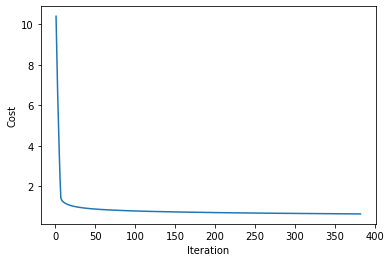

[[-1.90204091e-06 -3.44627409e-06  1.03198189e-05 -4.97743483e-06
  -1.71386773e-05  3.34380869e-05 -5.69197369e-07 -1.80172760e-05
   1.92414248e-05 -2.58965778e-06  2.44310824e-06  5.89766164e-06]
 [-1.05185251e-05  1.80850120e-05  1.37592411e-05 -4.00155256e-05
   8.83537893e-05  3.10624130e-05  1.81557258e-06 -1.38098450e-05
   6.62385458e-06  1.20065677e-05 -4.28929974e-05  9.25659622e-06]
 [ 5.17421826e-05  3.16354142e-05 -6.09746443e-05  1.00343316e-06
  -4.04859949e-06  1.68880409e-07  1.49797808e-06  1.99718340e-06
  -5.99440642e-06  1.82714756e-06  2.14821563e-05 -2.13559992e-05]]
[[-2.76469599e-05 -1.80505431e-05  1.24130406e-04]]


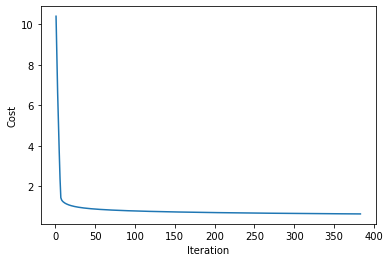

[[-1.89884038e-06 -3.45064508e-06  1.03101786e-05 -4.96865889e-06
  -1.71464674e-05  3.34023000e-05 -5.66250110e-07 -1.79713107e-05
   1.91662922e-05 -2.58550995e-06  2.43467034e-06  5.89218487e-06]
 [-1.05016322e-05  1.80460145e-05  1.37456987e-05 -3.99505622e-05
   8.81922340e-05  3.10292193e-05  1.81306916e-06 -1.38078314e-05
   6.62058437e-06  1.19882564e-05 -4.28868848e-05  9.26770941e-06]
 [ 5.16581038e-05  3.15802076e-05 -6.08006038e-05  1.00211228e-06
  -4.04816832e-06  1.68852228e-07  1.49586405e-06  1.99463553e-06
  -5.99002758e-06  1.82442770e-06  2.14703667e-05 -2.13412071e-05]]
[[-2.76019243e-05 -1.81176357e-05  1.24019785e-04]]


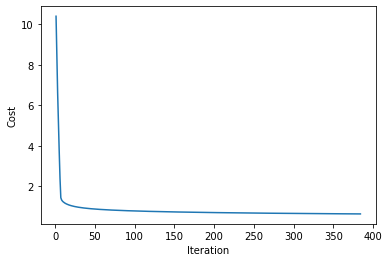

[[-1.89565116e-06 -3.45500006e-06  1.03005766e-05 -4.95991465e-06
  -1.71542240e-05  3.33666592e-05 -5.63316992e-07 -1.79254866e-05
   1.90915259e-05 -2.58137634e-06  2.42625776e-06  5.88673024e-06]
 [-1.04847972e-05  1.80071300e-05  1.37322127e-05 -3.98858228e-05
   8.80311437e-05  3.09961697e-05  1.81057372e-06 -1.38058186e-05
   6.61732225e-06  1.19700067e-05 -4.28807748e-05  9.27874974e-06]
 [ 5.15743158e-05  3.15251644e-05 -6.06273933e-05  1.00079558e-06
  -4.04773653e-06  1.68822146e-07  1.49375699e-06  1.99209666e-06
  -5.98566956e-06  1.82171712e-06  2.14586115e-05 -2.13264791e-05]]
[[-2.75570454e-05 -1.81844974e-05  1.23909603e-04]]


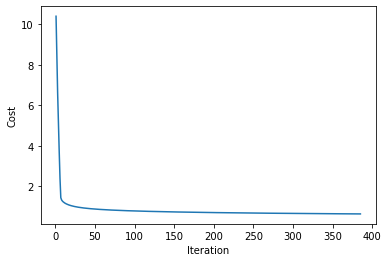

[[-1.89247318e-06 -3.45933909e-06  1.02910126e-05 -4.95120193e-06
  -1.71619473e-05  3.33311637e-05 -5.60397928e-07 -1.78798032e-05
   1.90171233e-05 -2.57725687e-06  2.41787040e-06  5.88129760e-06]
 [-1.04680198e-05  1.79683581e-05  1.37187825e-05 -3.98213062e-05
   8.78705164e-05  3.09632629e-05  1.80808620e-06 -1.38038066e-05
   6.61406816e-06  1.19518180e-05 -4.28746674e-05  9.28971778e-06]
 [ 5.14908172e-05  3.14702839e-05 -6.04550067e-05  9.99483024e-07
  -4.04730410e-06  1.68790185e-07  1.49165688e-06  1.98956676e-06
  -5.98133223e-06  1.81901578e-06  2.14468908e-05 -2.13118149e-05]]
[[-2.75123222e-05 -1.82511290e-05  1.23799856e-04]]


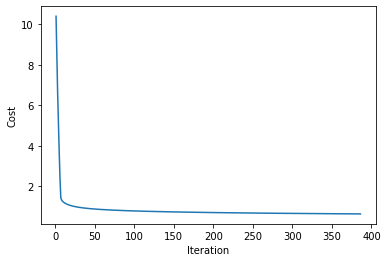

[[-1.88930639e-06 -3.46366224e-06  1.02814864e-05 -4.94252057e-06
  -1.71696373e-05  3.32958124e-05 -5.57492832e-07 -1.78342599e-05
   1.89430817e-05 -2.57315146e-06  2.40950816e-06  5.87588677e-06]
 [-1.04512997e-05  1.79296983e-05  1.37054079e-05 -3.97570112e-05
   8.77103503e-05  3.09304979e-05  1.80560657e-06 -1.38017954e-05
   6.61082208e-06  1.19336902e-05 -4.28685625e-05  9.30061413e-06]
 [ 5.14076065e-05  3.14155655e-05 -6.02834381e-05  9.98174603e-07
  -4.04687104e-06  1.68756363e-07  1.48956368e-06  1.98704579e-06
  -5.97701542e-06  1.81632363e-06  2.14352042e-05 -2.12972140e-05]]
[[-2.74677539e-05 -1.83175312e-05  1.23690541e-04]]


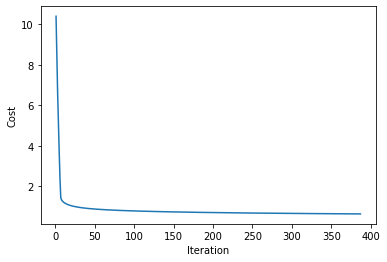

[[-1.88615072e-06 -3.46796956e-06  1.02719977e-05 -4.93387040e-06
  -1.71772942e-05  3.32606044e-05 -5.54601618e-07 -1.77888561e-05
   1.88693984e-05 -2.56906004e-06  2.40117094e-06  5.87049762e-06]
 [-1.04346366e-05  1.78911502e-05  1.36920884e-05 -3.96929367e-05
   8.75506434e-05  3.08978734e-05  1.80313479e-06 -1.37997851e-05
   6.60758398e-06  1.19156229e-05 -4.28624603e-05  9.31143936e-06]
 [ 5.13246821e-05  3.13610085e-05 -6.01126815e-05  9.96870292e-07
  -4.04643736e-06  1.68720702e-07  1.48747734e-06  1.98453370e-06
  -5.97271899e-06  1.81364062e-06  2.14235516e-05 -2.12826760e-05]]
[[-2.74233398e-05 -1.83837051e-05  1.23581656e-04]]


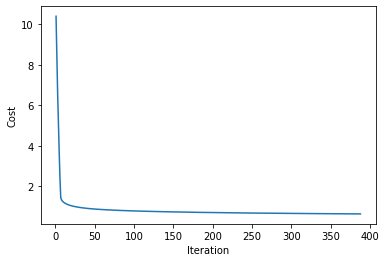

[[-1.88300612e-06 -3.47226111e-06  1.02625463e-05 -4.92525126e-06
  -1.71849181e-05  3.32255386e-05 -5.51724200e-07 -1.77435912e-05
   1.87960710e-05 -2.56498255e-06  2.39285865e-06  5.86512998e-06]
 [-1.04180301e-05  1.78527133e-05  1.36788236e-05 -3.96290815e-05
   8.73913939e-05  3.08653885e-05  1.80067083e-06 -1.37977755e-05
   6.60435380e-06  1.18976157e-05 -4.28563606e-05  9.32219405e-06]
 [ 5.12420426e-05  3.13066123e-05 -5.99427313e-05  9.95570072e-07
  -4.04600307e-06  1.68683221e-07  1.48539784e-06  1.98203047e-06
  -5.96844280e-06  1.81096670e-06  2.14119329e-05 -2.12682004e-05]]
[[-2.73790791e-05 -1.84496514e-05  1.23473197e-04]]


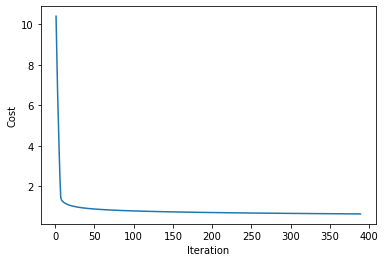

[[-1.87987252e-06 -3.47653694e-06  1.02531319e-05 -4.91666298e-06
  -1.71925092e-05  3.31906142e-05 -5.48860495e-07 -1.76984647e-05
   1.87230969e-05 -2.56091890e-06  2.38457118e-06  5.85978371e-06]
 [-1.04014801e-05  1.78143873e-05  1.36656130e-05 -3.95654445e-05
   8.72326000e-05  3.08330421e-05  1.79821463e-06 -1.37957668e-05
   6.60113153e-06  1.18796685e-05 -4.28502634e-05  9.33287875e-06]
 [ 5.11596864e-05  3.12523761e-05 -5.97735815e-05  9.94273922e-07
  -4.04556815e-06  1.68643938e-07  1.48332514e-06  1.97953603e-06
  -5.96418669e-06  1.80830183e-06  2.14003480e-05 -2.12537868e-05]]
[[-2.73349709e-05 -1.85153710e-05  1.23365162e-04]]


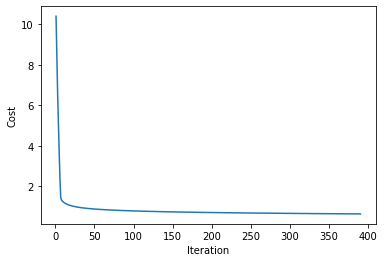

[[-1.87674988e-06 -3.48079713e-06  1.02437543e-05 -4.90810539e-06
  -1.72000674e-05  3.31558301e-05 -5.46010417e-07 -1.76534758e-05
   1.86504735e-05 -2.55686902e-06  2.37630845e-06  5.85445866e-06]
 [-1.03849861e-05  1.77761715e-05  1.36524564e-05 -3.95020245e-05
   8.70742597e-05  3.08008329e-05  1.79576617e-06 -1.37937589e-05
   6.59791712e-06  1.18617808e-05 -4.28441689e-05  9.34349402e-06]
 [ 5.10776121e-05  3.11982993e-05 -5.96052265e-05  9.92981822e-07
  -4.04513263e-06  1.68602874e-07  1.48125921e-06  1.97705037e-06
  -5.95995052e-06  1.80564595e-06  2.13887966e-05 -2.12394348e-05]]
[[-2.72910145e-05 -1.85808647e-05  1.23257548e-04]]


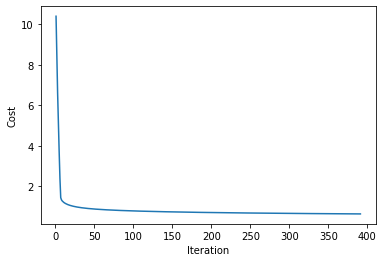

[[-1.87363813e-06 -3.48504172e-06  1.02344131e-05 -4.89957834e-06
  -1.72075931e-05  3.31211854e-05 -5.43173884e-07 -1.76086241e-05
   1.85781983e-05 -2.55283285e-06  2.36807036e-06  5.84915468e-06]
 [-1.03685480e-05  1.77380657e-05  1.36393532e-05 -3.94388205e-05
   8.69163713e-05  3.07687600e-05  1.79332540e-06 -1.37917518e-05
   6.59471053e-06  1.18439524e-05 -4.28380769e-05  9.35404043e-06]
 [ 5.09958183e-05  3.11443813e-05 -5.94376606e-05  9.91693751e-07
  -4.04469650e-06  1.68560047e-07  1.47920001e-06  1.97457343e-06
  -5.95573416e-06  1.80299902e-06  2.13772787e-05 -2.12251440e-05]]
[[-2.72472090e-05 -1.86461333e-05  1.23150351e-04]]


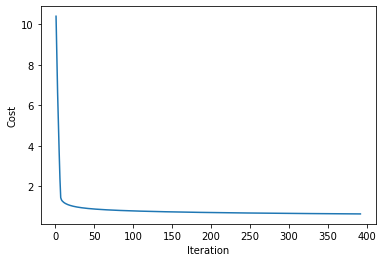

[[-1.87053721e-06 -3.48927077e-06  1.02251083e-05 -4.89108165e-06
  -1.72150861e-05  3.30866791e-05 -5.40350813e-07 -1.75639090e-05
   1.85062689e-05 -2.54881032e-06  2.35985681e-06  5.84387161e-06]
 [-1.03521654e-05  1.77000693e-05  1.36263031e-05 -3.93758312e-05
   8.67589328e-05  3.07368223e-05  1.79089230e-06 -1.37897454e-05
   6.59151174e-06  1.18261830e-05 -4.28319875e-05  9.36451851e-06]
 [ 5.09143034e-05  3.10906214e-05 -5.92708781e-05  9.90409691e-07
  -4.04425976e-06  1.68515476e-07  1.47714750e-06  1.97210518e-06
  -5.95153745e-06  1.80036100e-06  2.13657942e-05 -2.12109139e-05]]
[[-2.72035537e-05 -1.87111778e-05  1.23043570e-04]]


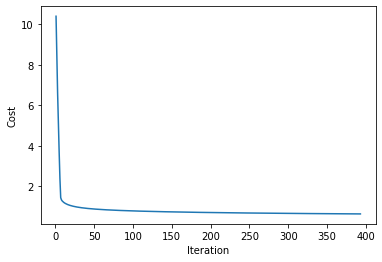

[[-1.86744708e-06 -3.49348434e-06  1.02158395e-05 -4.88261518e-06
  -1.72225468e-05  3.30523104e-05 -5.37541122e-07 -1.75193299e-05
   1.84346828e-05 -2.54480135e-06  2.35166770e-06  5.83860932e-06]
 [-1.03358380e-05  1.76621820e-05  1.36133057e-05 -3.93130556e-05
   8.66019424e-05  3.07050188e-05  1.78846681e-06 -1.37877399e-05
   6.58832070e-06  1.18084723e-05 -4.28259006e-05  9.37492881e-06]
 [ 5.08330661e-05  3.10370190e-05 -5.91048736e-05  9.89129621e-07
  -4.04382243e-06  1.68469179e-07  1.47510166e-06  1.96964559e-06
  -5.94736026e-06  1.79773183e-06  2.13543427e-05 -2.11967441e-05]]
[[-2.71600478e-05 -1.87759988e-05  1.22937200e-04]]


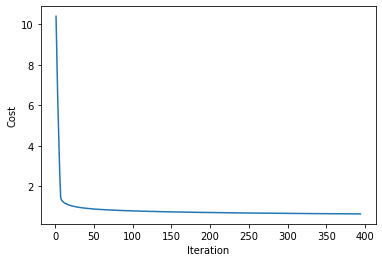

[[-1.86436767e-06 -3.49768248e-06  1.02066064e-05 -4.87417876e-06
  -1.72299752e-05  3.30180783e-05 -5.34744729e-07 -1.74748862e-05
   1.83634375e-05 -2.54080587e-06  2.34350294e-06  5.83336767e-06]
 [-1.03195656e-05  1.76244032e-05  1.36003606e-05 -3.92504926e-05
   8.64453984e-05  3.06733483e-05  1.78604890e-06 -1.37857352e-05
   6.58513739e-06  1.17908199e-05 -4.28198163e-05  9.38527186e-06]
 [ 5.07521048e-05  3.09835733e-05 -5.89396416e-05  9.87853522e-07
  -4.04338450e-06  1.68421174e-07  1.47306245e-06  1.96719460e-06
  -5.94320244e-06  1.79511148e-06  2.13429243e-05 -2.11826342e-05]]
[[-2.71166906e-05 -1.88405973e-05  1.22831241e-04]]


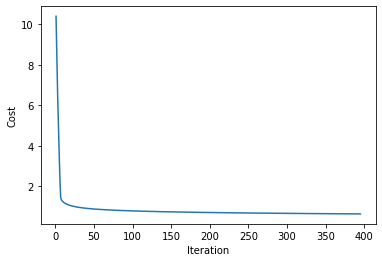

[[-1.86129892e-06 -3.50186526e-06  1.01974090e-05 -4.86577223e-06
  -1.72373714e-05  3.29839819e-05 -5.31961553e-07 -1.74305773e-05
   1.82925307e-05 -2.53682383e-06  2.33536245e-06  5.82814650e-06]
 [-1.03033479e-05  1.75867327e-05  1.35874675e-05 -3.91881410e-05
   8.62892989e-05  3.06418099e-05  1.78363854e-06 -1.37837313e-05
   6.58196176e-06  1.17732256e-05 -4.28137346e-05  9.39554820e-06]
 [ 5.06714182e-05  3.09302838e-05 -5.87751765e-05  9.86581375e-07
  -4.04294598e-06  1.68371481e-07  1.47102984e-06  1.96475219e-06
  -5.93906387e-06  1.79249990e-06  2.13315388e-05 -2.11685838e-05]]
[[-2.70734812e-05 -1.89049740e-05  1.22725688e-04]]


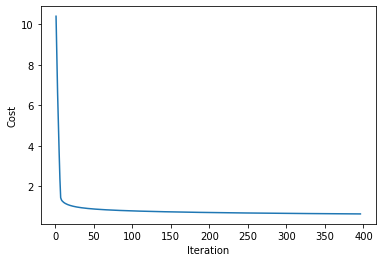

[[-1.85824079e-06 -3.50603273e-06  1.01882468e-05 -4.85739543e-06
  -1.72447355e-05  3.29500203e-05 -5.29191516e-07 -1.73864028e-05
   1.82219599e-05 -2.53285513e-06  2.32724611e-06  5.82294567e-06]
 [-1.02871845e-05  1.75491698e-05  1.35746259e-05 -3.91259999e-05
   8.61336420e-05  3.06104026e-05  1.78123569e-06 -1.37817282e-05
   6.57879379e-06  1.17556891e-05 -4.28076554e-05  9.40575836e-06]
 [ 5.05910049e-05  3.08771498e-05 -5.86114730e-05  9.85313159e-07
  -4.04250687e-06  1.68320116e-07  1.46900379e-06  1.96231831e-06
  -5.93494440e-06  1.78989703e-06  2.13201859e-05 -2.11545925e-05]]
[[-2.70304190e-05 -1.89691298e-05  1.22620539e-04]]


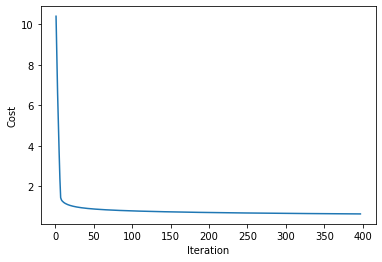

[[-1.85519322e-06 -3.51018494e-06  1.01791198e-05 -4.84904822e-06
  -1.72520676e-05  3.29161926e-05 -5.26434536e-07 -1.73423620e-05
   1.81517228e-05 -2.52889973e-06  2.31915385e-06  5.81776506e-06]
 [-1.02710753e-05  1.75117143e-05  1.35618355e-05 -3.90640681e-05
   8.59784262e-05  3.05791253e-05  1.77884030e-06 -1.37797258e-05
   6.57563343e-06  1.17382101e-05 -4.28015788e-05  9.41590284e-06]
 [ 5.05108634e-05  3.08241707e-05 -5.84485257e-05  9.84048856e-07
  -4.04206718e-06  1.68267097e-07  1.46698427e-06  1.95989294e-06
  -5.93084390e-06  1.78730285e-06  2.13088657e-05 -2.11406600e-05]]
[[-2.69875031e-05 -1.90330655e-05  1.22515792e-04]]


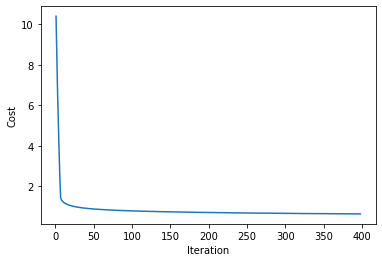

[[-1.85215615e-06 -3.51432195e-06  1.01700276e-05 -4.84073042e-06
  -1.72593679e-05  3.28824980e-05 -5.23690535e-07 -1.72984543e-05
   1.80818170e-05 -2.52495755e-06  2.31108556e-06  5.81260451e-06]
 [-1.02550199e-05  1.74743657e-05  1.35490959e-05 -3.90023445e-05
   8.58236494e-05  3.05479770e-05  1.77645236e-06 -1.37777243e-05
   6.57248066e-06  1.17207883e-05 -4.27955047e-05  9.42598217e-06]
 [ 5.04309924e-05  3.07713458e-05 -5.82863294e-05  9.82788447e-07
  -4.04162691e-06  1.68212441e-07  1.46497125e-06  1.95747602e-06
  -5.92676223e-06  1.78471729e-06  2.12975779e-05 -2.11267857e-05]]
[[-2.69447328e-05 -1.90967819e-05  1.22411443e-04]]


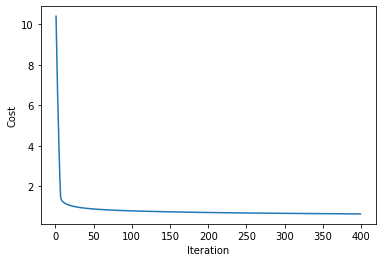

[[-1.84912953e-06 -3.51844382e-06  1.01609700e-05 -4.83244190e-06
  -1.72666364e-05  3.28489354e-05 -5.20959435e-07 -1.72546793e-05
   1.80122403e-05 -2.52102852e-06  2.30304116e-06  5.80746389e-06]
 [-1.02390181e-05  1.74371235e-05  1.35364068e-05 -3.89408281e-05
   8.56693100e-05  3.05169569e-05  1.77407181e-06 -1.37757235e-05
   6.56933544e-06  1.17034235e-05 -4.27894331e-05  9.43599685e-06]
 [ 5.03513904e-05  3.07186745e-05 -5.81248787e-05  9.81531912e-07
  -4.04118606e-06  1.68156167e-07  1.46296470e-06  1.95506752e-06
  -5.92269927e-06  1.78214032e-06  2.12863225e-05 -2.11129693e-05]]
[[-2.69021074e-05 -1.91602798e-05  1.22307491e-04]]


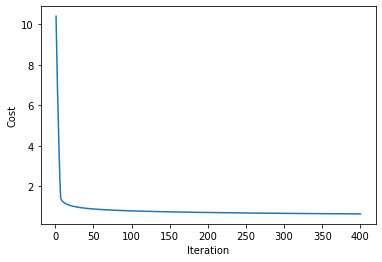

[[-1.84611331e-06 -3.52255060e-06  1.01519468e-05 -4.82418250e-06
  -1.72738734e-05  3.28155041e-05 -5.18241158e-07 -1.72110363e-05
   1.79429903e-05 -2.51711259e-06  2.29502055e-06  5.80234307e-06]
 [-1.02230696e-05  1.73999874e-05  1.35237678e-05 -3.88795178e-05
   8.55154062e-05  3.04860638e-05  1.77169862e-06 -1.37737235e-05
   6.56619774e-06  1.16861152e-05 -4.27833641e-05  9.44594740e-06]
 [ 5.02720562e-05  3.06661562e-05 -5.79641686e-05  9.80279234e-07
  -4.04074464e-06  1.68098291e-07  1.46096457e-06  1.95266740e-06
  -5.91865487e-06  1.77957190e-06  2.12750991e-05 -2.10992104e-05]]
[[-2.68596262e-05 -1.92235600e-05  1.22203932e-04]]


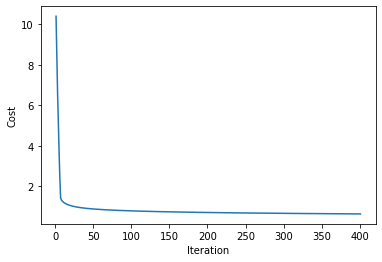

[[-1.84310742e-06 -3.52664234e-06  1.01429578e-05 -4.81595206e-06
  -1.72810788e-05  3.27822033e-05 -5.15535626e-07 -1.71675249e-05
   1.78740648e-05 -2.51320967e-06  2.28702364e-06  5.79724190e-06]
 [-1.02071741e-05  1.73629569e-05  1.35111785e-05 -3.88184126e-05
   8.53619363e-05  3.04552968e-05  1.76933277e-06 -1.37717243e-05
   6.56306752e-06  1.16688633e-05 -4.27772976e-05  9.45583430e-06]
 [ 5.01929882e-05  3.06137903e-05 -5.78041938e-05  9.79030393e-07
  -4.04030265e-06  1.68038829e-07  1.45897085e-06  1.95027564e-06
  -5.91462892e-06  1.77701197e-06  2.12639079e-05 -2.10855087e-05]]
[[-2.68172883e-05 -1.92866233e-05  1.22100765e-04]]


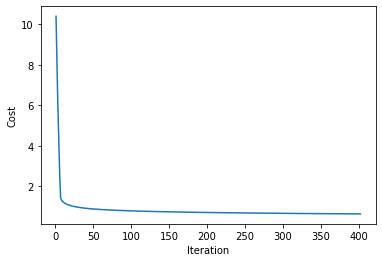

[[-1.84011183e-06 -3.53071911e-06  1.01340028e-05 -4.80775043e-06
  -1.72882527e-05  3.27490319e-05 -5.12842764e-07 -1.71241444e-05
   1.78054614e-05 -2.50931971e-06  2.27905035e-06  5.79216026e-06]
 [-1.01913313e-05  1.73260316e-05  1.34986386e-05 -3.87575114e-05
   8.52088984e-05  3.04246550e-05  1.76697420e-06 -1.37697259e-05
   6.55994476e-06  1.16516675e-05 -4.27712337e-05  9.46565806e-06]
 [ 5.01141853e-05  3.05615760e-05 -5.76449493e-05  9.77785370e-07
  -4.03986009e-06  1.67977799e-07  1.45698350e-06  1.94789218e-06
  -5.91062128e-06  1.77446050e-06  2.12527485e-05 -2.10718637e-05]]
[[-2.67750931e-05 -1.93494705e-05  1.21997985e-04]]


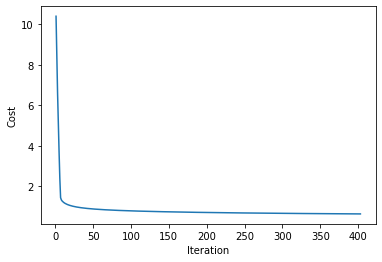

[[-1.83712647e-06 -3.53478095e-06  1.01250815e-05 -4.79957747e-06
  -1.72953954e-05  3.27159893e-05 -5.10162494e-07 -1.70808943e-05
   1.77371780e-05 -2.50544264e-06  2.27110058e-06  5.78709802e-06]
 [-1.01755411e-05  1.72892111e-05  1.34861477e-05 -3.86968132e-05
   8.50562909e-05  3.03941373e-05  1.76462289e-06 -1.37677282e-05
   6.55682941e-06  1.16345275e-05 -4.27651723e-05  9.47541916e-06]
 [ 5.00356459e-05  3.05095129e-05 -5.74864299e-05  9.76544148e-07
  -4.03941698e-06  1.67915217e-07  1.45500248e-06  1.94551700e-06
  -5.90663182e-06  1.77191745e-06  2.12416209e-05 -2.10582750e-05]]
[[-2.67330398e-05 -1.94121023e-05  1.21895592e-04]]


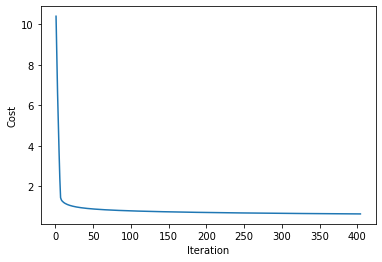

[[-1.83415129e-06 -3.53882793e-06  1.01161937e-05 -4.79143302e-06
  -1.73025069e-05  3.26830746e-05 -5.07494743e-07 -1.70377741e-05
   1.76692124e-05 -2.50157840e-06  2.26317424e-06  5.78205504e-06]
 [-1.01598031e-05  1.72524950e-05  1.34737055e-05 -3.86363169e-05
   8.49041121e-05  3.03637430e-05  1.76227880e-06 -1.37657313e-05
   6.55372145e-06  1.16174430e-05 -4.27591134e-05  9.48511809e-06]
 [ 4.99573689e-05  3.04576003e-05 -5.73286308e-05  9.75306708e-07
  -4.03897330e-06  1.67851099e-07  1.45302777e-06  1.94315005e-06
  -5.90266043e-06  1.76938277e-06  2.12305249e-05 -2.10447424e-05]]
[[-2.66911278e-05 -1.94745197e-05  1.21793582e-04]]


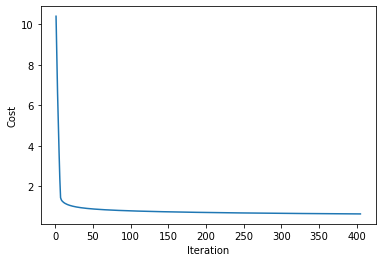

[[-1.83118625e-06 -3.54286009e-06  1.01073392e-05 -4.78331694e-06
  -1.73095874e-05  3.26502868e-05 -5.04839434e-07 -1.69947833e-05
   1.76015623e-05 -2.49772691e-06  2.25527124e-06  5.77703119e-06]
 [-1.01441170e-05  1.72158828e-05  1.34613116e-05 -3.85760216e-05
   8.47523602e-05  3.03334710e-05  1.75994190e-06 -1.37637352e-05
   6.55062084e-06  1.16004137e-05 -4.27530571e-05  9.49475532e-06]
 [ 4.98793527e-05  3.04058375e-05 -5.71715469e-05  9.74073031e-07
  -4.03852908e-06  1.67785461e-07  1.45105933e-06  1.94079131e-06
  -5.89870696e-06  1.76685641e-06  2.12194603e-05 -2.10312654e-05]]
[[-2.66493563e-05 -1.95367233e-05  1.21691953e-04]]


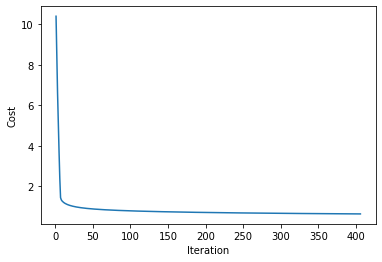

[[-1.82823128e-06 -3.54687748e-06  1.00985178e-05 -4.77522908e-06
  -1.73166368e-05  3.26176253e-05 -5.02196494e-07 -1.69519212e-05
   1.75342256e-05 -2.49388813e-06  2.24739149e-06  5.77202634e-06]
 [-1.01284826e-05  1.71793743e-05  1.34489658e-05 -3.85159261e-05
   8.46010335e-05  3.03033205e-05  1.75761215e-06 -1.37617399e-05
   6.54752755e-06  1.15834394e-05 -4.27470033e-05  9.50433134e-06]
 [ 4.98015963e-05  3.03542240e-05 -5.70151734e-05  9.72843100e-07
  -4.03808430e-06  1.67718320e-07  1.44909714e-06  1.93844073e-06
  -5.89477130e-06  1.76433834e-06  2.12084272e-05 -2.10178436e-05]]
[[-2.66077245e-05 -1.95987139e-05  1.21590702e-04]]


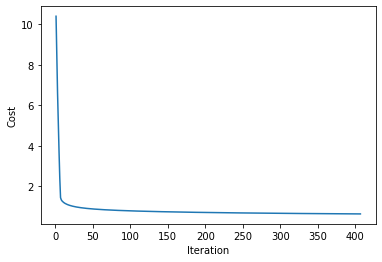

[[-1.82528635e-06 -3.55088017e-06  1.00897292e-05 -4.76716929e-06
  -1.73236554e-05  3.25850891e-05 -4.99565849e-07 -1.69091874e-05
   1.74672001e-05 -2.49006197e-06  2.23953491e-06  5.76704037e-06]
 [-1.01128997e-05  1.71429689e-05  1.34366676e-05 -3.84560296e-05
   8.44501303e-05  3.02732905e-05  1.75528951e-06 -1.37597453e-05
   6.54444155e-06  1.15665197e-05 -4.27409520e-05  9.51384661e-06]
 [ 4.97240981e-05  3.03027592e-05 -5.68595053e-05  9.71616897e-07
  -4.03763897e-06  1.67649691e-07  1.44714116e-06  1.93609828e-06
  -5.89085333e-06  1.76182852e-06  2.11974252e-05 -2.10044768e-05]]
[[-2.65662319e-05 -1.96604923e-05  1.21489827e-04]]


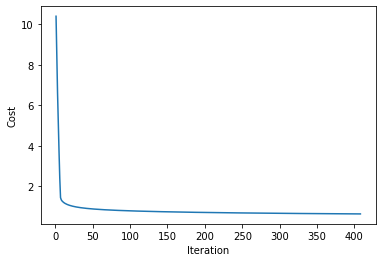

[[-1.82235139e-06 -3.55486820e-06  1.00809733e-05 -4.75913744e-06
  -1.73306432e-05  3.25526776e-05 -4.96947425e-07 -1.68665814e-05
   1.74004837e-05 -2.48624839e-06  2.23170140e-06  5.76207316e-06]
 [-1.00973680e-05  1.71066663e-05  1.34244167e-05 -3.83963310e-05
   8.42996489e-05  3.02433801e-05  1.75297396e-06 -1.37577515e-05
   6.54136280e-06  1.15496545e-05 -4.27349032e-05  9.52330159e-06]
 [ 4.96468569e-05  3.02514423e-05 -5.67045378e-05  9.70394403e-07
  -4.03719311e-06  1.67579589e-07  1.44519136e-06  1.93376392e-06
  -5.88695293e-06  1.75932689e-06  2.11864543e-05 -2.09911644e-05]]
[[-2.65248777e-05 -1.97220593e-05  1.21389326e-04]]


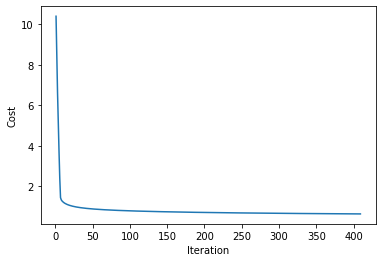

[[-1.81942635e-06 -3.55884163e-06  1.00722499e-05 -4.75113337e-06
  -1.73376004e-05  3.25203898e-05 -4.94341151e-07 -1.68241025e-05
   1.73340743e-05 -2.48244732e-06  2.22389088e-06  5.75712456e-06]
 [-1.00818871e-05  1.70704660e-05  1.34122128e-05 -3.83368293e-05
   8.41495877e-05  3.02135884e-05  1.75066546e-06 -1.37557585e-05
   6.53829128e-06  1.15328434e-05 -4.27288570e-05  9.53269675e-06]
 [ 4.95698715e-05  3.02002730e-05 -5.65502663e-05  9.69175602e-07
  -4.03674670e-06  1.67508030e-07  1.44324771e-06  1.93143761e-06
  -5.88306996e-06  1.75683343e-06  2.11755144e-05 -2.09779063e-05]]
[[-2.64836611e-05 -1.97834157e-05  1.21289197e-04]]


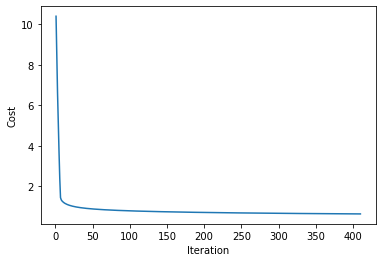

[[-1.81651120e-06 -3.56280051e-06  1.00635587e-05 -4.74315695e-06
  -1.73445270e-05  3.24882250e-05 -4.91746953e-07 -1.67817504e-05
   1.72679698e-05 -2.47865869e-06  2.21610327e-06  5.75219447e-06]
 [-1.00664570e-05  1.70343677e-05  1.34000556e-05 -3.82775235e-05
   8.39999450e-05  3.01839146e-05  1.74836398e-06 -1.37537662e-05
   6.53522696e-06  1.15160862e-05 -4.27228132e-05  9.54203255e-06]
 [ 4.94931405e-05  3.01492505e-05 -5.63966859e-05  9.67960475e-07
  -4.03629976e-06  1.67435030e-07  1.44131018e-06  1.92911933e-06
  -5.87920432e-06  1.75434809e-06  2.11646053e-05 -2.09647019e-05]]
[[-2.64425816e-05 -1.98445622e-05  1.21189435e-04]]


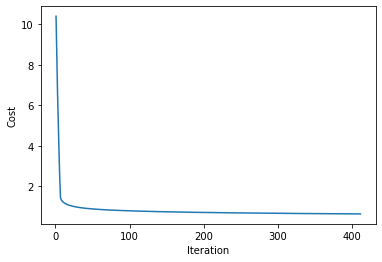

[[-1.81360587e-06 -3.56674489e-06  1.00548996e-05 -4.73520803e-06
  -1.73514232e-05  3.24561823e-05 -4.89164761e-07 -1.67395244e-05
   1.72021681e-05 -2.47488244e-06  2.20833846e-06  5.74728276e-06]
 [-1.00510773e-05  1.69983709e-05  1.33879447e-05 -3.82184126e-05
   8.38507190e-05  3.01543578e-05  1.74606947e-06 -1.37517746e-05
   6.53216979e-06  1.14993826e-05 -4.27167720e-05  9.55130944e-06]
 [ 4.94166627e-05  3.00983742e-05 -5.62437919e-05  9.66749005e-07
  -4.03585228e-06  1.67360603e-07  1.43937875e-06  1.92680904e-06
  -5.87535589e-06  1.75187083e-06  2.11537269e-05 -2.09515510e-05]]
[[-2.64016384e-05 -1.99054995e-05  1.21090041e-04]]


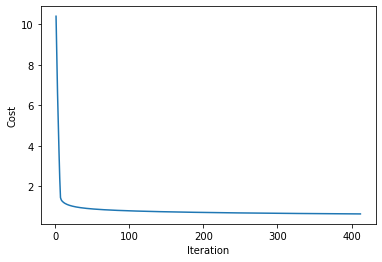

[[-1.81071032e-06 -3.57067483e-06  1.00462722e-05 -4.72728647e-06
  -1.73582891e-05  3.24242611e-05 -4.86594503e-07 -1.66974240e-05
   1.71366672e-05 -2.47111851e-06  2.20059639e-06  5.74238931e-06]
 [-1.00357477e-05  1.69624753e-05  1.33758798e-05 -3.81594957e-05
   8.37019083e-05  3.01249171e-05  1.74378192e-06 -1.37497838e-05
   6.52911976e-06  1.14827324e-05 -4.27107333e-05  9.56052786e-06]
 [ 4.93404367e-05  3.00476436e-05 -5.60915798e-05  9.65541174e-07
  -4.03540428e-06  1.67284764e-07  1.43745337e-06  1.92450669e-06
  -5.87152454e-06  1.74940160e-06  2.11428790e-05 -2.09384532e-05]]
[[-2.63608308e-05 -1.99662285e-05  1.20991010e-04]]


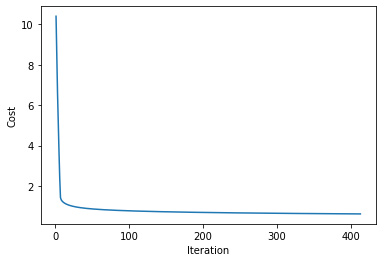

[[-1.80782449e-06 -3.57459038e-06  1.00376766e-05 -4.71939213e-06
  -1.73651247e-05  3.23924605e-05 -4.84036109e-07 -1.66554488e-05
   1.70714649e-05 -2.46736685e-06  2.19287696e-06  5.73751399e-06]
 [-1.00204681e-05  1.69266806e-05  1.33638606e-05 -3.81007718e-05
   8.35535110e-05  3.00955916e-05  1.74150128e-06 -1.37477938e-05
   6.52607682e-06  1.14661352e-05 -4.27046971e-05  9.56968825e-06]
 [ 4.92644614e-05  2.99970581e-05 -5.59400449e-05  9.64336966e-07
  -4.03495575e-06  1.67207528e-07  1.43553403e-06  1.92221227e-06
  -5.86771016e-06  1.74694038e-06  2.11320616e-05 -2.09254081e-05]]
[[-2.63201582e-05 -2.00267499e-05  1.20892342e-04]]


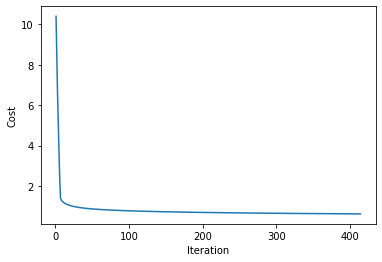

[[-1.80494834e-06 -3.57849159e-06  1.00291123e-05 -4.71152487e-06
  -1.73719302e-05  3.23607798e-05 -4.81489510e-07 -1.66135982e-05
   1.70065594e-05 -2.46362739e-06  2.18518008e-06  5.73265669e-06]
 [-1.00052381e-05  1.68909861e-05  1.33518869e-05 -3.80422399e-05
   8.34055256e-05  3.00663806e-05  1.73922753e-06 -1.37458045e-05
   6.52304096e-06  1.14495909e-05 -4.26986634e-05  9.57879106e-06]
 [ 4.91887355e-05  2.99466171e-05 -5.57891827e-05  9.63136363e-07
  -4.03450670e-06  1.67128910e-07  1.43362069e-06  1.91992572e-06
  -5.86391265e-06  1.74448711e-06  2.11212744e-05 -2.09124155e-05]]
[[-2.62796199e-05 -2.00870644e-05  1.20794032e-04]]


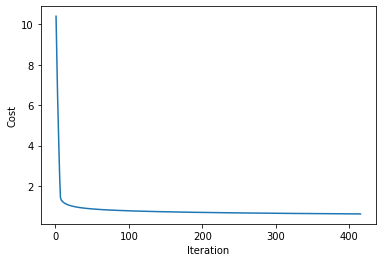

[[-1.80208183e-06 -3.58237850e-06  1.00205793e-05 -4.70368456e-06
  -1.73787057e-05  3.23292182e-05 -4.78954634e-07 -1.65718717e-05
   1.69419487e-05 -2.45990006e-06  2.17750567e-06  5.72781730e-06]
 [-9.99005758e-06  1.68553917e-05  1.33399581e-05 -3.79838991e-05
   8.32579504e-05  3.00372832e-05  1.73696063e-06 -1.37438160e-05
   6.52001213e-06  1.14330992e-05 -4.26926322e-05  9.58783672e-06]
 [ 4.91132577e-05  2.98963199e-05 -5.56389886e-05  9.61939348e-07
  -4.03405713e-06  1.67048924e-07  1.43171332e-06  1.91764702e-06
  -5.86013187e-06  1.74204176e-06  2.11105175e-05 -2.08994750e-05]]
[[-2.62392152e-05 -2.01471728e-05  1.20696081e-04]]


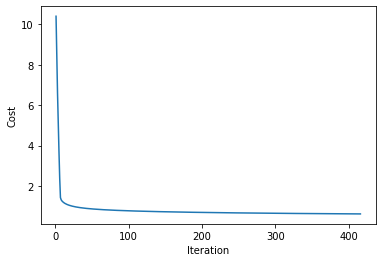

[[-1.79922489e-06 -3.58625118e-06  1.00120773e-05 -4.69587105e-06
  -1.73854513e-05  3.22977750e-05 -4.76431415e-07 -1.65302687e-05
   1.68776306e-05 -2.45618482e-06  2.16985365e-06  5.72299568e-06]
 [-9.97492622e-06  1.68198969e-05  1.33280742e-05 -3.79257484e-05
   8.31107838e-05  3.00082985e-05  1.73470054e-06 -1.37418282e-05
   6.51699031e-06  1.14166597e-05 -4.26866035e-05  9.59682566e-06]
 [ 4.90380268e-05  2.98461661e-05 -5.54894581e-05  9.60745905e-07
  -4.03360704e-06  1.66967583e-07  1.42981189e-06  1.91537614e-06
  -5.85636772e-06  1.73960429e-06  2.10997905e-05 -2.08865862e-05]]
[[-2.61989434e-05 -2.02070758e-05  1.20598484e-04]]


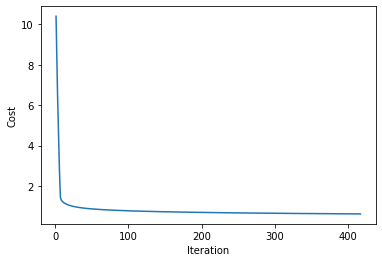

[[-1.79637749e-06 -3.59010968e-06  1.00036062e-05 -4.68808422e-06
  -1.73921671e-05  3.22664493e-05 -4.73919782e-07 -1.64887889e-05
   1.68136033e-05 -2.45248159e-06  2.16222394e-06  5.71819173e-06]
 [-9.95984380e-06  1.67845013e-05  1.33162347e-05 -3.78677869e-05
   8.29640243e-05  2.99794257e-05  1.73244724e-06 -1.37398412e-05
   6.51397547e-06  1.14002724e-05 -4.26805773e-05  9.60575830e-06]
 [ 4.89630415e-05  2.97961550e-05 -5.53405869e-05  9.59556015e-07
  -4.03315645e-06  1.66884903e-07  1.42791639e-06  1.91311303e-06
  -5.85262009e-06  1.73717466e-06  2.10890935e-05 -2.08737488e-05]]
[[-2.61588040e-05 -2.02667742e-05  1.20501239e-04]]


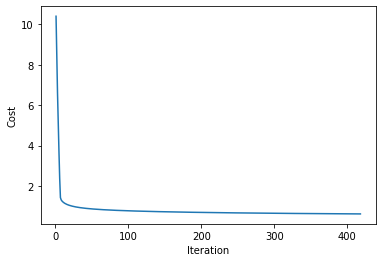

[[-1.79353957e-06 -3.59395404e-06  9.99516573e-06 -4.68032392e-06
  -1.73988531e-05  3.22352406e-05 -4.71419669e-07 -1.64474316e-05
   1.67498648e-05 -2.44879033e-06  2.15461644e-06  5.71340533e-06]
 [-9.94481008e-06  1.67492046e-05  1.33044394e-05 -3.78100136e-05
   8.28176701e-05  2.99506641e-05  1.73020070e-06 -1.37378549e-05
   6.51096758e-06  1.13839368e-05 -4.26745537e-05  9.61463507e-06]
 [ 4.88883008e-05  2.97462861e-05 -5.51923705e-05  9.58369663e-07
  -4.03270534e-06  1.66800897e-07  1.42602676e-06  1.91085767e-06
  -5.84888887e-06  1.73475284e-06  2.10784263e-05 -2.08609625e-05]]
[[-2.61187962e-05 -2.03262687e-05  1.20404346e-04]]


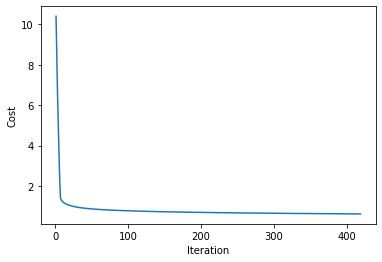

[[-1.79071109e-06 -3.59778431e-06  9.98675573e-06 -4.67259002e-06
  -1.74055096e-05  3.22041479e-05 -4.68931008e-07 -1.64061964e-05
   1.66864133e-05 -2.44511097e-06  2.14703107e-06  5.70863637e-06]
 [-9.92982482e-06  1.67140063e-05  1.32926879e-05 -3.77524277e-05
   8.26717198e-05  2.99220128e-05  1.72796087e-06 -1.37358693e-05
   6.50796660e-06  1.13676528e-05 -4.26685325e-05  9.62345639e-06]
 [ 4.88138033e-05  2.96965587e-05 -5.50448046e-05  9.57186832e-07
  -4.03225374e-06  1.66715579e-07  1.42414300e-06  1.90861003e-06
  -5.84517394e-06  1.73233877e-06  2.10677888e-05 -2.08482269e-05]]
[[-2.60789194e-05 -2.03855600e-05  1.20307801e-04]]


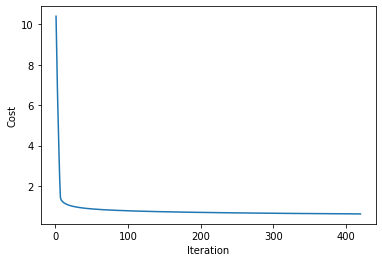

[[-1.78789201e-06 -3.60160055e-06  9.97837599e-06 -4.66488239e-06
  -1.74121365e-05  3.21731707e-05 -4.66453731e-07 -1.63650828e-05
   1.66232467e-05 -2.44144345e-06  2.13946776e-06  5.70388473e-06]
 [-9.91488778e-06  1.66789061e-05  1.32809799e-05 -3.76950281e-05
   8.25261717e-05  2.98934710e-05  1.72572774e-06 -1.37338845e-05
   6.50497251e-06  1.13514201e-05 -4.26625138e-05  9.63222266e-06]
 [ 4.87395478e-05  2.96469724e-05 -5.48978849e-05  9.56007505e-07
  -4.03180163e-06  1.66628962e-07  1.42226506e-06  1.90637005e-06
  -5.84147520e-06  1.72993243e-06  2.10571807e-05 -2.08355418e-05]]
[[-2.60391730e-05 -2.04446489e-05  1.20211602e-04]]


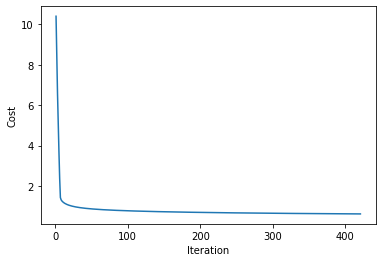

[[-1.78508227e-06 -3.60540280e-06  9.97002633e-06 -4.65720090e-06
  -1.74187341e-05  3.21423082e-05 -4.63987774e-07 -1.63240903e-05
   1.65603632e-05 -2.43778772e-06  2.13192641e-06  5.69915031e-06]
 [-9.89999872e-06  1.66439037e-05  1.32693153e-05 -3.76378140e-05
   8.23810242e-05  2.98650379e-05  1.72350127e-06 -1.37319004e-05
   6.50198528e-06  1.13352384e-05 -4.26564976e-05  9.64093430e-06]
 [ 4.86655331e-05  2.95975266e-05 -5.47516071e-05  9.54831666e-07
  -4.03134902e-06  1.66541061e-07  1.42039293e-06  1.90413773e-06
  -5.83779254e-06  1.72753378e-06  2.10466021e-05 -2.08229068e-05]]
[[-2.59995562e-05 -2.05035361e-05  1.20115746e-04]]


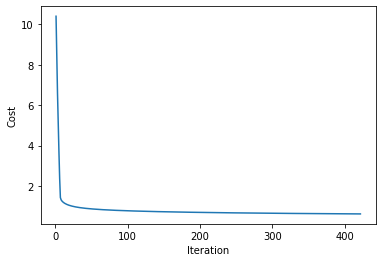

[[-1.78228183e-06 -3.60919112e-06  9.96170658e-06 -4.64954541e-06
  -1.74253023e-05  3.21115596e-05 -4.61533068e-07 -1.62832184e-05
   1.64977609e-05 -2.43414371e-06  2.12440695e-06  5.69443298e-06]
 [-9.88515741e-06  1.66089985e-05  1.32576936e-05 -3.75807844e-05
   8.22362757e-05  2.98367128e-05  1.72128142e-06 -1.37299170e-05
   6.49900488e-06  1.13191076e-05 -4.26504839e-05  9.64959172e-06]
 [ 4.85917582e-05  2.95482206e-05 -5.46059669e-05  9.53659299e-07
  -4.03089592e-06  1.66451887e-07  1.41852657e-06  1.90191301e-06
  -5.83412585e-06  1.72514277e-06  2.10360528e-05 -2.08103215e-05]]
[[-2.59600685e-05 -2.05622224e-05  1.20020233e-04]]


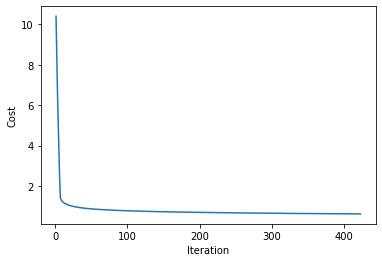

[[-1.77949063e-06 -3.61296556e-06  9.95341654e-06 -4.64191579e-06
  -1.74318413e-05  3.20809243e-05 -4.59089550e-07 -1.62424665e-05
   1.64354380e-05 -2.43051138e-06  2.11690930e-06  5.68973265e-06]
 [-9.87036361e-06  1.65741903e-05  1.32461145e-05 -3.75239385e-05
   8.20919248e-05  2.98084949e-05  1.71906817e-06 -1.37279344e-05
   6.49603128e-06  1.13030273e-05 -4.26444727e-05  9.65819531e-06]
 [ 4.85182217e-05  2.94990540e-05 -5.44609601e-05  9.52490388e-07
  -4.03044232e-06  1.66361456e-07  1.41666595e-06  1.89969587e-06
  -5.83047502e-06  1.72275938e-06  2.10255327e-05 -2.07977857e-05]]
[[-2.59207093e-05 -2.06207083e-05  1.19925060e-04]]


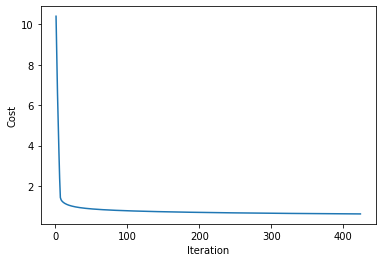

[[-1.77670865e-06 -3.61672616e-06  9.94515603e-06 -4.63431191e-06
  -1.74383513e-05  3.20504015e-05 -4.56657155e-07 -1.62018343e-05
   1.63733926e-05 -2.42689066e-06  2.10943337e-06  5.68504920e-06]
 [-9.85561710e-06  1.65394787e-05  1.32345779e-05 -3.74672753e-05
   8.19479698e-05  2.97803833e-05  1.71686149e-06 -1.37259525e-05
   6.49306445e-06  1.12869973e-05 -4.26384639e-05  9.66674548e-06]
 [ 4.84449225e-05  2.94500261e-05 -5.43165827e-05  9.51324916e-07
  -4.02998824e-06  1.66269779e-07  1.41481106e-06  1.89748628e-06
  -5.82683995e-06  1.72038355e-06  2.10150416e-05 -2.07852991e-05]]
[[-2.58814778e-05 -2.06789948e-05  1.19830224e-04]]


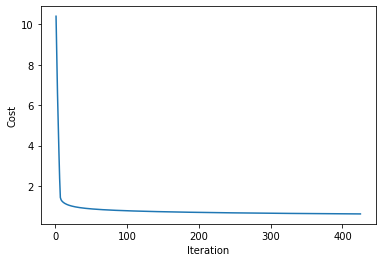

[[-1.77393583e-06 -3.62047298e-06  9.93692487e-06 -4.62673365e-06
  -1.74448322e-05  3.20199906e-05 -4.54235817e-07 -1.61613213e-05
   1.63116228e-05 -2.42328150e-06  2.10197908e-06  5.68038252e-06]
 [-9.84091764e-06  1.65048633e-05  1.32230833e-05 -3.74107940e-05
   8.18044092e-05  2.97523775e-05  1.71466134e-06 -1.37239713e-05
   6.49010436e-06  1.12710174e-05 -4.26324577e-05  9.67524261e-06]
 [ 4.83718595e-05  2.94011364e-05 -5.41728304e-05  9.50162867e-07
  -4.02953368e-06  1.66176869e-07  1.41296185e-06  1.89528420e-06
  -5.82322055e-06  1.71801527e-06  2.10045794e-05 -2.07728613e-05]]
[[-2.58423736e-05 -2.07370824e-05  1.19735724e-04]]


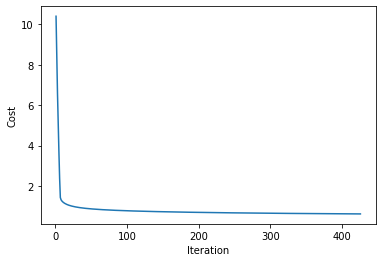

[[-1.77117212e-06 -3.62420606e-06  9.92872287e-06 -4.61918087e-06
  -1.74512842e-05  3.19896909e-05 -4.51825472e-07 -1.61209268e-05
   1.62501270e-05 -2.41968385e-06  2.09454635e-06  5.67573252e-06]
 [-9.82626501e-06  1.64703437e-05  1.32116306e-05 -3.73544936e-05
   8.16612415e-05  2.97244765e-05  1.71246770e-06 -1.37219909e-05
   6.48715099e-06  1.12550874e-05 -4.26264539e-05  9.68368710e-06]
 [ 4.82990315e-05  2.93523844e-05 -5.40296991e-05  9.49004226e-07
  -4.02907863e-06  1.66082739e-07  1.41111831e-06  1.89308961e-06
  -5.81961669e-06  1.71565448e-06  2.09941461e-05 -2.07604720e-05]]
[[-2.58033959e-05 -2.07949719e-05  1.19641557e-04]]


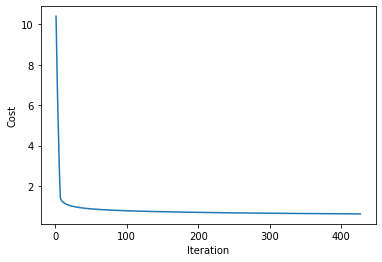

[[-1.76841748e-06 -3.62792545e-06  9.92054987e-06 -4.61165346e-06
  -1.74577075e-05  3.19595017e-05 -4.49426058e-07 -1.60806506e-05
   1.61889033e-05 -2.41609764e-06  2.08713511e-06  5.67109907e-06]
 [-9.81165897e-06  1.64359196e-05  1.32002195e-05 -3.72983733e-05
   8.15184651e-05  2.96966797e-05  1.71028054e-06 -1.37200111e-05
   6.48420430e-06  1.12392069e-05 -4.26204526e-05  9.69207934e-06]
 [ 4.82264373e-05  2.93037696e-05 -5.38871849e-05  9.47848976e-07
  -4.02862310e-06  1.65987402e-07  1.40928040e-06  1.89090245e-06
  -5.81602828e-06  1.71330116e-06  2.09837414e-05 -2.07481310e-05]]
[[-2.57645441e-05 -2.08526640e-05  1.19547722e-04]]


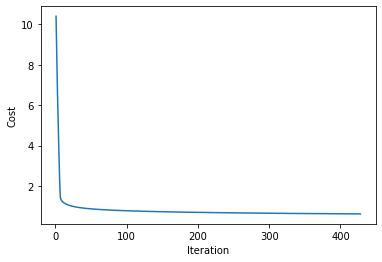

[[-1.76567187e-06 -3.63163120e-06  9.91240569e-06 -4.60415127e-06
  -1.74641020e-05  3.19294223e-05 -4.47037511e-07 -1.60404920e-05
   1.61279498e-05 -2.41252281e-06  2.07974526e-06  5.66648208e-06]
 [-9.79709930e-06  1.64015907e-05  1.31888496e-05 -3.72424322e-05
   8.13760785e-05  2.96689863e-05  1.70809982e-06 -1.37180321e-05
   6.48126427e-06  1.12233758e-05 -4.26144538e-05  9.70041971e-06]
 [ 4.81540758e-05  2.92552913e-05 -5.37452837e-05  9.46697103e-07
  -4.02816710e-06  1.65890871e-07  1.40744811e-06  1.88872272e-06
  -5.81245522e-06  1.71095526e-06  2.09733653e-05 -2.07358379e-05]]
[[-2.57258176e-05 -2.09101593e-05  1.19454217e-04]]


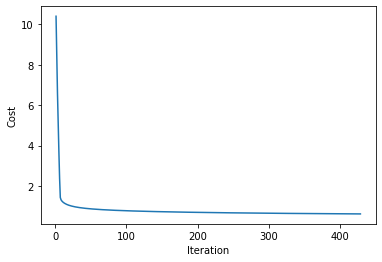

[[-1.76293525e-06 -3.63532337e-06  9.90429014e-06 -4.59667419e-06
  -1.74704679e-05  3.18994520e-05 -4.44659768e-07 -1.60004506e-05
   1.60672649e-05 -2.40895933e-06  2.07237674e-06  5.66188144e-06]
 [-9.78258579e-06  1.63673565e-05  1.31775207e-05 -3.71866695e-05
   8.12340802e-05  2.96413956e-05  1.70592551e-06 -1.37160538e-05
   6.47833086e-06  1.12075939e-05 -4.26084575e-05  9.70870858e-06]
 [ 4.80819459e-05  2.92069490e-05 -5.36039915e-05  9.45548590e-07
  -4.02771063e-06  1.65793157e-07  1.40562139e-06  1.88655037e-06
  -5.80889741e-06  1.70861675e-06  2.09630176e-05 -2.07235924e-05]]
[[-2.56872159e-05 -2.09674587e-05  1.19361039e-04]]


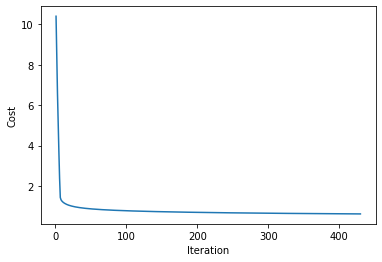

[[-1.76020756e-06 -3.63900199e-06  9.89620306e-06 -4.58922209e-06
  -1.74768053e-05  3.18695902e-05 -4.42292767e-07 -1.59605260e-05
   1.60068468e-05 -2.40540713e-06  2.06502945e-06  5.65729705e-06]
 [-9.76811819e-06  1.63332167e-05  1.31662325e-05 -3.71310842e-05
   8.10924687e-05  2.96139068e-05  1.70375759e-06 -1.37140763e-05
   6.47540406e-06  1.11918608e-05 -4.26024636e-05  9.71694634e-06]
 [ 4.80100465e-05  2.91587422e-05 -5.34633044e-05  9.44403422e-07
  -4.02725369e-06  1.65694273e-07  1.40380024e-06  1.88438537e-06
  -5.80535475e-06  1.70628559e-06  2.09526983e-05 -2.07113943e-05]]
[[-2.56487383e-05 -2.10245628e-05  1.19268186e-04]]


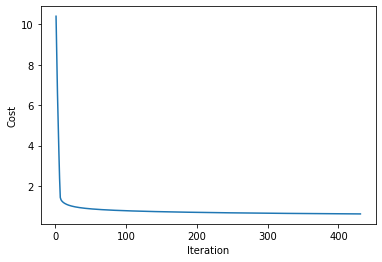

[[-1.75748876e-06 -3.64266712e-06  9.88814427e-06 -4.58179485e-06
  -1.74831143e-05  3.18398361e-05 -4.39936447e-07 -1.59207176e-05
   1.59466938e-05 -2.40186615e-06  2.05770333e-06  5.65272881e-06]
 [-9.75369630e-06  1.62991709e-05  1.31549848e-05 -3.70756755e-05
   8.09512424e-05  2.95865194e-05  1.70159603e-06 -1.37120994e-05
   6.47248383e-06  1.11761764e-05 -4.25964722e-05  9.72513335e-06]
 [ 4.79383763e-05  2.91106703e-05 -5.33232184e-05  9.43261583e-07
  -4.02679628e-06  1.65594231e-07  1.40198461e-06  1.88222769e-06
  -5.80182714e-06  1.70396176e-06  2.09424072e-05 -2.06992431e-05]]
[[-2.56103842e-05 -2.10814723e-05  1.19175656e-04]]


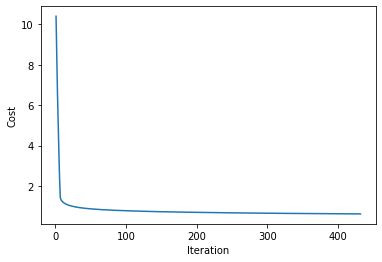

[[-1.75477881e-06 -3.64631880e-06  9.88011360e-06 -4.57439234e-06
  -1.74893950e-05  3.18101893e-05 -4.37590746e-07 -1.58810251e-05
   1.58868041e-05 -2.39833634e-06  2.05039830e-06  5.64817662e-06]
 [-9.73931989e-06  1.62652188e-05  1.31437772e-05 -3.70204425e-05
   8.08103999e-05  2.95592325e-05  1.69944080e-06 -1.37101233e-05
   6.46957014e-06  1.11605404e-05 -4.25904833e-05  9.73326999e-06]
 [ 4.78669344e-05  2.90627328e-05 -5.31837297e-05  9.42123058e-07
  -4.02633841e-06  1.65493043e-07  1.40017449e-06  1.88007730e-06
  -5.79831448e-06  1.70164520e-06  2.09321441e-05 -2.06871387e-05]]
[[-2.55721530e-05 -2.11381879e-05  1.19083449e-04]]


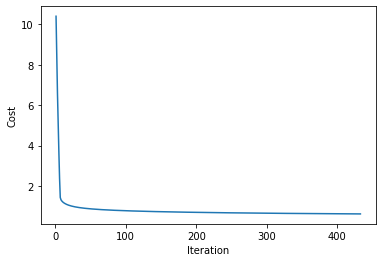

[[-1.75207767e-06 -3.64995708e-06  9.87211089e-06 -4.56701445e-06
  -1.74956475e-05  3.17806489e-05 -4.35255603e-07 -1.58414478e-05
   1.58271761e-05 -2.39481766e-06  2.04311427e-06  5.64364036e-06]
 [-9.72498875e-06  1.62313600e-05  1.31326096e-05 -3.69653845e-05
   8.06699397e-05  2.95320454e-05  1.69729186e-06 -1.37081478e-05
   6.46666297e-06  1.11449526e-05 -4.25844968e-05  9.74135661e-06]
 [ 4.77957196e-05  2.90149292e-05 -5.30448345e-05  9.40987833e-07
  -4.02588008e-06  1.65390720e-07  1.39836985e-06  1.87793417e-06
  -5.79481667e-06  1.69933590e-06  2.09219091e-05 -2.06750808e-05]]
[[-2.55340441e-05 -2.11947102e-05  1.18991560e-04]]


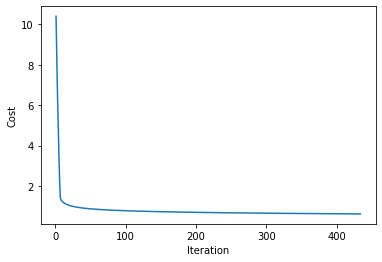

[[-1.74938530e-06 -3.65358201e-06  9.86413596e-06 -4.55966104e-06
  -1.75018718e-05  3.17512144e-05 -4.32930958e-07 -1.58019855e-05
   1.57678081e-05 -2.39131004e-06  2.03585118e-06  5.63911996e-06]
 [-9.71070265e-06  1.61975942e-05  1.31214817e-05 -3.69105005e-05
   8.05298604e-05  2.95049575e-05  1.69514919e-06 -1.37061731e-05
   6.46376229e-06  1.11294127e-05 -4.25785129e-05  9.74939359e-06]
 [ 4.77247309e-05  2.89672590e-05 -5.29065289e-05  9.39855891e-07
  -4.02542130e-06  1.65287275e-07  1.39657065e-06  1.87579827e-06
  -5.79133363e-06  1.69703380e-06  2.09117019e-05 -2.06630690e-05]]
[[-2.5496057e-05 -2.1251040e-05  1.1889999e-04]]


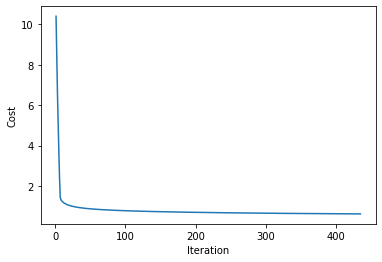

[[-1.74670165e-06 -3.65719364e-06  9.85618864e-06 -4.55233200e-06
  -1.75080682e-05  3.17218851e-05 -4.30616752e-07 -1.57626376e-05
   1.57086983e-05 -2.38781343e-06  2.02860893e-06  5.63461529e-06]
 [-9.69646138e-06  1.61639210e-05  1.31103932e-05 -3.68557897e-05
   8.03901604e-05  2.94779680e-05  1.69301276e-06 -1.37041991e-05
   6.46086808e-06  1.11139207e-05 -4.25725313e-05  9.75738128e-06]
 [ 4.76539670e-05  2.89197215e-05 -5.27688091e-05  9.38727219e-07
  -4.02496206e-06  1.65182719e-07  1.39477689e-06  1.87366956e-06
  -5.78786524e-06  1.69473889e-06  2.09015224e-05 -2.06511030e-05]]
[[-2.54581910e-05 -2.13071780e-05  1.18808735e-04]]


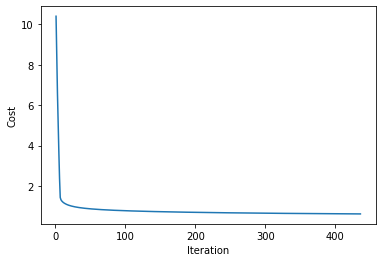

[[-1.74402668e-06 -3.66079201e-06  9.84826879e-06 -4.54502722e-06
  -1.75142366e-05  3.16926604e-05 -4.28312923e-07 -1.57234036e-05
   1.56498452e-05 -2.38432779e-06  2.02138746e-06  5.63012628e-06]
 [-9.68226473e-06  1.61303401e-05  1.30993438e-05 -3.68012513e-05
   8.02508383e-05  2.94510763e-05  1.69088254e-06 -1.37022258e-05
   6.45798030e-06  1.10984761e-05 -4.25665523e-05  9.76532004e-06]
 [ 4.75834270e-05  2.88723164e-05 -5.26316714e-05  9.37601800e-07
  -4.02450238e-06  1.65077063e-07  1.39298852e-06  1.87154801e-06
  -5.78441142e-06  1.69245112e-06  2.08913706e-05 -2.06391827e-05]]
[[-2.54204455e-05 -2.13631247e-05  1.18717794e-04]]


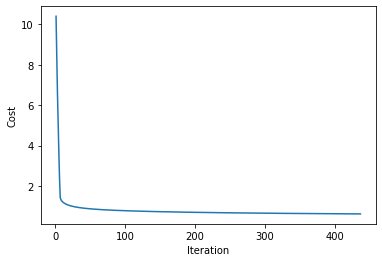

[[-1.74136034e-06 -3.66437717e-06  9.84037622e-06 -4.53774656e-06
  -1.75203771e-05  3.16635396e-05 -4.26019414e-07 -1.56842831e-05
   1.55912470e-05 -2.38085305e-06  2.01418669e-06  5.62565282e-06]
 [-9.66811248e-06  1.60968511e-05  1.30883333e-05 -3.67468844e-05
   8.01118926e-05  2.94242818e-05  1.68875851e-06 -1.37002532e-05
   6.45509893e-06  1.10830788e-05 -4.25605757e-05  9.77321021e-06]
 [ 4.75131097e-05  2.88250430e-05 -5.24951122e-05  9.36479620e-07
  -4.02404224e-06  1.64970319e-07  1.39120553e-06  1.86943360e-06
  -5.78097208e-06  1.69017045e-06  2.08812463e-05 -2.06273077e-05]]
[[-2.53828201e-05 -2.14188810e-05  1.18627165e-04]]


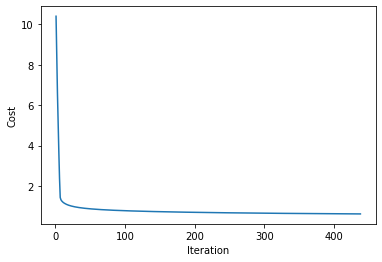

[[-1.73870260e-06 -3.66794917e-06  9.83251077e-06 -4.53048991e-06
  -1.75264899e-05  3.16345222e-05 -4.23736165e-07 -1.56452757e-05
   1.55329023e-05 -2.37738917e-06  2.00700654e-06  5.62119481e-06]
 [-9.65400443e-06  1.60634537e-05  1.30773614e-05 -3.66926883e-05
   7.99733219e-05  2.93975836e-05  1.68664063e-06 -1.36982813e-05
   6.45222394e-06  1.10677286e-05 -4.25546015e-05  9.78105215e-06]
 [ 4.74430142e-05  2.87779009e-05 -5.23591276e-05  9.35360665e-07
  -4.02358166e-06  1.64862498e-07  1.38942789e-06  1.86732629e-06
  -5.77754712e-06  1.68789686e-06  2.08711494e-05 -2.06154777e-05]]
[[-2.53453140e-05 -2.14744474e-05  1.18536846e-04]]


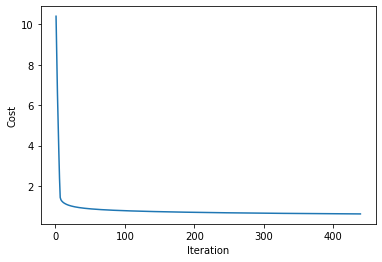

[[-1.73605342e-06 -3.67150805e-06  9.82467230e-06 -4.52325716e-06
  -1.75325751e-05  3.16056075e-05 -4.21463119e-07 -1.56063808e-05
   1.54748093e-05 -2.37393609e-06  1.99984693e-06  5.61675216e-06]
 [-9.63994035e-06  1.60301474e-05  1.30664279e-05 -3.66386621e-05
   7.98351247e-05  2.93709813e-05  1.68452888e-06 -1.36963101e-05
   6.44935531e-06  1.10524252e-05 -4.25486298e-05  9.78884621e-06]
 [ 4.73731393e-05  2.87308895e-05 -5.22237141e-05  9.34244919e-07
  -4.02312065e-06  1.64753611e-07  1.38765558e-06  1.86522606e-06
  -5.77413644e-06  1.68563032e-06  2.08610798e-05 -2.06036924e-05]]
[[-2.53079268e-05 -2.15298247e-05  1.18446836e-04]]


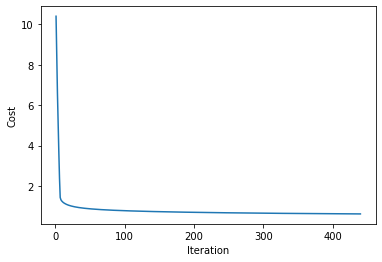

[[-1.73341274e-06 -3.67505385e-06  9.81686062e-06 -4.51604818e-06
  -1.75386327e-05  3.15767949e-05 -4.19200217e-07 -1.55675981e-05
   1.54169664e-05 -2.37049377e-06  1.99270780e-06  5.61232478e-06]
 [-9.62592005e-06  1.59969321e-05  1.30555326e-05 -3.65848050e-05
   7.96972996e-05  2.93444741e-05  1.68242323e-06 -1.36943396e-05
   6.44649300e-06  1.10371685e-05 -4.25426606e-05  9.79659271e-06]
 [ 4.73034840e-05  2.86840082e-05 -5.20888681e-05  9.33132369e-07
  -4.02265919e-06  1.64643669e-07  1.38588857e-06  1.86313287e-06
  -5.77073997e-06  1.68337078e-06  2.08510373e-05 -2.05919516e-05]]
[[-2.52706578e-05 -2.15850135e-05  1.18357131e-04]]


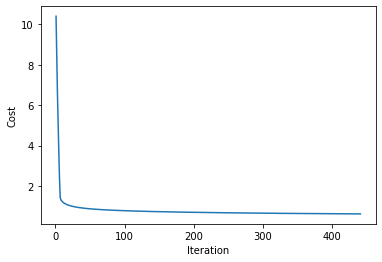

[[-1.73078054e-06 -3.67858664e-06  9.80907560e-06 -4.50886287e-06
  -1.75446629e-05  3.15480837e-05 -4.16947403e-07 -1.55289271e-05
   1.53593721e-05 -2.36706215e-06  1.98558907e-06  5.60791256e-06]
 [-9.61194331e-06  1.59638073e-05  1.30446752e-05 -3.65311162e-05
   7.95598453e-05  2.93180613e-05  1.68032365e-06 -1.36923698e-05
   6.44363700e-06  1.10219582e-05 -4.25366938e-05  9.80429201e-06]
 [ 4.72340472e-05  2.86372567e-05 -5.19545859e-05  9.32022999e-07
  -4.02219730e-06  1.64532682e-07  1.38412683e-06  1.86104670e-06
  -5.76735760e-06  1.68111821e-06  2.08410220e-05 -2.05802551e-05]]
[[-2.52335066e-05 -2.16400145e-05  1.18267732e-04]]


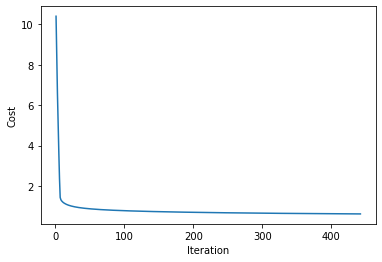

[[-1.72815677e-06 -3.68210644e-06  9.80131707e-06 -4.50170110e-06
  -1.75506656e-05  3.15194735e-05 -4.14704618e-07 -1.54903674e-05
   1.53020248e-05 -2.36364118e-06  1.97849065e-06  5.60351543e-06]
 [-9.59800994e-06  1.59307728e-05  1.30338554e-05 -3.64775949e-05
   7.94227601e-05  2.92917424e-05  1.67823011e-06 -1.36904007e-05
   6.44078728e-06  1.10067940e-05 -4.25307295e-05  9.81194444e-06]
 [ 4.71648279e-05  2.85906344e-05 -5.18208640e-05  9.30916795e-07
  -4.02173498e-06  1.64420662e-07  1.38237034e-06  1.85896750e-06
  -5.76398924e-06  1.67887258e-06  2.08310335e-05 -2.05686024e-05]]
[[-2.51964725e-05 -2.16948283e-05  1.18178635e-04]]


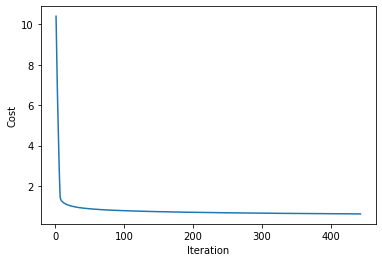

[[-1.72554140e-06 -3.68561331e-06  9.79358487e-06 -4.49456276e-06
  -1.75566412e-05  3.14909636e-05 -4.12471806e-07 -1.54519184e-05
   1.52449229e-05 -2.36023081e-06  1.97141248e-06  5.59913328e-06]
 [-9.58411971e-06  1.58978280e-05  1.30230731e-05 -3.64242403e-05
   7.92860429e-05  2.92655167e-05  1.67614259e-06 -1.36884322e-05
   6.43794381e-06  1.09916759e-05 -4.25247676e-05  9.81955033e-06]
 [ 4.70958250e-05  2.85441408e-05 -5.16876990e-05  9.29813744e-07
  -4.02127223e-06  1.64307620e-07  1.38061908e-06  1.85689526e-06
  -5.76063482e-06  1.67663386e-06  2.08210720e-05 -2.05569935e-05]]
[[-2.51595549e-05 -2.17494556e-05  1.18089839e-04]]


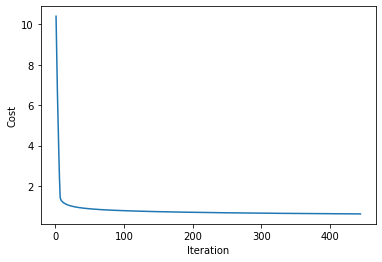

[[-1.72293437e-06 -3.68910729e-06  9.78587885e-06 -4.48744774e-06
  -1.75625895e-05  3.14625533e-05 -4.10248912e-07 -1.54135799e-05
   1.51880649e-05 -2.35683100e-06  1.96435449e-06  5.59476602e-06]
 [-9.57027244e-06  1.58649729e-05  1.30123279e-05 -3.63710516e-05
   7.91496920e-05  2.92393835e-05  1.67406107e-06 -1.36864645e-05
   6.43510656e-06  1.09766035e-05 -4.25188082e-05  9.82711001e-06]
 [ 4.70270376e-05  2.84977754e-05 -5.15550872e-05  9.28713830e-07
  -4.02080905e-06  1.64193565e-07  1.37887303e-06  1.85482995e-06
  -5.75729424e-06  1.67440202e-06  2.08111371e-05 -2.05454279e-05]]
[[-2.51227534e-05 -2.18038971e-05  1.18001342e-04]]


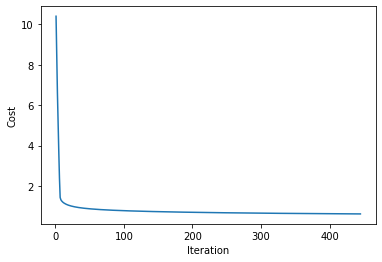

[[-1.72033565e-06 -3.69258843e-06  9.77819886e-06 -4.48035592e-06
  -1.75685107e-05  3.14342422e-05 -4.08035879e-07 -1.53753512e-05
   1.51314493e-05 -2.35344168e-06  1.95731659e-06  5.59041357e-06]
 [-9.55646791e-06  1.58322069e-05  1.30016197e-05 -3.63180281e-05
   7.90137063e-05  2.92133422e-05  1.67198550e-06 -1.36844975e-05
   6.43227552e-06  1.09615766e-05 -4.25128512e-05  9.83462382e-06]
 [ 4.69584646e-05  2.84515376e-05 -5.14230252e-05  9.27617040e-07
  -4.02034545e-06  1.64078508e-07  1.37713215e-06  1.85277153e-06
  -5.75396740e-06  1.67217702e-06  2.08012289e-05 -2.05339055e-05]]
[[-2.50860674e-05 -2.18581533e-05  1.17913143e-04]]


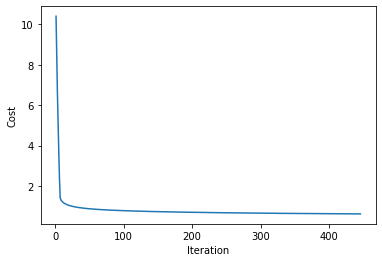

[[-1.71774520e-06 -3.69605677e-06  9.77054474e-06 -4.47328719e-06
  -1.75744050e-05  3.14060295e-05 -4.05832652e-07 -1.53372321e-05
   1.50750745e-05 -2.35006282e-06  1.95029872e-06  5.58607583e-06]
 [-9.54270593e-06  1.57995297e-05  1.29909481e-05 -3.62651688e-05
   7.88780841e-05  2.91873923e-05  1.66991587e-06 -1.36825311e-05
   6.42945065e-06  1.09465951e-05 -4.25068967e-05  9.84209206e-06]
 [ 4.68901050e-05  2.84054270e-05 -5.12915097e-05  9.26523360e-07
  -4.01988143e-06  1.63962459e-07  1.37539642e-06  1.85071997e-06
  -5.75065424e-06  1.66995882e-06  2.07913472e-05 -2.05224259e-05]]
[[-2.50494964e-05 -2.19122251e-05  1.17825240e-04]]


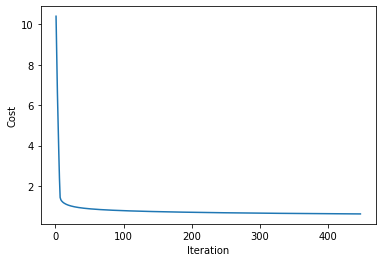

[[-1.71516298e-06 -3.69951235e-06  9.76291635e-06 -4.46624144e-06
  -1.75802723e-05  3.13779149e-05 -4.03639175e-07 -1.52992220e-05
   1.50189390e-05 -2.34669437e-06  1.94330080e-06  5.58175272e-06]
 [-9.52898629e-06  1.57669411e-05  1.29803131e-05 -3.62124732e-05
   7.87428243e-05  2.91615331e-05  1.66785215e-06 -1.36805655e-05
   6.42663192e-06  1.09316587e-05 -4.25009446e-05  9.84951507e-06]
 [ 4.68219578e-05  2.83594431e-05 -5.11605371e-05  9.25432775e-07
  -4.01941700e-06  1.63845430e-07  1.37366583e-06  1.84867526e-06
  -5.74735465e-06  1.66774741e-06  2.07814920e-05 -2.05109890e-05]]
[[-2.50130397e-05 -2.19661129e-05  1.17737631e-04]]


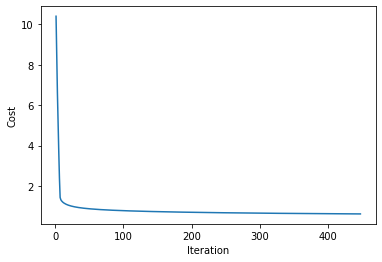

[[-1.71258896e-06 -3.70295523e-06  9.75531353e-06 -4.45921856e-06
  -1.75861128e-05  3.13498976e-05 -4.01455395e-07 -1.52613206e-05
   1.49630414e-05 -2.34333626e-06  1.93632276e-06  5.57744415e-06]
 [-9.51530881e-06  1.57344407e-05  1.29697142e-05 -3.61599403e-05
   7.86079253e-05  2.91357639e-05  1.66579431e-06 -1.36786005e-05
   6.42381932e-06  1.09167673e-05 -4.24949949e-05  9.85689316e-06]
 [ 4.67540219e-05  2.83135853e-05 -5.10301041e-05  9.24345273e-07
  -4.01895214e-06  1.63727428e-07  1.37194034e-06  1.84663735e-06
  -5.74406856e-06  1.66554274e-06  2.07716630e-05 -2.04995945e-05]]
[[-2.49766969e-05 -2.20198175e-05  1.17650314e-04]]


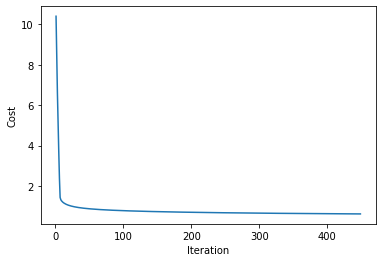

[[-1.71002309e-06 -3.70638544e-06  9.74773614e-06 -4.45221843e-06
  -1.75919266e-05  3.13219771e-05 -3.99281256e-07 -1.52235274e-05
   1.49073801e-05 -2.33998847e-06  1.92936453e-06  5.57315002e-06]
 [-9.50167327e-06  1.57020282e-05  1.29591514e-05 -3.61075694e-05
   7.84733859e-05  2.91100843e-05  1.66374233e-06 -1.36766362e-05
   6.42101282e-06  1.09019205e-05 -4.24890477e-05  9.86422664e-06]
 [ 4.66862964e-05  2.82678533e-05 -5.09002074e-05  9.23260838e-07
  -4.01848688e-06  1.63608465e-07  1.37021994e-06  1.84460622e-06
  -5.74079588e-06  1.66334478e-06  2.07618602e-05 -2.04882421e-05]]
[[-2.49404673e-05 -2.20733394e-05  1.17563287e-04]]


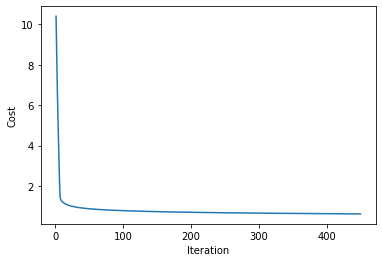

[[-1.70746533e-06 -3.70980303e-06  9.74018403e-06 -4.44524096e-06
  -1.75977138e-05  3.12941528e-05 -3.97116706e-07 -1.51858419e-05
   1.48519537e-05 -2.33665093e-06  1.92242604e-06  5.56887025e-06]
 [-9.48807949e-06  1.56697032e-05  1.29486244e-05 -3.60553599e-05
   7.83392046e-05  2.90844935e-05  1.66169618e-06 -1.36746726e-05
   6.41821240e-06  1.08871183e-05 -4.24831029e-05  9.87151584e-06]
 [ 4.66187804e-05  2.82222464e-05 -5.07708437e-05  9.22179458e-07
  -4.01802121e-06  1.63488551e-07  1.36850459e-06  1.84258184e-06
  -5.73753652e-06  1.66115351e-06  2.07520835e-05 -2.04769315e-05]]
[[-2.49043506e-05 -2.21266794e-05  1.17476550e-04]]


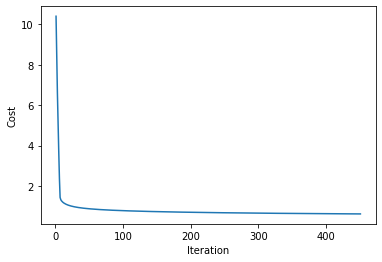

[[-1.70491565e-06 -3.71320804e-06  9.73265705e-06 -4.43828602e-06
  -1.76034744e-05  3.12664242e-05 -3.94961690e-07 -1.51482639e-05
   1.47967607e-05 -2.33332360e-06  1.91550721e-06  5.56460476e-06]
 [-9.47452726e-06  1.56374654e-05  1.29381329e-05 -3.60033108e-05
   7.82053801e-05  2.90589910e-05  1.65965583e-06 -1.36727096e-05
   6.41541802e-06  1.08723603e-05 -4.24771605e-05  9.87876105e-06]
 [ 4.65514727e-05  2.81767643e-05 -5.06420096e-05  9.21101118e-07
  -4.01755514e-06  1.63367695e-07  1.36679429e-06  1.84056418e-06
  -5.73429040e-06  1.65896889e-06  2.07423328e-05 -2.04656625e-05]]
[[-2.48683461e-05 -2.21798381e-05  1.17390099e-04]]


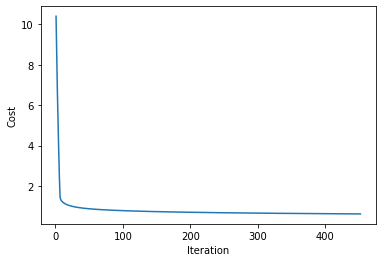

[[-1.70237401e-06 -3.71660053e-06  9.72515506e-06 -4.43135351e-06
  -1.76092085e-05  3.12387908e-05 -3.92816155e-07 -1.51107927e-05
   1.47417997e-05 -2.33000644e-06  1.90860797e-06  5.56035346e-06]
 [-9.46101640e-06  1.56053145e-05  1.29276768e-05 -3.59514215e-05
   7.80719110e-05  2.90335763e-05  1.65762126e-06 -1.36707474e-05
   6.41262967e-06  1.08576465e-05 -4.24712206e-05  9.88596259e-06]
 [ 4.64843725e-05  2.81314064e-05 -5.05137019e-05  9.20025806e-07
  -4.01708866e-06  1.63245907e-07  1.36508900e-06  1.83855321e-06
  -5.73105745e-06  1.65679089e-06  2.07326079e-05 -2.04544350e-05]]
[[-2.48324534e-05 -2.22328161e-05  1.17303935e-04]]


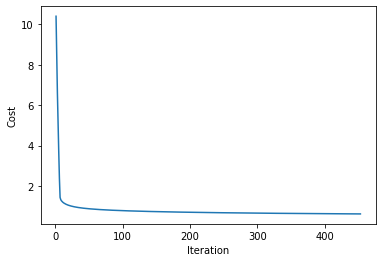

[[-1.69984036e-06 -3.71998052e-06  9.71767792e-06 -4.42444333e-06
  -1.76149163e-05  3.12112519e-05 -3.90680049e-07 -1.50734281e-05
   1.46870692e-05 -2.32669939e-06  1.90172825e-06  5.55611627e-06]
 [-9.44754672e-06  1.55732502e-05  1.29172558e-05 -3.58996911e-05
   7.79387961e-05  2.90082487e-05  1.65559245e-06 -1.36687858e-05
   6.40984731e-06  1.08429765e-05 -4.24652831e-05  9.89312076e-06]
 [ 4.64174787e-05  2.80861723e-05 -5.03859173e-05  9.18953508e-07
  -4.01662178e-06  1.63123196e-07  1.36338869e-06  1.83654891e-06
  -5.72783757e-06  1.65461947e-06  2.07229089e-05 -2.04432485e-05]]
[[-2.47966719e-05 -2.22856139e-05  1.17218054e-04]]


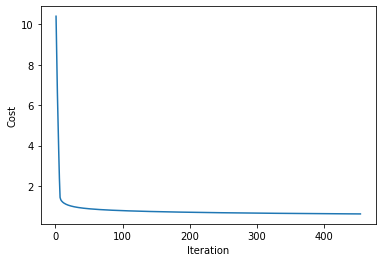

[[-1.69731468e-06 -3.72334806e-06  9.71022547e-06 -4.41755537e-06
  -1.76205978e-05  3.11838071e-05 -3.88553318e-07 -1.50361695e-05
   1.46325679e-05 -2.32340241e-06  1.89486799e-06  5.55189310e-06]
 [-9.43411801e-06  1.55412721e-05  1.29068697e-05 -3.58481191e-05
   7.78060339e-05  2.89830076e-05  1.65356936e-06 -1.36668249e-05
   6.40707093e-06  1.08283502e-05 -4.24593480e-05  9.90023585e-06]
 [ 4.63507904e-05  2.80410614e-05 -5.02586526e-05  9.17884210e-07
  -4.01615450e-06  1.62999572e-07  1.36169336e-06  1.83455125e-06
  -5.72463069e-06  1.65245461e-06  2.07132355e-05 -2.04321029e-05]]
[[-2.47610010e-05 -2.23382324e-05  1.17132455e-04]]


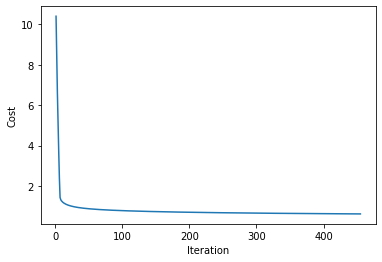

[[-1.69479692e-06 -3.72670321e-06  9.70279759e-06 -4.41068951e-06
  -1.76262532e-05  3.11564557e-05 -3.86435912e-07 -1.49990167e-05
   1.45782942e-05 -2.32011545e-06  1.88802711e-06  5.54768386e-06]
 [-9.42073010e-06  1.55093800e-05  1.28965183e-05 -3.57967046e-05
   7.76736232e-05  2.89578525e-05  1.65155197e-06 -1.36648647e-05
   6.40430051e-06  1.08137674e-05 -4.24534154e-05  9.90730818e-06]
 [ 4.62843066e-05  2.79960733e-05 -5.01319048e-05  9.16817899e-07
  -4.01568683e-06  1.62875045e-07  1.36000297e-06  1.83256020e-06
  -5.72143673e-06  1.65029628e-06  2.07035876e-05 -2.04209979e-05]]
[[-2.47254403e-05 -2.23906720e-05  1.17047138e-04]]


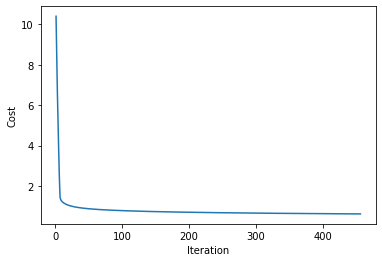

[[-1.69228705e-06 -3.73004599e-06  9.69539413e-06 -4.40384566e-06
  -1.76318824e-05  3.11291973e-05 -3.84327779e-07 -1.49619691e-05
   1.45242469e-05 -2.31683847e-06  1.88120553e-06  5.54348848e-06]
 [-9.40738279e-06  1.54775734e-05  1.28862013e-05 -3.57454469e-05
   7.75415626e-05  2.89327829e-05  1.64954026e-06 -1.36629051e-05
   6.40153601e-06  1.07992280e-05 -4.24474851e-05  9.91433803e-06]
 [ 4.62180265e-05  2.79512075e-05 -5.00056705e-05  9.15754562e-07
  -4.01521877e-06  1.62749622e-07  1.35831751e-06  1.83057573e-06
  -5.71825560e-06  1.64814445e-06  2.06939653e-05 -2.04099333e-05]]
[[-2.46899893e-05 -2.24429334e-05  1.16962099e-04]]


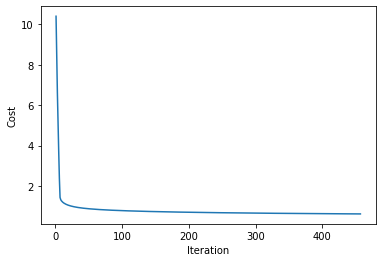

[[-1.68978503e-06 -3.73337646e-06  9.68801496e-06 -4.39702371e-06
  -1.76374856e-05  3.11020313e-05 -3.82228866e-07 -1.49250264e-05
   1.44704245e-05 -2.31357142e-06  1.87440320e-06  5.53930688e-06]
 [-9.39407589e-06  1.54458522e-05  1.28759186e-05 -3.56943452e-05
   7.74098508e-05  2.89077980e-05  1.64753420e-06 -1.36609462e-05
   6.39877741e-06  1.07847316e-05 -4.24415573e-05  9.92132570e-06]
 [ 4.61519489e-05  2.79064636e-05 -4.98799467e-05  9.14694186e-07
  -4.01475032e-06  1.62623315e-07  1.35663694e-06  1.82859782e-06
  -5.71508723e-06  1.64599909e-06  2.06843683e-05 -2.03989089e-05]]
[[-2.46546474e-05 -2.24950173e-05  1.16877338e-04]]


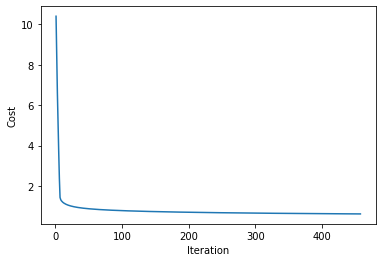

[[-1.68729082e-06 -3.73669465e-06  9.68065992e-06 -4.39022355e-06
  -1.76430628e-05  3.10749571e-05 -3.80139123e-07 -1.48881881e-05
   1.44168257e-05 -2.31031425e-06  1.86762004e-06  5.53513897e-06]
 [-9.38080922e-06  1.54142160e-05  1.28656699e-05 -3.56433989e-05
   7.72784864e-05  2.88828975e-05  1.64553377e-06 -1.36589880e-05
   6.39602470e-06  1.07702781e-05 -4.24356320e-05  9.92827147e-06]
 [ 4.60860731e-05  2.78618411e-05 -4.97547302e-05  9.13636758e-07
  -4.01428148e-06  1.62496131e-07  1.35496126e-06  1.82662643e-06
  -5.71193154e-06  1.64386016e-06  2.06747965e-05 -2.03879244e-05]]
[[-2.46194142e-05 -2.25469242e-05  1.16792852e-04]]


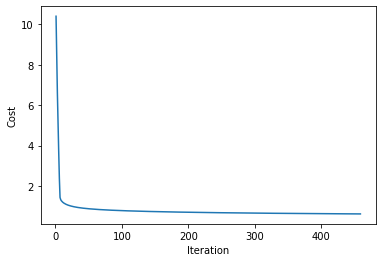

[[-1.68480439e-06 -3.74000061e-06  9.67332890e-06 -4.38344509e-06
  -1.76486142e-05  3.10479744e-05 -3.78058500e-07 -1.48514538e-05
   1.43634491e-05 -2.30706693e-06  1.86085598e-06  5.53098467e-06]
 [-9.36758260e-06  1.53826644e-05  1.28554551e-05 -3.55926072e-05
   7.71474683e-05  2.88580808e-05  1.64353894e-06 -1.36570305e-05
   6.39327784e-06  1.07558673e-05 -4.24297090e-05  9.93517565e-06]
 [ 4.60203980e-05  2.78173394e-05 -4.96300180e-05  9.12582265e-07
  -4.01381226e-06  1.62368080e-07  1.35329043e-06  1.82466154e-06
  -5.70878845e-06  1.64172763e-06  2.06652499e-05 -2.03769796e-05]]
[[-2.45842891e-05 -2.25986547e-05  1.16708642e-04]]


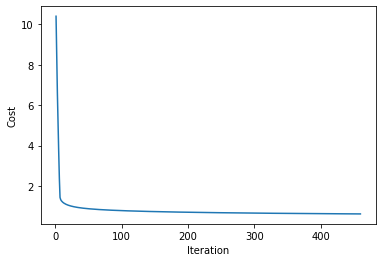

[[-1.68232570e-06 -3.74329439e-06  9.66602175e-06 -4.37668822e-06
  -1.76541399e-05  3.10210825e-05 -3.75986947e-07 -1.48148232e-05
   1.43102933e-05 -2.30382939e-06  1.85411096e-06  5.52684390e-06]
 [-9.35439583e-06  1.53511972e-05  1.28452739e-05 -3.55419694e-05
   7.70167950e-05  2.88333472e-05  1.64154969e-06 -1.36550736e-05
   6.39053681e-06  1.07414990e-05 -4.24237884e-05  9.94203850e-06]
 [ 4.59549228e-05  2.77729582e-05 -4.95058070e-05  9.11530694e-07
  -4.01334265e-06  1.62239171e-07  1.35162443e-06  1.82270313e-06
  -5.70565789e-06  1.63960149e-06  2.06557283e-05 -2.03660742e-05]]
[[-2.45492716e-05 -2.26502096e-05  1.16624703e-04]]


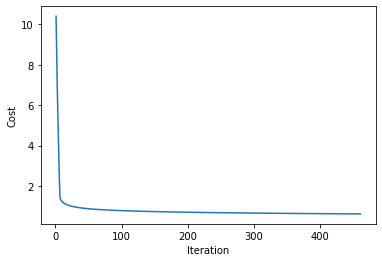

[[-1.67985471e-06 -3.74657601e-06  9.65873833e-06 -4.36995283e-06
  -1.76596399e-05  3.09942809e-05 -3.73924412e-07 -1.47782959e-05
   1.42573570e-05 -2.30060160e-06  1.84738490e-06  5.52271659e-06]
 [-9.34124874e-06  1.53198140e-05  1.28351261e-05 -3.54914848e-05
   7.68864653e-05  2.88086964e-05  1.63956599e-06 -1.36531174e-05
   6.38780159e-06  1.07271730e-05 -4.24178703e-05  9.94886032e-06]
 [ 4.58896464e-05  2.77286970e-05 -4.93820943e-05  9.10482032e-07
  -4.01287267e-06  1.62109412e-07  1.34996325e-06  1.82075116e-06
  -5.70253977e-06  1.63748169e-06  2.06462317e-05 -2.03552081e-05]]
[[-2.45143613e-05 -2.27015892e-05  1.16541036e-04]]


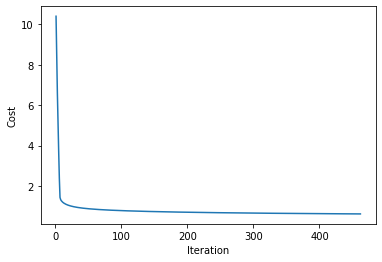

[[-1.67739139e-06 -3.74984553e-06  9.65147852e-06 -4.36323883e-06
  -1.76651143e-05  3.09675691e-05 -3.71870848e-07 -1.47418713e-05
   1.42046389e-05 -2.29738352e-06  1.84067774e-06  5.51860265e-06]
 [-9.32814114e-06  1.52885146e-05  1.28250116e-05 -3.54411527e-05
   7.67564780e-05  2.87841276e-05  1.63758781e-06 -1.36511618e-05
   6.38507216e-06  1.07128892e-05 -4.24119546e-05  9.95564138e-06]
 [ 4.58245680e-05  2.76845553e-05 -4.92588767e-05  9.09436266e-07
  -4.01240232e-06  1.61978813e-07  1.34830685e-06  1.81880561e-06
  -5.69943403e-06  1.63536821e-06  2.06367600e-05 -2.03443809e-05]]
[[-2.44795576e-05 -2.27527944e-05  1.16457639e-04]]


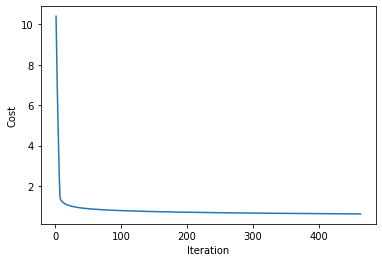

[[-1.67493571e-06 -3.75310299e-06  9.64424218e-06 -4.35654611e-06
  -1.76705632e-05  3.09409466e-05 -3.69826204e-07 -1.47055492e-05
   1.41521376e-05 -2.29417509e-06  1.83398941e-06  5.51450201e-06]
 [-9.31507285e-06  1.52572986e-05  1.28149300e-05 -3.53909724e-05
   7.66268316e-05  2.87596405e-05  1.63561515e-06 -1.36492069e-05
   6.38234849e-06  1.06986473e-05 -4.24060413e-05  9.96238197e-06]
 [ 4.57596867e-05  2.76405326e-05 -4.91361514e-05  9.08393384e-07
  -4.01193159e-06  1.61847381e-07  1.34665523e-06  1.81686645e-06
  -5.69634058e-06  1.63326102e-06  2.06273130e-05 -2.03335925e-05]]
[[-2.44448600e-05 -2.28038257e-05  1.16374510e-04]]


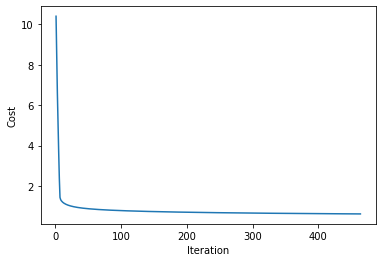

[[-1.67248762e-06 -3.75634843e-06  9.63702918e-06 -4.34987458e-06
  -1.76759867e-05  3.09144129e-05 -3.67790431e-07 -1.46693291e-05
   1.40998519e-05 -2.29097629e-06  1.82731985e-06  5.51041458e-06]
 [-9.30204370e-06  1.52261657e-05  1.28048813e-05 -3.53409431e-05
   7.64975251e-05  2.87352344e-05  1.63364796e-06 -1.36472527e-05
   6.37963056e-06  1.06844471e-05 -4.24001304e-05  9.96908235e-06]
 [ 4.56950016e-05  2.75966285e-05 -4.90139153e-05  9.07353373e-07
  -4.01146049e-06  1.61715125e-07  1.34500836e-06  1.81493366e-06
  -5.69325935e-06  1.63116009e-06  2.06178906e-05 -2.03228427e-05]]
[[-2.44102682e-05 -2.28546836e-05  1.16291648e-04]]


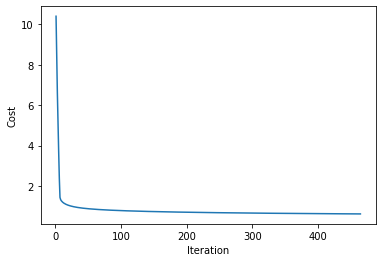

[[-1.67004709e-06 -3.75958188e-06  9.62983938e-06 -4.34322413e-06
  -1.76813849e-05  3.08879675e-05 -3.65763482e-07 -1.46332107e-05
   1.40477805e-05 -2.28778705e-06  1.82066898e-06  5.50634030e-06]
 [-9.28905350e-06  1.51951157e-05  1.27948651e-05 -3.52910643e-05
   7.63685570e-05  2.87109089e-05  1.63168623e-06 -1.36452991e-05
   6.37691834e-06  1.06702885e-05 -4.23942219e-05  9.97574281e-06]
 [ 4.56305118e-05  2.75528426e-05 -4.88921655e-05  9.06316221e-07
  -4.01098902e-06  1.61582054e-07  1.34336621e-06  1.81300720e-06
  -5.69019028e-06  1.62906539e-06  2.06084929e-05 -2.03121311e-05]]
[[-2.43757815e-05 -2.29053688e-05  1.16209051e-04]]


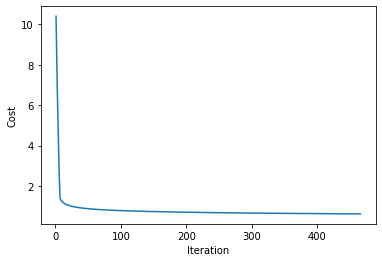

[[-1.66761409e-06 -3.76280340e-06  9.62267267e-06 -4.33659467e-06
  -1.76867578e-05  3.08616100e-05 -3.63745307e-07 -1.45971935e-05
   1.39959220e-05 -2.28460734e-06  1.81403673e-06  5.50227909e-06]
 [-9.27610208e-06  1.51641482e-05  1.27848814e-05 -3.52413352e-05
   7.62399261e-05  2.86866635e-05  1.62972993e-06 -1.36433462e-05
   6.37421182e-06  1.06561712e-05 -4.23883158e-05  9.98236361e-06]
 [ 4.55662163e-05  2.75091744e-05 -4.87708991e-05  9.05281915e-07
  -4.01051719e-06  1.61448176e-07  1.34172876e-06  1.81108706e-06
  -5.68713327e-06  1.62697689e-06  2.05991195e-05 -2.03014577e-05]]
[[-2.43413995e-05 -2.29558819e-05  1.16126717e-04]]


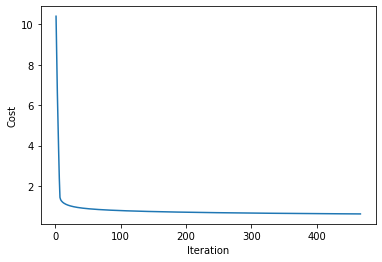

[[-1.66518858e-06 -3.76601301e-06  9.61552891e-06 -4.32998609e-06
  -1.76921056e-05  3.08353397e-05 -3.61735860e-07 -1.45612772e-05
   1.39442752e-05 -2.28143711e-06  1.80742305e-06  5.49823086e-06]
 [-9.26318925e-06  1.51332629e-05  1.27749299e-05 -3.51917550e-05
   7.61116312e-05  2.86624975e-05  1.62777903e-06 -1.36413939e-05
   6.37151097e-06  1.06420952e-05 -4.23824121e-05  9.98894502e-06]
 [ 4.55021142e-05  2.74656234e-05 -4.86501133e-05  9.04250443e-07
  -4.01004499e-06  1.61313499e-07  1.34009600e-06  1.80917321e-06
  -5.68408827e-06  1.62489457e-06  2.05897706e-05 -2.02908221e-05]]
[[-2.43071217e-05 -2.30062235e-05  1.16044646e-04]]


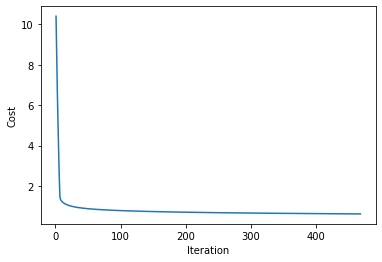

[[-1.66277053e-06 -3.76921077e-06  9.60840797e-06 -4.32339831e-06
  -1.76974283e-05  3.08091562e-05 -3.59735092e-07 -1.45254613e-05
   1.38928388e-05 -2.27827633e-06  1.80082787e-06  5.49419556e-06]
 [-9.25031485e-06  1.51024595e-05  1.27650105e-05 -3.51423233e-05
   7.59836710e-05  2.86384106e-05  1.62583353e-06 -1.36394423e-05
   6.36881577e-06  1.06280601e-05 -4.23765108e-05  9.99548731e-06]
 [ 4.54382048e-05  2.74221892e-05 -4.85298052e-05  9.03221793e-07
  -4.00957244e-06  1.61178032e-07  1.33846791e-06  1.80726561e-06
  -5.68105520e-06  1.62281839e-06  2.05804459e-05 -2.02802242e-05]]
[[-2.42729476e-05 -2.30563942e-05  1.15962835e-04]]


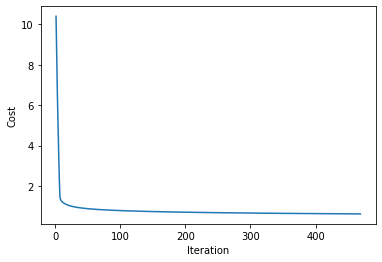

[[-1.66035990e-06 -3.77239672e-06  9.60130973e-06 -4.31683121e-06
  -1.77027260e-05  3.07830591e-05 -3.57742957e-07 -1.44897455e-05
   1.38416115e-05 -2.27512494e-06  1.79425111e-06  5.49017309e-06]
 [-9.23747870e-06  1.50717378e-05  1.27551229e-05 -3.50930392e-05
   7.58560443e-05  2.86144022e-05  1.62389339e-06 -1.36374913e-05
   6.36612620e-06  1.06140659e-05 -4.23706119e-05  1.00019907e-05]
 [ 4.53744871e-05  2.73788714e-05 -4.84099719e-05  9.02195952e-07
  -4.00909953e-06  1.61041783e-07  1.33684446e-06  1.80536425e-06
  -5.67803398e-06  1.62074834e-06  2.05711453e-05 -2.02696638e-05]]
[[-2.42388768e-05 -2.31063945e-05  1.15881284e-04]]


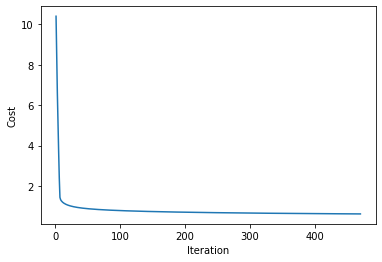

[[-1.65795666e-06 -3.77557089e-06  9.59423406e-06 -4.31028471e-06
  -1.77079988e-05  3.07570478e-05 -3.55759406e-07 -1.44541294e-05
   1.37905922e-05 -2.27198291e-06  1.78769272e-06  5.48616339e-06]
 [-9.22468063e-06  1.50410974e-05  1.27452669e-05 -3.50439020e-05
   7.57287499e-05  2.85904718e-05  1.62195858e-06 -1.36355410e-05
   6.36344223e-06  1.06001122e-05 -4.23647155e-05  1.00084556e-05]
 [ 4.53109602e-05  2.73356694e-05 -4.82906106e-05  9.01172909e-07
  -4.00862626e-06  1.60904759e-07  1.33522562e-06  1.80346910e-06
  -5.67502455e-06  1.61868437e-06  2.05618688e-05 -2.02591405e-05]]
[[-2.42049088e-05 -2.31562250e-05  1.15799991e-04]]


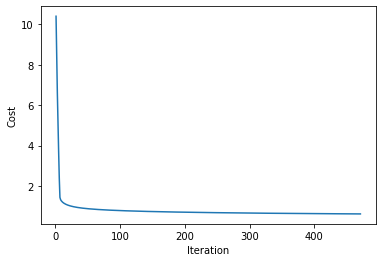

[[-1.65556077e-06 -3.77873332e-06  9.58718084e-06 -4.30375871e-06
  -1.77132467e-05  3.07311219e-05 -3.53784395e-07 -1.44186127e-05
   1.37397796e-05 -2.26885020e-06  1.78115263e-06  5.48216639e-06]
 [-9.21192046e-06  1.50105380e-05  1.27354423e-05 -3.49949112e-05
   7.56017865e-05  2.85666189e-05  1.62002909e-06 -1.36335914e-05
   6.36076384e-06  1.05861991e-05 -4.23588214e-05  1.00148821e-05]
 [ 4.52476233e-05  2.72925830e-05 -4.81717185e-05  9.00152650e-07
  -4.00815264e-06  1.60766969e-07  1.33361139e-06  1.80158014e-06
  -5.67202684e-06  1.61662647e-06  2.05526164e-05 -2.02486543e-05]]
[[-2.41710432e-05 -2.32058863e-05  1.15718954e-04]]


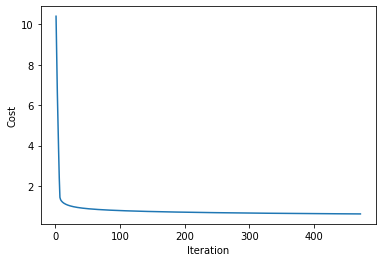

[[-1.65317220e-06 -3.78188405e-06  9.58014995e-06 -4.29725311e-06
  -1.77184699e-05  3.07052810e-05 -3.51817875e-07 -1.43831948e-05
   1.36891724e-05 -2.26572675e-06  1.77463078e-06  5.47818201e-06]
 [-9.19919802e-06  1.49800593e-05  1.27256491e-05 -3.49460661e-05
   7.54751529e-05  2.85428431e-05  1.61810489e-06 -1.36316423e-05
   6.35809101e-06  1.05723262e-05 -4.23529297e-05  1.00212705e-05]
 [ 4.51844755e-05  2.72496115e-05 -4.80532929e-05  8.99135165e-07
  -4.00767867e-06  1.60628420e-07  1.33200174e-06  1.79969733e-06
  -5.66904078e-06  1.61457460e-06  2.05433877e-05 -2.02382049e-05]]
[[-2.41372794e-05 -2.32553791e-05  1.15638172e-04]]


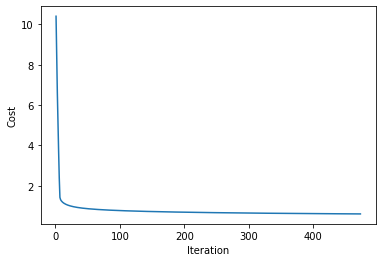

[[-1.65079093e-06 -3.78502314e-06  9.57314125e-06 -4.29076782e-06
  -1.77236685e-05  3.06795244e-05 -3.49859803e-07 -1.43478755e-05
   1.36387695e-05 -2.26261254e-06  1.76812709e-06  5.47421019e-06]
 [-9.18651315e-06  1.49496611e-05  1.27158869e-05 -3.48973659e-05
   7.53488478e-05  2.85191438e-05  1.61618597e-06 -1.36296940e-05
   6.35542372e-06  1.05584934e-05 -4.23470404e-05  1.00276210e-05]
 [ 4.51215159e-05  2.72067547e-05 -4.79353311e-05  8.98120441e-07
  -4.00720435e-06  1.60489121e-07  1.33039666e-06  1.79782065e-06
  -5.66606629e-06  1.61252874e-06  2.05341829e-05 -2.02277921e-05]]
[[-2.41036170e-05 -2.33047038e-05  1.15557644e-04]]


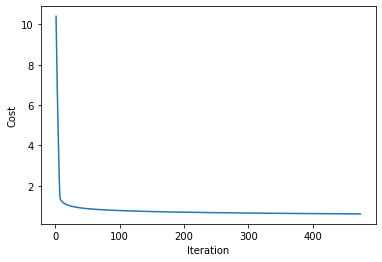

[[-1.64841690e-06 -3.78815060e-06  9.56615464e-06 -4.28430275e-06
  -1.77288424e-05  3.06538518e-05 -3.47910131e-07 -1.43126544e-05
   1.35885696e-05 -2.25950752e-06  1.76164151e-06  5.47025084e-06]
 [-9.17386567e-06  1.49193430e-05  1.27061556e-05 -3.48488101e-05
   7.52228701e-05  2.84955205e-05  1.61427229e-06 -1.36277463e-05
   6.35276195e-06  1.05447005e-05 -4.23411534e-05  1.00339341e-05]
 [ 4.50587438e-05  2.71640120e-05 -4.78178302e-05  8.97108466e-07
  -4.00672969e-06  1.60349078e-07  1.32879611e-06  1.79595008e-06
  -5.66310331e-06  1.61048886e-06  2.05250018e-05 -2.02174156e-05]]
[[-2.40700555e-05 -2.33538611e-05  1.15477368e-04]]


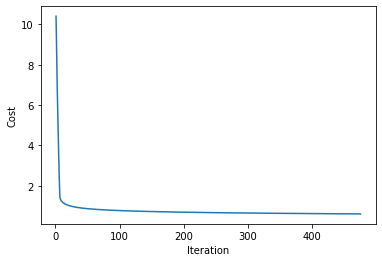

[[-1.64605010e-06 -3.79126649e-06  9.55918998e-06 -4.27785780e-06
  -1.77339919e-05  3.06282627e-05 -3.45968814e-07 -1.42775311e-05
   1.35385716e-05 -2.25641164e-06  1.75517397e-06  5.46630390e-06]
 [-9.16125541e-06  1.48891048e-05  1.26964551e-05 -3.48003980e-05
   7.50972186e-05  2.84719729e-05  1.61236383e-06 -1.36257992e-05
   6.35010567e-06  1.05309473e-05 -4.23352689e-05  1.00402097e-05]
 [ 4.49961582e-05  2.71213830e-05 -4.77007876e-05  8.96099229e-07
  -4.00625469e-06  1.60208300e-07  1.32720008e-06  1.79408559e-06
  -5.66015176e-06  1.60845493e-06  2.05158442e-05 -2.02070754e-05]]
[[-2.40365945e-05 -2.34028515e-05  1.15397343e-04]]


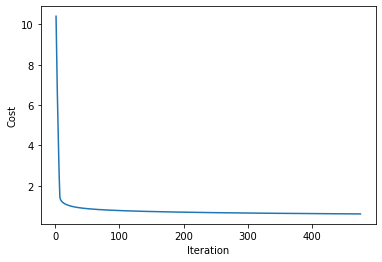

[[-1.64369048e-06 -3.79437084e-06  9.55224716e-06 -4.27143287e-06
  -1.77391169e-05  3.06027567e-05 -3.44035808e-07 -1.42425052e-05
   1.34887742e-05 -2.25332487e-06  1.74872441e-06  5.46236930e-06]
 [-9.14868221e-06  1.48589462e-05  1.26867850e-05 -3.47521290e-05
   7.49718920e-05  2.84485004e-05  1.61046058e-06 -1.36238528e-05
   6.34745487e-06  1.05172337e-05 -4.23293868e-05  1.00464483e-05]
 [ 4.49337583e-05  2.70788673e-05 -4.75842006e-05  8.95092718e-07
  -4.00577934e-06  1.60066795e-07  1.32560855e-06  1.79222716e-06
  -5.65721159e-06  1.60642693e-06  2.05067102e-05 -2.01967711e-05]]
[[-2.40032336e-05 -2.34516756e-05  1.15317568e-04]]


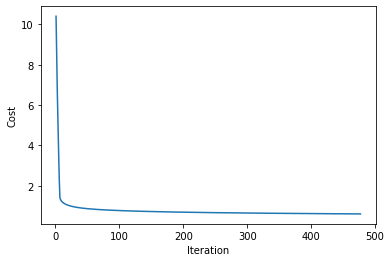

[[-1.64133802e-06 -3.79746370e-06  9.54532607e-06 -4.26502788e-06
  -1.77442176e-05  3.05773332e-05 -3.42111068e-07 -1.42075764e-05
   1.34391763e-05 -2.25024716e-06  1.74229276e-06  5.45844696e-06]
 [-9.13614591e-06  1.48288669e-05  1.26771453e-05 -3.47040023e-05
   7.48468892e-05  2.84251025e-05  1.60856251e-06 -1.36219070e-05
   6.34480952e-06  1.05035595e-05 -4.23235070e-05  1.00526501e-05]
 [ 4.48715432e-05  2.70364645e-05 -4.74680665e-05  8.94088921e-07
  -4.00530366e-06  1.59924568e-07  1.32402151e-06  1.79037477e-06
  -5.65428273e-06  1.60440483e-06  2.04975996e-05 -2.01865025e-05]]
[[-2.39699722e-05 -2.35003340e-05  1.15238040e-04]]


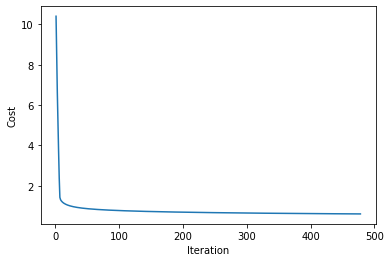

[[-1.63899269e-06 -3.80054510e-06  9.53842658e-06 -4.25864273e-06
  -1.77492941e-05  3.05519919e-05 -3.40194549e-07 -1.41727442e-05
   1.33897767e-05 -2.24717848e-06  1.73587896e-06  5.45453683e-06]
 [-9.12364633e-06  1.47988665e-05  1.26675358e-05 -3.46560173e-05
   7.47222090e-05  2.84017788e-05  1.60666959e-06 -1.36199618e-05
   6.34216959e-06  1.04899245e-05 -4.23176296e-05  1.00588153e-05]
 [ 4.48095122e-05  2.69941741e-05 -4.73523828e-05  8.93087826e-07
  -4.00482765e-06  1.59781629e-07  1.32243892e-06  1.78852838e-06
  -5.65136510e-06  1.60238860e-06  2.04885123e-05 -2.01762696e-05]]
[[-2.39368100e-05 -2.35488272e-05  1.15158759e-04]]


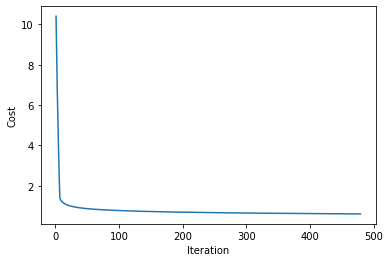

[[-1.63665444e-06 -3.80361508e-06  9.53154857e-06 -4.25227733e-06
  -1.77543464e-05  3.05267323e-05 -3.38286207e-07 -1.41380084e-05
   1.33405742e-05 -2.24411878e-06  1.72948295e-06  5.45063883e-06]
 [-9.11118332e-06  1.47689449e-05  1.26579563e-05 -3.46081735e-05
   7.45978501e-05  2.83785289e-05  1.60478181e-06 -1.36180173e-05
   6.33953508e-06  1.04763286e-05 -4.23117546e-05  1.00649442e-05]
 [ 4.47476644e-05  2.69519958e-05 -4.72371467e-05  8.92089423e-07
  -4.00435130e-06  1.59637984e-07  1.32086078e-06  1.78668797e-06
  -5.64845865e-06  1.60037823e-06  2.04794482e-05 -2.01660720e-05]]
[[-2.39037464e-05 -2.35971558e-05  1.15079724e-04]]


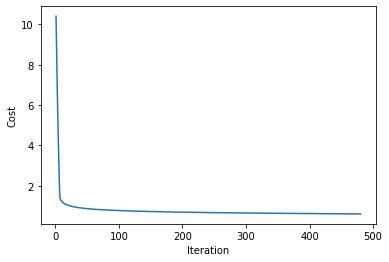

[[-1.63432325e-06 -3.80667367e-06  9.52469193e-06 -4.24593160e-06
  -1.77593745e-05  3.05015539e-05 -3.36385998e-07 -1.41033685e-05
   1.32915677e-05 -2.24106803e-06  1.72310466e-06  5.44675290e-06]
 [-9.09875670e-06  1.47391017e-05  1.26484066e-05 -3.45604702e-05
   7.44738115e-05  2.83553521e-05  1.60289915e-06 -1.36160734e-05
   6.33690596e-06  1.04627715e-05 -4.23058820e-05  1.00710369e-05]
 [ 4.46859990e-05  2.69099290e-05 -4.71223557e-05  8.91093700e-07
  -4.00387462e-06  1.59493641e-07  1.31928706e-06  1.78485352e-06
  -5.64556330e-06  1.59837367e-06  2.04704073e-05 -2.01559096e-05]]
[[-2.38707811e-05 -2.36453203e-05  1.15000933e-04]]


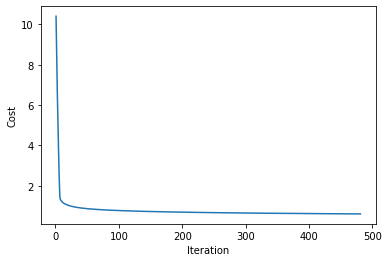

[[-1.63199909e-06 -3.80972093e-06  9.51785654e-06 -4.23960543e-06
  -1.77643787e-05  3.04764563e-05 -3.34493880e-07 -1.40688242e-05
   1.32427561e-05 -2.23802619e-06  1.71674404e-06  5.44287896e-06]
 [-9.08636632e-06  1.47093367e-05  1.26388866e-05 -3.45129067e-05
   7.43500919e-05  2.83322483e-05  1.60102158e-06 -1.36141302e-05
   6.33428220e-06  1.04492530e-05 -4.23000118e-05  1.00770938e-05]
 [ 4.46245151e-05  2.68679734e-05 -4.70080072e-05  8.90100644e-07
  -4.00339761e-06  1.59348606e-07  1.31771774e-06  1.78302501e-06
  -5.64267899e-06  1.59637490e-06  2.04613894e-05 -2.01457822e-05]]
[[-2.38379136e-05 -2.36933214e-05  1.14922385e-04]]


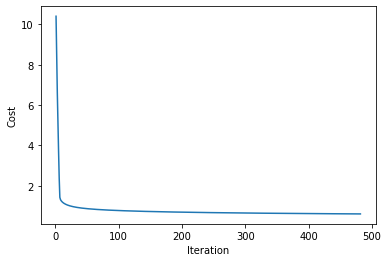

[[-1.62968192e-06 -3.81275689e-06  9.51104230e-06 -4.23329875e-06
  -1.77693589e-05  3.04514391e-05 -3.32609807e-07 -1.40343751e-05
   1.31941382e-05 -2.23499320e-06  1.71040102e-06  5.43901694e-06]
 [-9.07401202e-06  1.46796495e-05  1.26293960e-05 -3.44654825e-05
   7.42266902e-05  2.83092167e-05  1.59914907e-06 -1.36121876e-05
   6.33166379e-06  1.04357732e-05 -4.22941439e-05  1.00831150e-05]
 [ 4.45632120e-05  2.68261286e-05 -4.68940987e-05  8.89110246e-07
  -4.00292028e-06  1.59202887e-07  1.31615280e-06  1.78120240e-06
  -5.63980566e-06  1.59438191e-06  2.04523944e-05 -2.01356895e-05]]
[[-2.38051434e-05 -2.37411595e-05  1.14844078e-04]]


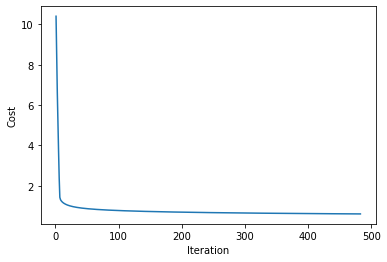

[[-1.62737171e-06 -3.81578158e-06  9.50424908e-06 -4.22701145e-06
  -1.77743153e-05  3.04265018e-05 -3.30733738e-07 -1.40000208e-05
   1.31457130e-05 -2.23196905e-06  1.70407553e-06  5.43516680e-06]
 [-9.06169364e-06  1.46500400e-05  1.26199348e-05 -3.44181969e-05
   7.41036051e-05  2.82862571e-05  1.59728162e-06 -1.36102456e-05
   6.32905071e-06  1.04223316e-05 -4.22882784e-05  1.00891009e-05]
 [ 4.45020888e-05  2.67843941e-05 -4.67806276e-05  8.88122494e-07
  -4.00244262e-06  1.59056491e-07  1.31459223e-06  1.77938569e-06
  -5.63694324e-06  1.59239466e-06  2.04434224e-05 -2.01256315e-05]]
[[-2.37724702e-05 -2.37888353e-05  1.14766011e-04]]


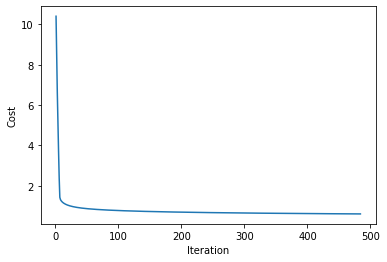

[[-1.62506844e-06 -3.81879504e-06  9.49747678e-06 -4.22074346e-06
  -1.77792478e-05  3.04016440e-05 -3.28865631e-07 -1.39657611e-05
   1.30974792e-05 -2.22895368e-06  1.69776753e-06  5.43132844e-06]
 [-9.04941101e-06  1.46205077e-05  1.26105027e-05 -3.43710492e-05
   7.39808357e-05  2.82633690e-05  1.59541919e-06 -1.36083043e-05
   6.32644293e-06  1.04089283e-05 -4.22824153e-05  1.00950516e-05]
 [ 4.44411448e-05  2.67427696e-05 -4.66675914e-05  8.87137376e-07
  -4.00196465e-06  1.58909425e-07  1.31303600e-06  1.77757483e-06
  -5.63409167e-06  1.59041312e-06  2.04344731e-05 -2.01156078e-05]]
[[-2.37398934e-05 -2.38363492e-05  1.14688183e-04]]


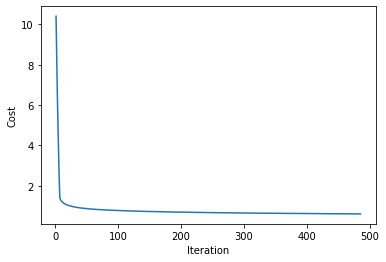

[[-1.62277206e-06 -3.82179731e-06  9.49072527e-06 -4.21449469e-06
  -1.77841567e-05  3.03768653e-05 -3.27005441e-07 -1.39315955e-05
   1.30494358e-05 -2.22594706e-06  1.69147693e-06  5.42750182e-06]
 [-9.03716398e-06  1.45910525e-05  1.26010995e-05 -3.43240390e-05
   7.38583806e-05  2.82405519e-05  1.59356178e-06 -1.36063636e-05
   6.32384043e-06  1.03955630e-05 -4.22765546e-05  1.01009673e-05]
 [ 4.43803791e-05  2.67012545e-05 -4.65549876e-05  8.86154881e-07
  -4.00148635e-06  1.58761695e-07  1.31148410e-06  1.77576981e-06
  -5.63125089e-06  1.58843728e-06  2.04255465e-05 -2.01056183e-05]]
[[-2.37074128e-05 -2.38837019e-05  1.14610593e-04]]


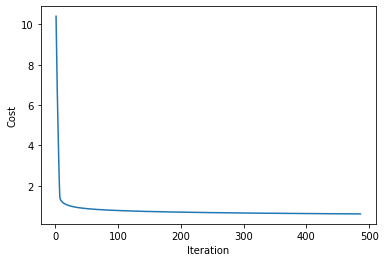

[[-1.62048256e-06 -3.82478844e-06  9.48399446e-06 -4.20826504e-06
  -1.77890420e-05  3.03521652e-05 -3.25153128e-07 -1.38975237e-05
   1.30015816e-05 -2.22294915e-06  1.68520370e-06  5.42368687e-06]
 [-9.02495239e-06  1.45616740e-05  1.25917251e-05 -3.42771655e-05
   7.37362389e-05  2.82178054e-05  1.59170934e-06 -1.36044235e-05
   6.32124320e-06  1.03822355e-05 -4.22706962e-05  1.01068483e-05]
 [ 4.43197910e-05  2.66598486e-05 -4.64428137e-05  8.85174999e-07
  -4.00100774e-06  1.58613310e-07  1.30993651e-06  1.77397061e-06
  -5.62842083e-06  1.58646711e-06  2.04166424e-05 -2.00956628e-05]]
[[-2.36750277e-05 -2.39308938e-05  1.14533239e-04]]


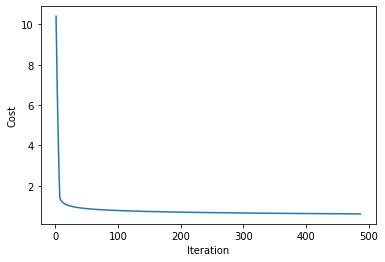

[[-1.61819989e-06 -3.82776845e-06  9.47728423e-06 -4.20205443e-06
  -1.77939036e-05  3.03275433e-05 -3.23308649e-07 -1.38635454e-05
   1.29539157e-05 -2.21995991e-06  1.67894776e-06  5.41988352e-06]
 [-9.01277609e-06  1.45323720e-05  1.25823794e-05 -3.42304282e-05
   7.36144092e-05  2.81951290e-05  1.58986187e-06 -1.36024841e-05
   6.31865122e-06  1.03689457e-05 -4.22648402e-05  1.01126949e-05]
 [ 4.42593796e-05  2.66185513e-05 -4.63310672e-05  8.84197718e-07
  -4.00052882e-06  1.58464274e-07  1.30839321e-06  1.77217720e-06
  -5.62560143e-06  1.58450257e-06  2.04077610e-05 -2.00857412e-05]]
[[-2.36427379e-05 -2.39779256e-05  1.14456121e-04]]


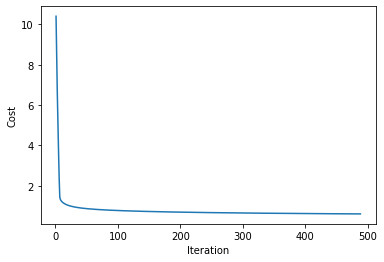

[[-1.61592403e-06 -3.83073739e-06  9.47059447e-06 -4.19586277e-06
  -1.77987419e-05  3.03029992e-05 -3.21471964e-07 -1.38296601e-05
   1.29064369e-05 -2.21697930e-06  1.67270905e-06  5.41609170e-06]
 [-9.00063492e-06  1.45031463e-05  1.25730621e-05 -3.41838264e-05
   7.34928905e-05  2.81725225e-05  1.58801935e-06 -1.36005453e-05
   6.31606446e-06  1.03556935e-05 -4.22589865e-05  1.01185072e-05]
 [ 4.41991443e-05  2.65773624e-05 -4.62197458e-05  8.83223028e-07
  -4.00004958e-06  1.58314595e-07  1.30685418e-06  1.77038955e-06
  -5.62279263e-06  1.58254366e-06  2.03989019e-05 -2.00758532e-05]]
[[-2.36105428e-05 -2.40247977e-05  1.14379236e-04]]


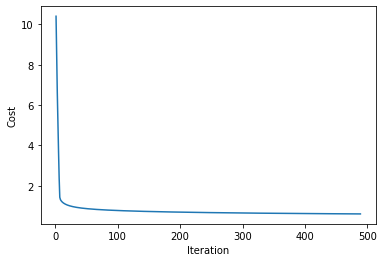

[[-1.61365495e-06 -3.83369529e-06  9.46392507e-06 -4.18968998e-06
  -1.78035567e-05  3.02785325e-05 -3.19643030e-07 -1.37958676e-05
   1.28591442e-05 -2.21400729e-06  1.66648752e-06  5.41231137e-06]
 [-8.98852872e-06  1.44739965e-05  1.25637732e-05 -3.41373596e-05
   7.33716817e-05  2.81499852e-05  1.58618174e-06 -1.35986071e-05
   6.31348290e-06  1.03424786e-05 -4.22531352e-05  1.01242855e-05]
 [ 4.41390841e-05  2.65362813e-05 -4.61088470e-05  8.82250917e-07
  -3.99957003e-06  1.58164280e-07  1.30531940e-06  1.76860765e-06
  -5.61999437e-06  1.58059033e-06  2.03900651e-05 -2.00659986e-05]]
[[-2.35784422e-05 -2.40715107e-05  1.14302583e-04]]


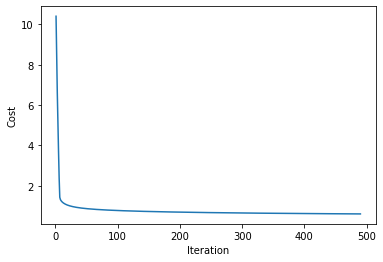

[[-1.61139261e-06 -3.83664218e-06  9.45727593e-06 -4.18353597e-06
  -1.78083482e-05  3.02541428e-05 -3.17821807e-07 -1.37621674e-05
   1.28120364e-05 -2.21104383e-06  1.66028310e-06  5.40854244e-06]
 [-8.97645734e-06  1.44449223e-05  1.25545124e-05 -3.40910271e-05
   7.32507816e-05  2.81275169e-05  1.58434904e-06 -1.35966695e-05
   6.31090653e-06  1.03293009e-05 -4.22472863e-05  1.01300299e-05]
 [ 4.40791983e-05  2.64953078e-05 -4.59983684e-05  8.81281375e-07
  -3.99909018e-06  1.58013336e-07  1.30378885e-06  1.76683147e-06
  -5.61720659e-06  1.57864258e-06  2.03812507e-05 -2.00561774e-05]]
[[-2.35464355e-05 -2.41180651e-05  1.14226162e-04]]


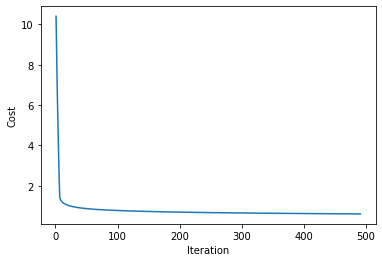

[[-1.60913699e-06 -3.83957812e-06  9.45064693e-06 -4.17740066e-06
  -1.78131165e-05  3.02298296e-05 -3.16008254e-07 -1.37285593e-05
   1.27651126e-05 -2.20808889e-06  1.65409574e-06  5.40478487e-06]
 [-8.96442063e-06  1.44159236e-05  1.25452796e-05 -3.40448284e-05
   7.31301892e-05  2.81051170e-05  1.58252122e-06 -1.35947326e-05
   6.30833532e-06  1.03161603e-05 -4.22414397e-05  1.01357408e-05]
 [ 4.40194862e-05  2.64544413e-05 -4.58883075e-05  8.80314391e-07
  -3.99861002e-06  1.57861768e-07  1.30226252e-06  1.76506098e-06
  -5.61442923e-06  1.57670036e-06  2.03724583e-05 -2.00463892e-05]]
[[-2.35145223e-05 -2.41644616e-05  1.14149971e-04]]


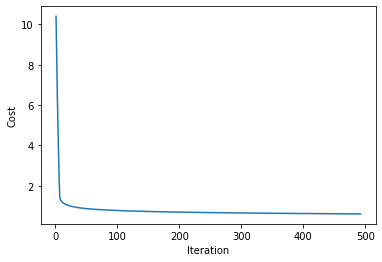

[[-1.60688806e-06 -3.84250313e-06  9.44403798e-06 -4.17128396e-06
  -1.78178616e-05  3.02055926e-05 -3.14202330e-07 -1.36950429e-05
   1.27183716e-05 -2.20514244e-06  1.64792537e-06  5.40103858e-06]
 [-8.95241843e-06  1.43870000e-05  1.25360745e-05 -3.39987629e-05
   7.30099033e-05  2.80827852e-05  1.58069826e-06 -1.35927963e-05
   6.30576926e-06  1.03030565e-05 -4.22355955e-05  1.01414183e-05]
 [ 4.39599469e-05  2.64136815e-05 -4.57786622e-05  8.79349955e-07
  -3.99812956e-06  1.57709583e-07  1.30074038e-06  1.76329618e-06
  -5.61166222e-06  1.57476367e-06  2.03636881e-05 -2.00366339e-05]]
[[-2.34827022e-05 -2.42107005e-05  1.14074009e-04]]


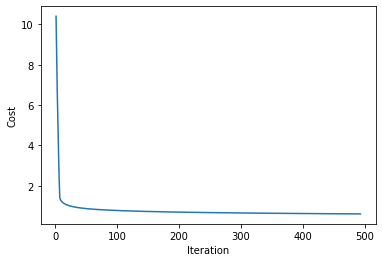

[[-1.60464579e-06 -3.84541724e-06  9.43744896e-06 -4.16518579e-06
  -1.78225836e-05  3.01814314e-05 -3.12403996e-07 -1.36616178e-05
   1.26718125e-05 -2.20220443e-06  1.64177193e-06  5.39730352e-06]
 [-8.94045060e-06  1.43581513e-05  1.25268972e-05 -3.39528300e-05
   7.28899227e-05  2.80605211e-05  1.57888014e-06 -1.35908606e-05
   6.30320832e-06  1.02899895e-05 -4.22297536e-05  1.01470626e-05]
 [ 4.39005798e-05  2.63730280e-05 -4.56694299e-05  8.78388055e-07
  -3.99764880e-06  1.57556787e-07  1.29922243e-06  1.76153702e-06
  -5.60890551e-06  1.57283246e-06  2.03549398e-05 -2.00269113e-05]]
[[-2.34509749e-05 -2.42567824e-05  1.13998275e-04]]


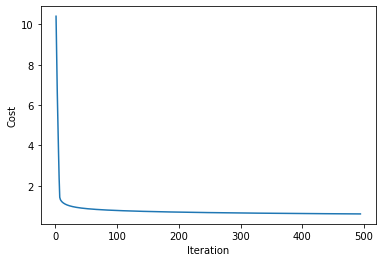

[[-1.60241014e-06 -3.84832051e-06  9.43087978e-06 -4.15910606e-06
  -1.78272826e-05  3.01573455e-05 -3.10613211e-07 -1.36282838e-05
   1.26254342e-05 -2.19927483e-06  1.63563538e-06  5.39357962e-06]
 [-8.92851698e-06  1.43293771e-05  1.25177474e-05 -3.39070291e-05
   7.27702465e-05  2.80383242e-05  1.57706684e-06 -1.35889255e-05
   6.30065249e-06  1.02769590e-05 -4.22239141e-05  1.01526740e-05]
 [ 4.38413841e-05  2.63324804e-05 -4.55606084e-05  8.77428681e-07
  -3.99716774e-06  1.57403388e-07  1.29770863e-06  1.75978349e-06
  -5.60615905e-06  1.57090673e-06  2.03462135e-05 -2.00172213e-05]]
[[-2.34193398e-05 -2.43027079e-05  1.13922767e-04]]


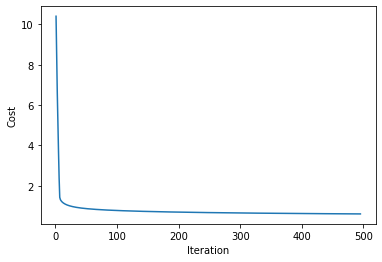

[[-1.60018109e-06 -3.85121296e-06  9.42433032e-06 -4.15304470e-06
  -1.78319587e-05  3.01333345e-05 -3.08829936e-07 -1.35950404e-05
   1.25792357e-05 -2.19635360e-06  1.62951564e-06  5.38986683e-06]
 [-8.91661743e-06  1.43006773e-05  1.25086249e-05 -3.38613596e-05
   7.26508735e-05  2.80161942e-05  1.57525834e-06 -1.35869910e-05
   6.29810174e-06  1.02639649e-05 -4.22180769e-05  1.01582526e-05]
 [ 4.37823590e-05  2.62920383e-05 -4.54521954e-05  8.76471823e-07
  -3.99668639e-06  1.57249390e-07  1.29619898e-06  1.75803557e-06
  -5.60342276e-06  1.56898644e-06  2.03375090e-05 -2.00075636e-05]]
[[-2.33877967e-05 -2.43484775e-05  1.13847484e-04]]


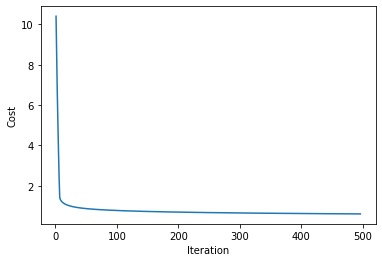

[[-1.59795861e-06 -3.85409462e-06  9.41780049e-06 -4.14700161e-06
  -1.78366119e-05  3.01093981e-05 -3.07054131e-07 -1.35618873e-05
   1.25332160e-05 -2.19344071e-06  1.62341266e-06  5.38616508e-06]
 [-8.90475180e-06  1.42720516e-05  1.24995296e-05 -3.38158210e-05
   7.25318026e-05  2.79941307e-05  1.57345463e-06 -1.35850572e-05
   6.29555606e-06  1.02510071e-05 -4.22122421e-05  1.01637987e-05]
 [ 4.37235037e-05  2.62517014e-05 -4.53441886e-05  8.75517470e-07
  -3.99620474e-06  1.57094801e-07  1.29469346e-06  1.75629323e-06
  -5.60069660e-06  1.56707158e-06  2.03288262e-05 -1.99979381e-05]]
[[-2.33563450e-05 -2.43940918e-05  1.13772425e-04]]


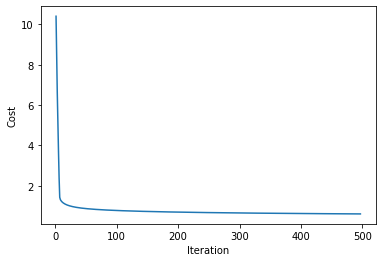

[[-1.59574267e-06 -3.85696555e-06  9.41129018e-06 -4.14097672e-06
  -1.78412423e-05  3.00855358e-05 -3.05285757e-07 -1.35288242e-05
   1.24873740e-05 -2.19053611e-06  1.61732639e-06  5.38247432e-06]
 [-8.89291994e-06  1.42434997e-05  1.24904614e-05 -3.37704127e-05
   7.24130327e-05  2.79721332e-05  1.57165567e-06 -1.35831240e-05
   6.29301543e-06  1.02380853e-05 -4.22064096e-05  1.01693125e-05]
 [ 4.36648176e-05  2.62114691e-05 -4.52365856e-05  8.74565612e-07
  -3.99572280e-06  1.56939626e-07  1.29319204e-06  1.75455645e-06
  -5.59798050e-06  1.56516211e-06  2.03201650e-05 -1.99883447e-05]]
[[-2.33249845e-05 -2.44395511e-05  1.13697590e-04]]


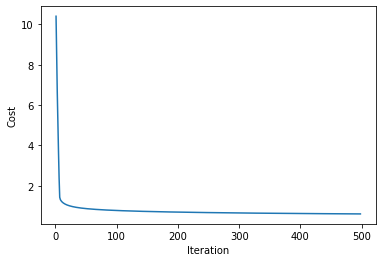

[[-1.59353324e-06 -3.85982576e-06  9.40479929e-06 -4.13496994e-06
  -1.78458500e-05  3.00617474e-05 -3.03524775e-07 -1.34958508e-05
   1.24417088e-05 -2.18763978e-06  1.61125676e-06  5.37879449e-06]
 [-8.88112170e-06  1.42150214e-05  1.24814201e-05 -3.37251340e-05
   7.22945628e-05  2.79502014e-05  1.56986145e-06 -1.35811914e-05
   6.29047982e-06  1.02251995e-05 -4.22005795e-05  1.01747941e-05]
 [ 4.36062998e-05  2.61713412e-05 -4.51293842e-05  8.73616238e-07
  -3.99524058e-06  1.56783872e-07  1.29169471e-06  1.75282522e-06
  -5.59527442e-06  1.56325802e-06  2.03115255e-05 -1.99787831e-05]]
[[-2.32937146e-05 -2.44848561e-05  1.13622976e-04]]


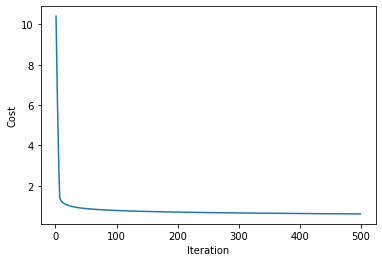

[[-1.59133029e-06 -3.86267530e-06  9.39832772e-06 -4.12898121e-06
  -1.78504350e-05  3.00380323e-05 -3.01771147e-07 -1.34629667e-05
   1.23962194e-05 -2.18475168e-06  1.60520372e-06  5.37512552e-06]
 [-8.86935693e-06  1.41866164e-05  1.24724055e-05 -3.36799846e-05
   7.21763917e-05  2.79283349e-05  1.56807196e-06 -1.35792594e-05
   6.28794923e-06  1.02123495e-05 -4.21947517e-05  1.01802439e-05]
 [ 4.35479497e-05  2.61313173e-05 -4.50225823e-05  8.72669339e-07
  -3.99475806e-06  1.56627543e-07  1.29020146e-06  1.75109949e-06
  -5.59257828e-06  1.56135928e-06  2.03029074e-05 -1.99692531e-05]]
[[-2.32625351e-05 -2.45300073e-05  1.13548583e-04]]


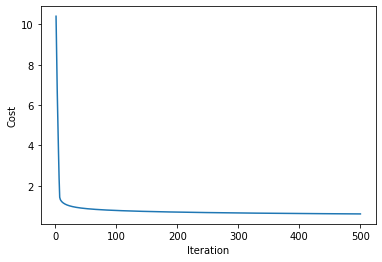

[[-1.58913380e-06 -3.86551421e-06  9.39187538e-06 -4.12301042e-06
  -1.78549975e-05  3.00143902e-05 -3.00024835e-07 -1.34301716e-05
   1.23509048e-05 -2.18187177e-06  1.59916721e-06  5.37146736e-06]
 [-8.85762550e-06  1.41582844e-05  1.24634175e-05 -3.36349637e-05
   7.20585185e-05  2.79065333e-05  1.56628716e-06 -1.35773280e-05
   6.28542362e-06  1.01995351e-05 -4.21889263e-05  1.01856619e-05]
 [ 4.34897666e-05  2.60913970e-05 -4.49161775e-05  8.71724903e-07
  -3.99427526e-06  1.56470648e-07  1.28871226e-06  1.74937927e-06
  -5.58989204e-06  1.55946587e-06  2.02943107e-05 -1.99597547e-05]]
[[-2.32314454e-05 -2.45750051e-05  1.13474409e-04]]


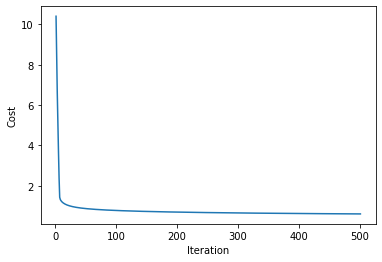

[[-1.58694373e-06 -3.86834251e-06  9.38544215e-06 -4.11705751e-06
  -1.78595375e-05  2.99908208e-05 -2.98285799e-07 -1.33974652e-05
   1.23057640e-05 -2.17900001e-06  1.59314717e-06  5.36781995e-06]
 [-8.84592726e-06  1.41300252e-05  1.24544559e-05 -3.35900708e-05
   7.19409420e-05  2.78847962e-05  1.56450705e-06 -1.35753973e-05
   6.28290299e-06  1.01867562e-05 -4.21831032e-05  1.01910485e-05]
 [ 4.34317496e-05  2.60515798e-05 -4.48101677e-05  8.70782922e-07
  -3.99379217e-06  1.56313190e-07  1.28722711e-06  1.74766451e-06
  -5.58721565e-06  1.55757777e-06  2.02857354e-05 -1.99502876e-05]]
[[-2.32004453e-05 -2.46198502e-05  1.13400454e-04]]


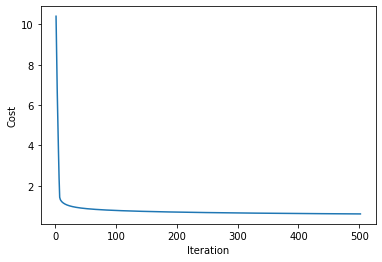

[[-1.58476006e-06 -3.87116025e-06  9.37902795e-06 -4.11112239e-06
  -1.78640551e-05  2.99673236e-05 -2.96554003e-07 -1.33648471e-05
   1.22607960e-05 -2.17613638e-06  1.58714354e-06  5.36418324e-06]
 [-8.83426206e-06  1.41018385e-05  1.24455207e-05 -3.35453055e-05
   7.18236611e-05  2.78631232e-05  1.56273161e-06 -1.35734671e-05
   6.28038731e-06  1.01740126e-05 -4.21772824e-05  1.01964037e-05]
 [ 4.33738981e-05  2.60118655e-05 -4.47045506e-05  8.69843384e-07
  -3.99330881e-06  1.56155177e-07  1.28574597e-06  1.74595521e-06
  -5.58454904e-06  1.55569494e-06  2.02771813e-05 -1.99408517e-05]]
[[-2.31695343e-05 -2.46645430e-05  1.13326716e-04]]


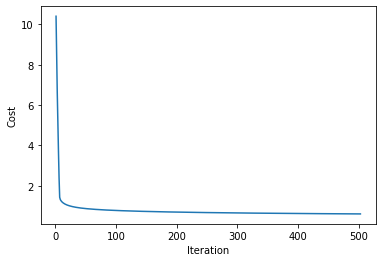

[[-1.58258275e-06 -3.87396746e-06  9.37263267e-06 -4.10520499e-06
  -1.78685503e-05  2.99438982e-05 -2.94829408e-07 -1.33323170e-05
   1.22159999e-05 -2.17328083e-06  1.58115628e-06  5.36055716e-06]
 [-8.82262977e-06  1.40737240e-05  1.24366116e-05 -3.35006670e-05
   7.17066749e-05  2.78415140e-05  1.56096080e-06 -1.35715376e-05
   6.27787657e-06  1.01613042e-05 -4.21714640e-05  1.02017278e-05]
 [ 4.33162113e-05  2.59722536e-05 -4.45993241e-05  8.68906280e-07
  -3.99282517e-06  1.55996613e-07  1.28426884e-06  1.74425133e-06
  -5.58189216e-06  1.55381738e-06  2.02686483e-05 -1.99314468e-05]]
[[-2.31387121e-05 -2.47090840e-05  1.13253194e-04]]


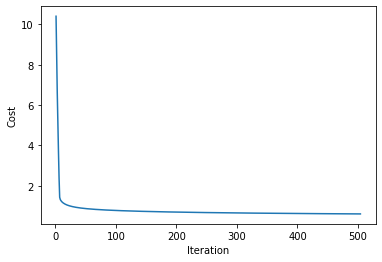

[[-1.58041179e-06 -3.87676417e-06  9.36625621e-06 -4.09930522e-06
  -1.78730233e-05  2.99205444e-05 -2.93111978e-07 -1.32998745e-05
   1.21713748e-05 -2.17043333e-06  1.57518532e-06  5.35694167e-06]
 [-8.81103023e-06  1.40456816e-05  1.24277285e-05 -3.34561549e-05
   7.15899823e-05  2.78199682e-05  1.55919462e-06 -1.35696086e-05
   6.27537074e-06  1.01486308e-05 -4.21656479e-05  1.02070210e-05]
 [ 4.32586886e-05  2.59327438e-05 -4.44944861e-05  8.67971599e-07
  -3.99234125e-06  1.55837506e-07  1.28279569e-06  1.74255287e-06
  -5.57924495e-06  1.55194505e-06  2.02601365e-05 -1.99220727e-05]]
[[-2.31079782e-05 -2.47534737e-05  1.13179887e-04]]


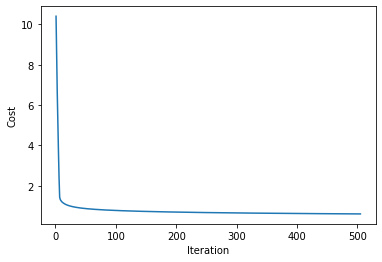

[[-1.57824714e-06 -3.87955042e-06  9.35989849e-06 -4.09342301e-06
  -1.78774740e-05  2.98972617e-05 -2.91401674e-07 -1.32675195e-05
   1.21269196e-05 -2.16759385e-06  1.56923061e-06  5.35333670e-06]
 [-8.79946332e-06  1.40177110e-05  1.24188713e-05 -3.34117687e-05
   7.14735822e-05  2.77984853e-05  1.55743305e-06 -1.35676803e-05
   6.27286981e-06  1.01359923e-05 -4.21598341e-05  1.02122835e-05]
 [ 4.32013292e-05  2.58933356e-05 -4.43900343e-05  8.67039333e-07
  -3.99185705e-06  1.55677859e-07  1.28132652e-06  1.74085978e-06
  -5.57660737e-06  1.55007793e-06  2.02516456e-05 -1.99127292e-05]]
[[-2.30773322e-05 -2.47977126e-05  1.13106794e-04]]


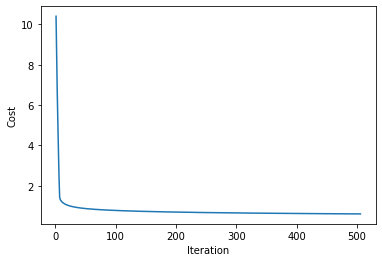

[[-1.57608878e-06 -3.88232625e-06  9.35355941e-06 -4.08755828e-06
  -1.78819026e-05  2.98740498e-05 -2.89698460e-07 -1.32352515e-05
   1.20826335e-05 -2.16476235e-06  1.56329209e-06  5.34974220e-06]
 [-8.78792888e-06  1.39898119e-05  1.24100398e-05 -3.33675077e-05
   7.13574735e-05  2.77770652e-05  1.55567606e-06 -1.35657526e-05
   6.27037376e-06  1.01233885e-05 -4.21540227e-05  1.02175155e-05]
 [ 4.31441325e-05  2.58540288e-05 -4.42859668e-05  8.66109470e-07
  -3.99137259e-06  1.55517679e-07  1.27986130e-06  1.73917207e-06
  -5.57397936e-06  1.54821601e-06  2.02431756e-05 -1.99034163e-05]]
[[-2.30467739e-05 -2.48418013e-05  1.13033914e-04]]


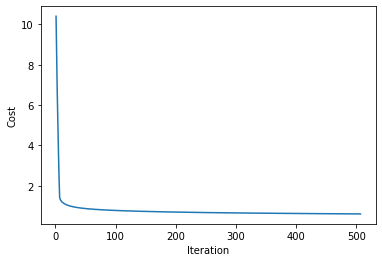

[[-1.57393668e-06 -3.88509169e-06  9.34723886e-06 -4.08171096e-06
  -1.78863092e-05  2.98509082e-05 -2.88002300e-07 -1.32030701e-05
   1.20385155e-05 -2.16193880e-06  1.55736970e-06  5.34615811e-06]
 [-8.77642679e-06  1.39619840e-05  1.24012338e-05 -3.33233715e-05
   7.12416553e-05  2.77557073e-05  1.55392364e-06 -1.35638255e-05
   6.26788257e-06  1.01108193e-05 -4.21482135e-05  1.02227171e-05]
 [ 4.30870977e-05  2.58148229e-05 -4.41822812e-05  8.65182002e-07
  -3.99088785e-06  1.55356972e-07  1.27840002e-06  1.73748969e-06
  -5.57136086e-06  1.54635925e-06  2.02347265e-05 -1.98941337e-05]]
[[-2.30163028e-05 -2.48857403e-05  1.12961245e-04]]


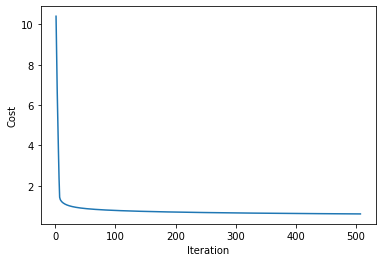

[[-1.57179080e-06 -3.88784676e-06  9.34093676e-06 -4.07588096e-06
  -1.78906938e-05  2.98278367e-05 -2.86313157e-07 -1.31709752e-05
   1.19945647e-05 -2.15912317e-06  1.55146340e-06  5.34258438e-06]
 [-8.76495690e-06  1.39342272e-05  1.23924533e-05 -3.32793595e-05
   7.11261265e-05  2.77344114e-05  1.55217577e-06 -1.35618989e-05
   6.26539622e-06  1.00982846e-05 -4.21424068e-05  1.02278886e-05]
 [ 4.30302240e-05  2.57757177e-05 -4.40789756e-05  8.64256918e-07
  -3.99040284e-06  1.55195742e-07  1.27694265e-06  1.73581264e-06
  -5.56875182e-06  1.54450765e-06  2.02262982e-05 -1.98848813e-05]]
[[-2.29859185e-05 -2.49295299e-05  1.12888787e-04]]


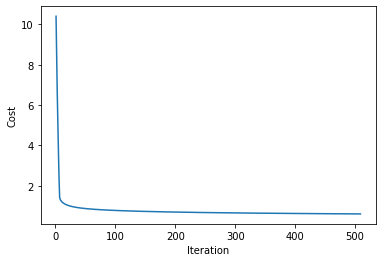

[[-1.56965114e-06 -3.89059152e-06  9.33465301e-06 -4.07006821e-06
  -1.78950564e-05  2.98048349e-05 -2.84630995e-07 -1.31389664e-05
   1.19507801e-05 -2.15631541e-06  1.54557313e-06  5.33902095e-06]
 [-8.75351907e-06  1.39065411e-05  1.23836982e-05 -3.32354712e-05
   7.10108861e-05  2.77131770e-05  1.55043243e-06 -1.35599730e-05
   6.26291470e-06  1.00857841e-05 -4.21366023e-05  1.02330302e-05]
 [ 4.29735110e-05  2.57367126e-05 -4.39760479e-05  8.63334209e-07
  -3.98991757e-06  1.55033996e-07  1.27548920e-06  1.73414089e-06
  -5.56615219e-06  1.54266116e-06  2.02178905e-05 -1.98756589e-05]]
[[-2.29556207e-05 -2.49731708e-05  1.12816539e-04]]


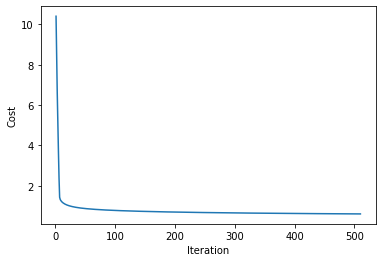

[[-1.56751764e-06 -3.89332599e-06  9.32838752e-06 -4.06427263e-06
  -1.78993973e-05  2.97819024e-05 -2.82955777e-07 -1.31070433e-05
   1.19071608e-05 -2.15351551e-06  1.53969882e-06  5.33546778e-06]
 [-8.74211317e-06  1.38789256e-05  1.23749681e-05 -3.31917060e-05
   7.08959331e-05  2.76920038e-05  1.54869361e-06 -1.35580477e-05
   6.26043798e-06  1.00733178e-05 -4.21308001e-05  1.02381419e-05]
 [ 4.29169578e-05  2.56978074e-05 -4.38734961e-05  8.62413864e-07
  -3.98943204e-06  1.54871739e-07  1.27403963e-06  1.73247441e-06
  -5.56356193e-06  1.54081978e-06  2.02095034e-05 -1.98664664e-05]]
[[-2.29254089e-05 -2.50166634e-05  1.12744499e-04]]


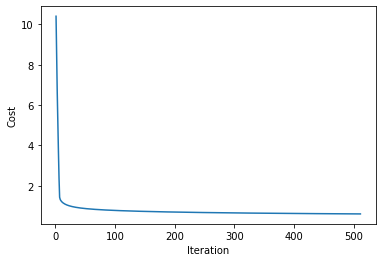

[[-1.56539030e-06 -3.89605021e-06  9.32214019e-06 -4.05849415e-06
  -1.79037163e-05  2.97590388e-05 -2.81287469e-07 -1.30752057e-05
   1.18637060e-05 -2.15072341e-06  1.53384043e-06  5.33192480e-06]
 [-8.73073906e-06  1.38513803e-05  1.23662632e-05 -3.31480634e-05
   7.07812664e-05  2.76708914e-05  1.54695927e-06 -1.35561230e-05
   6.25796606e-06  1.00608855e-05 -4.21250003e-05  1.02432241e-05]
 [ 4.28605637e-05  2.56590017e-05 -4.37713179e-05  8.61495876e-07
  -3.98894624e-06  1.54708976e-07  1.27259393e-06  1.73081320e-06
  -5.56098096e-06  1.53898348e-06  2.02011369e-05 -1.98573036e-05]]
[[-2.28952830e-05 -2.50600082e-05  1.12672666e-04]]


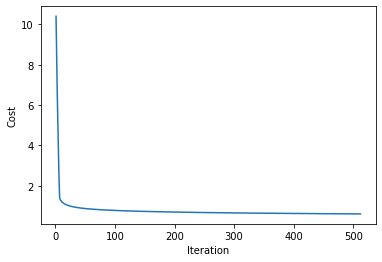

[[-1.56326908e-06 -3.89876420e-06  9.31591094e-06 -4.05273270e-06
  -1.79080136e-05  2.97362439e-05 -2.79626034e-07 -1.30434532e-05
   1.18204148e-05 -2.14793910e-06  1.52799791e-06  5.32839196e-06]
 [-8.71939661e-06  1.38239051e-05  1.23575830e-05 -3.31045429e-05
   7.06668851e-05  2.76498396e-05  1.54522942e-06 -1.35541989e-05
   6.25549890e-06  1.00484871e-05 -4.21192028e-05  1.02482769e-05]
 [ 4.28043281e-05  2.56202951e-05 -4.36695116e-05  8.60580232e-07
  -3.98846018e-06  1.54545712e-07  1.27115209e-06  1.72915722e-06
  -5.55840926e-06  1.53715224e-06  2.01927908e-05 -1.98481703e-05]]
[[-2.28652423e-05 -2.51032057e-05  1.12601040e-04]]


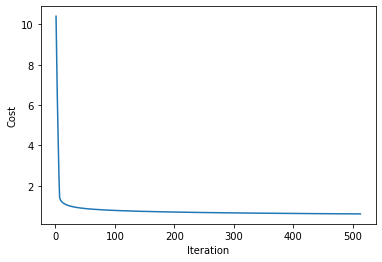

[[-1.56115396e-06 -3.90146801e-06  9.30969968e-06 -4.04698819e-06
  -1.79122893e-05  2.97135173e-05 -2.77971437e-07 -1.30117855e-05
   1.17772862e-05 -2.14516253e-06  1.52217119e-06  5.32486921e-06]
 [-8.70808568e-06  1.37964997e-05  1.23489277e-05 -3.30611440e-05
   7.05527881e-05  2.76288480e-05  1.54350402e-06 -1.35522754e-05
   6.25303650e-06  1.00361224e-05 -4.21134076e-05  1.02533005e-05]
 [ 4.27482503e-05  2.55816873e-05 -4.35680749e-05  8.59666926e-07
  -3.98797386e-06  1.54381953e-07  1.26971409e-06  1.72750646e-06
  -5.55584675e-06  1.53532604e-06  2.01844651e-05 -1.98390665e-05]]
[[-2.28352867e-05 -2.51462564e-05  1.12529619e-04]]


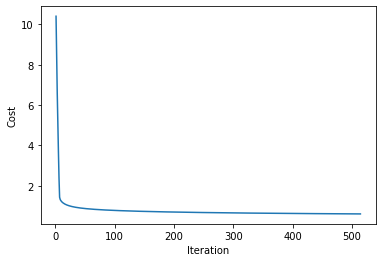

[[-1.55904492e-06 -3.90416167e-06  9.30350630e-06 -4.04126056e-06
  -1.79165435e-05  2.96908585e-05 -2.76323644e-07 -1.29802023e-05
   1.17343193e-05 -2.14239368e-06  1.51636023e-06  5.32135651e-06]
 [-8.69680614e-06  1.37691638e-05  1.23402970e-05 -3.30178662e-05
   7.04389744e-05  2.76079161e-05  1.54178306e-06 -1.35503525e-05
   6.25057884e-06  1.00237912e-05 -4.21076147e-05  1.02582950e-05]
 [ 4.26923296e-05  2.55431778e-05 -4.34670059e-05  8.58755946e-07
  -3.98748729e-06  1.54217703e-07  1.26827991e-06  1.72586090e-06
  -5.55329340e-06  1.53350485e-06  2.01761596e-05 -1.98299918e-05]]
[[-2.28054156e-05 -2.51891608e-05  1.12458402e-04]]


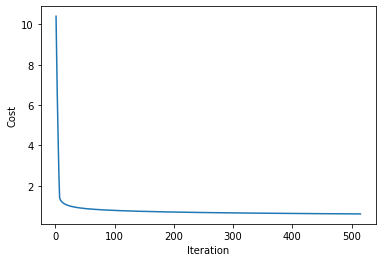

[[-1.55694191e-06 -3.90684521e-06  9.29733073e-06 -4.03554973e-06
  -1.79207761e-05  2.96682673e-05 -2.74682619e-07 -1.29487034e-05
   1.16915134e-05 -2.13963251e-06  1.51056497e-06  5.31785378e-06]
 [-8.68555786e-06  1.37418972e-05  1.23316907e-05 -3.29747089e-05
   7.03254431e-05  2.75870437e-05  1.54006652e-06 -1.35484302e-05
   6.24812590e-06  1.00114935e-05 -4.21018242e-05  1.02632607e-05]
 [ 4.26365654e-05  2.55047665e-05 -4.33663027e-05  8.57847284e-07
  -3.98700046e-06  1.54052969e-07  1.26684954e-06  1.72422052e-06
  -5.55074916e-06  1.53168866e-06  2.01678744e-05 -1.98209463e-05]]
[[-2.27756289e-05 -2.52319194e-05  1.12387389e-04]]


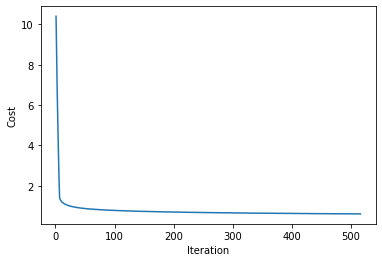

[[-1.55484492e-06 -3.90951867e-06  9.29117287e-06 -4.02985562e-06
  -1.79249873e-05  2.96457434e-05 -2.73048328e-07 -1.29172883e-05
   1.16488674e-05 -2.13687899e-06  1.50478536e-06  5.31436099e-06]
 [-8.67434070e-06  1.37146997e-05  1.23231088e-05 -3.29316716e-05
   7.02121931e-05  2.75662305e-05  1.53835439e-06 -1.35465085e-05
   6.24567765e-06  9.99922910e-06 -4.20960359e-05  1.02681978e-05]
 [ 4.25809570e-05  2.54664528e-05 -4.32659632e-05  8.56940930e-07
  -3.98651338e-06  1.53887755e-07  1.26542297e-06  1.72258528e-06
  -5.54821396e-06  1.52987744e-06  2.01596093e-05 -1.98119297e-05]]
[[-2.27459260e-05 -2.52745326e-05  1.12316578e-04]]


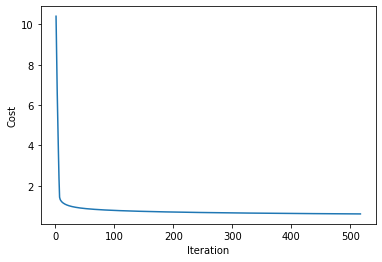

[[-1.55275393e-06 -3.91218207e-06  9.28503264e-06 -4.02417817e-06
  -1.79291772e-05  2.96232864e-05 -2.71420736e-07 -1.28859568e-05
   1.16063806e-05 -2.13413308e-06  1.49902134e-06  5.31087809e-06]
 [-8.66315453e-06  1.36875710e-05  1.23145512e-05 -3.28887538e-05
   7.00992234e-05  2.75454761e-05  1.53664664e-06 -1.35445874e-05
   6.24323409e-06  9.98699785e-06 -4.20902500e-05  1.02731063e-05]
 [ 4.25255037e-05  2.54282365e-05 -4.31659855e-05  8.56036875e-07
  -3.98602606e-06  1.53722066e-07  1.26400017e-06  1.72095519e-06
  -5.54568777e-06  1.52807118e-06  2.01513643e-05 -1.98029418e-05]]
[[-2.27163068e-05 -2.53170009e-05  1.12245968e-04]]


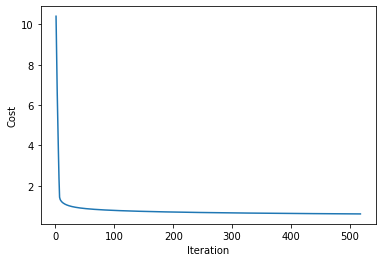

[[-1.55066891e-06 -3.91483546e-06  9.27890994e-06 -4.01851730e-06
  -1.79333457e-05  2.96008959e-05 -2.69799809e-07 -1.28547087e-05
   1.15640521e-05 -2.13139476e-06  1.49327287e-06  5.30740501e-06]
 [-8.65199922e-06  1.36605109e-05  1.23060176e-05 -3.28459551e-05
   6.99865331e-05  2.75247801e-05  1.53494326e-06 -1.35426669e-05
   6.24079520e-06  9.97479963e-06 -4.20844663e-05  1.02779865e-05]
 [ 4.24702049e-05  2.53901172e-05 -4.30663677e-05  8.55135109e-07
  -3.98553848e-06  1.53555907e-07  1.26258112e-06  1.71933021e-06
  -5.54317054e-06  1.52626985e-06  2.01431393e-05 -1.97939827e-05]]
[[-2.26867707e-05 -2.53593249e-05  1.12175558e-04]]


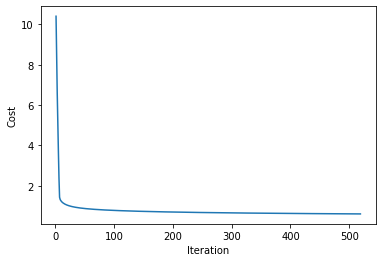

[[-1.54858982e-06 -3.91747885e-06  9.27280470e-06 -4.01287295e-06
  -1.79374931e-05  2.95785716e-05 -2.68185513e-07 -1.28235435e-05
   1.15218810e-05 -2.12866400e-06  1.48753988e-06  5.30394172e-06]
 [-8.64087464e-06  1.36335191e-05  1.22975080e-05 -3.28032748e-05
   6.98741212e-05  2.75041422e-05  1.53324423e-06 -1.35407469e-05
   6.23836096e-06  9.96263429e-06 -4.20786850e-05  1.02828385e-05]
 [ 4.24150599e-05  2.53520945e-05 -4.29671077e-05  8.54235625e-07
  -3.98505065e-06  1.53389282e-07  1.26116583e-06  1.71771032e-06
  -5.54066221e-06  1.52447342e-06  2.01349342e-05 -1.97850520e-05]]
[[-2.26573174e-05 -2.54015049e-05  1.12105348e-04]]


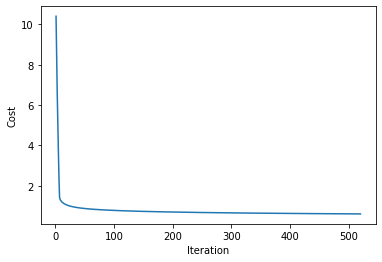

[[-1.54651665e-06 -3.92011230e-06  9.26671681e-06 -4.00724503e-06
  -1.79416193e-05  2.95563132e-05 -2.66577815e-07 -1.27924609e-05
   1.14798664e-05 -2.12594075e-06  1.48182233e-06  5.30048816e-06]
 [-8.62978067e-06  1.36065955e-05  1.22890222e-05 -3.27607126e-05
   6.97619866e-05  2.74835622e-05  1.53154954e-06 -1.35388276e-05
   6.23593135e-06  9.95050170e-06 -4.20729059e-05  1.02876626e-05]
 [ 4.23600681e-05  2.53141682e-05 -4.28682038e-05  8.53338411e-07
  -3.98456258e-06  1.53222198e-07  1.25975426e-06  1.71609551e-06
  -5.53816274e-06  1.52268189e-06  2.01267489e-05 -1.97761496e-05]]
[[-2.26279466e-05 -2.54435414e-05  1.12035336e-04]]


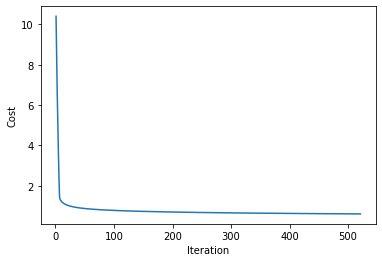

[[-1.54444938e-06 -3.92273583e-06  9.26064621e-06 -4.00163347e-06
  -1.79457244e-05  2.95341204e-05 -2.64976681e-07 -1.27614608e-05
   1.14380077e-05 -2.12322500e-06  1.47612017e-06  5.29704428e-06]
 [-8.61871716e-06  1.35797398e-05  1.22805602e-05 -3.27182678e-05
   6.96501286e-05  2.74630396e-05  1.52985916e-06 -1.35369089e-05
   6.23350636e-06  9.93840173e-06 -4.20671292e-05  1.02924589e-05]
 [ 4.23052288e-05  2.52763377e-05 -4.27696540e-05  8.52443460e-07
  -3.98407427e-06  1.53054659e-07  1.25834641e-06  1.71448575e-06
  -5.53567208e-06  1.52089523e-06  2.01185834e-05 -1.97672754e-05]]
[[-2.25986580e-05 -2.54854350e-05  1.11965521e-04]]


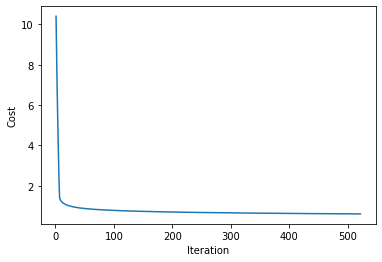

[[-1.54238797e-06 -3.92534946e-06  9.25459279e-06 -3.99603821e-06
  -1.79498085e-05  2.95119929e-05 -2.63382078e-07 -1.27305427e-05
   1.13963038e-05 -2.12051670e-06  1.47043334e-06  5.29361003e-06]
 [-8.60768401e-06  1.35529517e-05  1.22721217e-05 -3.26759401e-05
   6.95385459e-05  2.74425742e-05  1.52817308e-06 -1.35349907e-05
   6.23108597e-06  9.92633423e-06 -4.20613548e-05  1.02972275e-05]
 [ 4.22505414e-05  2.52386029e-05 -4.26714563e-05  8.51550762e-07
  -3.98358572e-06  1.52886670e-07  1.25694226e-06  1.71288103e-06
  -5.53319018e-06  1.51911341e-06  2.01104375e-05 -1.97584293e-05]]
[[-2.25694512e-05 -2.55271861e-05  1.11895902e-04]]


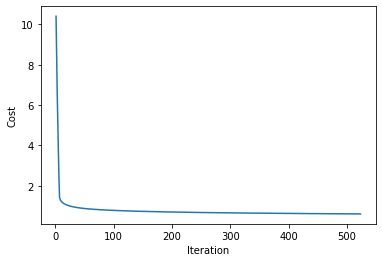

[[-1.54033240e-06 -3.92795325e-06  9.24855649e-06 -3.99045918e-06
  -1.79538717e-05  2.94899302e-05 -2.61793972e-07 -1.26997065e-05
   1.13547539e-05 -2.11781583e-06  1.46476179e-06  5.29018536e-06]
 [-8.59668107e-06  1.35262310e-05  1.22637067e-05 -3.26337289e-05
   6.94272378e-05  2.74221657e-05  1.52649128e-06 -1.35330731e-05
   6.22867016e-06  9.91429907e-06 -4.20555826e-05  1.03019687e-05]
 [ 4.21960051e-05  2.52009634e-05 -4.25736090e-05  8.50660308e-07
  -3.98309693e-06  1.52718234e-07  1.25554179e-06  1.71128133e-06
  -5.53071700e-06  1.51733643e-06  2.01023113e-05 -1.97496111e-05]]
[[-2.25403258e-05 -2.55687951e-05  1.11826478e-04]]


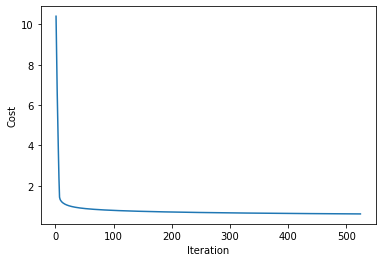

[[-1.53828264e-06 -3.93054721e-06  9.24253720e-06 -3.98489630e-06
  -1.79579139e-05  2.94679321e-05 -2.60212331e-07 -1.26689517e-05
   1.13133574e-05 -2.11512236e-06  1.45910547e-06  5.28677023e-06]
 [-8.58570822e-06  1.34995775e-05  1.22553150e-05 -3.25916338e-05
   6.93162033e-05  2.74018136e-05  1.52481375e-06 -1.35311562e-05
   6.22625892e-06  9.90229612e-06 -4.20498128e-05  1.03066825e-05]
 [ 4.21416195e-05  2.51634188e-05 -4.24761102e-05  8.49772090e-07
  -3.98260790e-06  1.52549358e-07  1.25414499e-06  1.70968662e-06
  -5.52825248e-06  1.51556425e-06  2.00942046e-05 -1.97408206e-05]]
[[-2.25112816e-05 -2.56102626e-05  1.11757249e-04]]


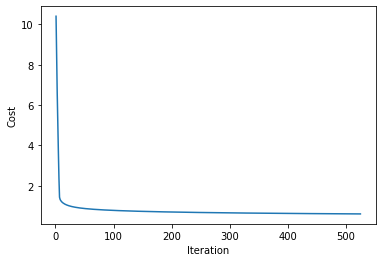

[[-1.53623868e-06 -3.93313138e-06  9.23653485e-06 -3.97934951e-06
  -1.79619354e-05  2.94459983e-05 -2.58637122e-07 -1.26382781e-05
   1.12721132e-05 -2.11243625e-06  1.45346433e-06  5.28336458e-06]
 [-8.57476534e-06  1.34729910e-05  1.22469465e-05 -3.25496541e-05
   6.92054413e-05  2.73815178e-05  1.52314046e-06 -1.35292398e-05
   6.22385222e-06  9.89032525e-06 -4.20440452e-05  1.03113693e-05]
 [ 4.20873839e-05  2.51259688e-05 -4.23789579e-05  8.48886098e-07
  -3.98211863e-06  1.52380046e-07  1.25275185e-06  1.70809689e-06
  -5.52579659e-06  1.51379686e-06  2.00861174e-05 -1.97320577e-05]]
[[-2.24823181e-05 -2.56515890e-05  1.11688213e-04]]


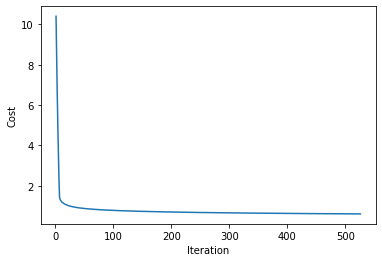

[[-1.53420048e-06 -3.93570579e-06  9.23054936e-06 -3.97381873e-06
  -1.79659361e-05  2.94241284e-05 -2.57068312e-07 -1.26076855e-05
   1.12310207e-05 -2.10975748e-06  1.44783831e-06  5.27996836e-06]
 [-8.56385231e-06  1.34464712e-05  1.22386011e-05 -3.25077896e-05
   6.90949510e-05  2.73612778e-05  1.52147141e-06 -1.35273240e-05
   6.22145006e-06  9.87838633e-06 -4.20382799e-05  1.03160290e-05]
 [ 4.20332976e-05  2.50886130e-05 -4.22821505e-05  8.48002323e-07
  -3.98162913e-06  1.52210302e-07  1.25136234e-06  1.70651211e-06
  -5.52334927e-06  1.51203424e-06  2.00780496e-05 -1.97233224e-05]]
[[-2.24534350e-05 -2.56927747e-05  1.11619370e-04]]


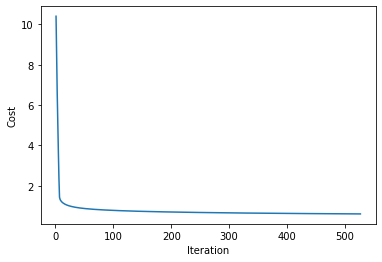

[[-1.53216803e-06 -3.93827048e-06  9.22458064e-06 -3.96830390e-06
  -1.79699162e-05  2.94023221e-05 -2.55505869e-07 -1.25771734e-05
   1.11900790e-05 -2.10708601e-06  1.44222738e-06  5.27658154e-06]
 [-8.55296898e-06  1.34200179e-05  1.22302787e-05 -3.24660396e-05
   6.89847314e-05  2.73410935e-05  1.51980656e-06 -1.35254087e-05
   6.21905242e-06  9.86647922e-06 -4.20325170e-05  1.03206620e-05]
 [ 4.19793600e-05  2.50513511e-05 -4.21856860e-05  8.47120758e-07
  -3.98113940e-06  1.52040131e-07  1.24997646e-06  1.70493227e-06
  -5.52091048e-06  1.51027637e-06  2.00700012e-05 -1.97146143e-05]]
[[-2.24246320e-05 -2.57338202e-05  1.11550718e-04]]


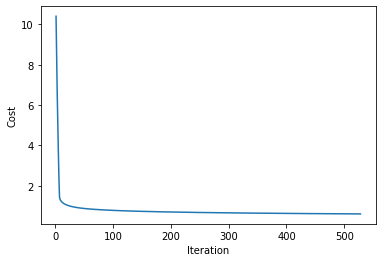

[[-1.53014129e-06 -3.94082547e-06  9.21862861e-06 -3.96280496e-06
  -1.79738756e-05  2.93805792e-05 -2.53949762e-07 -1.25467417e-05
   1.11492873e-05 -2.10442182e-06  1.43663147e-06  5.27320406e-06]
 [-8.54211526e-06  1.33936309e-05  1.22219792e-05 -3.24244037e-05
   6.88747815e-05  2.73209644e-05  1.51814592e-06 -1.35234941e-05
   6.21665927e-06  9.85460380e-06 -4.20267563e-05  1.03252683e-05]
 [ 4.19255705e-05  2.50141829e-05 -4.20895627e-05  8.46241392e-07
  -3.98064945e-06  1.51869538e-07  1.24859418e-06  1.70335735e-06
  -5.51848017e-06  1.50852322e-06  2.00619719e-05 -1.97059335e-05]]
[[-2.23959088e-05 -2.57747261e-05  1.11482257e-04]]


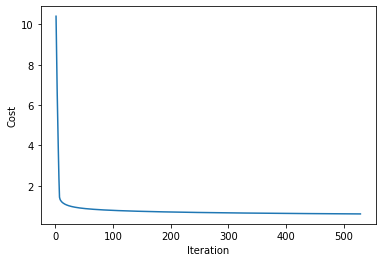

[[-1.52812025e-06 -3.94337079e-06  9.21269319e-06 -3.95732182e-06
  -1.79778144e-05  2.93588993e-05 -2.52399958e-07 -1.25163900e-05
   1.11086448e-05 -2.10176486e-06  1.43105053e-06  5.26983587e-06]
 [-8.53129100e-06  1.33673099e-05  1.22137023e-05 -3.23828814e-05
   6.87651005e-05  2.73008902e-05  1.51648946e-06 -1.35215801e-05
   6.21427061e-06  9.84275992e-06 -4.20209978e-05  1.03298482e-05]
 [ 4.18719285e-05  2.49771078e-05 -4.19937788e-05  8.45364218e-07
  -3.98015926e-06  1.51698527e-07  1.24721550e-06  1.70178733e-06
  -5.51605830e-06  1.50677479e-06  2.00539619e-05 -1.96972797e-05]]
[[-2.23672650e-05 -2.58154926e-05  1.11413985e-04]]


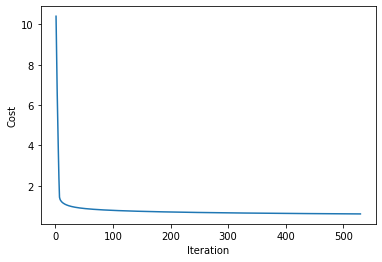

[[-1.52610487e-06 -3.94590649e-06  9.20677430e-06 -3.95185442e-06
  -1.79817328e-05  2.93372820e-05 -2.50856425e-07 -1.24861180e-05
   1.10681507e-05 -2.09911513e-06  1.42548452e-06  5.26647693e-06]
 [-8.52049609e-06  1.33410547e-05  1.22054481e-05 -3.23414723e-05
   6.86556874e-05  2.72808708e-05  1.51483715e-06 -1.35196666e-05
   6.21188642e-06  9.83094748e-06 -4.20152417e-05  1.03344017e-05]
 [ 4.18184333e-05  2.49401257e-05 -4.18983324e-05  8.44489227e-07
  -3.97966885e-06  1.51527102e-07  1.24584040e-06  1.70022219e-06
  -5.51364483e-06  1.50503104e-06  2.00459709e-05 -1.96886528e-05]]
[[-2.23387003e-05 -2.58561203e-05  1.11345902e-04]]


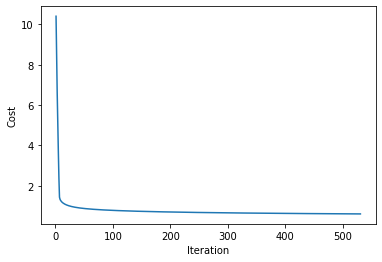

[[-1.52409514e-06 -3.94843259e-06  9.20087185e-06 -3.94640270e-06
  -1.79856308e-05  2.93157272e-05 -2.49319133e-07 -1.24559256e-05
   1.10278043e-05 -2.09647257e-06  1.41993339e-06  5.26312720e-06]
 [-8.50973041e-06  1.33148652e-05  1.21972163e-05 -3.23001759e-05
   6.85465412e-05  2.72609057e-05  1.51318900e-06 -1.35177537e-05
   6.20950668e-06  9.81916632e-06 -4.20094879e-05  1.03389291e-05]
 [ 4.17650843e-05  2.49032362e-05 -4.18032218e-05  8.43616410e-07
  -3.97917821e-06  1.51355268e-07  1.24446887e-06  1.69866191e-06
  -5.51123970e-06  1.50329197e-06  2.00379990e-05 -1.96800527e-05]]
[[-2.23102144e-05 -2.58966097e-05  1.11278006e-04]]


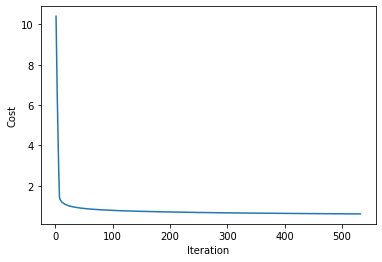

[[-1.52209104e-06 -3.95094912e-06  9.19498577e-06 -3.94096659e-06
  -1.79895084e-05  2.92942344e-05 -2.47788050e-07 -1.24258122e-05
   1.09876048e-05 -2.09383717e-06  1.41439708e-06  5.25978661e-06]
 [-8.49899384e-06  1.32887410e-05  1.21890070e-05 -3.22589917e-05
   6.84376611e-05  2.72409946e-05  1.51154498e-06 -1.35158414e-05
   6.20713137e-06  9.80741634e-06 -4.20037363e-05  1.03434304e-05]
 [ 4.17118810e-05  2.48664389e-05 -4.17084452e-05  8.42745758e-07
  -3.97868735e-06  1.51183029e-07  1.24310089e-06  1.69710647e-06
  -5.50884288e-06  1.50155754e-06  2.00300461e-05 -1.96714793e-05]]
[[-2.22818068e-05 -2.59369612e-05  1.11210298e-04]]


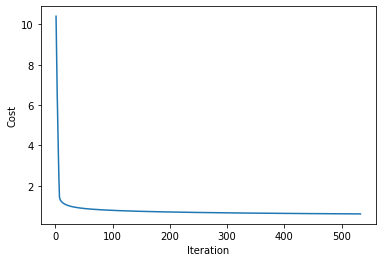

[[-1.52009253e-06 -3.95345611e-06  9.18911599e-06 -3.93554603e-06
  -1.79933657e-05  2.92728034e-05 -2.46263144e-07 -1.23957778e-05
   1.09475513e-05 -2.09120890e-06  1.40887555e-06  5.25645514e-06]
 [-8.48828625e-06  1.32626820e-05  1.21808198e-05 -3.22179192e-05
   6.83290461e-05  2.72211373e-05  1.50990507e-06 -1.35139297e-05
   6.20476048e-06  9.79569740e-06 -4.19979870e-05  1.03479059e-05]
 [ 4.16588228e-05  2.48297335e-05 -4.16140010e-05  8.41877263e-07
  -3.97819627e-06  1.51010391e-07  1.24173644e-06  1.69555586e-06
  -5.50645432e-06  1.49982774e-06  2.00221120e-05 -1.96629323e-05]]
[[-2.22534774e-05 -2.59771752e-05  1.11142775e-04]]


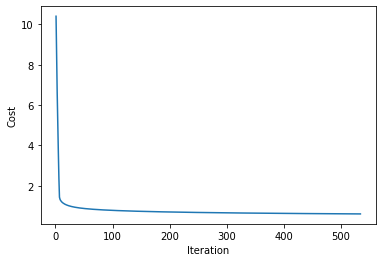

[[-1.51809960e-06 -3.95595359e-06  9.18326241e-06 -3.93014093e-06
  -1.79972028e-05  2.92514339e-05 -2.44744385e-07 -1.23658220e-05
   1.09076432e-05 -2.08858772e-06  1.40336875e-06  5.25313273e-06]
 [-8.47760753e-06  1.32366879e-05  1.21726549e-05 -3.21769580e-05
   6.82206953e-05  2.72013335e-05  1.50826927e-06 -1.35120185e-05
   6.20239400e-06  9.78400938e-06 -4.19922400e-05  1.03523557e-05]
 [ 4.16059089e-05  2.47931198e-05 -4.15198873e-05  8.41010917e-07
  -3.97770497e-06  1.50837356e-07  1.24037551e-06  1.69401005e-06
  -5.50407397e-06  1.49810256e-06  2.00141968e-05 -1.96544118e-05]]
[[-2.22252258e-05 -2.60172522e-05  1.11075438e-04]]


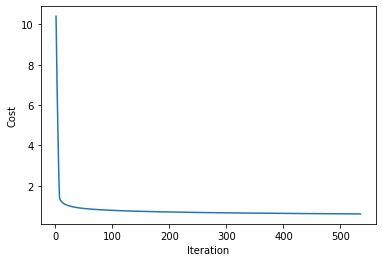

[[-1.51611222e-06 -3.95844160e-06  9.17742496e-06 -3.92475125e-06
  -1.80010198e-05  2.92301256e-05 -2.43231742e-07 -1.23359446e-05
   1.08678796e-05 -2.08597360e-06  1.39787662e-06  5.24981934e-06]
 [-8.46695756e-06  1.32107585e-05  1.21645119e-05 -3.21361077e-05
   6.81126078e-05  2.71815829e-05  1.50663754e-06 -1.35101080e-05
   6.20003191e-06  9.77235214e-06 -4.19864952e-05  1.03567800e-05]
 [ 4.15531389e-05  2.47565973e-05 -4.14261025e-05  8.40146711e-07
  -3.97721345e-06  1.50663929e-07  1.23901810e-06  1.69246903e-06
  -5.50170180e-06  1.49638197e-06  2.00063004e-05 -1.96459175e-05]]
[[-2.21970516e-05 -2.60571926e-05  1.11008284e-04]]


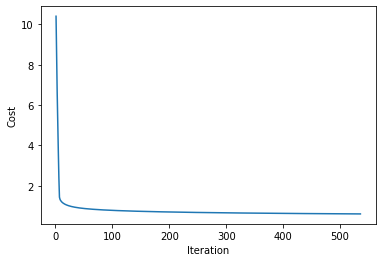

[[-1.51413037e-06 -3.96092016e-06  9.17160357e-06 -3.91937692e-06
  -1.80048166e-05  2.92088781e-05 -2.41725185e-07 -1.23061452e-05
   1.08282599e-05 -2.08336652e-06  1.39239912e-06  5.24651493e-06]
 [-8.45633621e-06  1.31848936e-05  1.21563909e-05 -3.20953677e-05
   6.80047827e-05  2.71618852e-05  1.50500988e-06 -1.35081980e-05
   6.19767419e-06  9.76072557e-06 -4.19807527e-05  1.03611789e-05]
 [ 4.15005121e-05  2.47201657e-05 -4.13326448e-05  8.39284637e-07
  -3.97672172e-06  1.50490114e-07  1.23766417e-06  1.69093278e-06
  -5.49933776e-06  1.49466595e-06  1.99984226e-05 -1.96374493e-05]]
[[-2.21689546e-05 -2.60969969e-05  1.10941314e-04]]


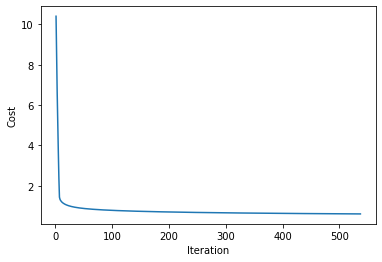

[[-1.51215402e-06 -3.96338931e-06  9.16579815e-06 -3.91401786e-06
  -1.80085934e-05  2.91876912e-05 -2.40224684e-07 -1.22764235e-05
   1.07887832e-05 -2.08076646e-06  1.38693621e-06  5.24321944e-06]
 [-8.44574338e-06  1.31590929e-05  1.21482916e-05 -3.20547376e-05
   6.78972191e-05  2.71422401e-05  1.50338627e-06 -1.35062885e-05
   6.19532082e-06  9.74912954e-06 -4.19750125e-05  1.03655525e-05]
 [ 4.14480280e-05  2.46838249e-05 -4.12395126e-05  8.38424686e-07
  -3.97622978e-06  1.50315917e-07  1.23631373e-06  1.68940127e-06
  -5.49698181e-06  1.49295449e-06  1.99905635e-05 -1.96290071e-05]]
[[-2.21409344e-05 -2.61366655e-05  1.10874526e-04]]


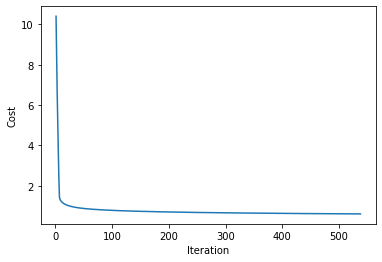

[[-1.51018315e-06 -3.96584908e-06  9.16000863e-06 -3.90867402e-06
  -1.80123503e-05  2.91665646e-05 -2.38730207e-07 -1.22467794e-05
   1.07494488e-05 -2.07817337e-06  1.38148782e-06  5.23993284e-06]
 [-8.43517895e-06  1.31333564e-05  1.21402141e-05 -3.20142170e-05
   6.77899160e-05  2.71226472e-05  1.50176670e-06 -1.35043797e-05
   6.19297180e-06  9.73756392e-06 -4.19692746e-05  1.03699011e-05]
 [ 4.13956859e-05  2.46475743e-05 -4.11467041e-05  8.37566850e-07
  -3.97573762e-06  1.50141339e-07  1.23496675e-06  1.68787450e-06
  -5.49463390e-06  1.49124756e-06  1.99827229e-05 -1.96205907e-05]]
[[-2.21129906e-05 -2.61761989e-05  1.10807919e-04]]


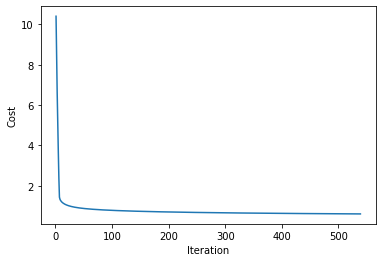

[[-1.50821775e-06 -3.96829949e-06  9.15423494e-06 -3.90334533e-06
  -1.80160872e-05  2.91454980e-05 -2.37241726e-07 -1.22172124e-05
   1.07102561e-05 -2.07558723e-06  1.37605392e-06  5.23665508e-06]
 [-8.42464279e-06  1.31076836e-05  1.21321581e-05 -3.19738054e-05
   6.76828727e-05  2.71031065e-05  1.50015114e-06 -1.35024714e-05
   6.19062711e-06  9.72602860e-06 -4.19635389e-05  1.03742247e-05]
 [ 4.13434853e-05  2.46114137e-05 -4.10542177e-05  8.36711122e-07
  -3.97524525e-06  1.49966387e-07  1.23362323e-06  1.68635244e-06
  -5.49229399e-06  1.48954516e-06  1.99749008e-05 -1.96122000e-05]]
[[-2.20851231e-05 -2.62155975e-05  1.10741494e-04]]


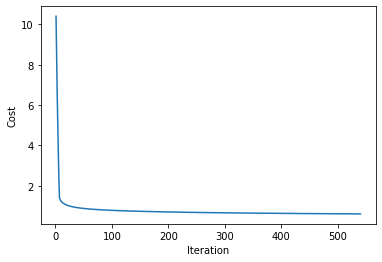

[[-1.50625778e-06 -3.97074058e-06  9.14847700e-06 -3.89803173e-06
  -1.80198043e-05  2.91244911e-05 -2.35759210e-07 -1.21877225e-05
   1.06712041e-05 -2.07300801e-06  1.37063446e-06  5.23338612e-06]
 [-8.41413480e-06  1.30820745e-05  1.21241236e-05 -3.19335023e-05
   6.75760882e-05  2.70836174e-05  1.49853959e-06 -1.35005637e-05
   6.18828672e-06  9.71452346e-06 -4.19578055e-05  1.03785235e-05]
 [ 4.12914256e-05  2.45753428e-05 -4.09620517e-05  8.35857492e-07
  -3.97475267e-06  1.49791064e-07  1.23228314e-06  1.68483507e-06
  -5.48996205e-06  1.48784725e-06  1.99670971e-05 -1.96038350e-05]]
[[-2.20573314e-05 -2.62548617e-05  1.10675248e-04]]


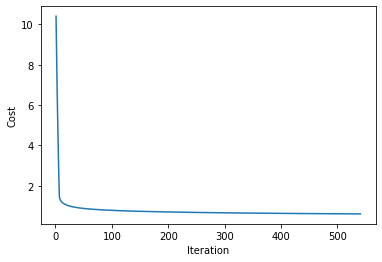

[[-1.50430322e-06 -3.97317238e-06  9.14273473e-06 -3.89273315e-06
  -1.80235017e-05  2.91035437e-05 -2.34282631e-07 -1.21583092e-05
   1.06322923e-05 -2.07043569e-06  1.36522938e-06  5.23012592e-06]
 [-8.40365485e-06  1.30565288e-05  1.21161104e-05 -3.18933074e-05
   6.74695616e-05  2.70641799e-05  1.49693203e-06 -1.34986566e-05
   6.18595063e-06  9.70304836e-06 -4.19520743e-05  1.03827977e-05]
 [ 4.12395061e-05  2.45393613e-05 -4.08702045e-05  8.35005952e-07
  -3.97425989e-06  1.49615373e-07  1.23094648e-06  1.68332238e-06
  -5.48763802e-06  1.48615382e-06  1.99593117e-05 -1.95954954e-05]]
[[-2.20296153e-05 -2.62939920e-05  1.10609180e-04]]


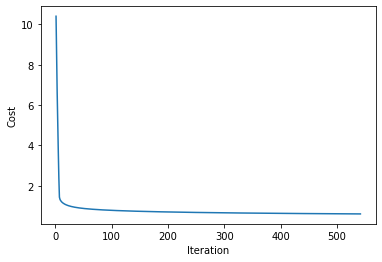

[[-1.50235406e-06 -3.97559492e-06  9.13700806e-06 -3.88744954e-06
  -1.80271793e-05  2.90826554e-05 -2.32811958e-07 -1.21289723e-05
   1.05935198e-05 -2.06787023e-06  1.35983865e-06  5.22687442e-06]
 [-8.39320284e-06  1.30310463e-05  1.21081185e-05 -3.18532201e-05
   6.73632920e-05  2.70447935e-05  1.49532844e-06 -1.34967501e-05
   6.18361882e-06  9.69160319e-06 -4.19463454e-05  1.03870474e-05]
 [ 4.11877265e-05  2.45034688e-05 -4.07786744e-05  8.34156495e-07
  -3.97376690e-06  1.49439319e-07  1.22961323e-06  1.68181435e-06
  -5.48532188e-06  1.48446485e-06  1.99515446e-05 -1.95871812e-05]]
[[-2.20019745e-05 -2.63329888e-05  1.10543291e-04]]


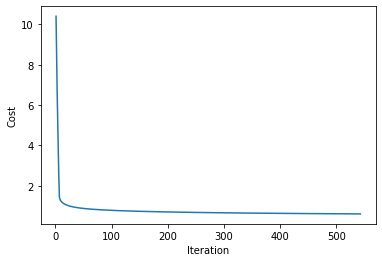

[[-1.50041027e-06 -3.97800822e-06  9.13129691e-06 -3.88218082e-06
  -1.80308372e-05  2.90618259e-05 -2.31347162e-07 -1.20997115e-05
   1.05548860e-05 -2.06531162e-06  1.35446221e-06  5.22363160e-06]
 [-8.38277865e-06  1.30056268e-05  1.21001477e-05 -3.18132401e-05
   6.72572786e-05  2.70254581e-05  1.49372880e-06 -1.34948441e-05
   6.18129128e-06  9.68018784e-06 -4.19406188e-05  1.03912728e-05]
 [ 4.11360859e-05  2.44676651e-05 -4.06874599e-05  8.33309112e-07
  -3.97327371e-06  1.49262906e-07  1.22828337e-06  1.68031096e-06
  -5.48301356e-06  1.48278033e-06  1.99437958e-05 -1.95788921e-05]]
[[-2.19744086e-05 -2.63718525e-05  1.10477579e-04]]


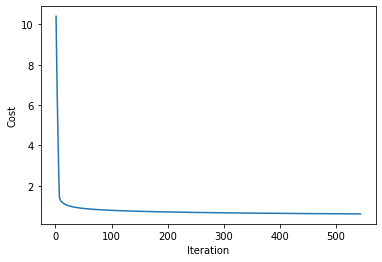

[[-1.49847182e-06 -3.98041232e-06  9.12560122e-06 -3.87692693e-06
  -1.80344756e-05  2.90410550e-05 -2.29888214e-07 -1.20705266e-05
   1.05163902e-05 -2.06275981e-06  1.34910001e-06  5.22039740e-06]
 [-8.37238217e-06  1.29802700e-05  1.20921980e-05 -3.17733668e-05
   6.71515205e-05  2.70061733e-05  1.49213311e-06 -1.34929387e-05
   6.17896798e-06  9.66880217e-06 -4.19348944e-05  1.03954739e-05]
 [ 4.10845840e-05  2.44319497e-05 -4.05965592e-05  8.32463796e-07
  -3.97278032e-06  1.49086138e-07  1.22695690e-06  1.67881220e-06
  -5.48071305e-06  1.48110024e-06  1.99360651e-05 -1.95706282e-05]]
[[-2.19469173e-05 -2.64105836e-05  1.10412044e-04]]


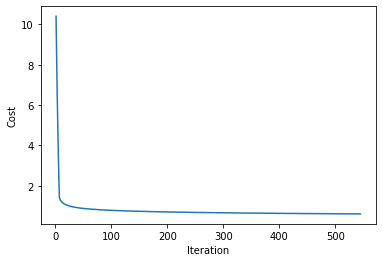

[[-1.49653870e-06 -3.98280725e-06  9.11992090e-06 -3.87168782e-06
  -1.80380945e-05  2.90203424e-05 -2.28435086e-07 -1.20414174e-05
   1.04780316e-05 -2.06021478e-06  1.34375201e-06  5.21717178e-06]
 [-8.36201328e-06  1.29549758e-05  1.20842692e-05 -3.17336000e-05
   6.70460168e-05  2.69869390e-05  1.49054135e-06 -1.34910339e-05
   6.17664892e-06  9.65744607e-06 -4.19291723e-05  1.03996510e-05]
 [ 4.10332201e-05  2.43963226e-05 -4.05059708e-05  8.31620538e-07
  -3.97228673e-06  1.48909019e-07  1.22563380e-06  1.67731803e-06
  -5.47842029e-06  1.47942455e-06  1.99283525e-05 -1.95623892e-05]]
[[-2.19195003e-05 -2.64491825e-05  1.10346683e-04]]


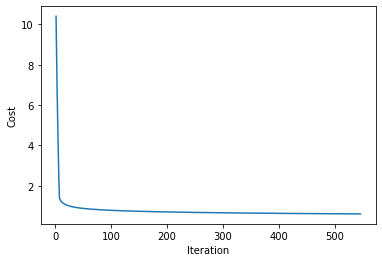

[[-1.49461088e-06 -3.98519304e-06  9.11425589e-06 -3.86646341e-06
  -1.80416938e-05  2.89996878e-05 -2.26987749e-07 -1.20123834e-05
   1.04398096e-05 -2.05767651e-06  1.33841817e-06  5.21395471e-06]
 [-8.35167187e-06  1.29297440e-05  1.20763612e-05 -3.16939390e-05
   6.69407666e-05  2.69677547e-05  1.48895349e-06 -1.34891296e-05
   6.17433408e-06  9.64611943e-06 -4.19234524e-05  1.04038041e-05]
 [ 4.09819937e-05  2.43607832e-05 -4.04156931e-05  8.30779331e-07
  -3.97179293e-06  1.48731552e-07  1.22431405e-06  1.67582846e-06
  -5.47613525e-06  1.47775325e-06  1.99206578e-05 -1.95541751e-05]]
[[-2.18921574e-05 -2.64876496e-05  1.10281498e-04]]


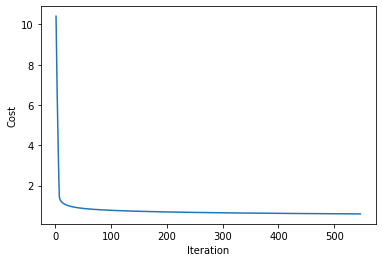

[[-1.49268834e-06 -3.98756971e-06  9.10860611e-06 -3.86125366e-06
  -1.80452738e-05  2.89790909e-05 -2.25546174e-07 -1.19834245e-05
   1.04017234e-05 -2.05514497e-06  1.33309843e-06  5.21074614e-06]
 [-8.34135784e-06  1.29045743e-05  1.20684739e-05 -3.16543835e-05
   6.68357692e-05  2.69486202e-05  1.48736953e-06 -1.34872259e-05
   6.17202345e-06  9.63482212e-06 -4.19177347e-05  1.04079334e-05]
 [ 4.09309041e-05  2.43253313e-05 -4.03257246e-05  8.29940166e-07
  -3.97129894e-06  1.48553741e-07  1.22299765e-06  1.67434346e-06
  -5.47385788e-06  1.47608633e-06  1.99129812e-05 -1.95459857e-05]]
[[-2.18648882e-05 -2.65259853e-05  1.10216486e-04]]


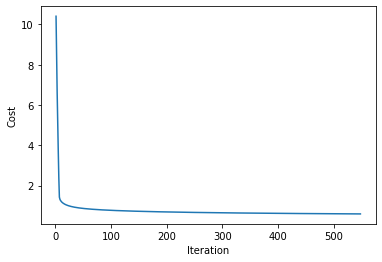

[[-1.49077106e-06 -3.98993729e-06  9.10297149e-06 -3.85605849e-06
  -1.80488344e-05  2.89585515e-05 -2.24110333e-07 -1.19545404e-05
   1.03637723e-05 -2.05262013e-06  1.32779275e-06  5.20754603e-06]
 [-8.33107107e-06  1.28794666e-05  1.20606072e-05 -3.16149331e-05
   6.67310235e-05  2.69295354e-05  1.48578945e-06 -1.34853227e-05
   6.16971701e-06  9.62355403e-06 -4.19120193e-05  1.04120392e-05]
 [ 4.08799510e-05  2.42899666e-05 -4.02360636e-05  8.29103036e-07
  -3.97080476e-06  1.48375590e-07  1.22168458e-06  1.67286301e-06
  -5.47158816e-06  1.47442376e-06  1.99053224e-05 -1.95378209e-05]]
[[-2.18376924e-05 -2.65641901e-05  1.10151648e-04]]


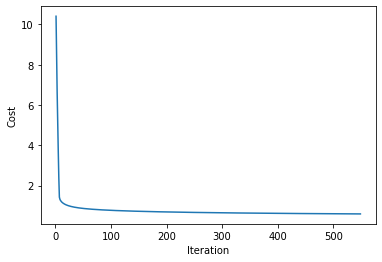

[[-1.48885902e-06 -3.99229582e-06  9.09735196e-06 -3.85087785e-06
  -1.80523758e-05  2.89380693e-05 -2.22680198e-07 -1.19257309e-05
   1.03259557e-05 -2.05010197e-06  1.32250108e-06  5.20435434e-06]
 [-8.32081145e-06  1.28544205e-05  1.20527610e-05 -3.15755874e-05
   6.66265288e-05  2.69104999e-05  1.48421324e-06 -1.34834202e-05
   6.16741474e-06  9.61231504e-06 -4.19063062e-05  1.04161214e-05]
 [ 4.08291336e-05  2.42546889e-05 -4.01467086e-05  8.28267932e-07
  -3.97031038e-06  1.48197103e-07  1.22037483e-06  1.67138709e-06
  -5.46932602e-06  1.47276552e-06  1.98976814e-05 -1.95296805e-05]]
[[-2.18105697e-05 -2.66022644e-05  1.10086981e-04]]


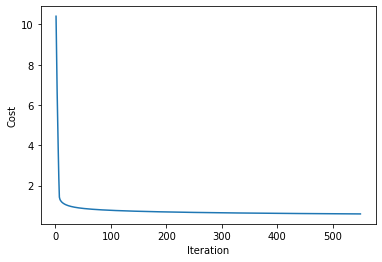

[[-1.48695220e-06 -3.99464533e-06  9.09174746e-06 -3.84571168e-06
  -1.80558979e-05  2.89176440e-05 -2.21255741e-07 -1.18969956e-05
   1.02882729e-05 -2.04759045e-06  1.31722338e-06  5.20117103e-06]
 [-8.31057887e-06  1.28294360e-05  1.20449353e-05 -3.15363459e-05
   6.65222843e-05  2.68915134e-05  1.48264088e-06 -1.34815182e-05
   6.16511664e-06  9.60110503e-06 -4.19005953e-05  1.04201802e-05]
 [ 4.07784514e-05  2.42194977e-05 -4.00576580e-05  8.27434848e-07
  -3.96981581e-06  1.48018283e-07  1.21906838e-06  1.66991569e-06
  -5.46707145e-06  1.47111161e-06  1.98900582e-05 -1.95215646e-05]]
[[-2.17835199e-05 -2.66402086e-05  1.10022486e-04]]


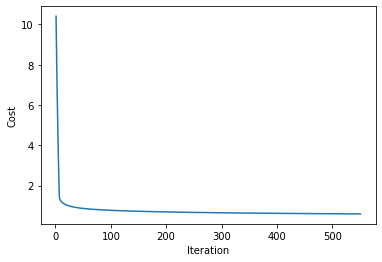

[[-1.48505057e-06 -3.99698583e-06  9.08615790e-06 -3.84055992e-06
  -1.80594009e-05  2.88972754e-05 -2.19836934e-07 -1.18683343e-05
   1.02507231e-05 -2.04508555e-06  1.31195960e-06  5.19799605e-06]
 [-8.30037322e-06  1.28045128e-05  1.20371298e-05 -3.14972081e-05
   6.64182890e-05  2.68725757e-05  1.48107235e-06 -1.34796167e-05
   6.16282268e-06  9.58992390e-06 -4.18948866e-05  1.04242158e-05]
 [ 4.07279039e-05  2.41843928e-05 -3.99689103e-05  8.26603775e-07
  -3.96932105e-06  1.47839135e-07  1.21776522e-06  1.66844880e-06
  -5.46482439e-06  1.46946200e-06  1.98824527e-05 -1.95134728e-05]]
[[-2.17565426e-05 -2.66780231e-05  1.09958162e-04]]


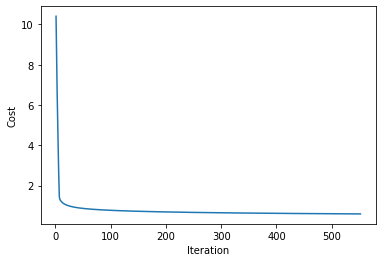

[[-1.48315411e-06 -3.99931737e-06  9.08058322e-06 -3.83542250e-06
  -1.80628847e-05  2.88769631e-05 -2.18423749e-07 -1.18397468e-05
   1.02133058e-05 -2.04258724e-06  1.30670969e-06  5.19482938e-06]
 [-8.29019440e-06  1.27796507e-05  1.20293445e-05 -3.14581737e-05
   6.63145421e-05  2.68536866e-05  1.47950765e-06 -1.34777158e-05
   6.16053285e-06  9.57877152e-06 -4.18891802e-05  1.04282283e-05]
 [ 4.06774906e-05  2.41493739e-05 -3.98804640e-05  8.25774705e-07
  -3.96882611e-06  1.47659661e-07  1.21646533e-06  1.66698638e-06
  -5.46258482e-06  1.46781667e-06  1.98748648e-05 -1.95054052e-05]]
[[-2.17296375e-05 -2.67157084e-05  1.09894008e-04]]


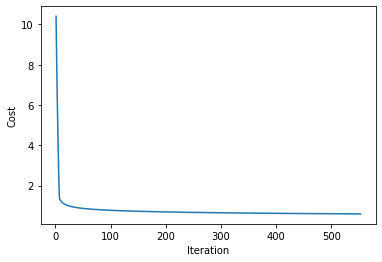

[[-1.48126281e-06 -4.00163997e-06  9.07502335e-06 -3.83029936e-06
  -1.80663495e-05  2.88567070e-05 -2.17016159e-07 -1.18112328e-05
   1.01760202e-05 -2.04009551e-06  1.30147361e-06  5.19167096e-06]
 [-8.28004229e-06  1.27548495e-05  1.20215794e-05 -3.14192423e-05
   6.62110428e-05  2.68348457e-05  1.47794675e-06 -1.34758155e-05
   6.15824714e-06  9.56764779e-06 -4.18834760e-05  1.04322178e-05]
 [ 4.06272109e-05  2.41144407e-05 -3.97923175e-05  8.24947632e-07
  -3.96833097e-06  1.47479865e-07  1.21516872e-06  1.66552844e-06
  -5.46035269e-06  1.46617561e-06  1.98672944e-05 -1.94973616e-05]]
[[-2.17028044e-05 -2.67532648e-05  1.09830022e-04]]


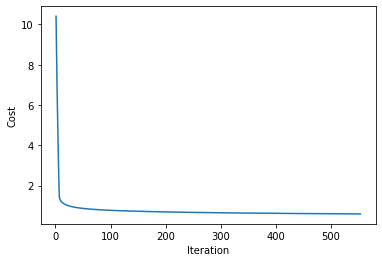

[[-1.47937663e-06 -4.00395366e-06  9.06947823e-06 -3.82519046e-06
  -1.80697954e-05  2.88365067e-05 -2.15614136e-07 -1.17827921e-05
   1.01388657e-05 -2.03761031e-06  1.29625132e-06  5.18852076e-06]
 [-8.26991680e-06  1.27301091e-05  1.20138342e-05 -3.13804135e-05
   6.61077903e-05  2.68160529e-05  1.47638965e-06 -1.34739158e-05
   6.15596554e-06  9.55655258e-06 -4.18777741e-05  1.04361845e-05]
 [ 4.05770643e-05  2.40795930e-05 -3.97044694e-05  8.24122547e-07
  -3.96783565e-06  1.47299752e-07  1.21387535e-06  1.66407494e-06
  -5.45812796e-06  1.46453880e-06  1.98597416e-05 -1.94893419e-05]]
[[-2.16760429e-05 -2.67906927e-05  1.09766205e-04]]


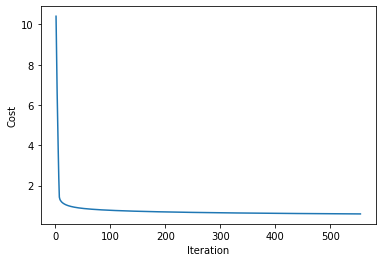

[[-1.47749557e-06 -4.00625846e-06  9.06394777e-06 -3.82009572e-06
  -1.80732223e-05  2.88163620e-05 -2.14217655e-07 -1.17544243e-05
   1.01018416e-05 -2.03513163e-06  1.29104277e-06  5.18537874e-06]
 [-8.25981780e-06  1.27054291e-05  1.20061089e-05 -3.13416867e-05
   6.60047837e-05  2.67973079e-05  1.47483633e-06 -1.34720166e-05
   6.15368802e-06  9.54548579e-06 -4.18720743e-05  1.04401285e-05]
 [ 4.05270502e-05  2.40448303e-05 -3.96169181e-05  8.23299443e-07
  -3.96734014e-06  1.47119324e-07  1.21258522e-06  1.66262588e-06
  -5.45591060e-06  1.46290622e-06  1.98522062e-05 -1.94813459e-05]]
[[-2.16493528e-05 -2.68279927e-05  1.09702555e-04]]


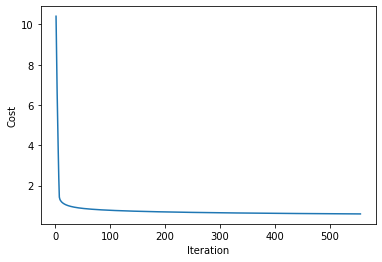

[[-1.47561960e-06 -4.00855442e-06  9.05843192e-06 -3.81501510e-06
  -1.80766303e-05  2.87962727e-05 -2.12826686e-07 -1.17261293e-05
   1.00649473e-05 -2.03265943e-06  1.28584792e-06  5.18224486e-06]
 [-8.24974521e-06  1.26808094e-05  1.19984035e-05 -3.13030617e-05
   6.59020221e-05  2.67786104e-05  1.47328676e-06 -1.34701179e-05
   6.15141458e-06  9.53444731e-06 -4.18663768e-05  1.04440499e-05]
 [ 4.04771681e-05  2.40101524e-05 -3.95296622e-05  8.22478312e-07
  -3.96684446e-06  1.46938585e-07  1.21129832e-06  1.66118123e-06
  -5.45370057e-06  1.46127786e-06  1.98446881e-05 -1.94733736e-05]]
[[-2.16227337e-05 -2.68651650e-05  1.09639071e-04]]


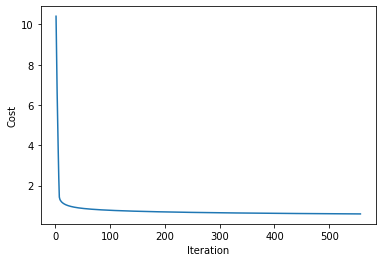

[[-1.47374870e-06 -4.01084154e-06  9.05293061e-06 -3.80994853e-06
  -1.80800196e-05  2.87762384e-05 -2.11441204e-07 -1.16979067e-05
   1.00281821e-05 -2.03019370e-06  1.28066671e-06  5.17911908e-06]
 [-8.23969891e-06  1.26562499e-05  1.19907177e-05 -3.12645380e-05
   6.57995049e-05  2.67599602e-05  1.47174095e-06 -1.34682199e-05
   6.14914521e-06  9.52343702e-06 -4.18606816e-05  1.04479489e-05]
 [ 4.04274175e-05  2.39755591e-05 -3.94427002e-05  8.21659147e-07
  -3.96634859e-06  1.46757538e-07  1.21001464e-06  1.65974098e-06
  -5.45149783e-06  1.45965370e-06  1.98371874e-05 -1.94654248e-05]]
[[-2.15961855e-05 -2.69022102e-05  1.09575754e-04]]


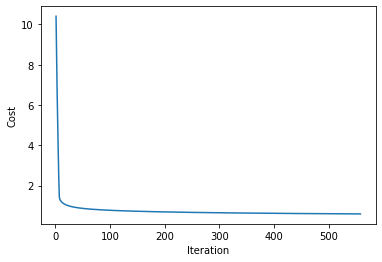

[[-1.47188284e-06 -4.01311987e-06  9.04744377e-06 -3.80489595e-06
  -1.80833901e-05  2.87562589e-05 -2.10061183e-07 -1.16697564e-05
   9.99154529e-06 -2.02773441e-06  1.27549911e-06  5.17600136e-06]
 [-8.22967879e-06  1.26317502e-05  1.19830515e-05 -3.12261152e-05
   6.56972311e-05  2.67413571e-05  1.47019887e-06 -1.34663224e-05
   6.14687987e-06  9.51245481e-06 -4.18549885e-05  1.04518256e-05]
 [ 4.03777978e-05  2.39410499e-05 -3.93560306e-05  8.20841940e-07
  -3.96585254e-06  1.46576187e-07  1.20873416e-06  1.65830511e-06
  -5.44930235e-06  1.45803372e-06  1.98297039e-05 -1.94574995e-05]]
[[-2.15697077e-05 -2.69391285e-05  1.09512602e-04]]


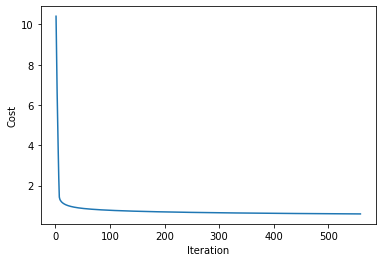

[[-1.47002201e-06 -4.01538943e-06  9.04197133e-06 -3.79985731e-06
  -1.80867419e-05  2.87363340e-05 -2.08686595e-07 -1.16416780e-05
   9.95503632e-06 -2.02528152e-06  1.27034507e-06  5.17289167e-06]
 [-8.21968476e-06  1.26073103e-05  1.19754049e-05 -3.11877930e-05
   6.55951999e-05  2.67228007e-05  1.46866052e-06 -1.34644254e-05
   6.14461858e-06  9.50150057e-06 -4.18492977e-05  1.04556801e-05]
 [ 4.03283085e-05  2.39066247e-05 -3.92696519e-05  8.20026684e-07
  -3.96535631e-06  1.46394535e-07  1.20745686e-06  1.65687361e-06
  -5.44711409e-06  1.45641791e-06  1.98222376e-05 -1.94495975e-05]]
[[-2.15433002e-05 -2.69759204e-05  1.09449614e-04]]


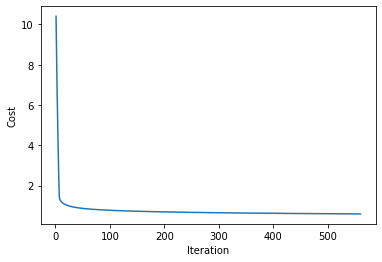

[[-1.46816619e-06 -4.01765025e-06  9.03651323e-06 -3.79483254e-06
  -1.80900751e-05  2.87164634e-05 -2.07317414e-07 -1.16136714e-05
   9.91865453e-06 -2.02283503e-06  1.26520455e-06  5.16978996e-06]
 [-8.20971670e-06  1.25829298e-05  1.19677777e-05 -3.11495708e-05
   6.54934105e-05  2.67042909e-05  1.46712587e-06 -1.34625290e-05
   6.14236130e-06  9.49057419e-06 -4.18436091e-05  1.04595126e-05]
 [ 4.02789491e-05  2.38722832e-05 -3.91835628e-05  8.19213371e-07
  -3.96485991e-06  1.46212586e-07  1.20618274e-06  1.65544646e-06
  -5.44493301e-06  1.45480625e-06  1.98147884e-05 -1.94417187e-05]]
[[-2.15169626e-05 -2.70125864e-05  1.09386790e-04]]


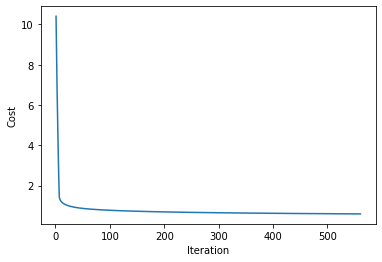

[[-1.46631536e-06 -4.01990235e-06  9.03106940e-06 -3.78982160e-06
  -1.80933897e-05  2.86966469e-05 -2.05953614e-07 -1.15857363e-05
   9.88239927e-06 -2.02039489e-06  1.26007750e-06  5.16669620e-06]
 [-8.19977452e-06  1.25586087e-05  1.19601697e-05 -3.11114483e-05
   6.53918621e-05  2.66858274e-05  1.46559491e-06 -1.34606331e-05
   6.14010802e-06  9.47967556e-06 -4.18379228e-05  1.04633231e-05]
 [ 4.02297191e-05  2.38380250e-05 -3.90977618e-05  8.18401995e-07
  -3.96436334e-06  1.46030343e-07  1.20491179e-06  1.65402365e-06
  -5.44275907e-06  1.45319872e-06  1.98073563e-05 -1.94338629e-05]]
[[-2.14906947e-05 -2.70491267e-05  1.09324128e-04]]


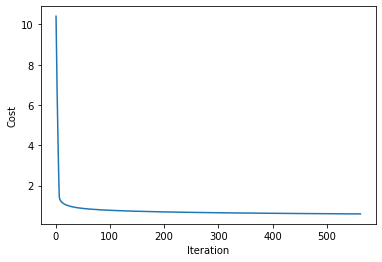

[[-1.46446950e-06 -4.02214577e-06  9.02563978e-06 -3.78482443e-06
  -1.80966858e-05  2.86768842e-05 -2.04595169e-07 -1.15578724e-05
   9.84626992e-06 -2.01796109e-06  1.25496388e-06  5.16361035e-06]
 [-8.18985812e-06  1.25343467e-05  1.19525811e-05 -3.10734251e-05
   6.52905539e-05  2.66674100e-05  1.46406763e-06 -1.34587379e-05
   6.13785874e-06  9.46880458e-06 -4.18322386e-05  1.04671118e-05]
 [ 4.01806179e-05  2.38038499e-05 -3.90122474e-05  8.17592548e-07
  -3.96386659e-06  1.45847810e-07  1.20364399e-06  1.65260515e-06
  -5.44059224e-06  1.45159530e-06  1.97999412e-05 -1.94260302e-05]]
[[-2.14644961e-05 -2.70855419e-05  1.09261629e-04]]


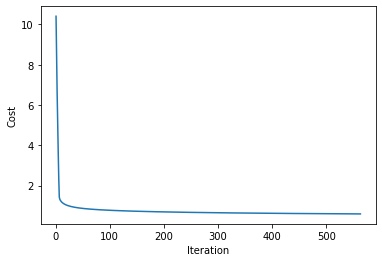

[[-1.46262858e-06 -4.02438053e-06  9.02022430e-06 -3.77984097e-06
  -1.80999635e-05  2.86571750e-05 -2.03242053e-07 -1.15300794e-05
   9.81026585e-06 -2.01553360e-06  1.24986364e-06  5.16053238e-06]
 [-8.17996738e-06  1.25101436e-05  1.19450115e-05 -3.10355009e-05
   6.51894851e-05  2.66490385e-05  1.46254401e-06 -1.34568431e-05
   6.13561344e-06  9.45796114e-06 -4.18265567e-05  1.04708788e-05]
 [ 4.01316451e-05  2.37697576e-05 -3.89270182e-05  8.16785022e-07
  -3.96336967e-06  1.45664989e-07  1.20237932e-06  1.65119095e-06
  -5.43843249e-06  1.44999599e-06  1.97925430e-05 -1.94182203e-05]]
[[-2.14383667e-05 -2.71218322e-05  1.09199291e-04]]


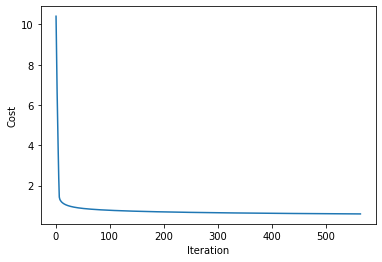

[[-1.46079259e-06 -4.02660665e-06  9.01482289e-06 -3.77487116e-06
  -1.81032228e-05  2.86375192e-05 -2.01894241e-07 -1.15023572e-05
   9.77438643e-06 -2.01311239e-06  1.24477675e-06  5.15746225e-06]
 [-8.17010222e-06  1.24859992e-05  1.19374610e-05 -3.09976751e-05
   6.50886549e-05  2.66307125e-05  1.46102405e-06 -1.34549489e-05
   6.13337210e-06  9.44714512e-06 -4.18208769e-05  1.04746243e-05]
 [ 4.00828002e-05  2.37357478e-05 -3.88420729e-05  8.15979410e-07
  -3.96287257e-06  1.45481883e-07  1.20111779e-06  1.64978103e-06
  -5.43627978e-06  1.44840076e-06  1.97851617e-05 -1.94104332e-05]]
[[-2.14123061e-05 -2.71579982e-05  1.09137113e-04]]


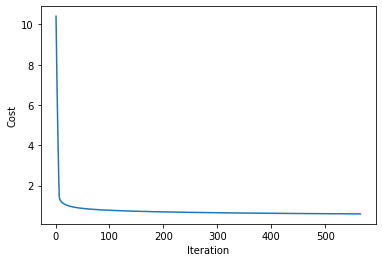

[[-1.45896150e-06 -4.02882418e-06  9.00943550e-06 -3.76991494e-06
  -1.81064637e-05  2.86179164e-05 -2.00551706e-07 -1.14747055e-05
   9.73863105e-06 -2.01069745e-06  1.23970316e-06  5.15439991e-06]
 [-8.16026252e-06  1.24619134e-05  1.19299294e-05 -3.09599475e-05
   6.49880624e-05  2.66124319e-05  1.45950773e-06 -1.34530553e-05
   6.13113471e-06  9.43635643e-06 -4.18151994e-05  1.04783484e-05]
 [ 4.00340825e-05  2.37018202e-05 -3.87574100e-05  8.15175706e-07
  -3.96237531e-06  1.45298497e-07  1.19985937e-06  1.64837538e-06
  -5.43413407e-06  1.44680960e-06  1.97777972e-05 -1.94026687e-05]]
[[-2.13863140e-05 -2.71940402e-05  1.09075096e-04]]
QUITTING!!!


In [14]:
Progress = {"Cost":[], "Iteration":[]}
i = 1
try:
    while True:
        Progress['Cost'].append(calcCost())
        Progress['Iteration'].append(i)
        w_Corr = correctionWeightsTerms()
        b_Corr = correctionBTerms()
        
        w_Corr = w_Corr.reshape(3, 12) * learning_rates
        b_Corr *= learning_rates_b
        
        weights -= w_Corr.reshape(12, 3)
        b_vals -= b_Corr
        
        print(w_Corr)
        print(b_Corr)
        
        sns.lineplot(data=Progress, x="Iteration", y="Cost")
        plt.show()
        i += 1
        
except KeyboardInterrupt:
    print("QUITTING!!!")

In [15]:
for expected, actual in zip(getExpected(), data['Lab']):
    print(expected, ideal_vals[str(int(actual))])

[9.73240898e-01 1.63786302e-01 9.61604601e-04] [1, 0, 0]
[0.93664219 0.39966197 0.00327979] [1, 0, 0]
[0.94199688 0.2221053  0.00430685] [1, 0, 0]
[0.9199296  0.24893199 0.00713477] [1, 0, 0]
[0.97438642 0.10390993 0.00114028] [1, 0, 0]
[9.88363966e-01 6.30040756e-02 2.37855237e-04] [1, 0, 0]
[0.94880041 0.11727382 0.0046119 ] [1, 0, 0]
[0.96308708 0.19003909 0.00160984] [1, 0, 0]
[0.8903011  0.30464569 0.01344782] [1, 0, 0]
[0.93926462 0.33518211 0.00314077] [1, 0, 0]
[9.85638709e-01 1.34614067e-01 2.78494985e-04] [1, 0, 0]
[0.95111003 0.14724043 0.00312062] [1, 0, 0]
[0.92952377 0.36431915 0.00436696] [1, 0, 0]
[0.90479197 0.23149564 0.01300692] [1, 0, 0]
[9.96020884e-01 8.79798428e-02 3.03154648e-05] [1, 0, 0]
[9.97773546e-01 1.02834573e-02 2.57909228e-05] [1, 0, 0]
[9.91248232e-01 6.41968442e-02 1.78003778e-04] [1, 0, 0]
[9.73436929e-01 1.64237026e-01 9.60532129e-04] [1, 0, 0]
[9.90660412e-01 1.55614256e-01 8.94026740e-05] [1, 0, 0]
[9.82731207e-01 5.82038606e-02 6.58622580e-04] [1